In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive/Shareddrives/KOHI_의료영상1팀/

/content/drive/Shareddrives/KOHI_의료영상1팀


In [5]:
import os
from tqdm import tqdm
import glob

In [6]:
image_path = 'Training_Data/image'
label_path = 'Training_Data/line_label'
predict_path = './result/PadChest/mask'

output_name_list = os.listdir('./result/PadChest/mask')

# 영상 불러오기



In [7]:
len(output_name_list)

232

In [8]:
dataset = []

for name in tqdm(output_name_list):
  if os.path.isfile(os.path.join(label_path, name)):
    dataset.append({'name':name,
                    'image_path':os.path.join(image_path, name),
                    'predict_path':os.path.join(predict_path, name),
                    'label_path':os.path.join(label_path, name)})

100%|██████████| 232/232 [00:00<00:00, 3438.04it/s]


In [64]:
dataset

[{'image_path': 'Training_Data/image/216840111366964012558082906712009301094710721_00-081-011.png',
  'label_path': 'Training_Data/line_label/216840111366964012558082906712009301094710721_00-081-011.png',
  'name': '216840111366964012558082906712009301094710721_00-081-011.png',
  'predict_path': './result/PadChest/mask/216840111366964012558082906712009301094710721_00-081-011.png'},
 {'image_path': 'Training_Data/image/216840111366964012487858717522009287121738850_00-081-067.png',
  'label_path': 'Training_Data/line_label/216840111366964012487858717522009287121738850_00-081-067.png',
  'name': '216840111366964012487858717522009287121738850_00-081-067.png',
  'predict_path': './result/PadChest/mask/216840111366964012487858717522009287121738850_00-081-067.png'},
 {'image_path': 'Training_Data/image/216840111366964012558082906712009314133351437_00-109-060.png',
  'label_path': 'Training_Data/line_label/216840111366964012558082906712009314133351437_00-109-060.png',
  'name': '21684011136696

# Erosion

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import skeletonize, thin
from skimage import data
from skimage.util import invert

# Skeletonize

In [51]:
for data in tqdm(dataset):
  file_name = data['name']
  image = cv.imread(data['image_path'])

  origin_output = cv.imread(data['predict_path']).astype(np.float32)
  origin_output = cv.resize(origin_output, dsize=(256, 256), interpolation=cv.INTER_AREA)
  
  # Skeletonizing Image
  result_skeletonizing = skeletonize((origin_output/255))
  # result_skeletonizing = cv.cvtColor(result_skeletonizing, cv.COLOR_BGR2GRAY) 

  plt.figure(figsize=(21, 7))  
  plt.subplot(131)
  plt.imshow(image, cmap='gray')
  plt.title('label(ground truth)')

  plt.subplot(132)
  plt.imshow(origin_output, cmap='gray')
  plt.title('prediction_mask')

  plt.subplot(133)
  plt.imshow(result_skeletonizing, cmap='gray')
  plt.title('skeletonizing')
  
  plt.show()


  0%|          | 0/232 [00:00<?, ?it/s]


ValueError: ignored

In [52]:
# Thinning Process
def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return int(x), int(y)

def detect(image):
    # some preprocessing
    # image = np.float32(image)

    image = cv.blur(image, (5, 5))
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    image = image.astype(np.uint8)
    thin = cv.ximgproc.thinning(image, 0)

    # thin image to find clear contours
    
    thin = thin.astype(np.uint8)
    thin = cv.ximgproc.thinning(thin, thinningType=cv.ximgproc.THINNING_GUOHALL)
    
    # dind contours
    cnts = cv.findContours(thin, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv.contourArea)

    # draw line contours
    cv.drawContours(image, [c], -1, (36, 255, 12), 2)

    return image


# Do Skeletonize, Opening and Save - Plots

In [53]:
result_dir = './이승아/result/PostProcessing/EfficientNet-V2'

In [54]:
from scipy.ndimage.morphology import binary_opening

def opening_image(image):
  diameter = 80
  radius = diameter // 2
  x = np.arange(-radius, radius+1)
  x, y = np.meshgrid(x, x)
  r = x**2 + y**2
  se = r < radius**2
  image = binary_opening(image, se)
  return image

In [71]:
pip install plantcv

     |████████████████████████████████| 230 kB 8.0 MB/s 
     |████████████████████████████████| 40 kB 4.7 MB/s 
     |████████████████████████████████| 58.0 MB 80 kB/s 
     |████████████████████████████████| 793 kB 33.5 MB/s 
     |████████████████████████████████| 1.0 MB 40.0 MB/s 
     |████████████████████████████████| 132 kB 40.1 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstal

In [1]:
from plantcv import plantcv as pcv

# Set global debug behavior to None (default), "print" (to file), 
# or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = "print"



  0%|          | 0/232 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009301094710721_00-081-011.png


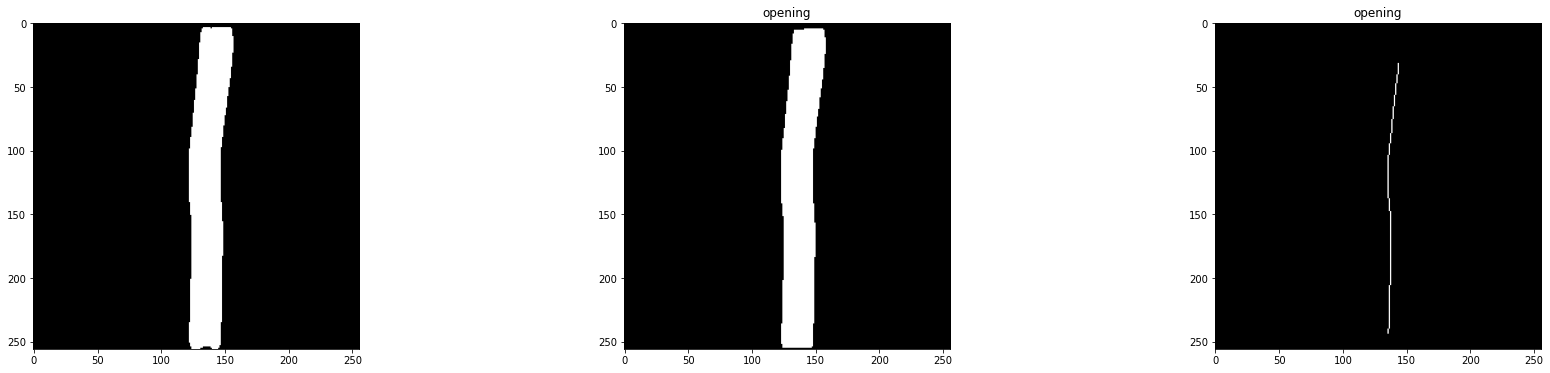

  0%|          | 1/232 [00:00<02:36,  1.48it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009287121738850_00-081-067.png


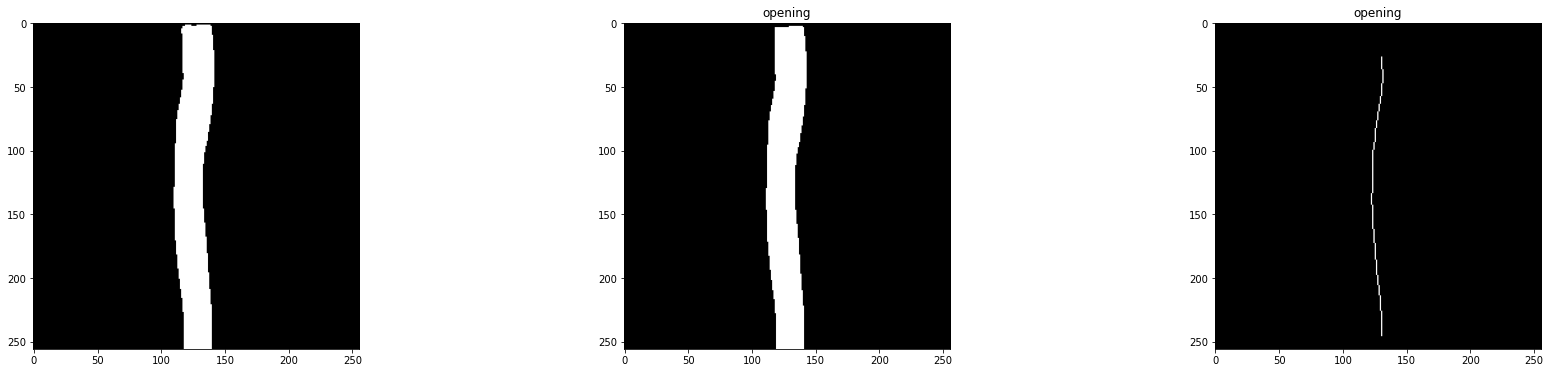

  1%|          | 2/232 [00:01<02:34,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009314133351437_00-109-060.png


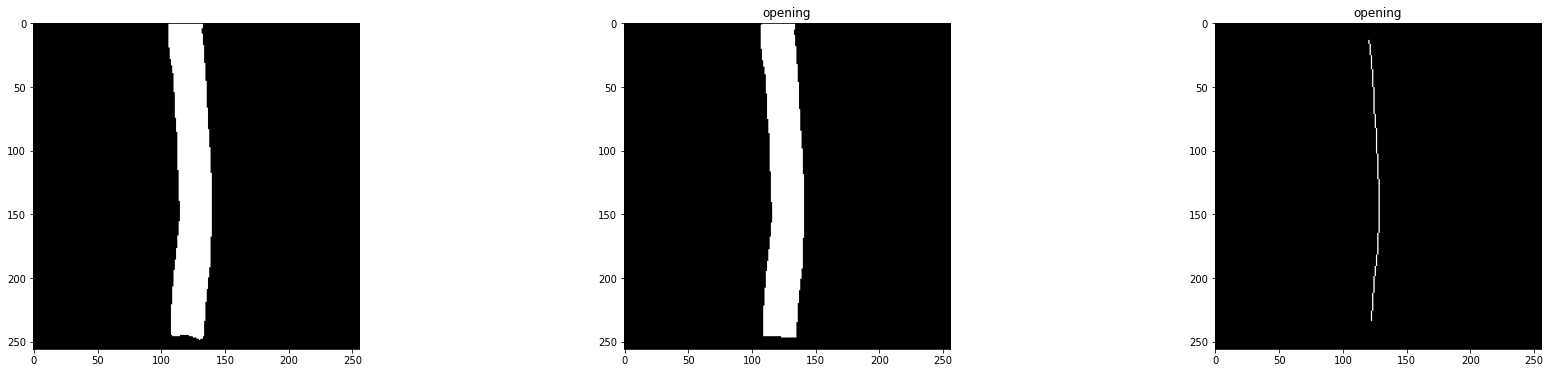

  1%|▏         | 3/232 [00:02<02:47,  1.37it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009316082905488_00-109-047.png


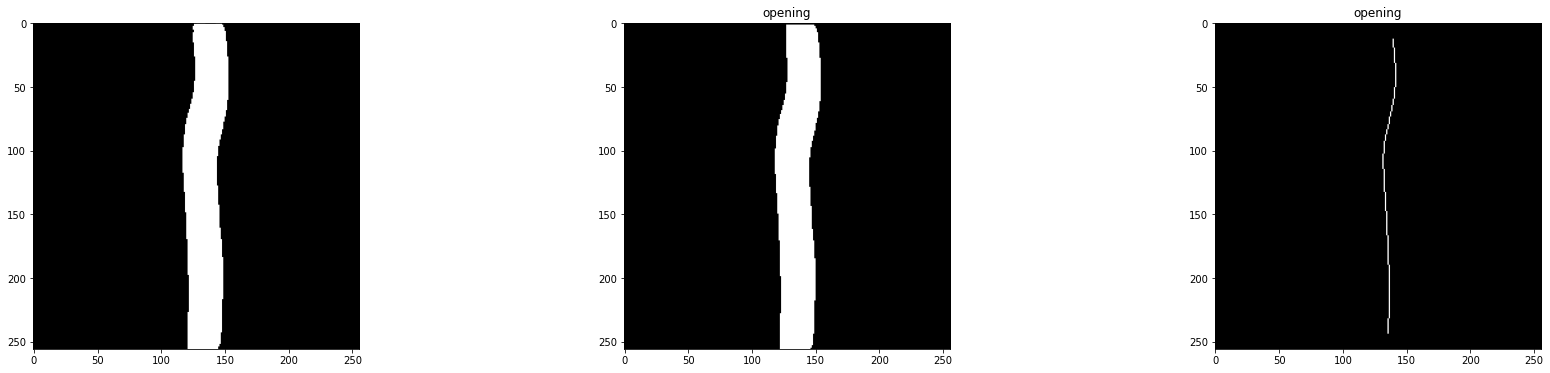

  2%|▏         | 4/232 [00:02<02:38,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009322144144041_00-101-166.png


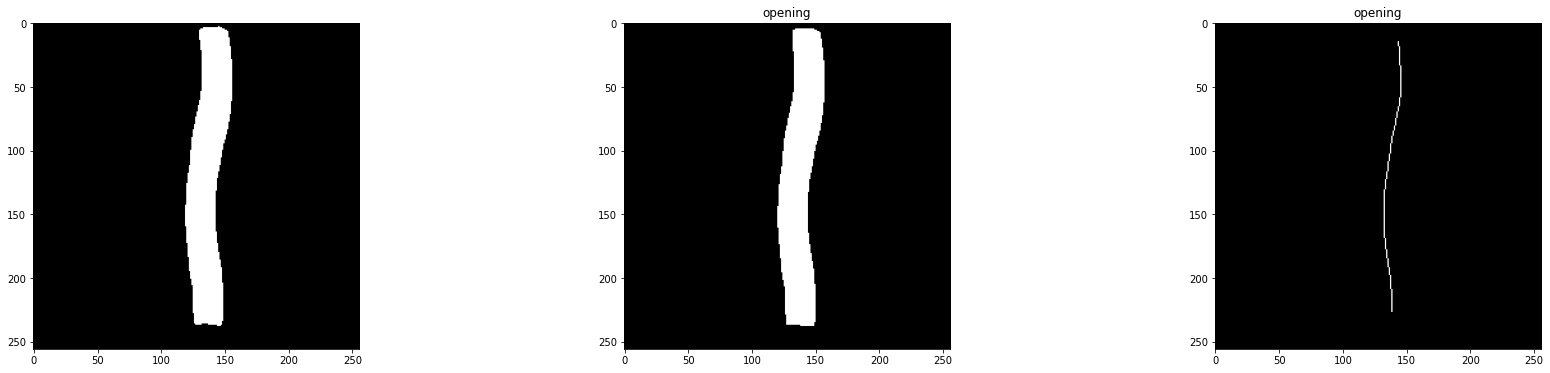

  2%|▏         | 5/232 [00:03<02:32,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009328092907574_00-102-062.png


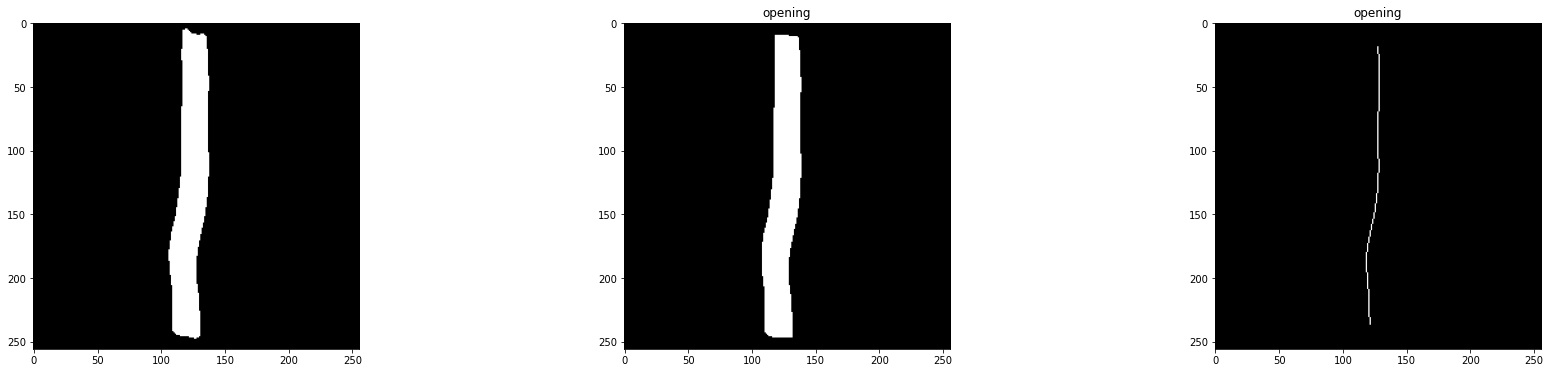

  3%|▎         | 6/232 [00:04<02:34,  1.46it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010015101533212_02-127-138.png


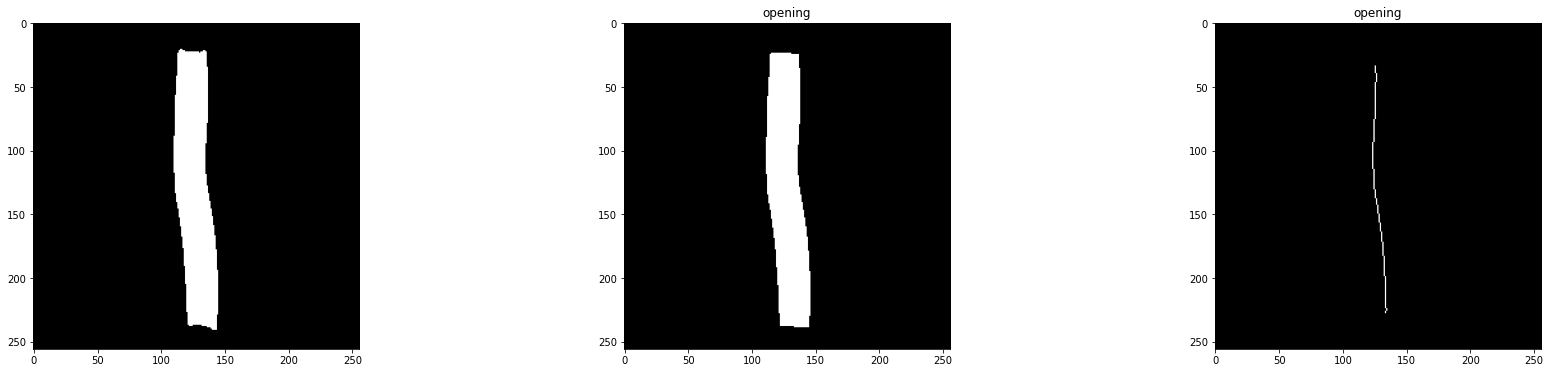

  3%|▎         | 7/232 [00:04<02:30,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010088125539480_04-007-111.png


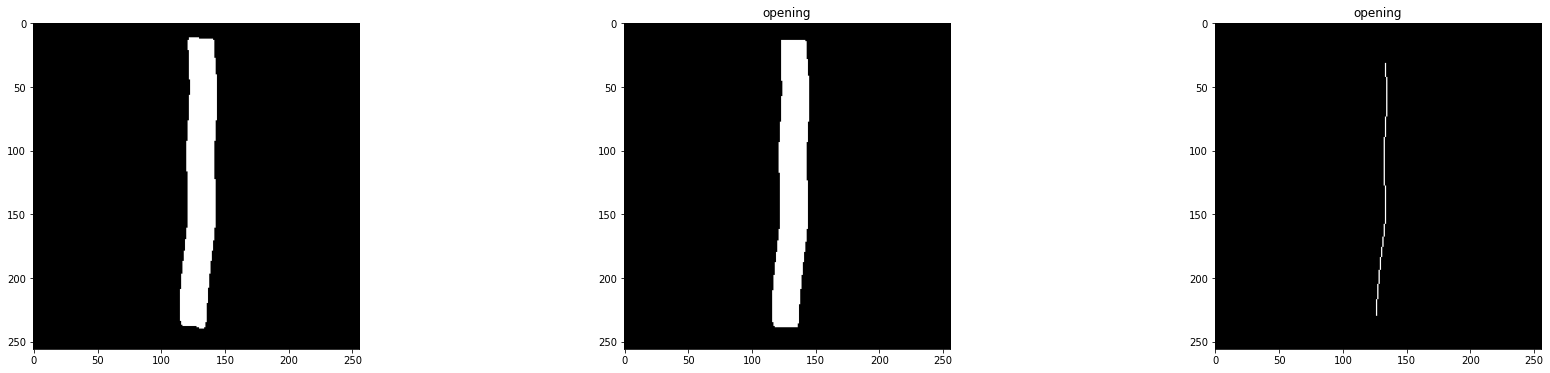

  3%|▎         | 8/232 [00:05<02:31,  1.47it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010148124641297_04-004-128.png


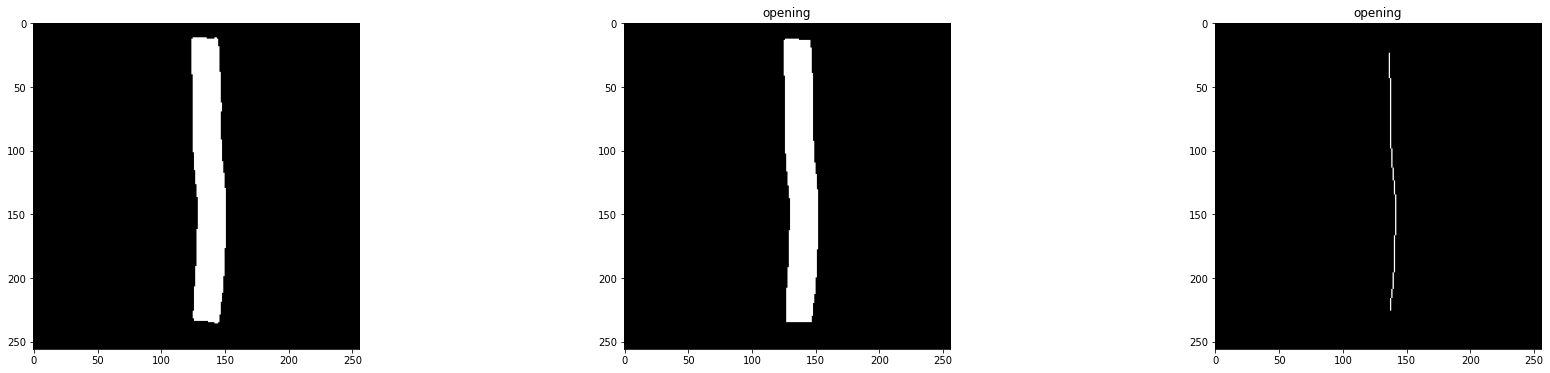

  4%|▍         | 9/232 [00:06<02:30,  1.48it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012810946289282010219120939792_02-118-155.png


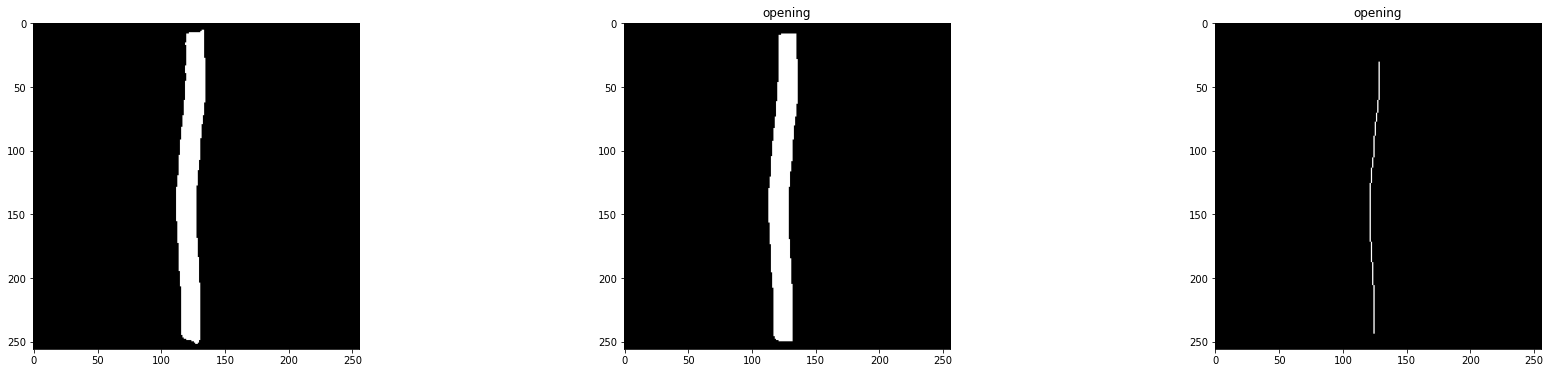

  4%|▍         | 10/232 [00:07<02:48,  1.32it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010154085633768_04-008-007.png


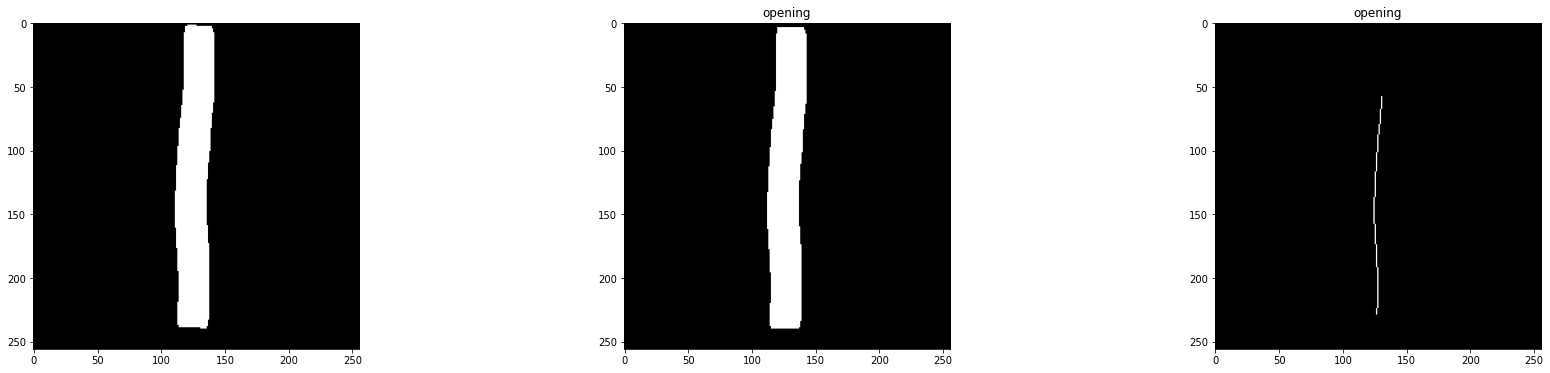

  5%|▍         | 11/232 [00:07<02:42,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012768025509942010180112204101_04-005-145.png


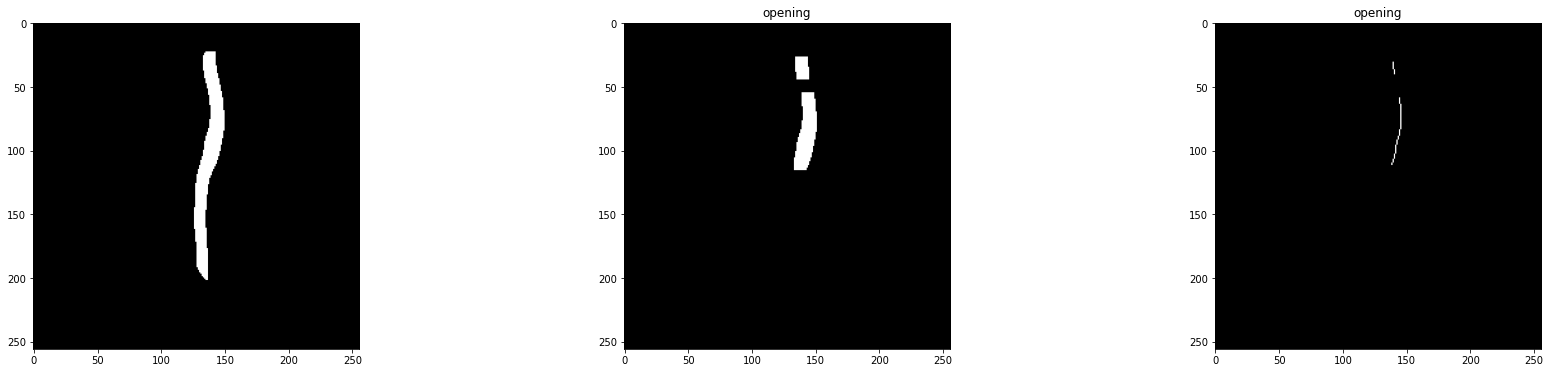

  5%|▌         | 12/232 [00:08<02:53,  1.27it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012810946289282010223090912922_02-123-183.png


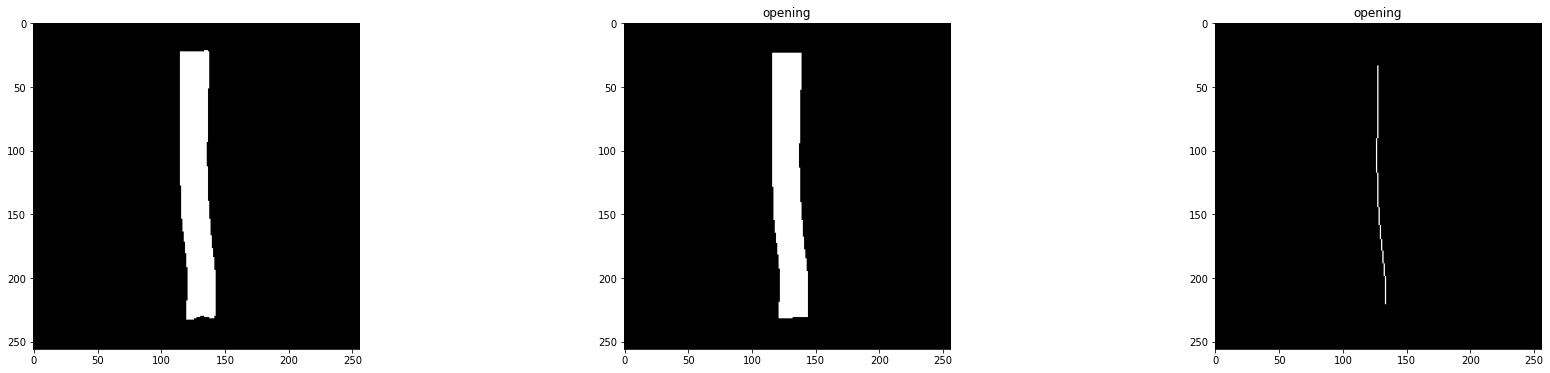

  6%|▌         | 13/232 [00:09<02:44,  1.33it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010228095038090_02-117-114.png


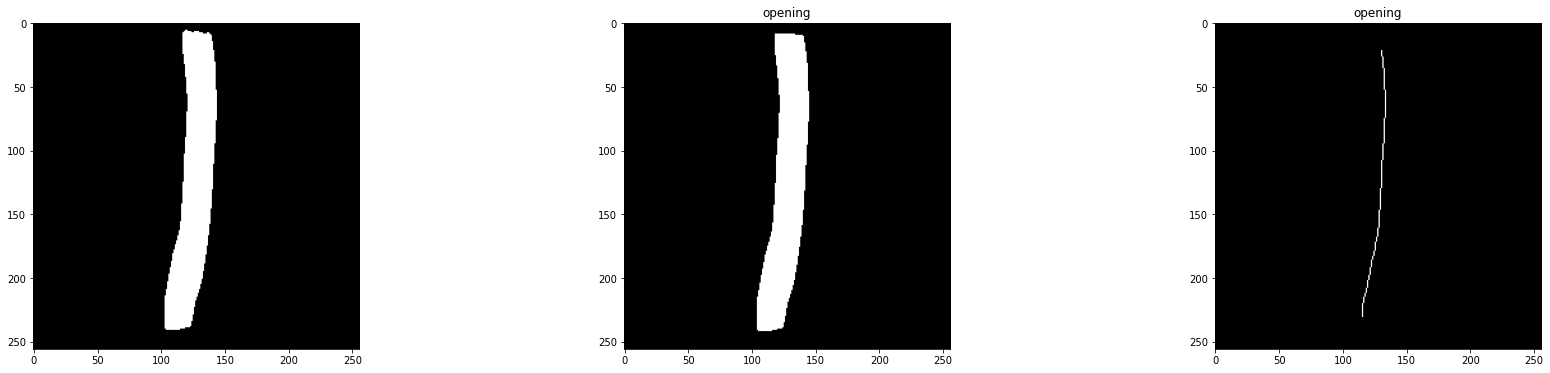

  6%|▌         | 14/232 [00:10<02:38,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010293104346604_04-021-142.png


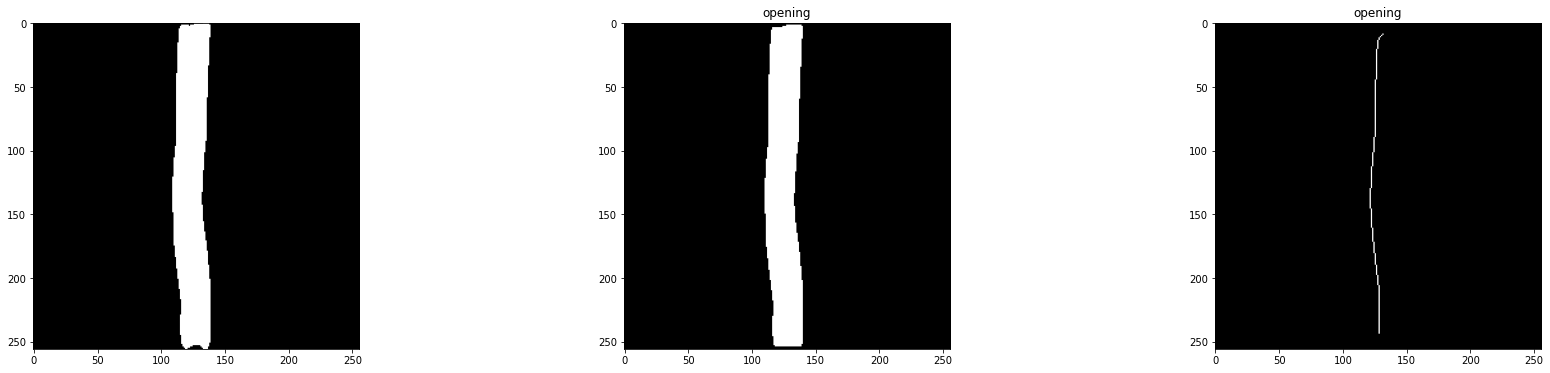

  6%|▋         | 15/232 [00:10<02:33,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012810946289282010223091501498_02-123-078.png


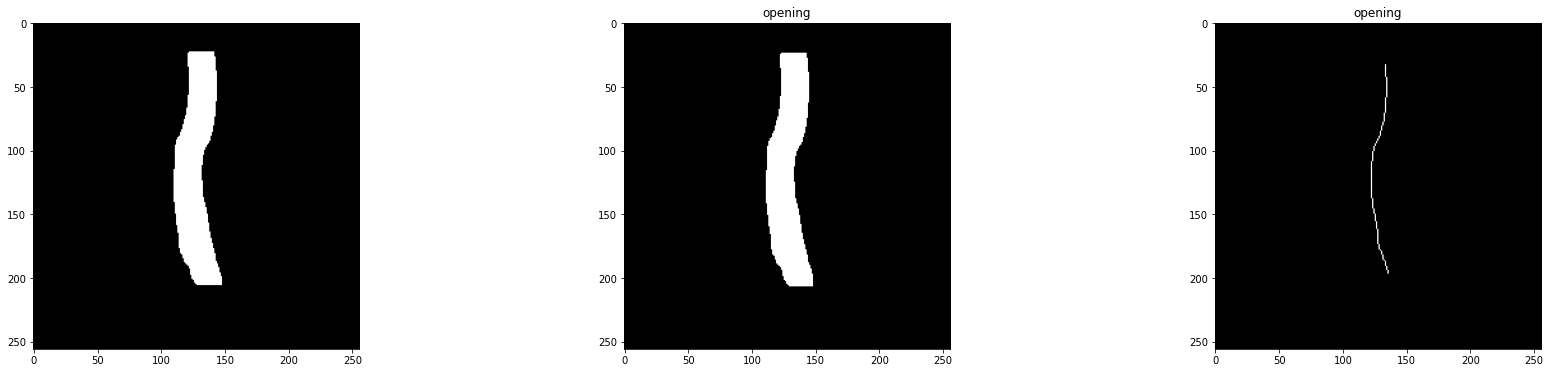

  7%|▋         | 16/232 [00:11<02:31,  1.43it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010300113128661_04-024-194.png


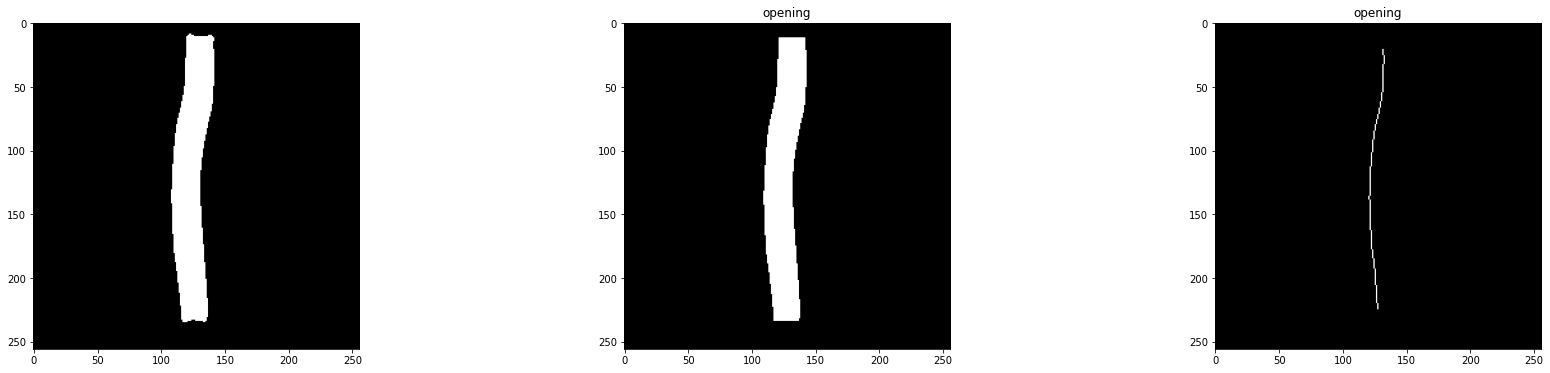

  7%|▋         | 17/232 [00:12<02:38,  1.35it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010306132220238_04-020-083.png


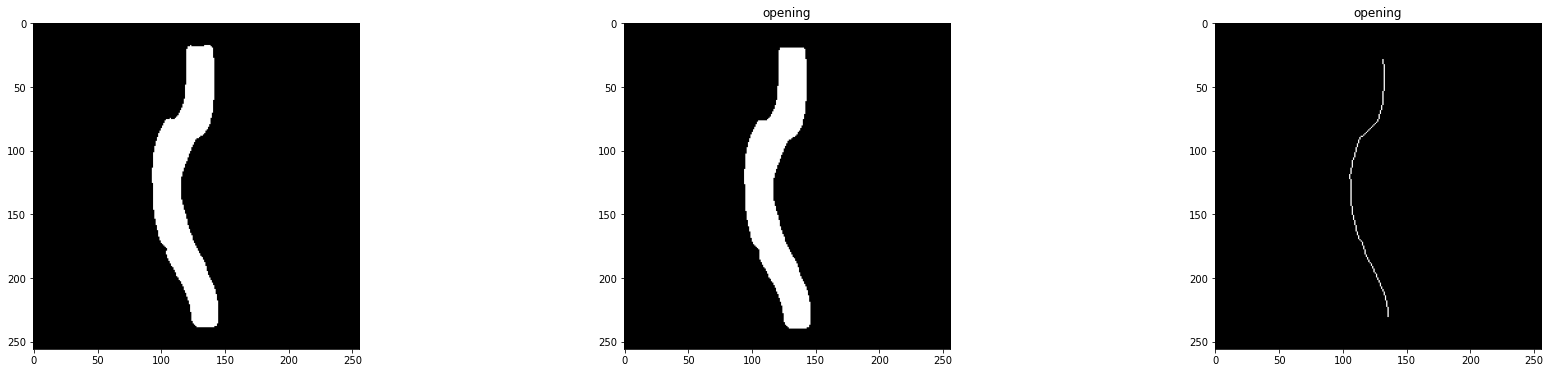

  8%|▊         | 18/232 [00:12<02:34,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010306090232781_04-018-165.png


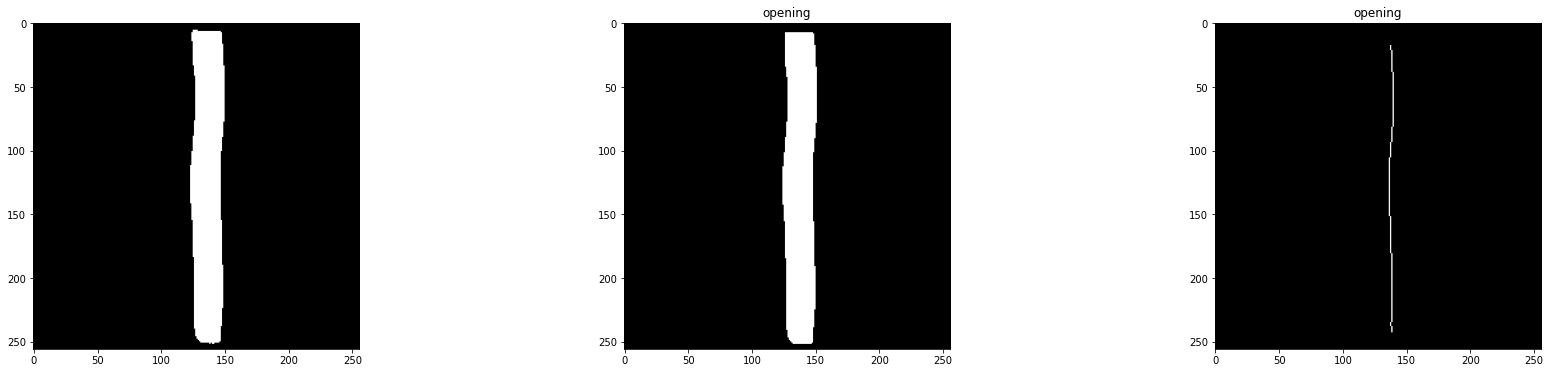

  8%|▊         | 19/232 [00:13<02:31,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012214806429742008295085947892_00-012-032.png


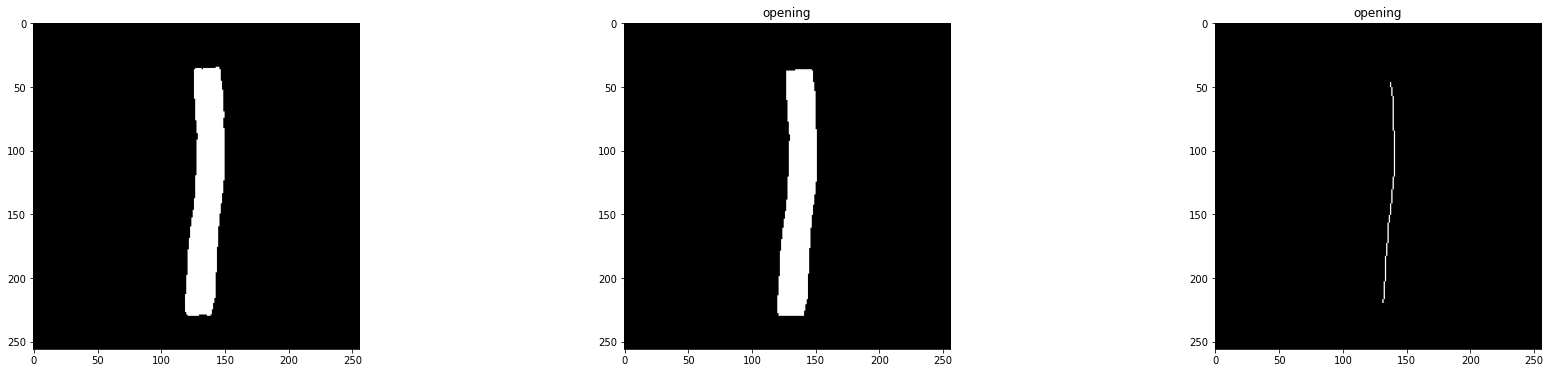

  9%|▊         | 20/232 [00:14<02:26,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012283393834152008357093609217_00-008-119.png


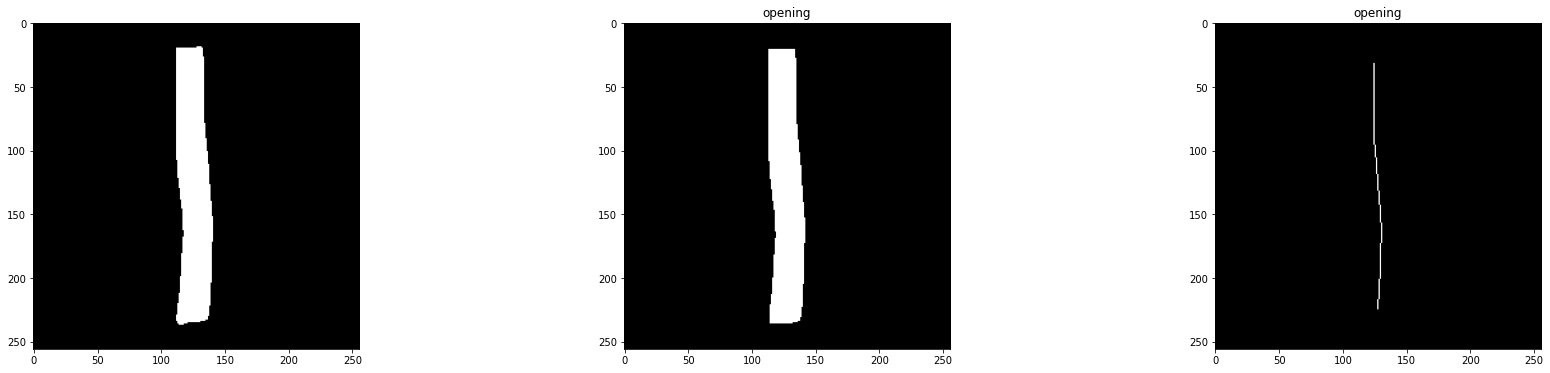

  9%|▉         | 21/232 [00:14<02:25,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012283393834152009013092719432_00-016-140.png


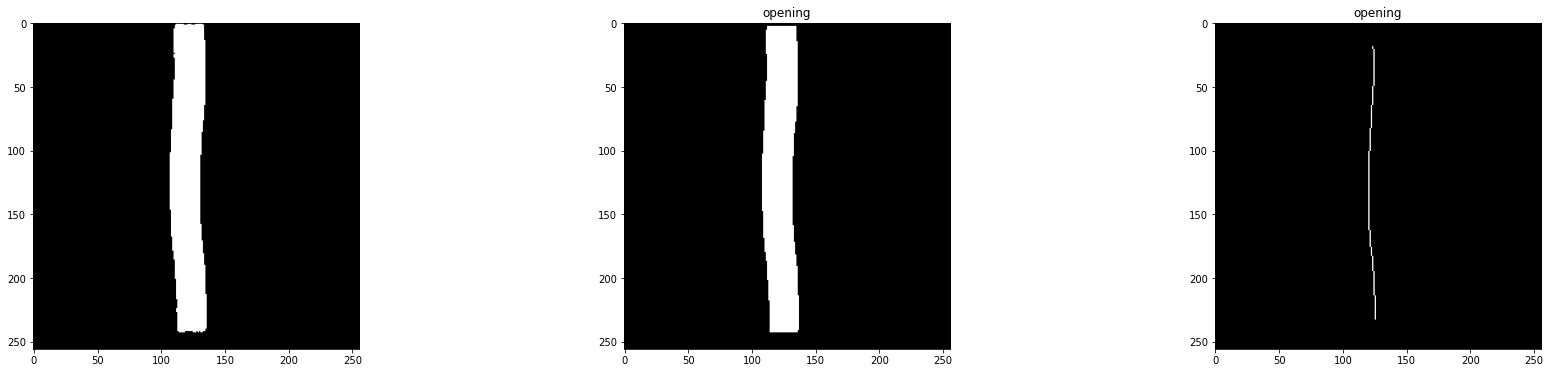

  9%|▉         | 22/232 [00:15<02:24,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010312112533018_04-022-141.png


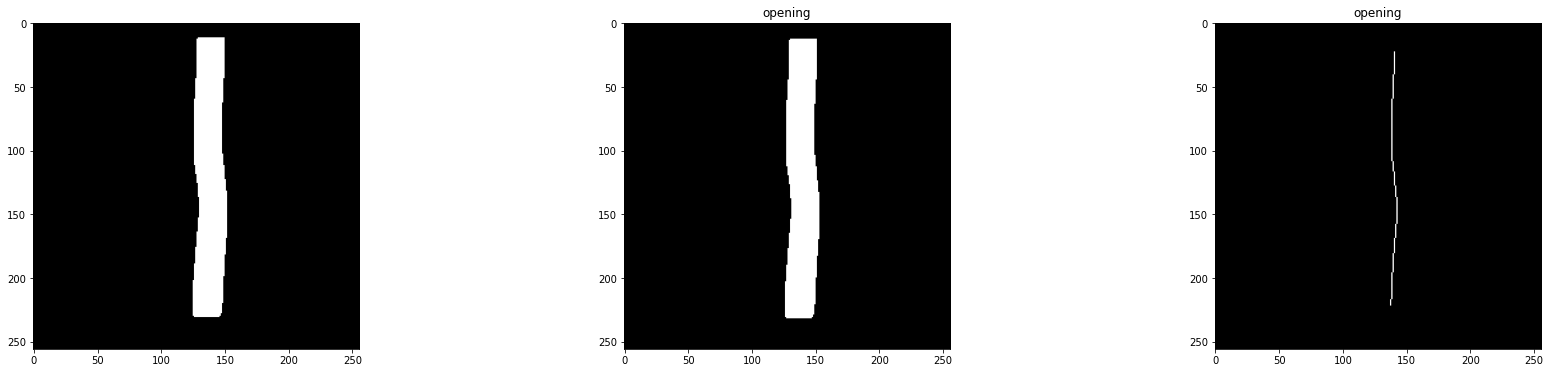

 10%|▉         | 23/232 [00:16<02:23,  1.46it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012283393834152009033115601801_00-058-032.png


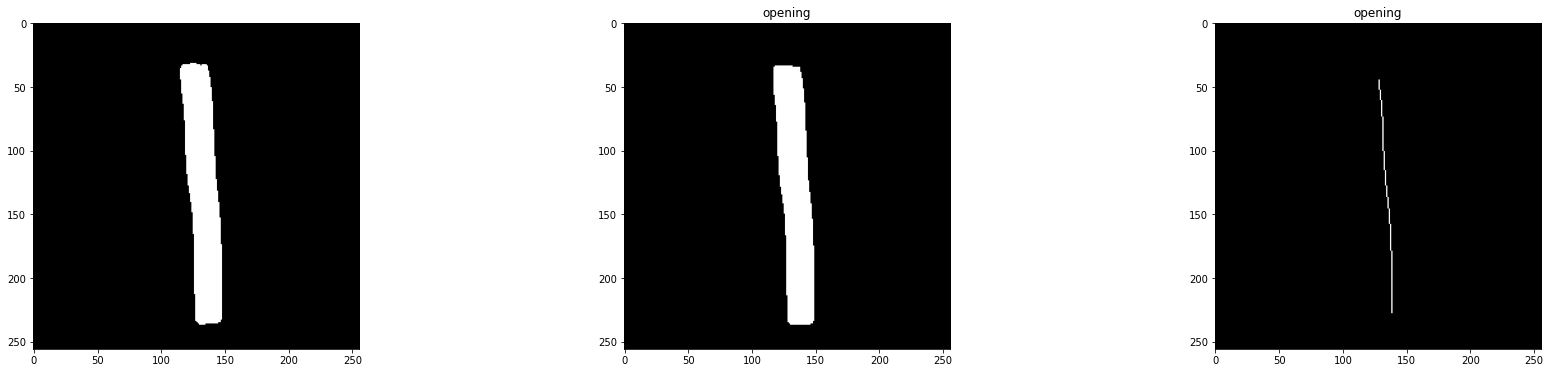

 10%|█         | 24/232 [00:17<02:30,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012283393834152009020094836218_00-050-068.png


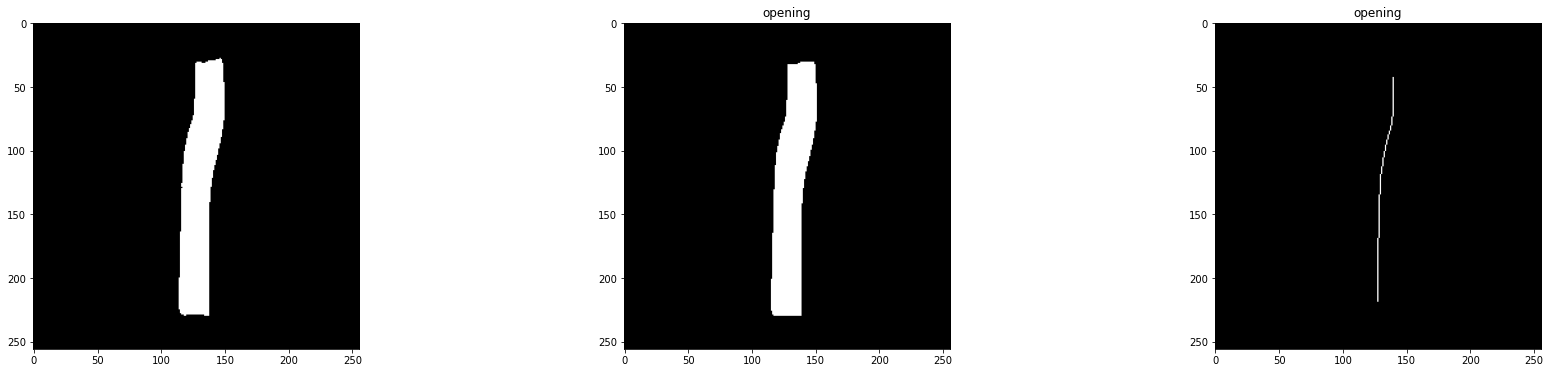

 11%|█         | 25/232 [00:17<02:28,  1.39it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012283393834152009033100642495_00-059-012.png


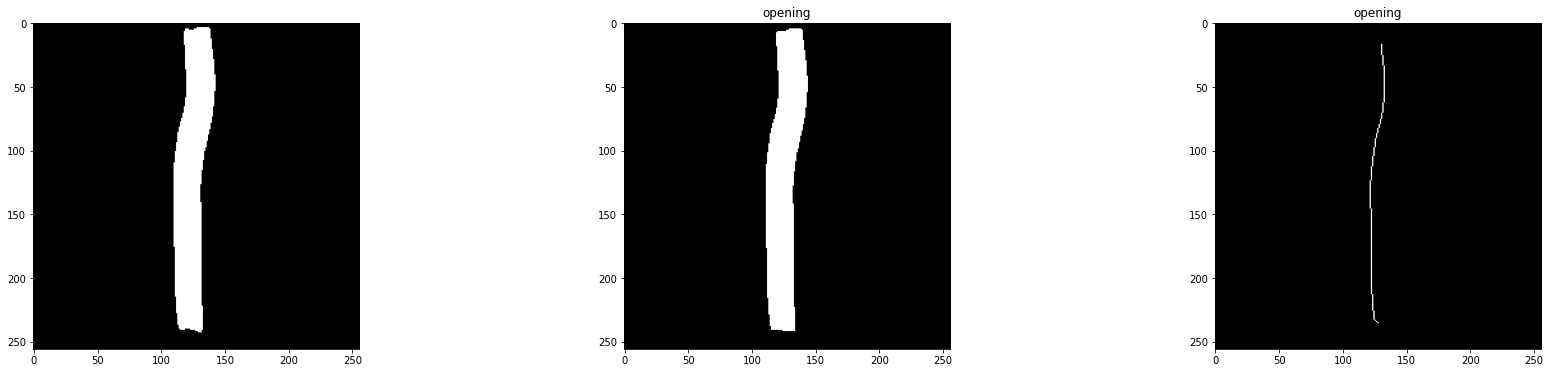

 11%|█         | 26/232 [00:18<02:24,  1.42it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012336989378142009037093216704_00-062-138.png


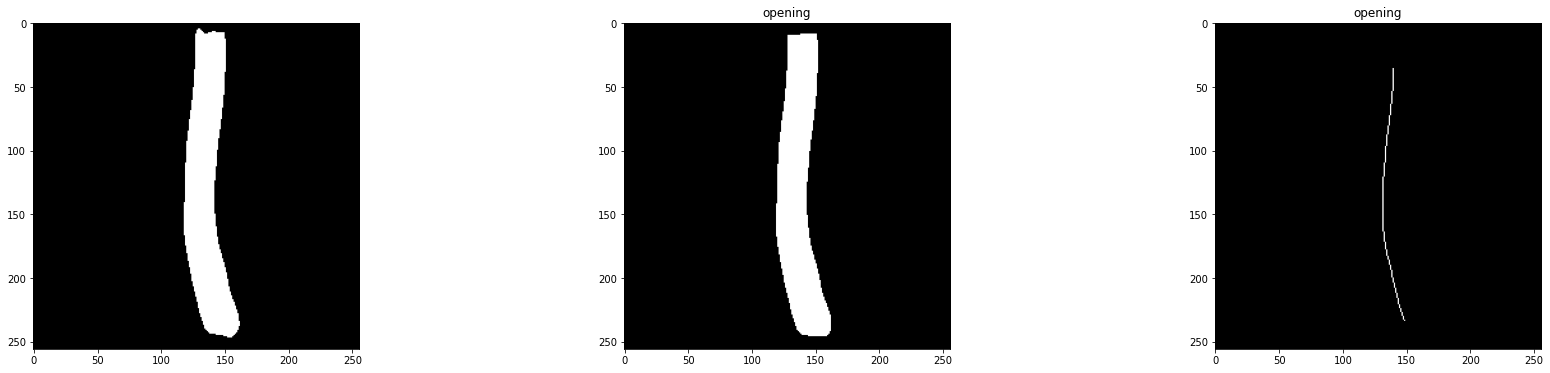

 12%|█▏        | 27/232 [00:19<02:21,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012339356563862009048115322148_00-058-171.png


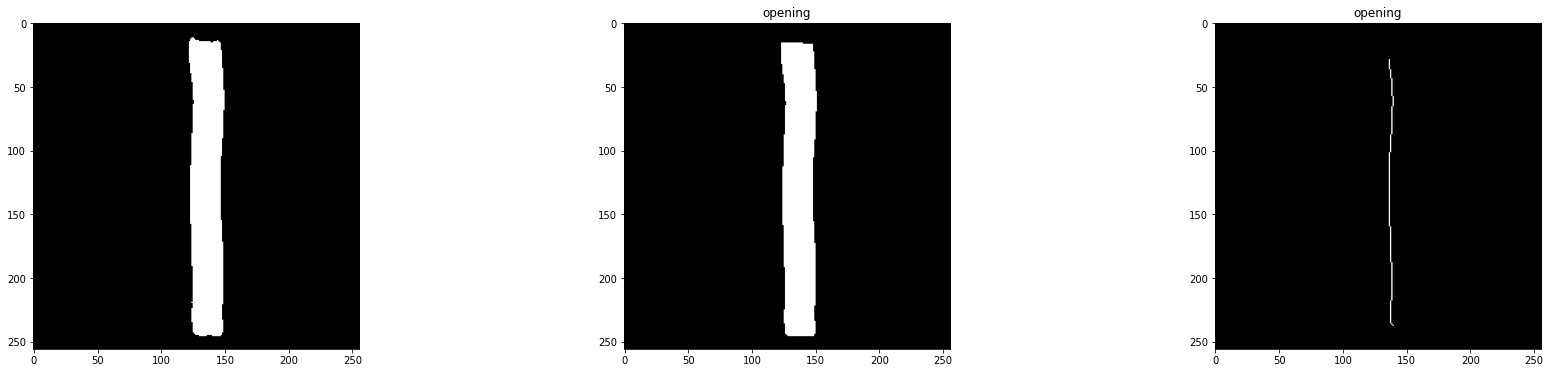

 12%|█▏        | 28/232 [00:19<02:19,  1.46it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012339356563862009048102002058_00-057-187.png


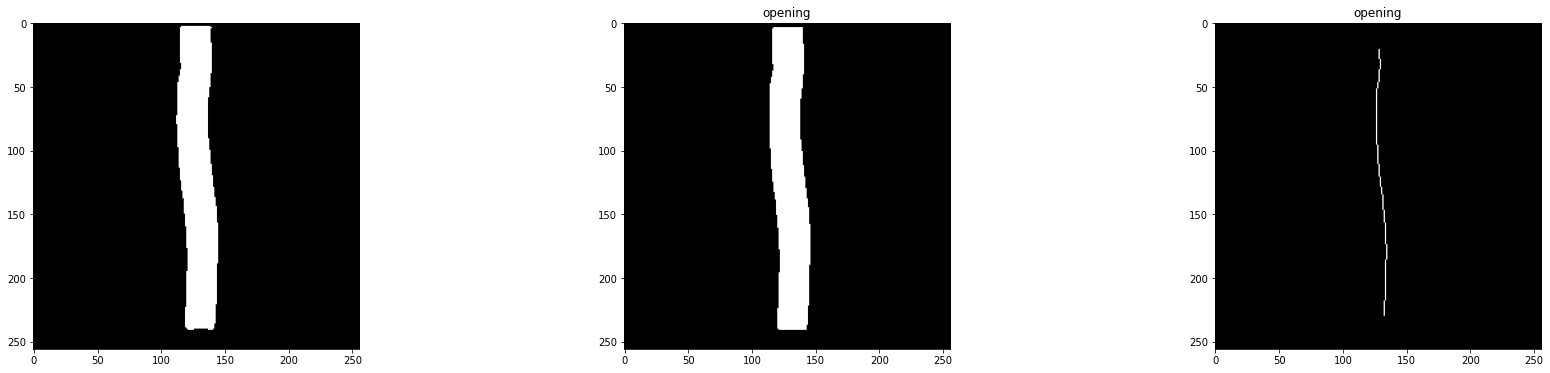

 12%|█▎        | 29/232 [00:20<02:16,  1.48it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012339356563862009061140558253_00-048-191.png


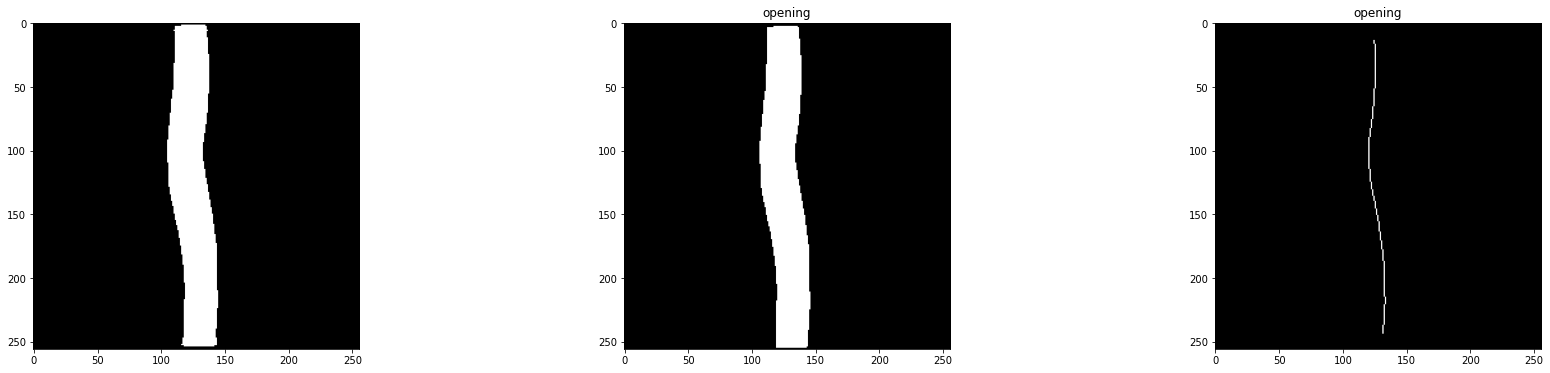

 13%|█▎        | 30/232 [00:21<02:15,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012339356563862009072123949980_00-043-158.png


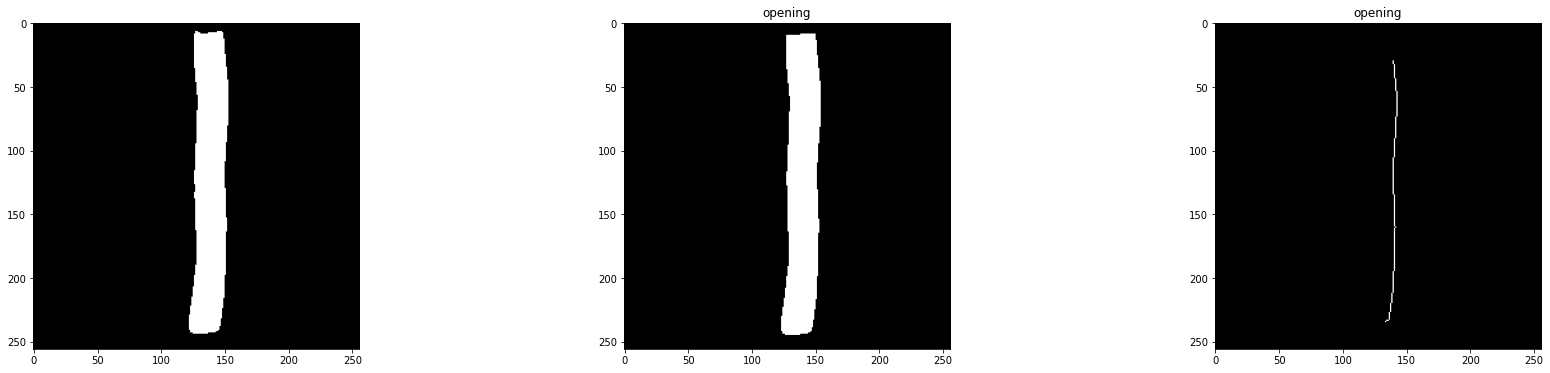

 13%|█▎        | 31/232 [00:21<02:22,  1.42it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012339356563862009070110421136_00-047-174.png


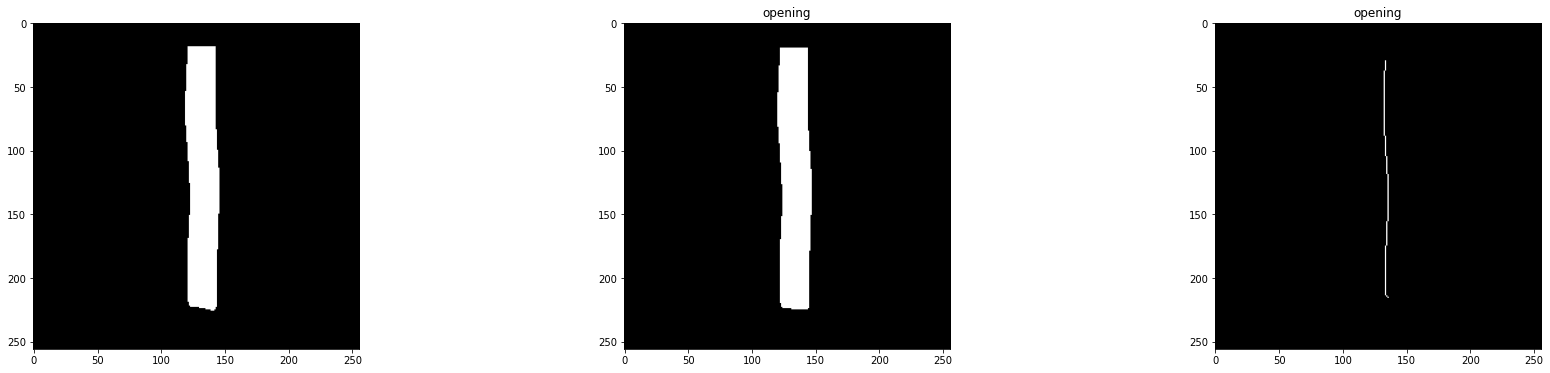

 14%|█▍        | 32/232 [00:22<02:18,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009083131836549_00-044-194.png


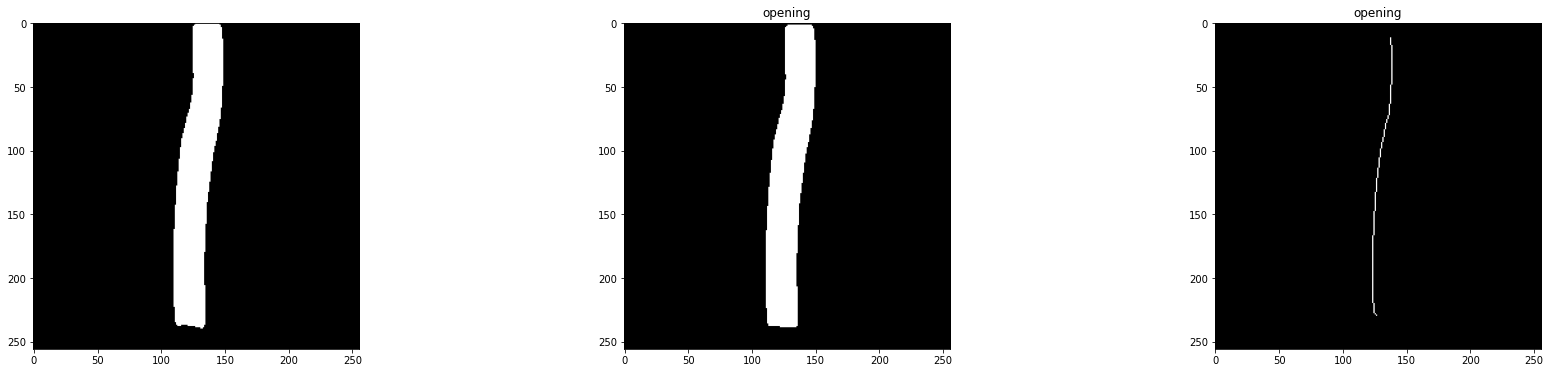

 14%|█▍        | 33/232 [00:23<02:16,  1.46it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009092133735206_00-066-038.png


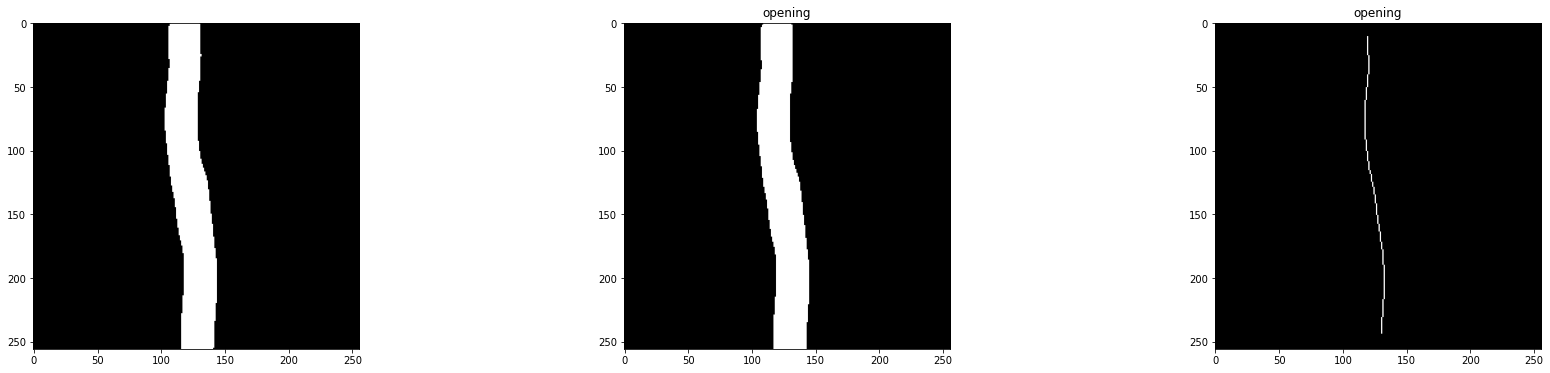

 15%|█▍        | 34/232 [00:23<02:13,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009091122942022_00-040-030.png


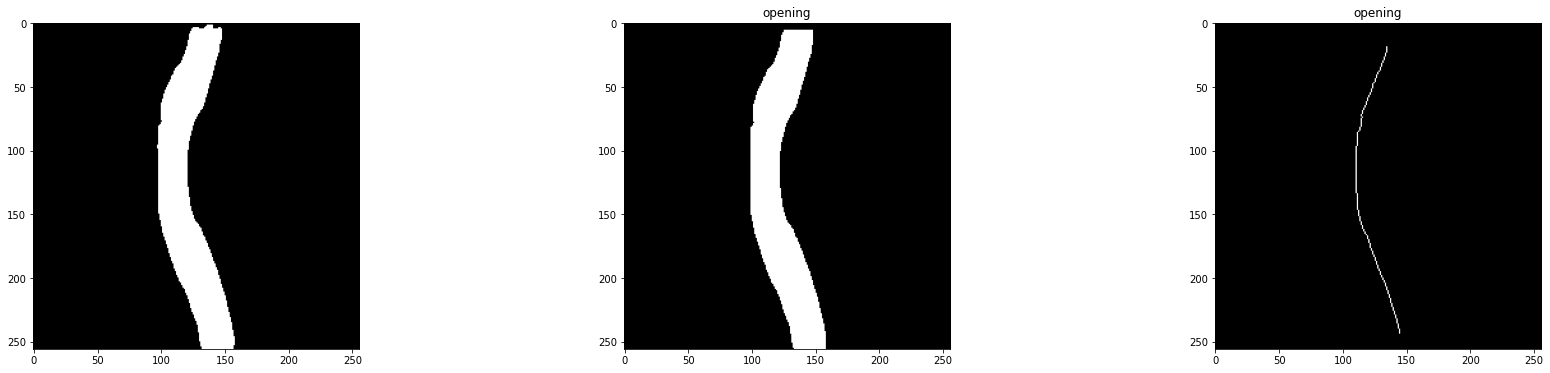

 15%|█▌        | 35/232 [00:24<02:11,  1.50it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009097125821586_00-066-011.png


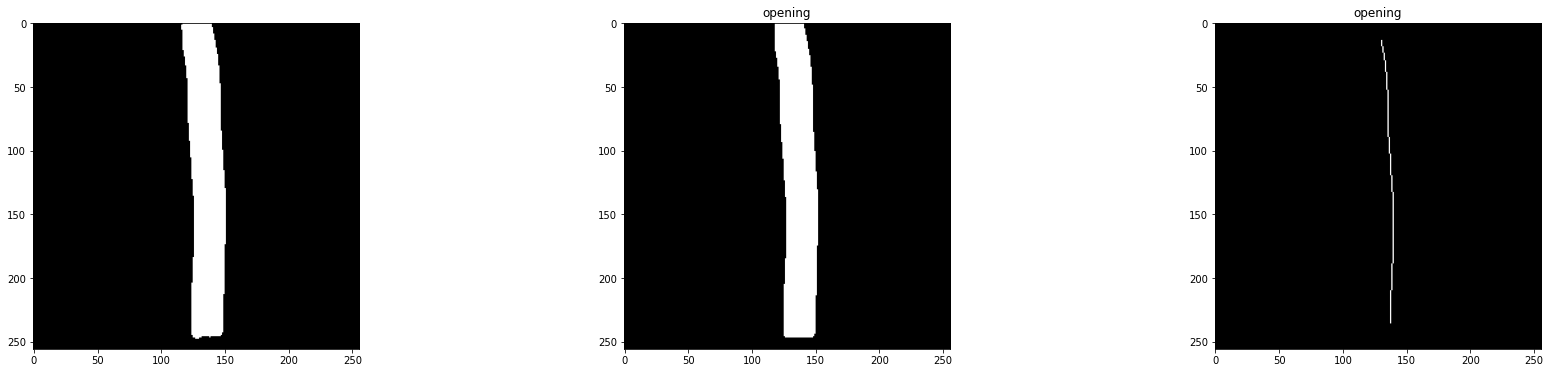

 16%|█▌        | 36/232 [00:25<02:10,  1.50it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009106103852598_00-069-181.png


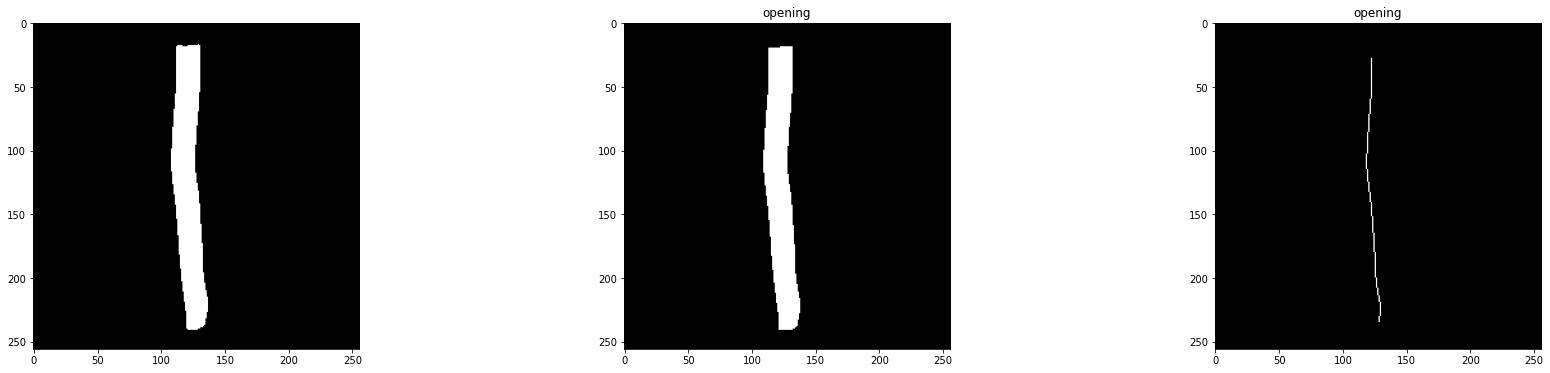

 16%|█▌        | 37/232 [00:25<02:10,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009107092544550_00-069-079.png


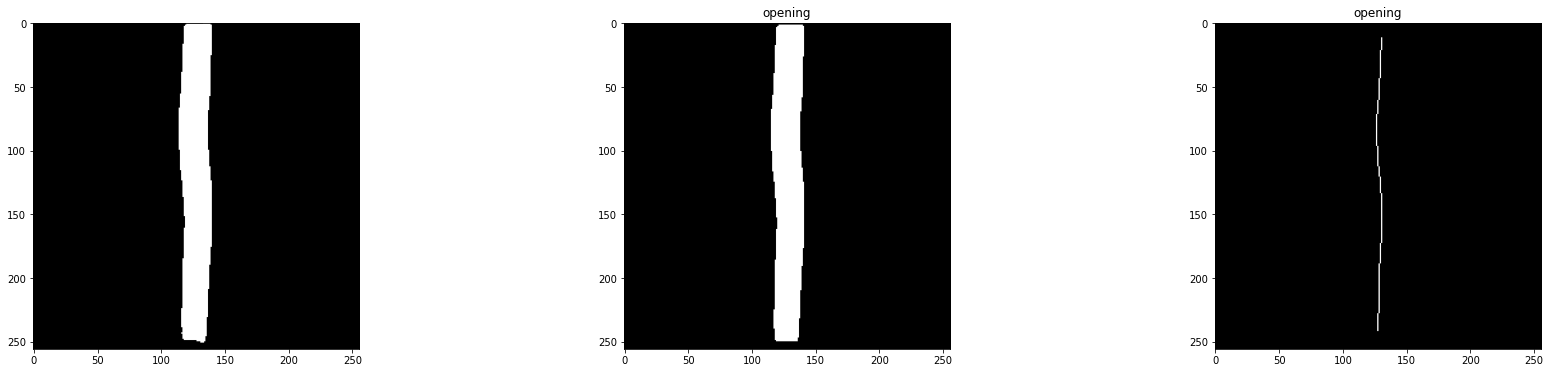

 16%|█▋        | 38/232 [00:26<02:19,  1.39it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/12752243479320241529248_01-015-002.png


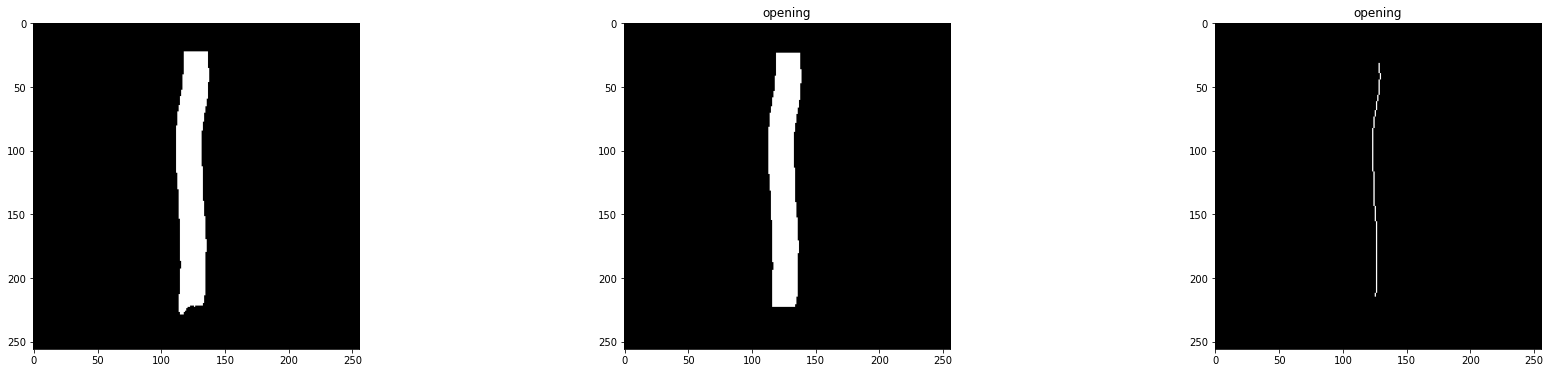

 17%|█▋        | 39/232 [00:27<02:16,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/12752243479320241586215_00-119-093.png


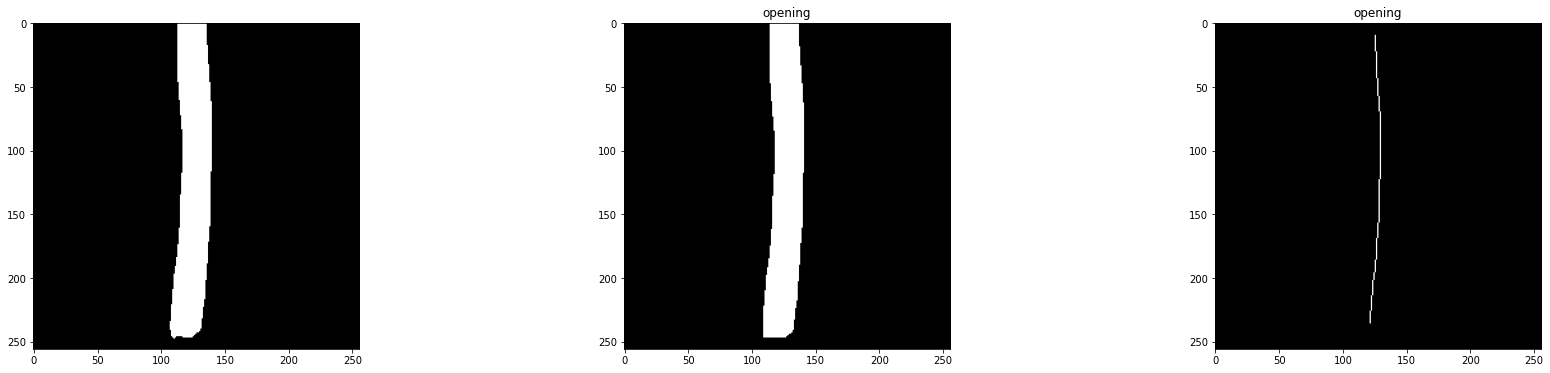

 17%|█▋        | 40/232 [00:28<02:16,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009131141746204_00-036-158.png


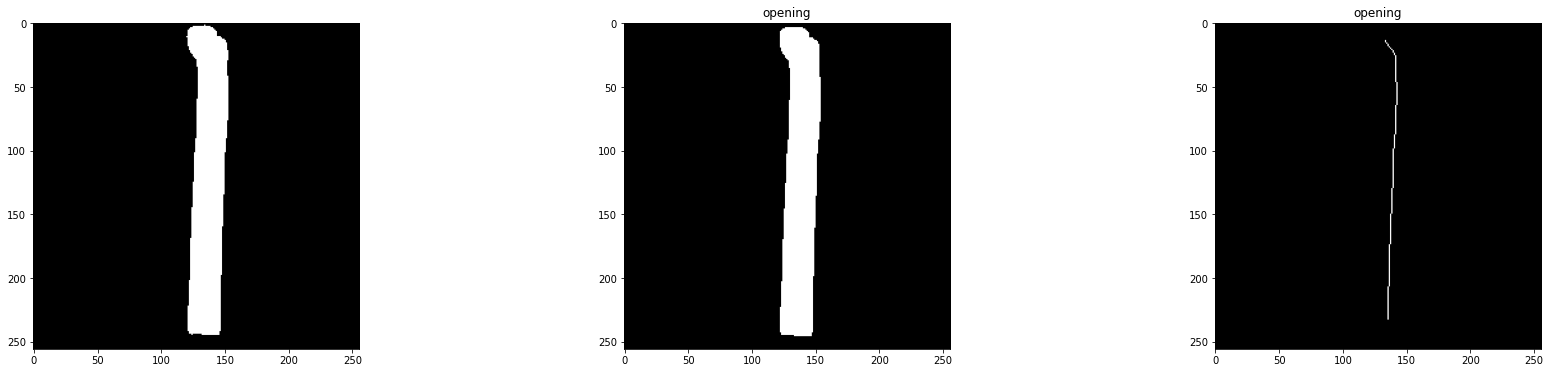

 18%|█▊        | 41/232 [00:28<02:13,  1.43it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009124140740100_00-035-050.png


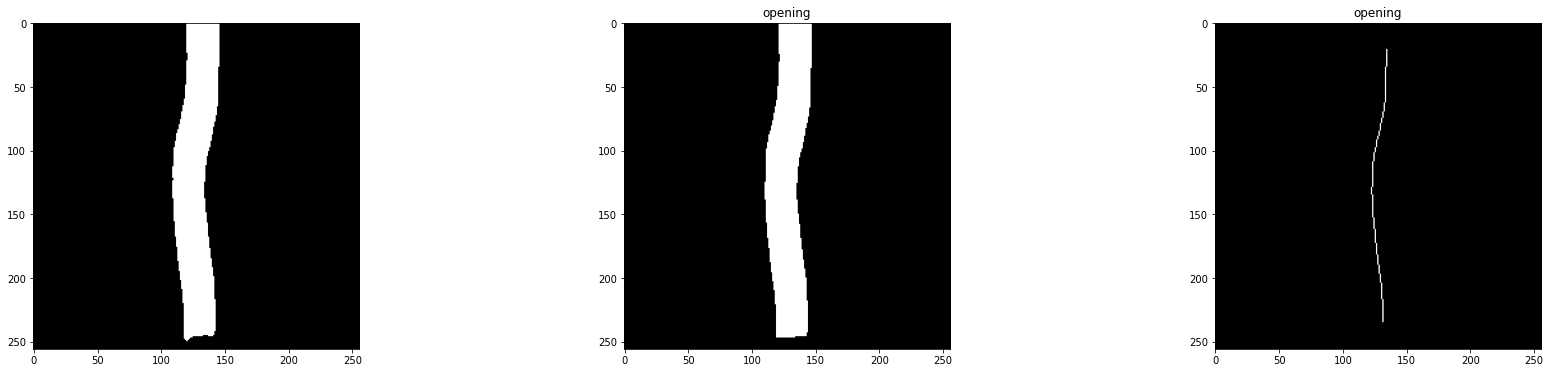

 18%|█▊        | 42/232 [00:29<02:11,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009131113150727_00-039-168.png


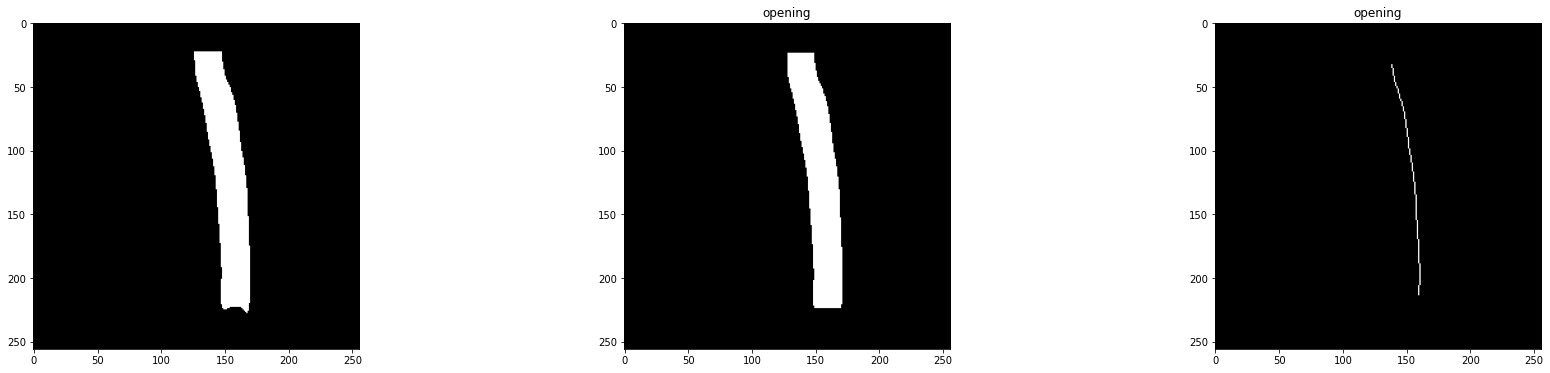

 19%|█▊        | 43/232 [00:30<02:08,  1.47it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009153124054438_00-098-050.png


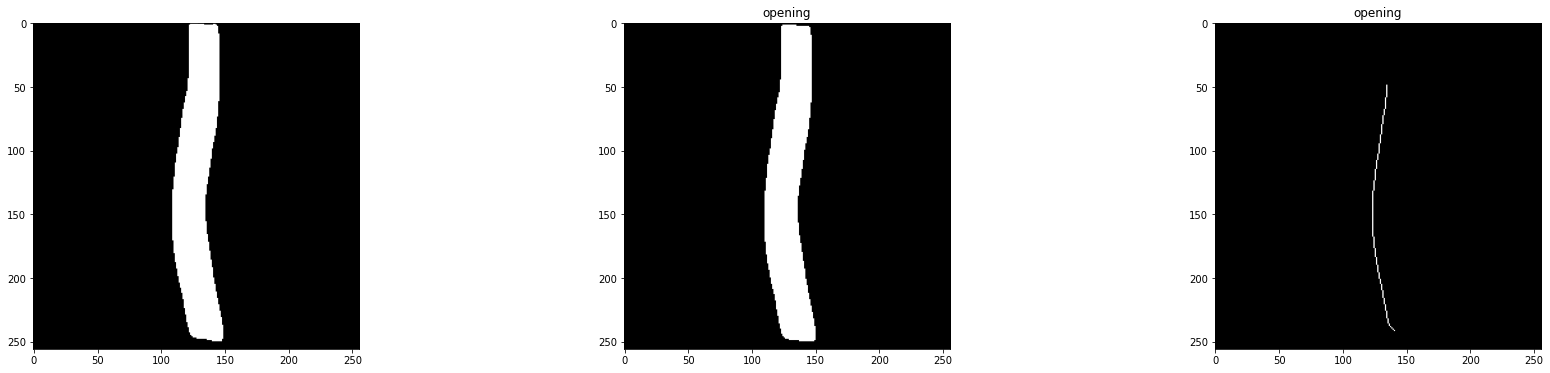

 19%|█▉        | 44/232 [00:30<02:06,  1.48it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009139085513877_00-036-091.png


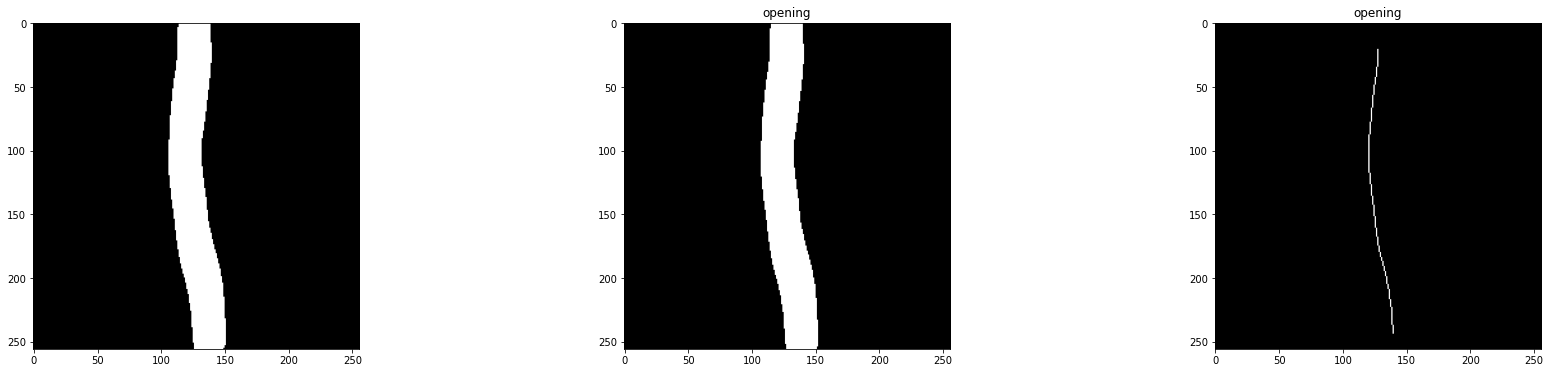

 19%|█▉        | 45/232 [00:31<02:15,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009111132121096_00-072-071.png


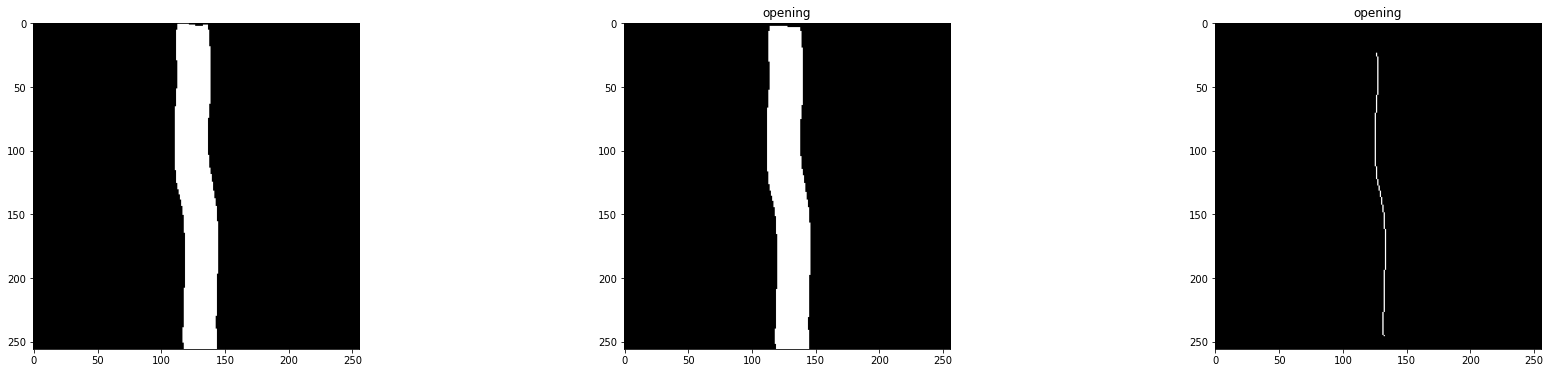

 20%|█▉        | 46/232 [00:32<02:12,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009168121216328_00-096-190.png


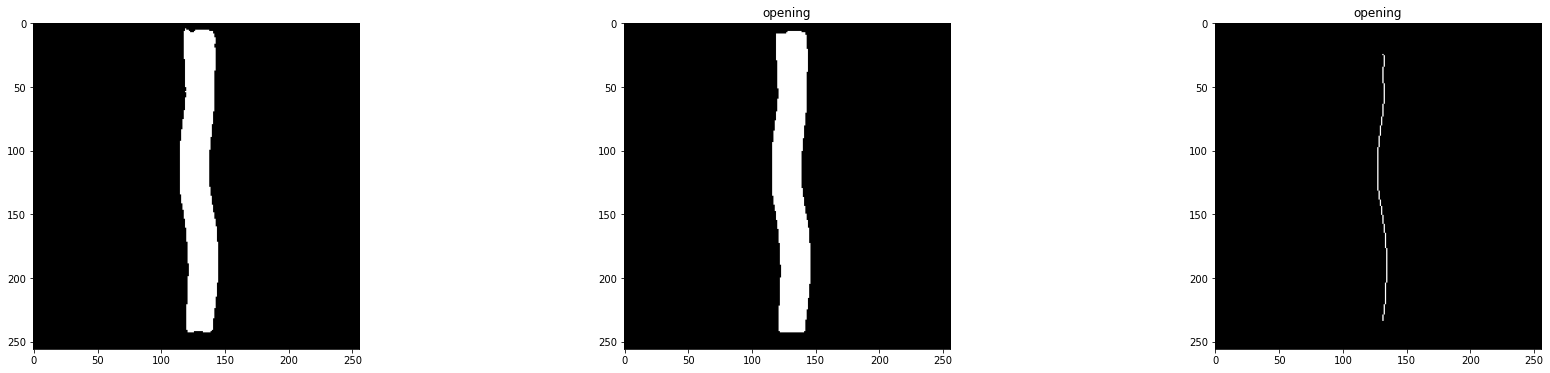

 20%|██        | 47/232 [00:32<02:10,  1.42it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009188093921293_00-028-038.png


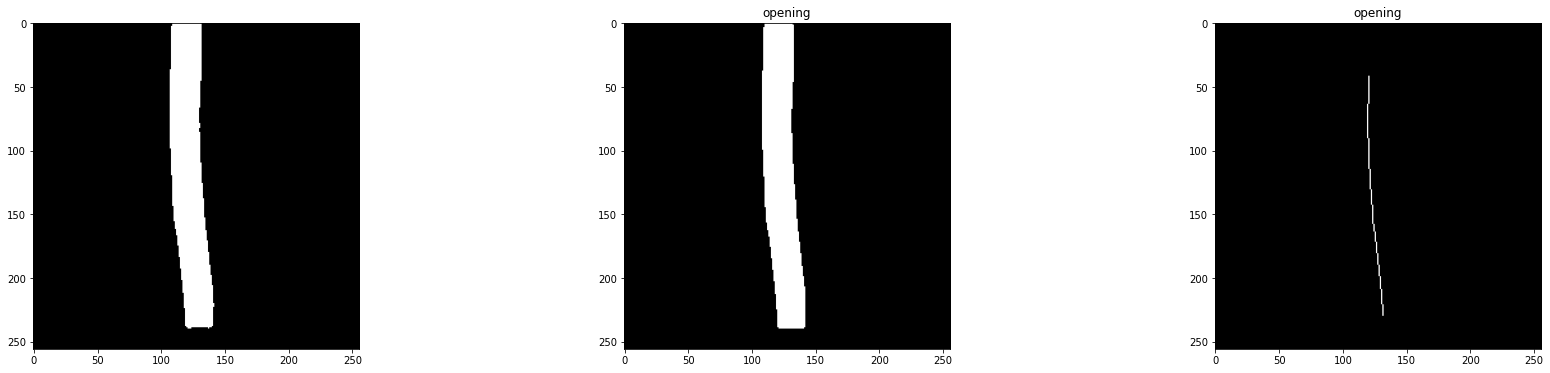

 21%|██        | 48/232 [00:33<02:07,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009159143216996_00-098-153.png


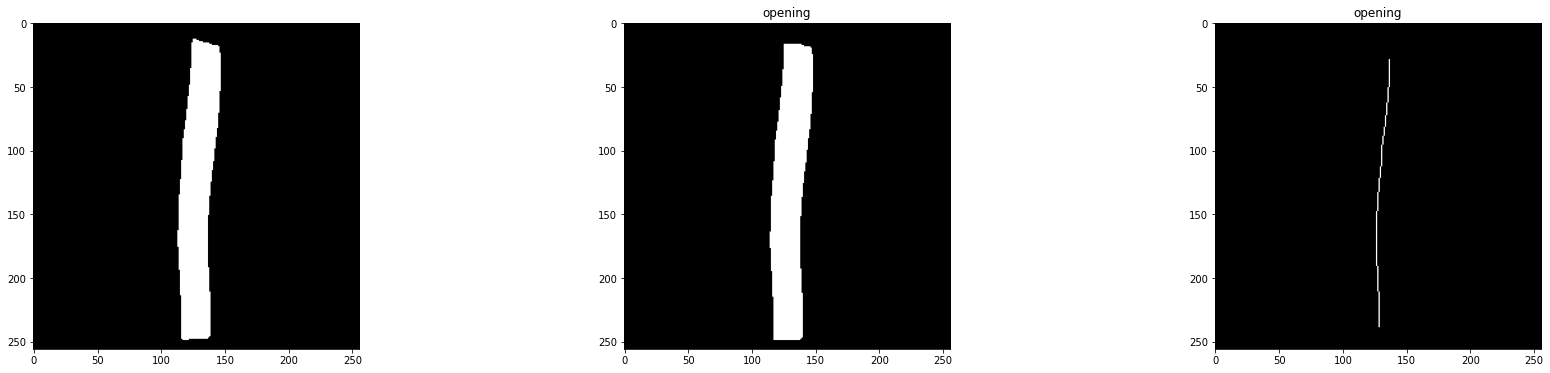

 21%|██        | 49/232 [00:34<02:07,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009180113327064_00-028-002.png


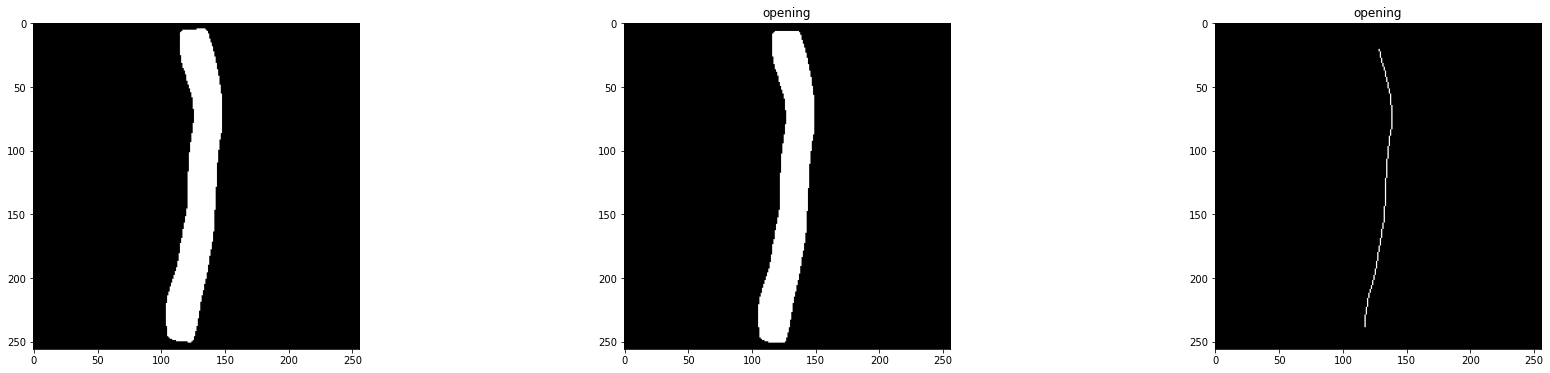

 22%|██▏       | 50/232 [00:34<02:06,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009183080540844_00-030-194.png


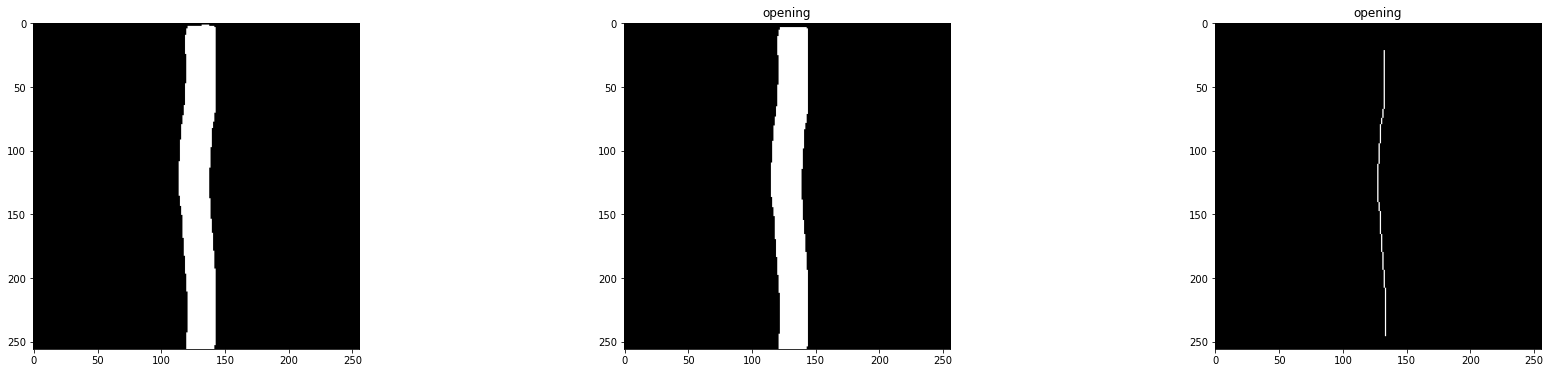

 22%|██▏       | 51/232 [00:35<02:06,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009180095931599_00-094-092.png


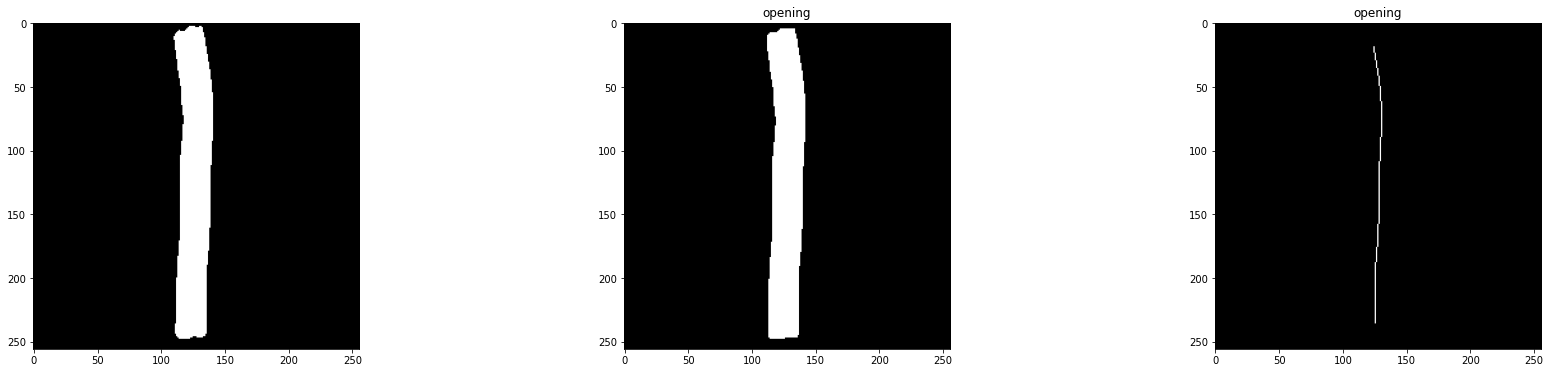

 22%|██▏       | 52/232 [00:36<02:11,  1.37it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011095130713438_00-190-194.png


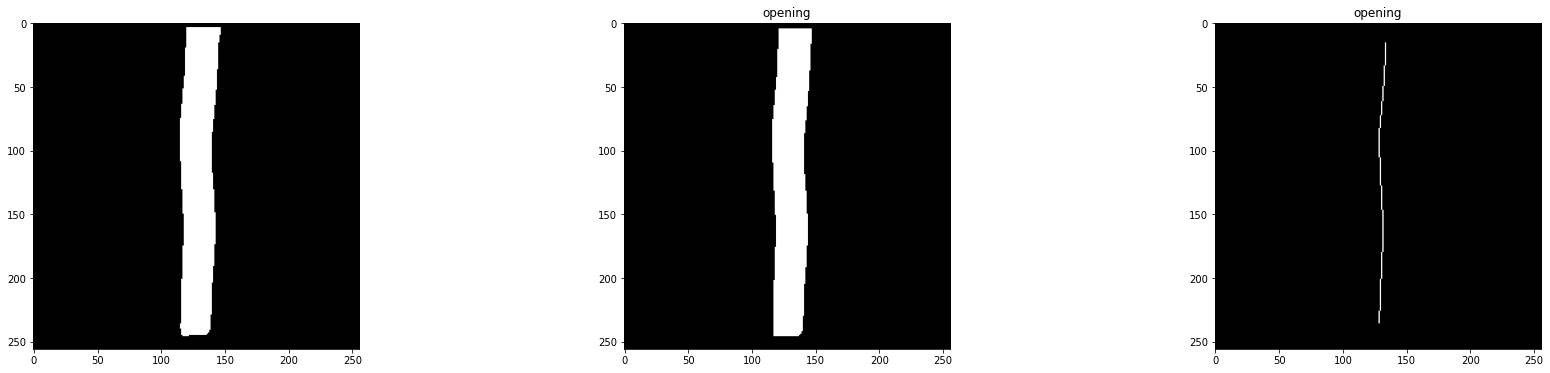

 23%|██▎       | 53/232 [00:37<02:09,  1.39it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013079112456134_02-071-174.png


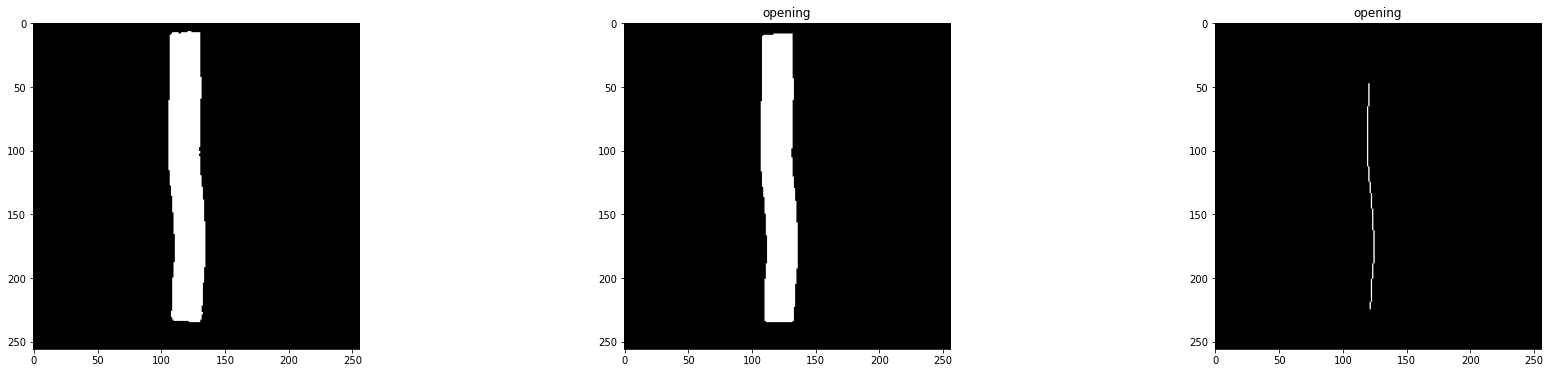

 23%|██▎       | 54/232 [00:37<02:05,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011096131626537_00-184-061.png


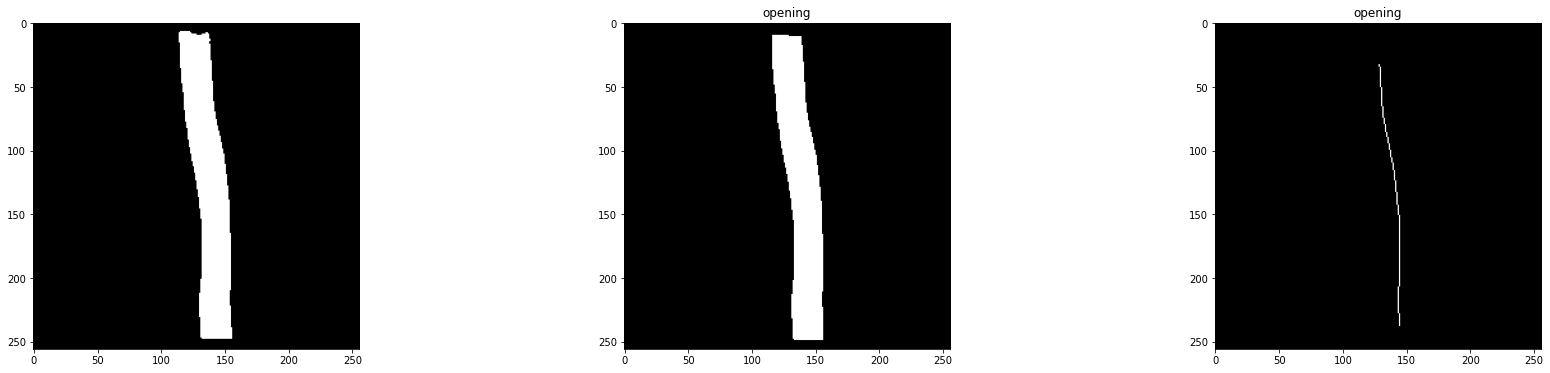

 24%|██▎       | 55/232 [00:38<02:04,  1.43it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011243115231555_00-132-027.png


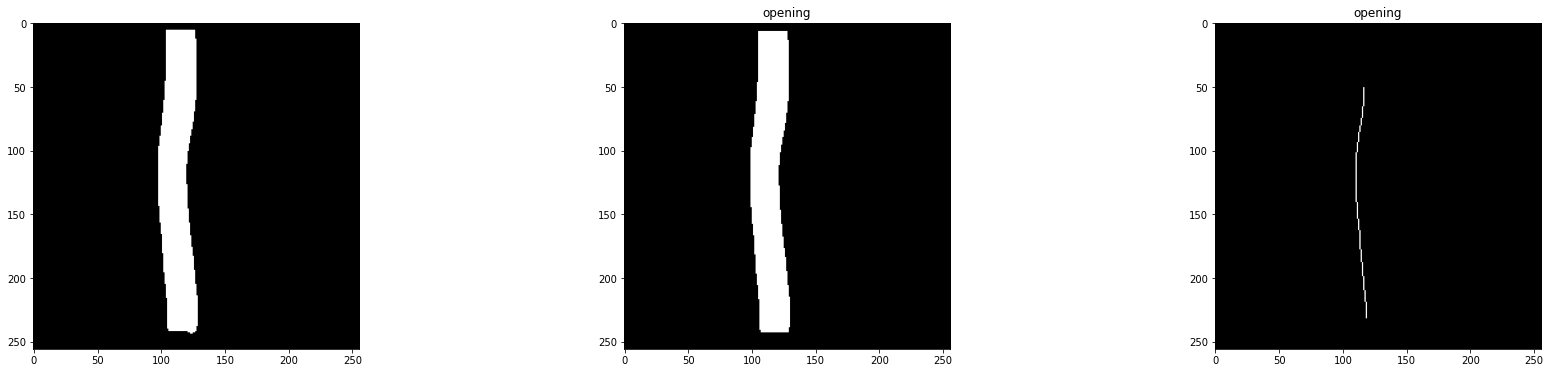

 24%|██▍       | 56/232 [00:39<02:02,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011236124612348_00-115-033.png


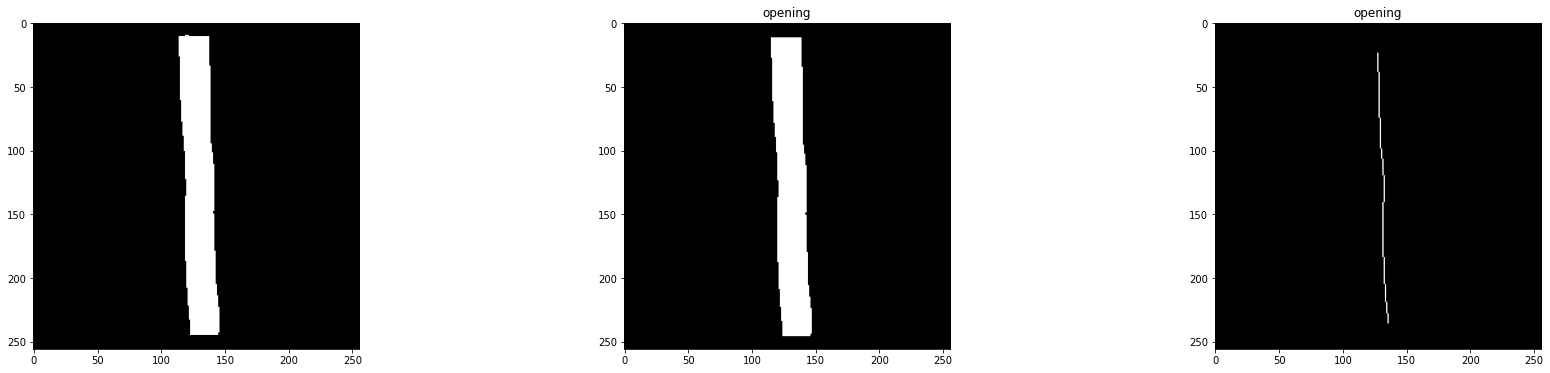

 25%|██▍       | 57/232 [00:39<02:01,  1.44it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011262143818375_00-136-124.png


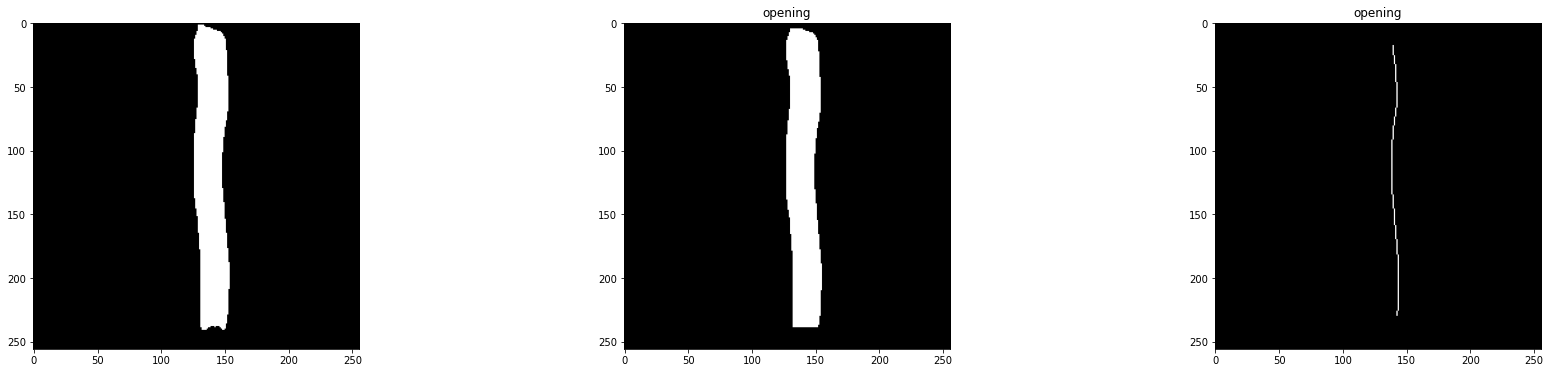

 25%|██▌       | 58/232 [00:40<01:59,  1.45it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011286175514635_00-195-052.png


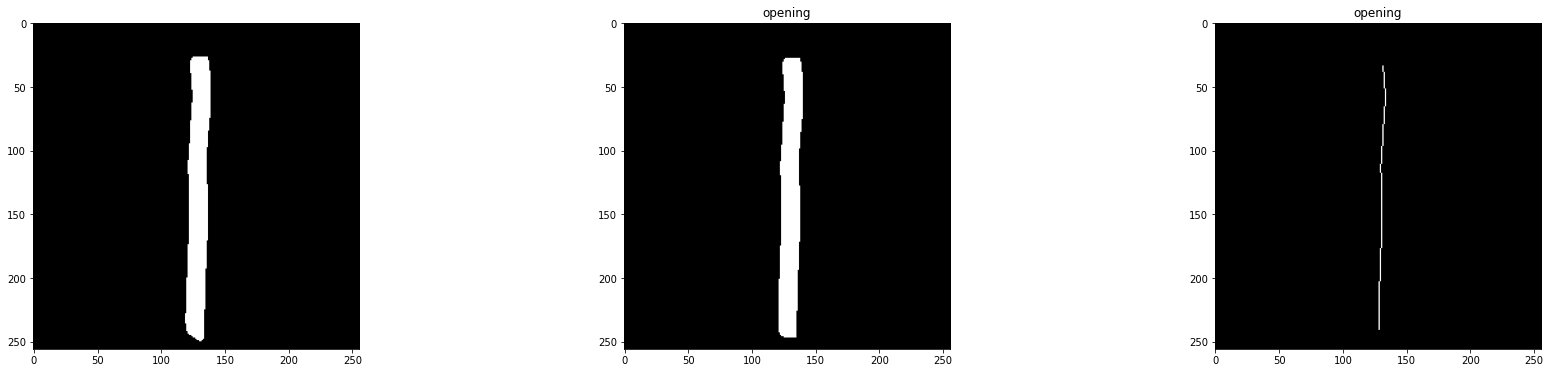

 25%|██▌       | 59/232 [00:41<02:12,  1.31it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011283132916487_00-198-131.png


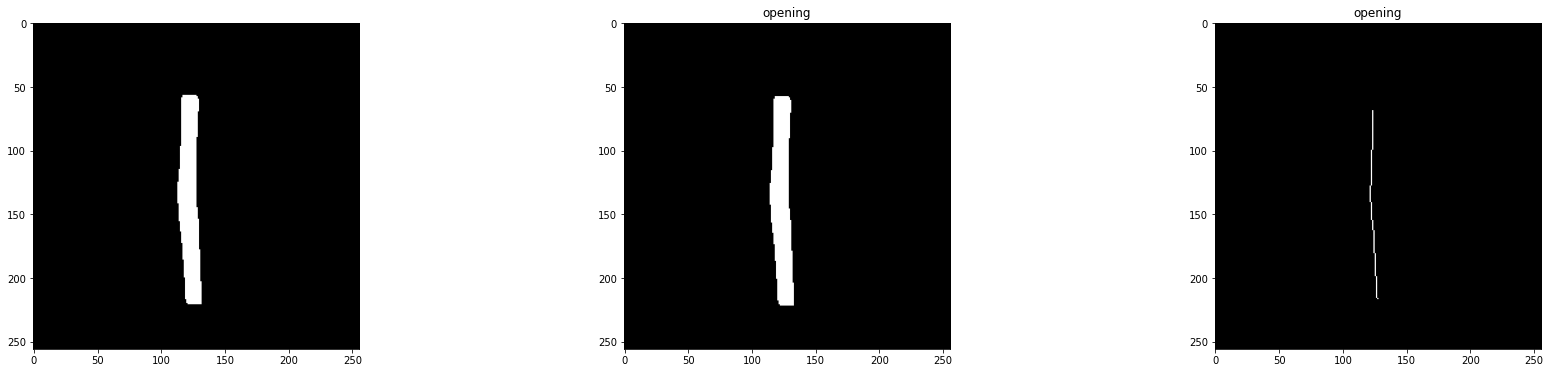

 26%|██▌       | 60/232 [00:42<02:12,  1.30it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013217898866992011333161744174_01-010-190.png


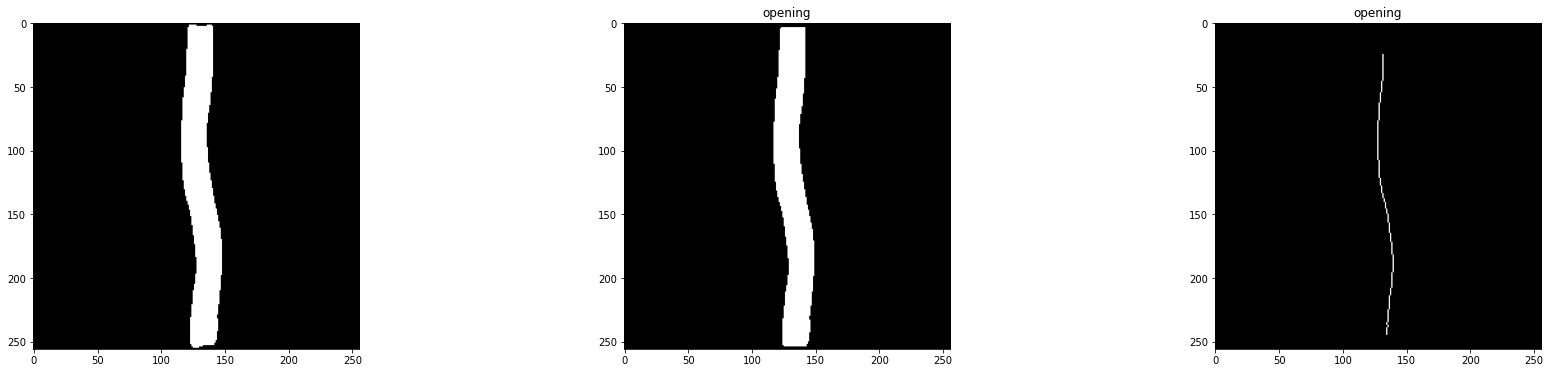

 26%|██▋       | 61/232 [00:43<02:08,  1.33it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013217898866992011355140745611_01-011-142.png


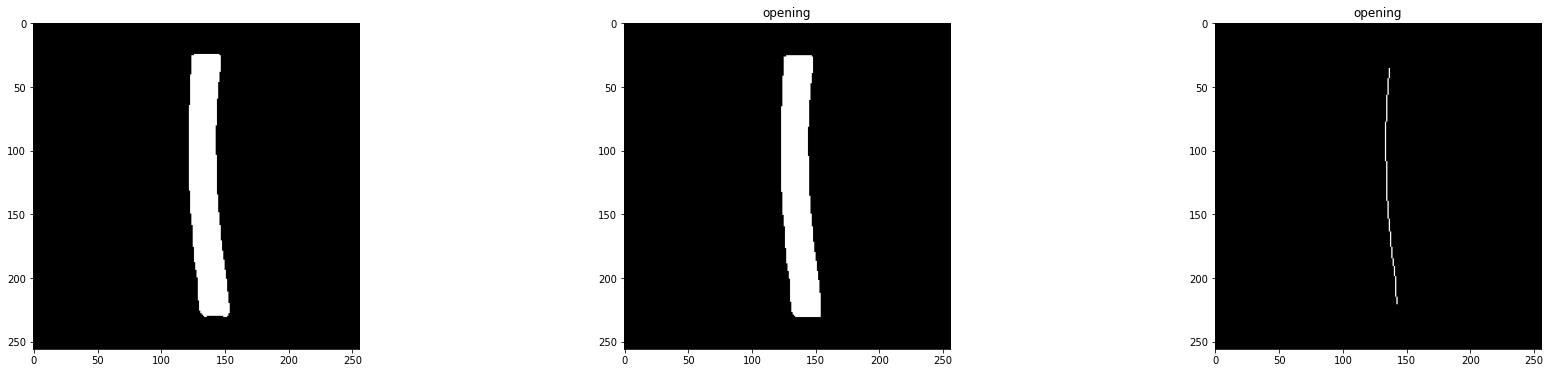

 27%|██▋       | 62/232 [00:43<02:06,  1.35it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013451228379692012248123937712_01-057-039.png


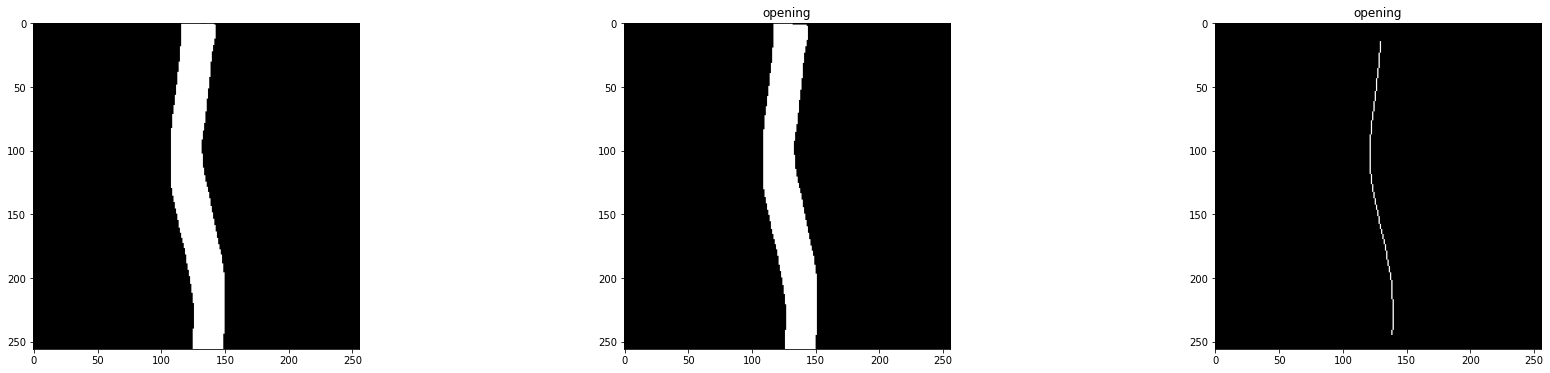

 27%|██▋       | 63/232 [00:44<02:01,  1.39it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013297909654432012058175822504_01-094-028.png


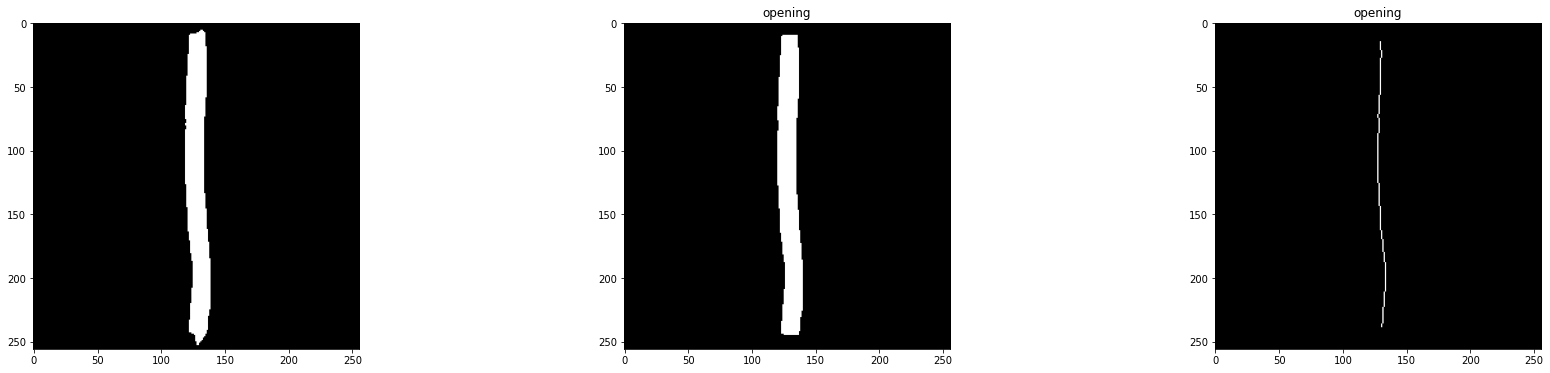

 28%|██▊       | 64/232 [00:45<02:05,  1.33it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013451228379692012275114041884_01-123-038.png


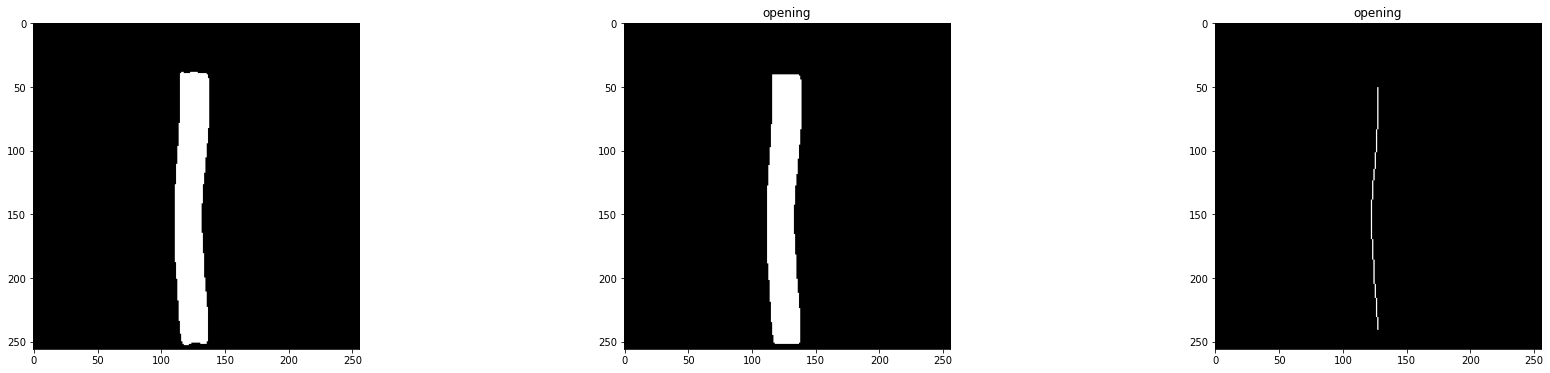

 28%|██▊       | 65/232 [00:45<02:03,  1.35it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013451228379692012276122606583_01-123-168.png


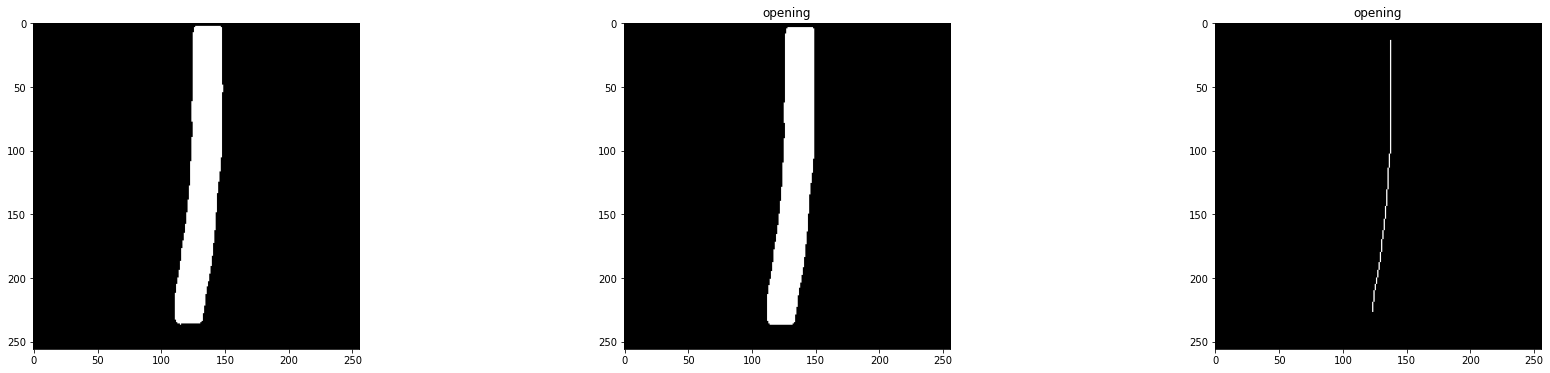

 28%|██▊       | 66/232 [00:46<02:09,  1.29it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013534861372972012356140447408_02-015-103.png


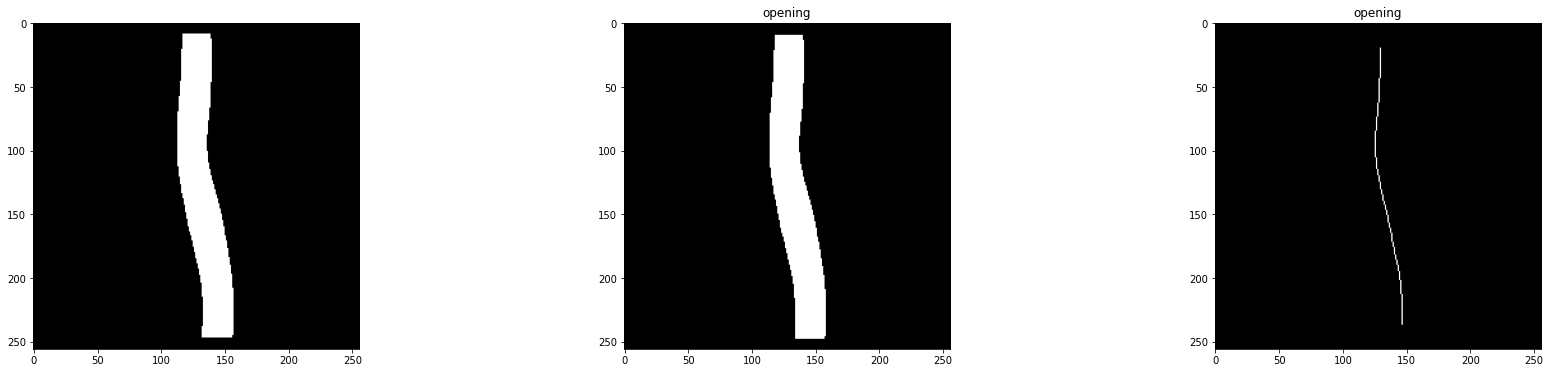

 29%|██▉       | 67/232 [00:47<02:05,  1.32it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013534861372972012345135856854_02-007-025.png


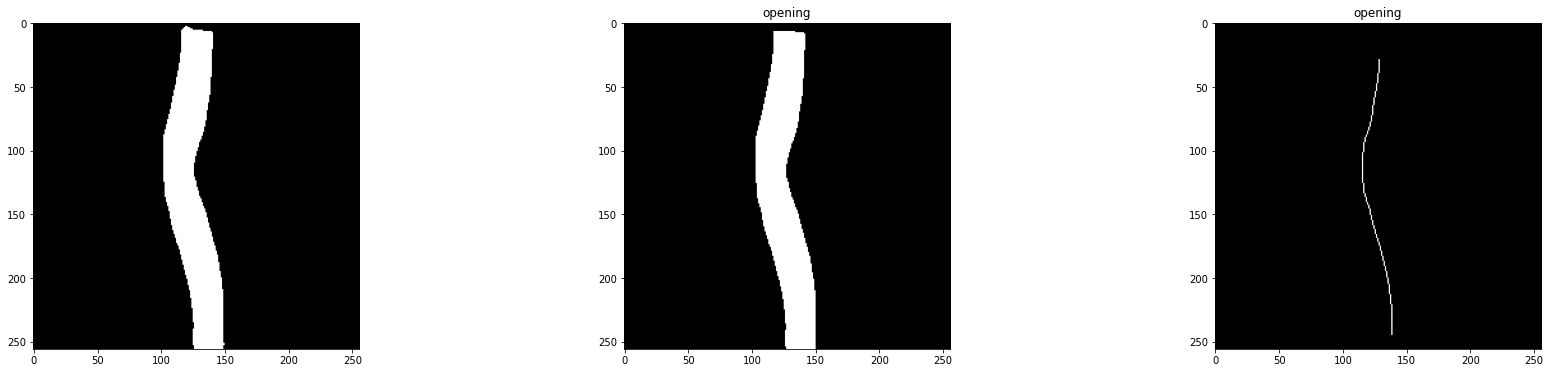

 29%|██▉       | 68/232 [00:48<02:01,  1.35it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013534861372972013003095427392_02-010-027.png


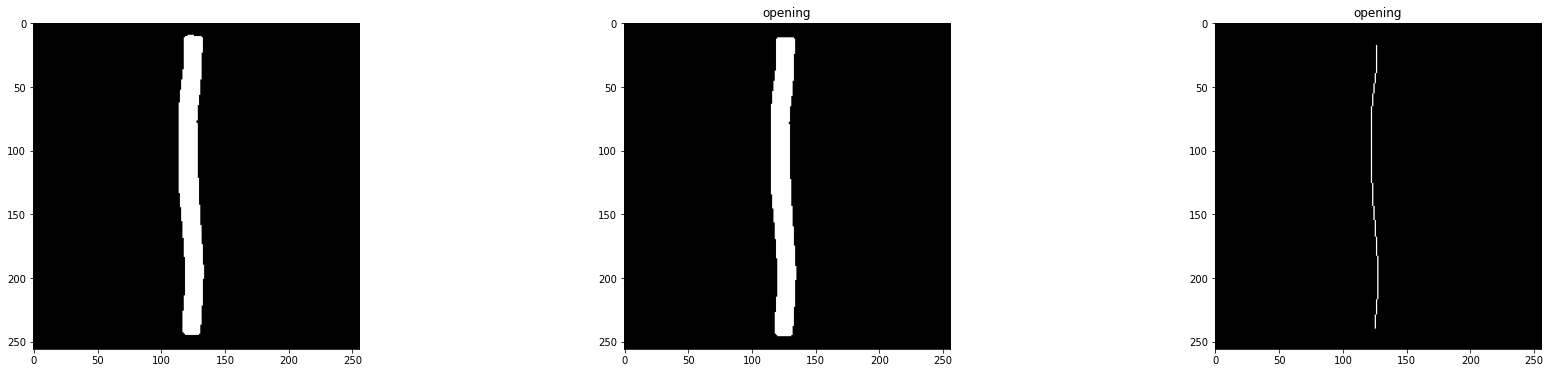

 30%|██▉       | 69/232 [00:49<02:04,  1.31it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013017140958011_02-009-114.png


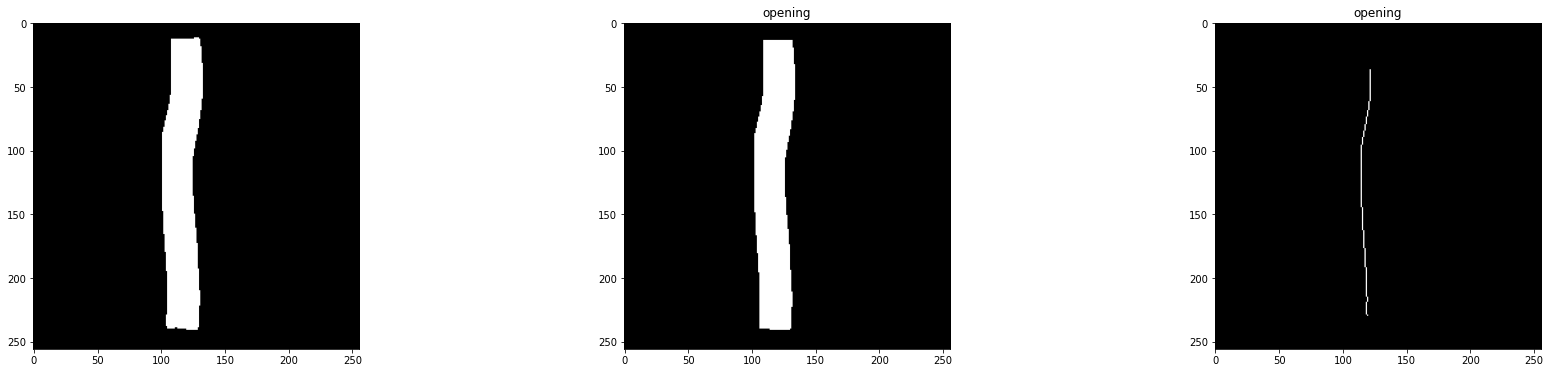

 30%|███       | 70/232 [00:49<01:59,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013017133342322_02-012-123.png


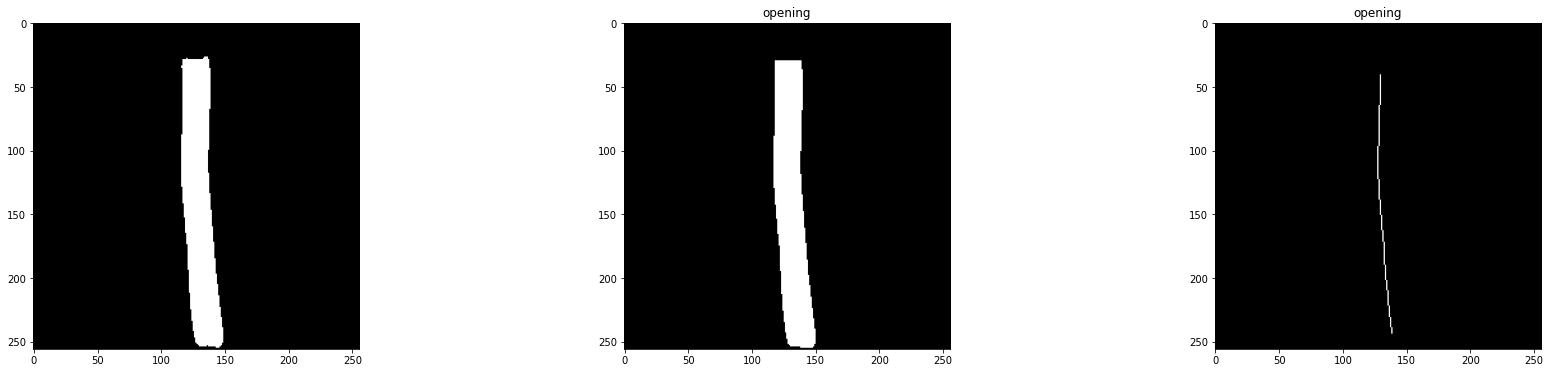

 31%|███       | 71/232 [00:50<01:58,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013017134103475_02-012-131.png


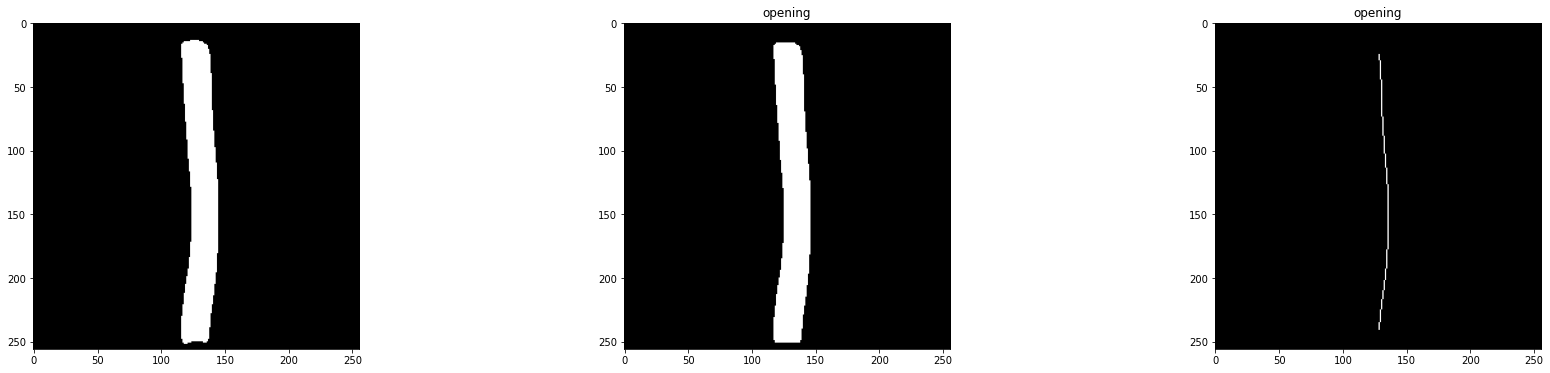

 31%|███       | 72/232 [00:51<01:57,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013017113516227_02-005-094.png


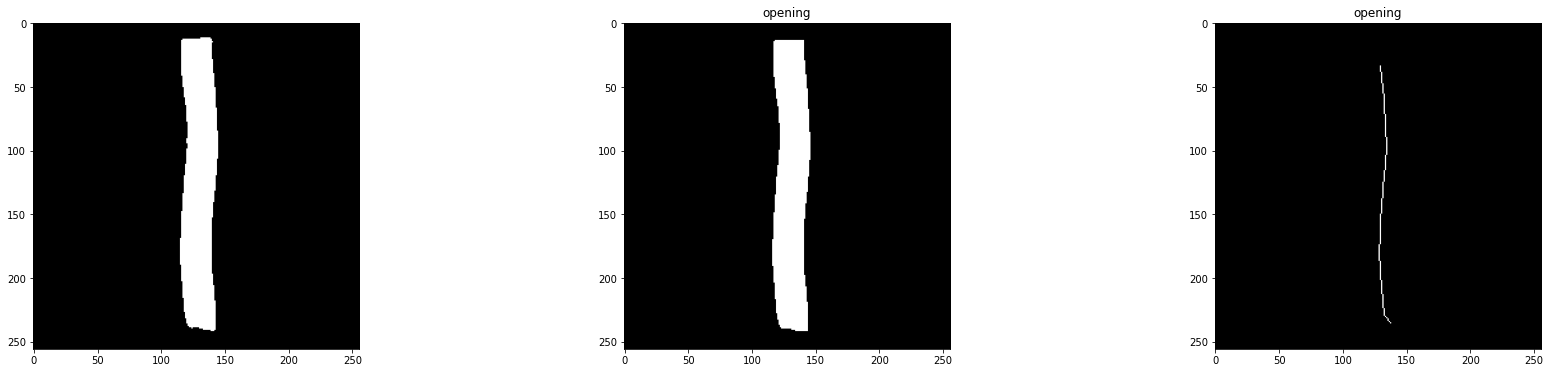

 31%|███▏      | 73/232 [00:52<02:00,  1.32it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013011111641510_02-017-008.png


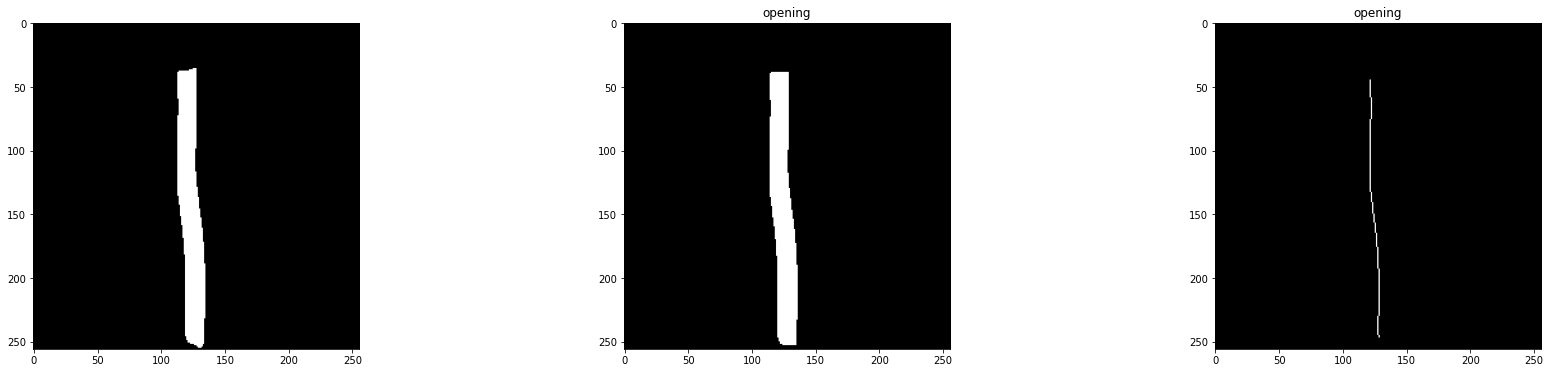

 32%|███▏      | 74/232 [00:52<01:59,  1.33it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013015112631950_02-004-155.png


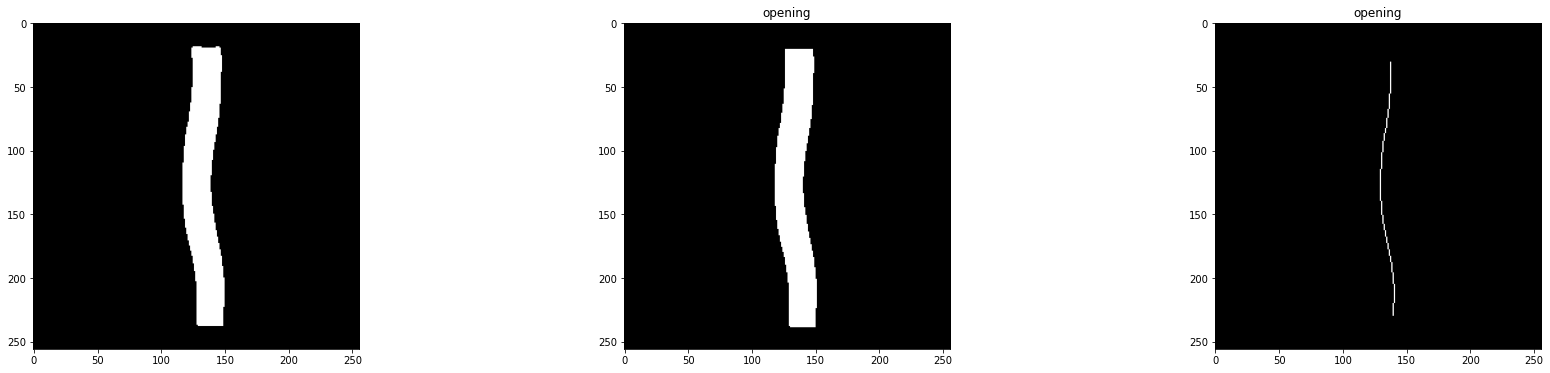

 32%|███▏      | 75/232 [00:53<01:55,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013017143002722_02-009-102.png


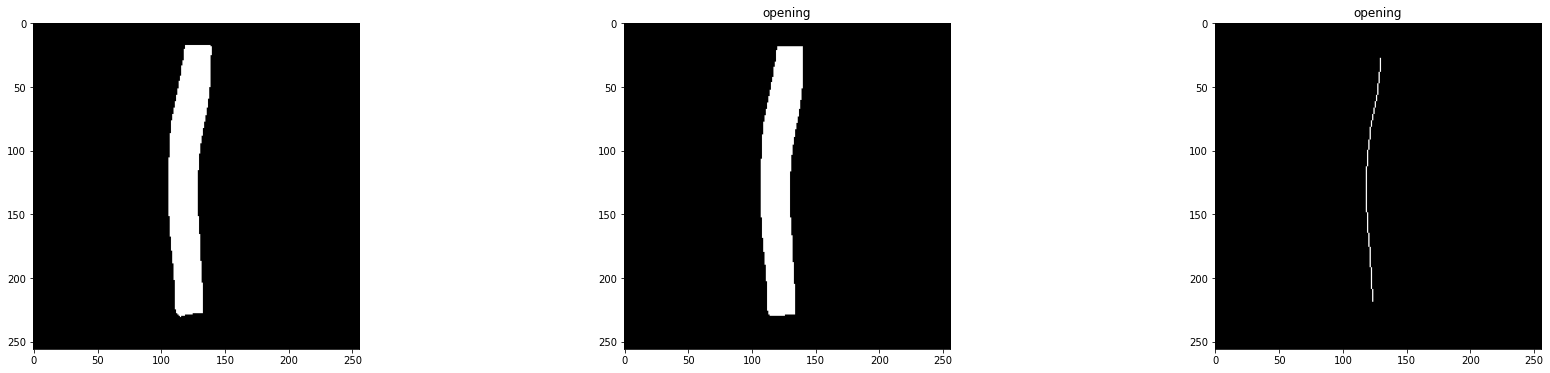

 33%|███▎      | 76/232 [00:54<01:53,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013023085336349_02-005-065.png


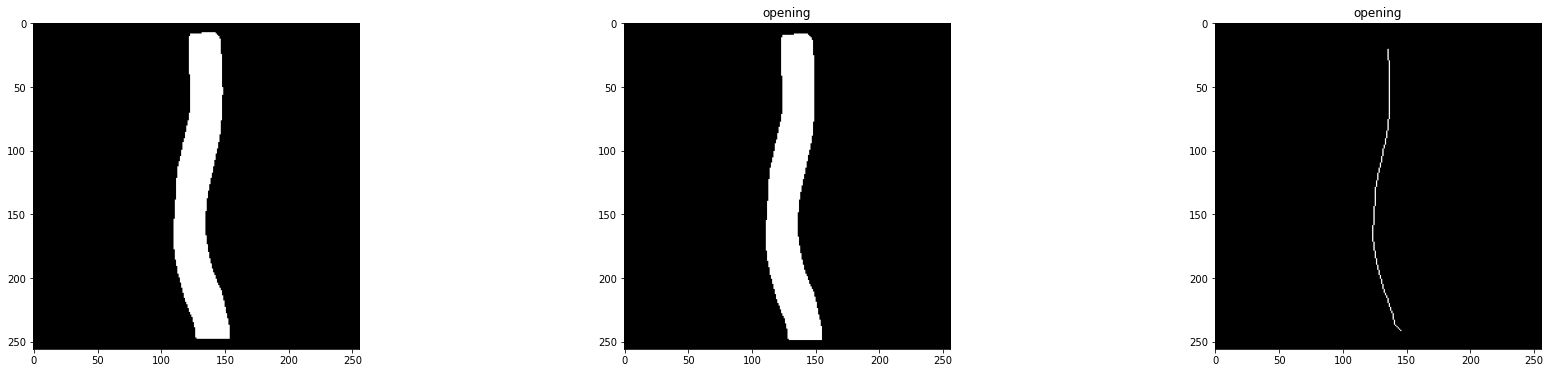

 33%|███▎      | 77/232 [00:54<01:50,  1.40it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013575787468332013022093718337_02-011-118.png


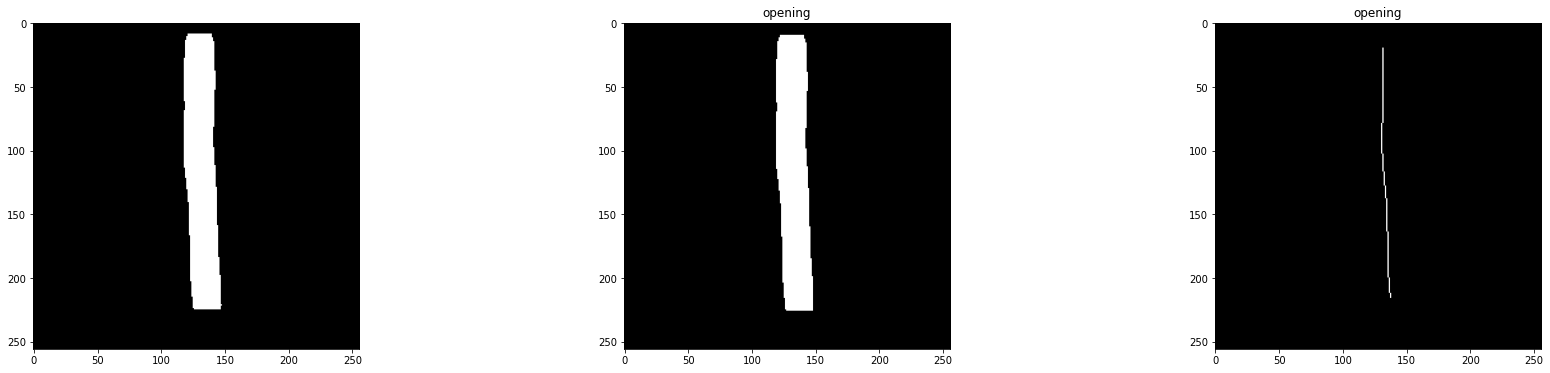

 34%|███▎      | 78/232 [00:55<01:49,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013031133027392_02-015-100.png


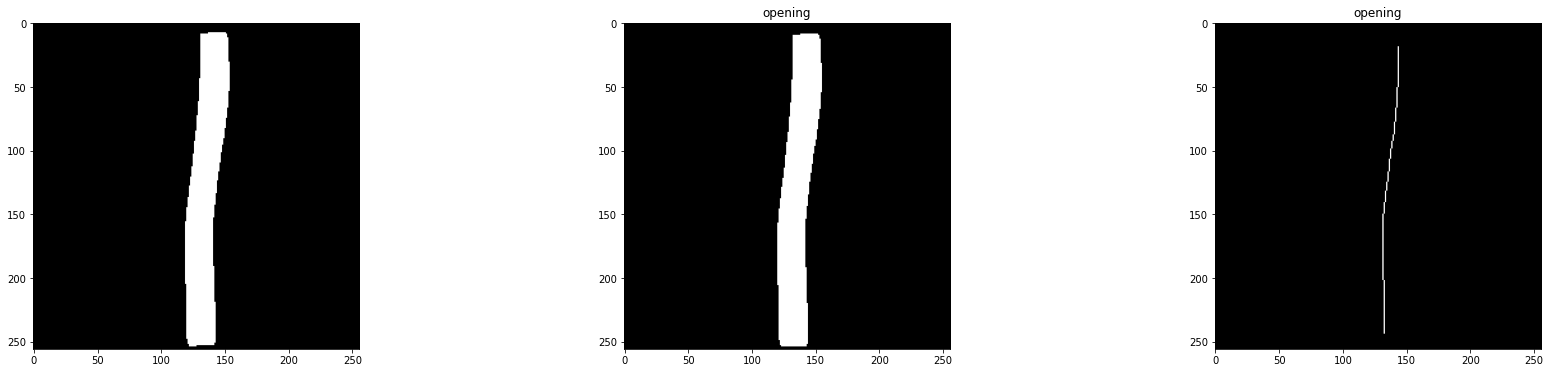

 34%|███▍      | 79/232 [00:56<01:47,  1.42it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013032103121443_02-057-156.png


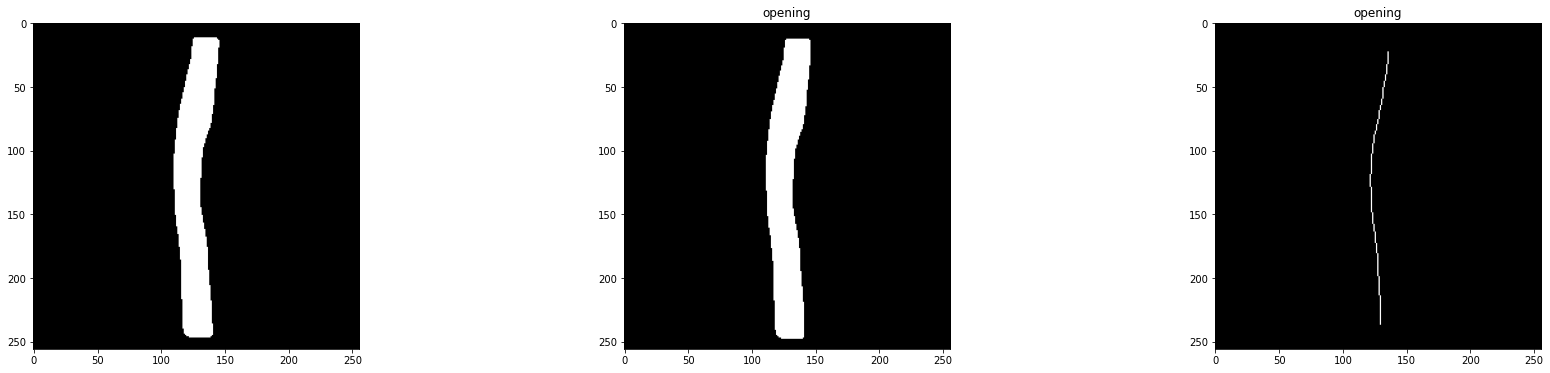

 34%|███▍      | 80/232 [00:57<01:55,  1.32it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013037105829283_02-067-136.png


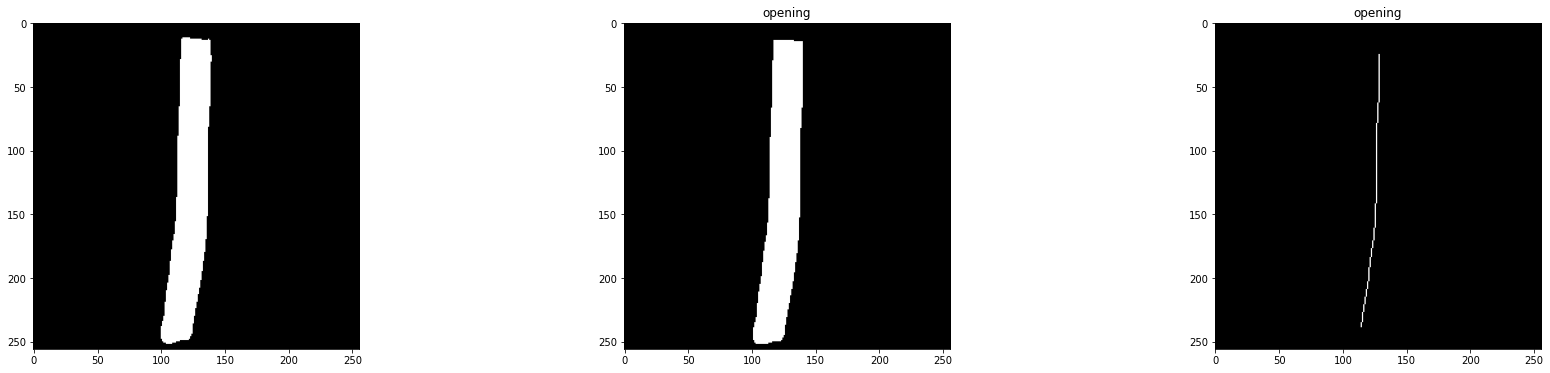

 35%|███▍      | 81/232 [00:57<01:51,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013028082653704_02-014-132.png


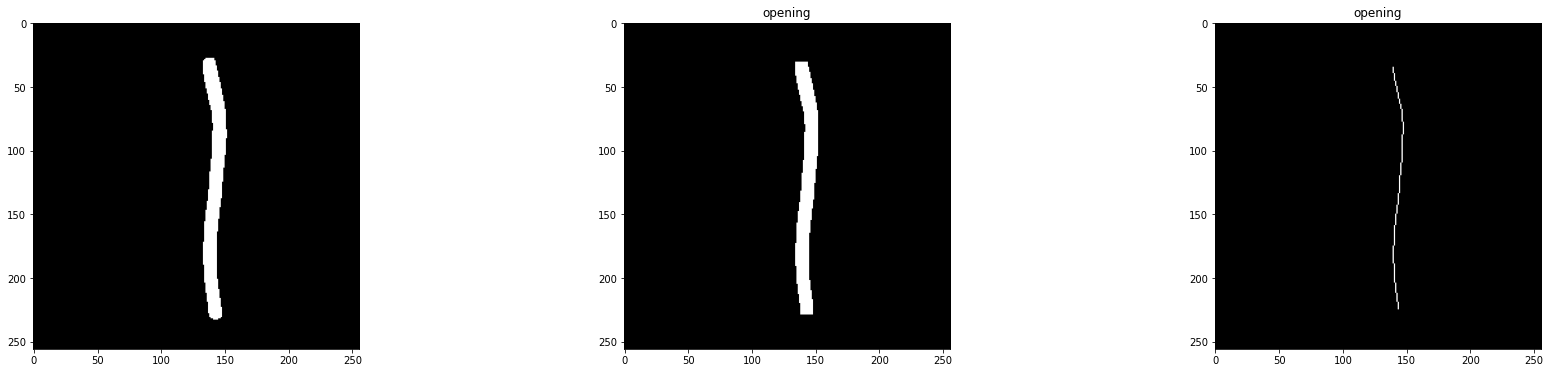

 35%|███▌      | 82/232 [00:58<02:00,  1.25it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013045112317617_02-068-132.png


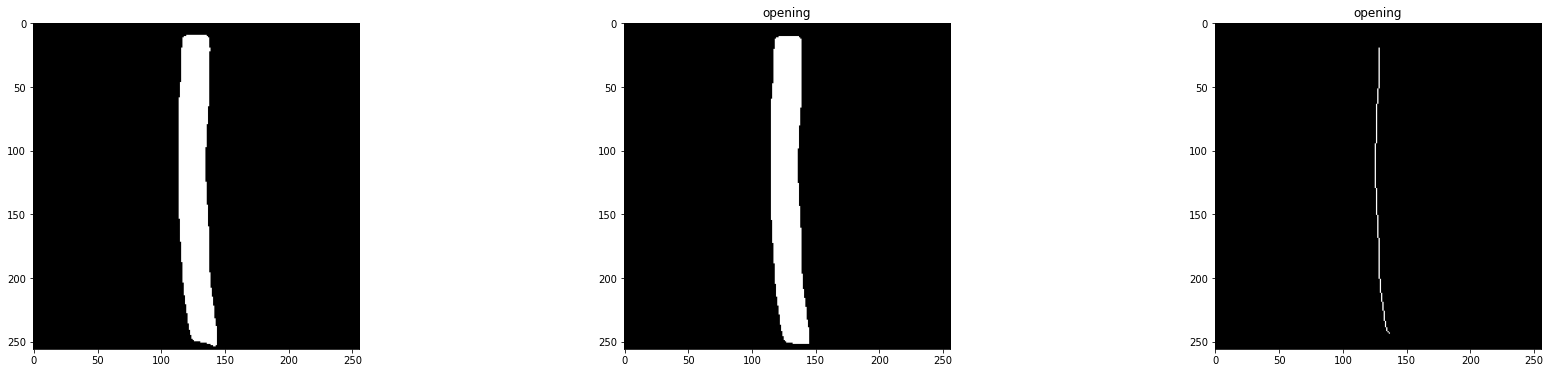

 36%|███▌      | 83/232 [00:59<01:55,  1.29it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013030111924294_02-015-118.png


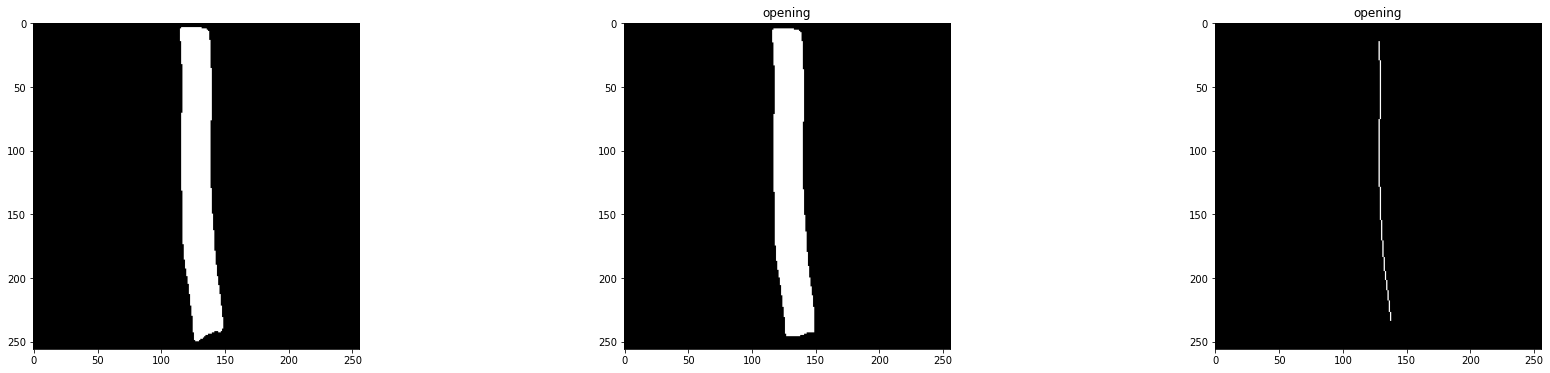

 36%|███▌      | 84/232 [01:00<01:50,  1.34it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013031144109037_02-064-043.png


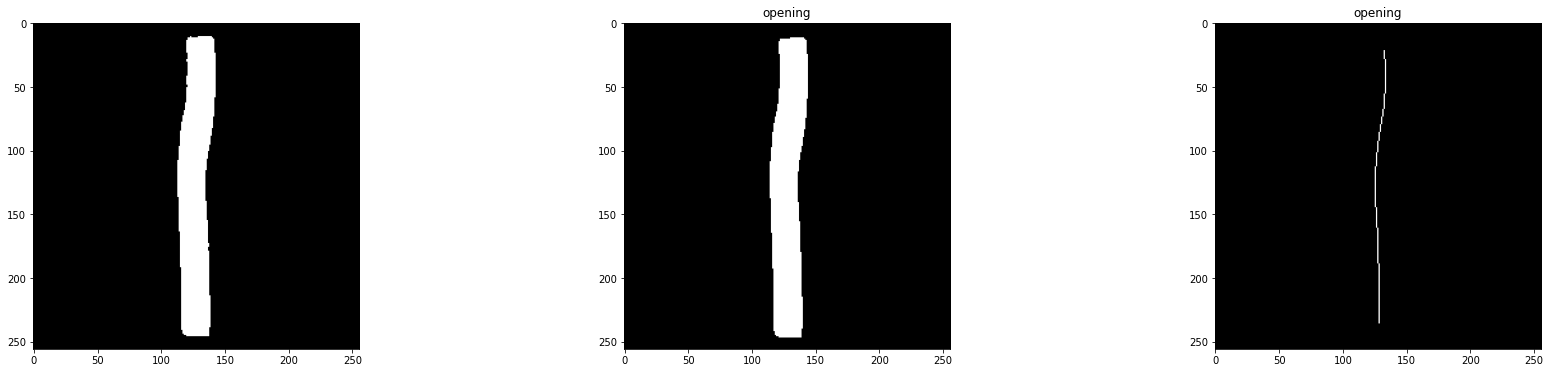

 37%|███▋      | 85/232 [01:00<01:47,  1.37it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013049122546080_02-062-157.png


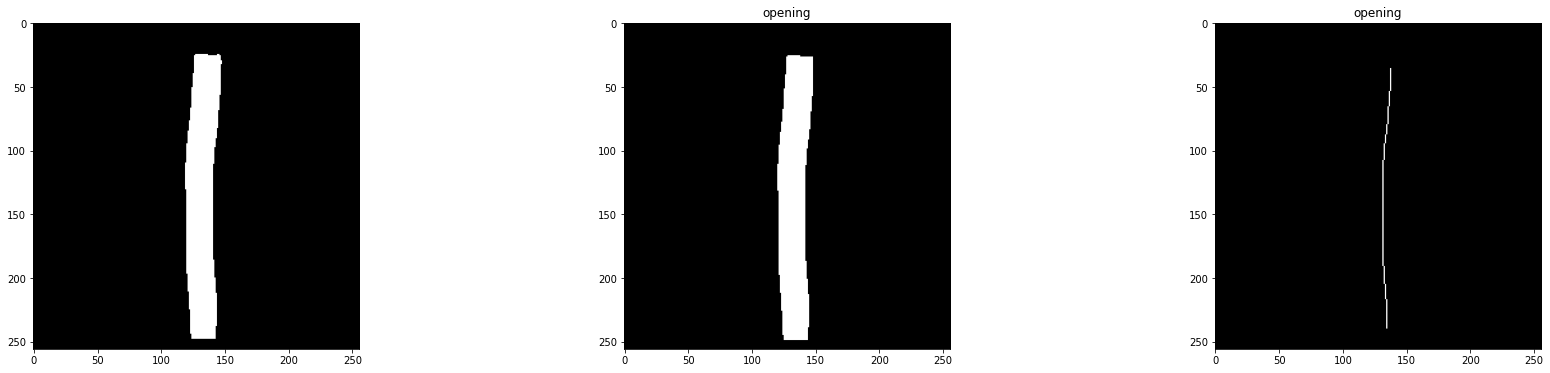

 37%|███▋      | 86/232 [01:01<01:46,  1.37it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013045130448928_02-068-041.png


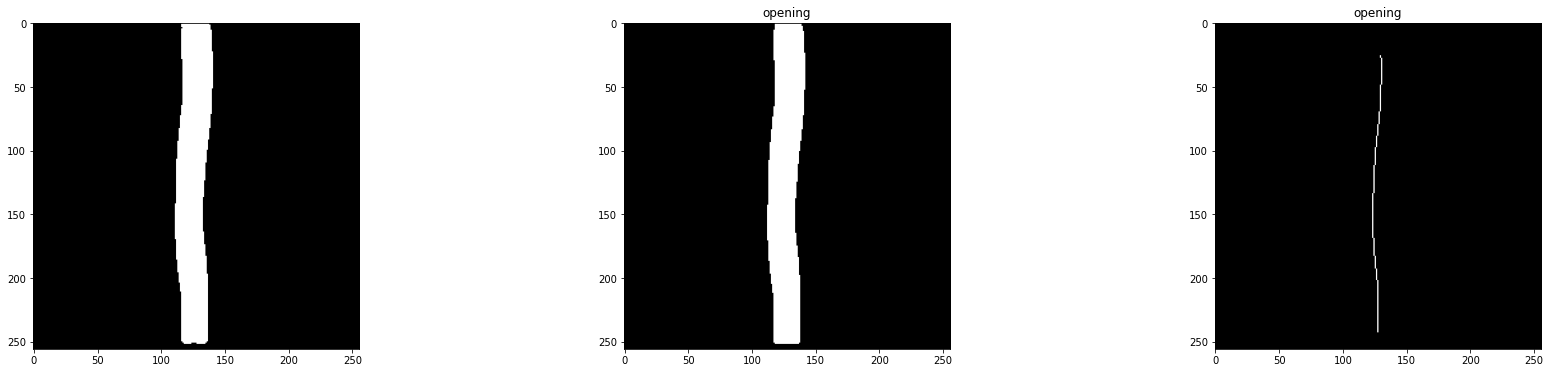

 38%|███▊      | 87/232 [01:02<01:50,  1.31it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013046130918218_02-060-172.png


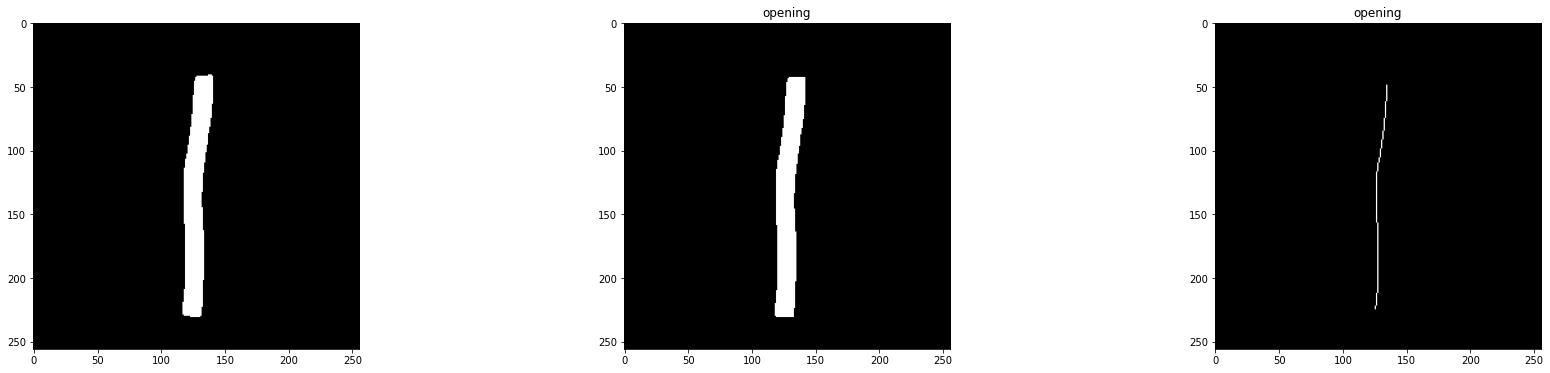

 38%|███▊      | 88/232 [01:03<01:50,  1.30it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013050092827316_02-061-155.png


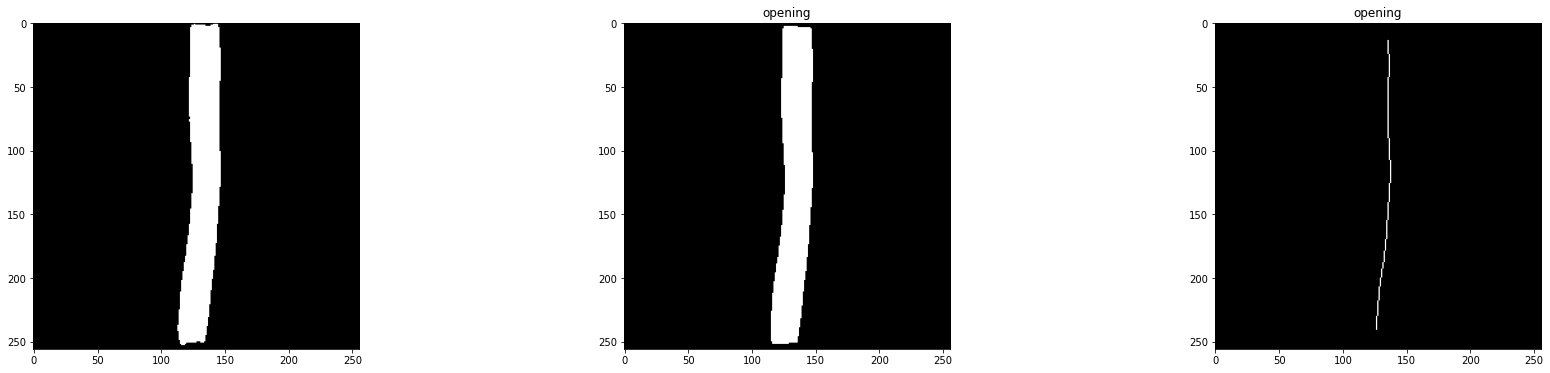

 38%|███▊      | 89/232 [01:03<01:47,  1.33it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013050123600884_02-069-086.png


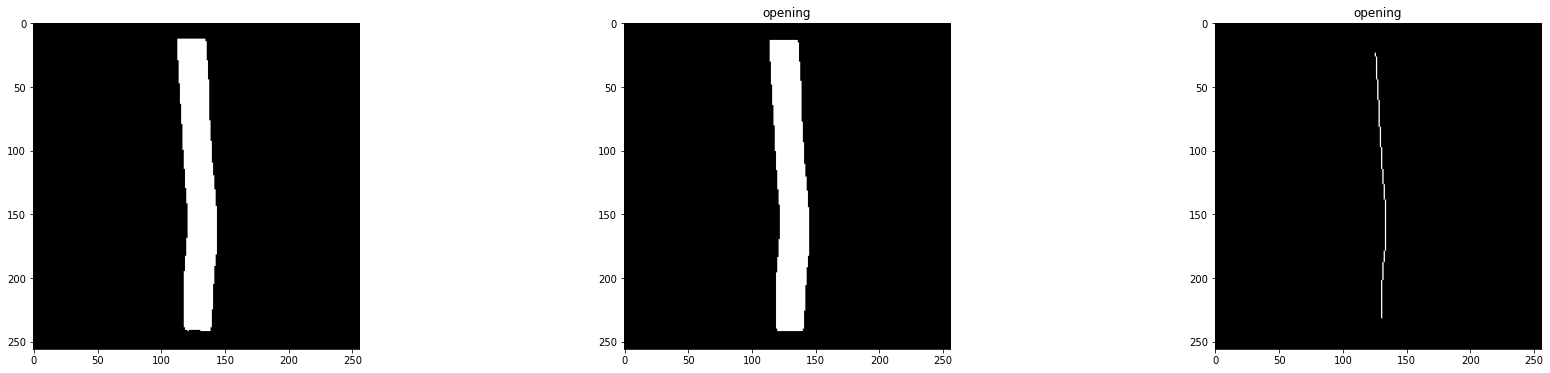

 39%|███▉      | 90/232 [01:04<01:44,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013064121446864_02-054-100.png


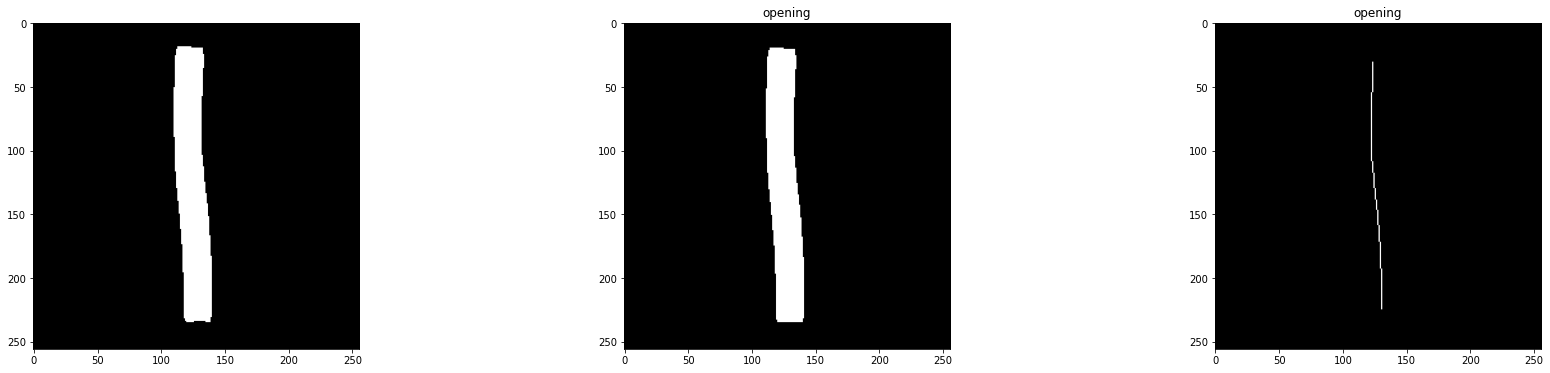

 39%|███▉      | 91/232 [01:05<01:42,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013590140476722013065125721763_02-054-035.png


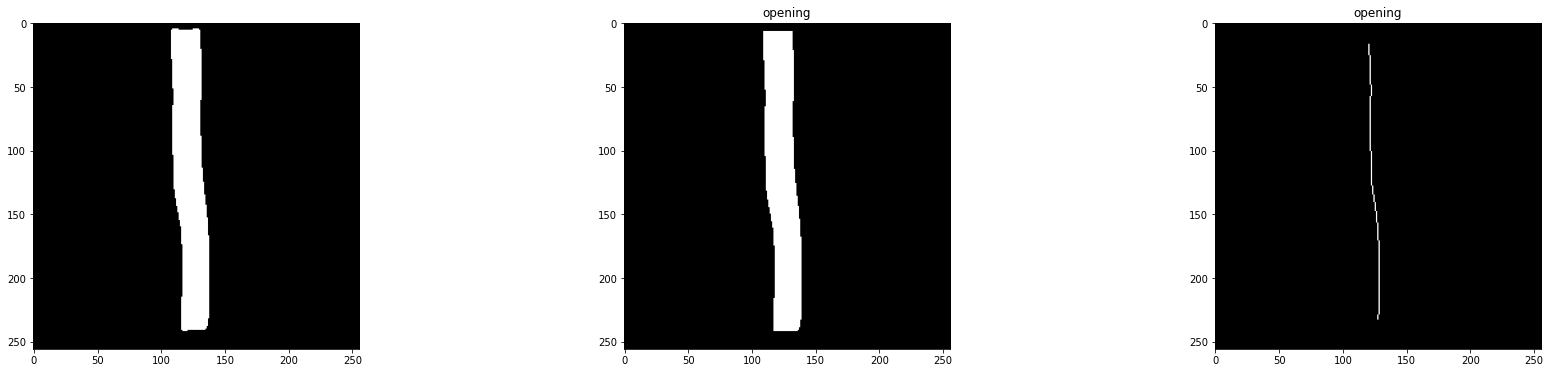

 40%|███▉      | 92/232 [01:06<01:41,  1.38it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012948363412702011017103724021_00-124-081.png


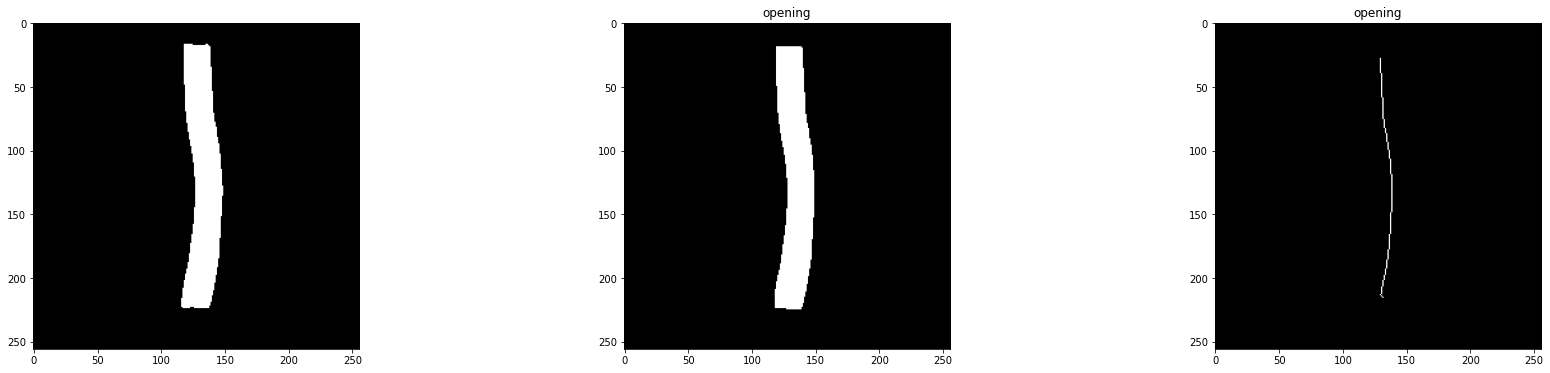

 40%|████      | 93/232 [01:06<01:39,  1.39it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012948363412702011013142920774_00-176-141.png


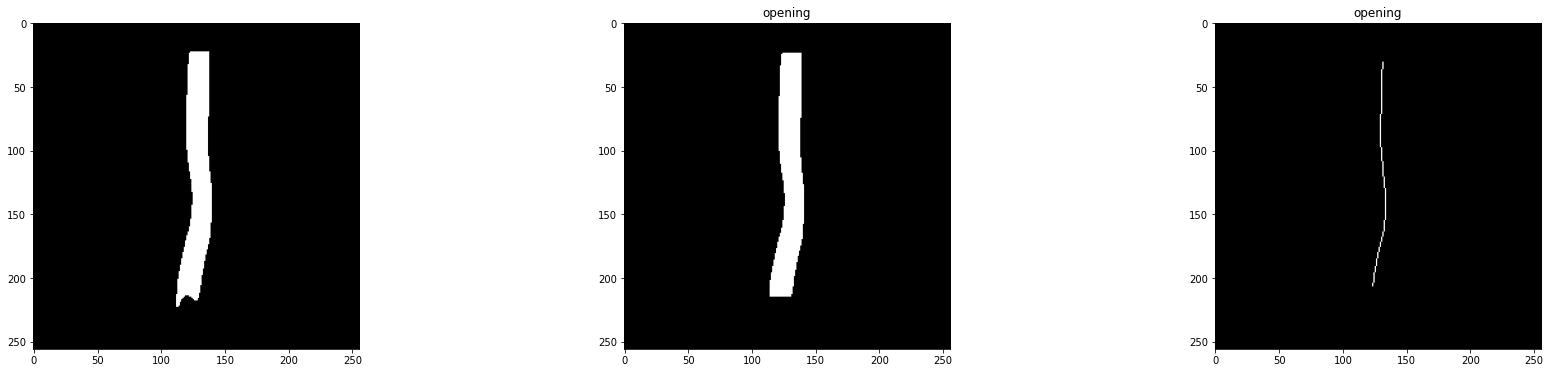

 41%|████      | 94/232 [01:07<01:44,  1.32it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012948363412702011013123310459_00-122-081.png


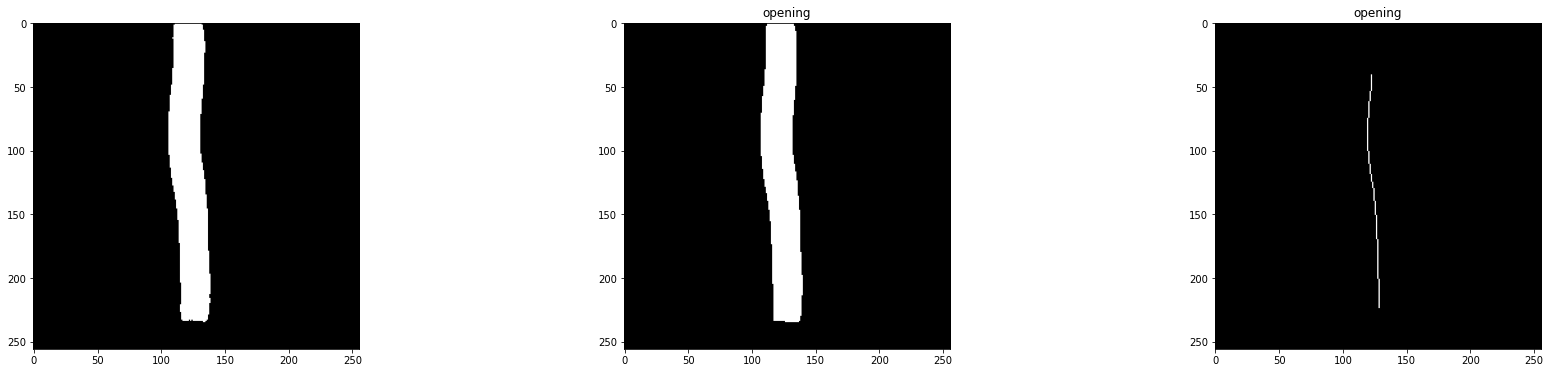

 41%|████      | 95/232 [01:08<01:40,  1.36it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011033153720144_00-176-076.png


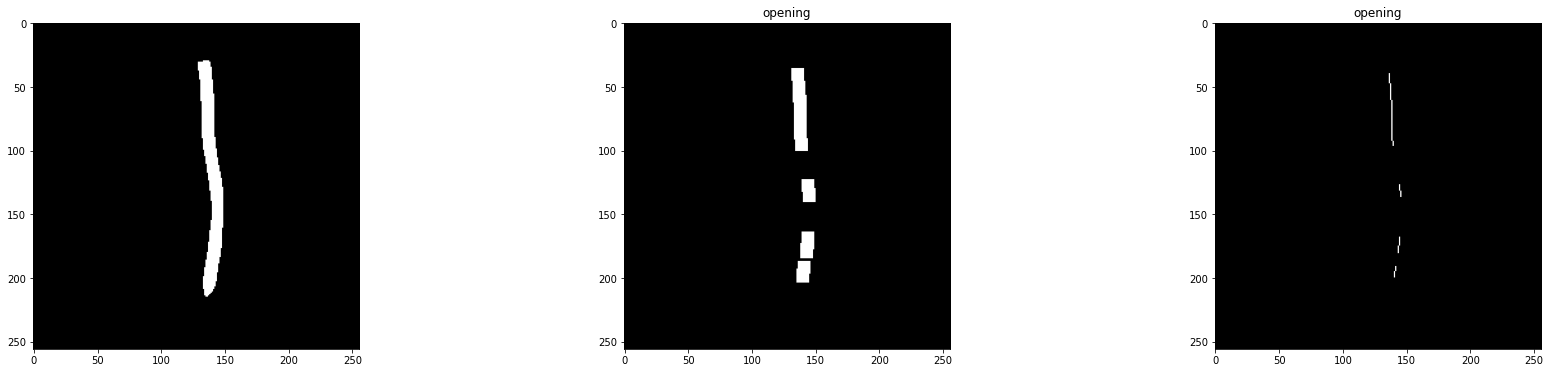

 41%|████▏     | 96/232 [01:09<01:48,  1.25it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011026180603155_00-126-183.png


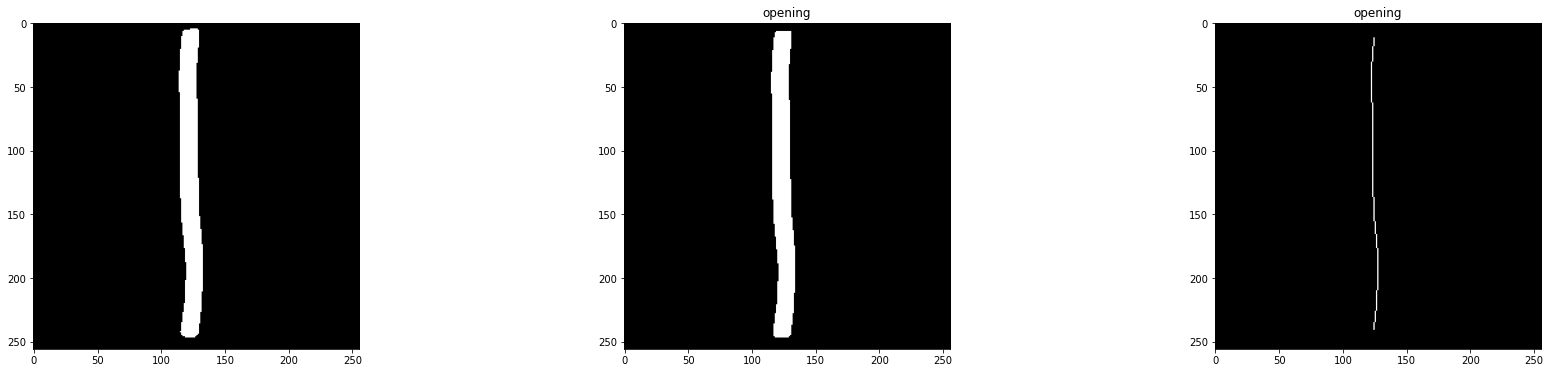

 42%|████▏     | 97/232 [01:10<01:48,  1.24it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011084131216014_00-168-013.png


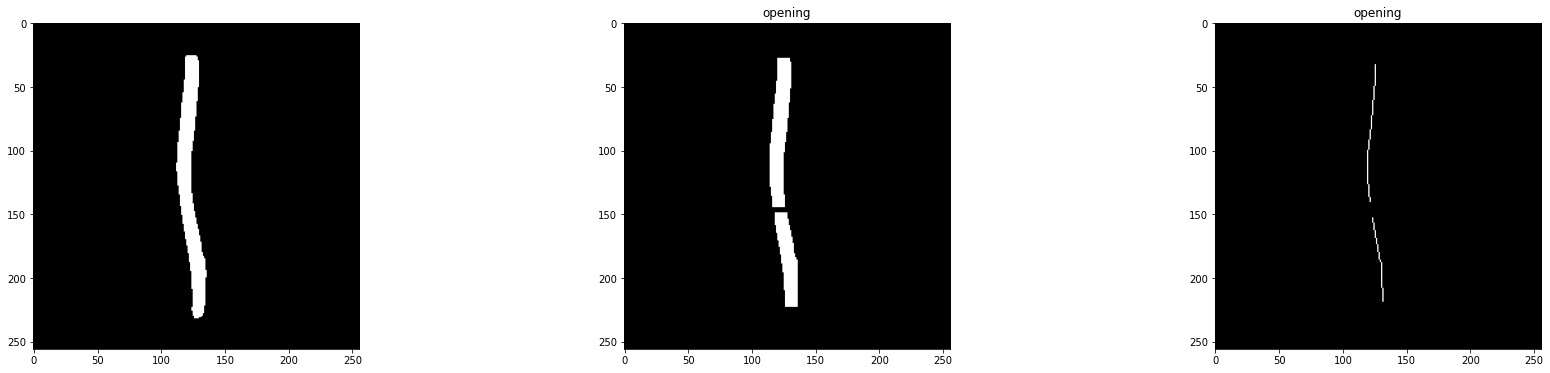

 42%|████▏     | 98/232 [01:12<03:09,  1.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011056095530509_00-174-148.png


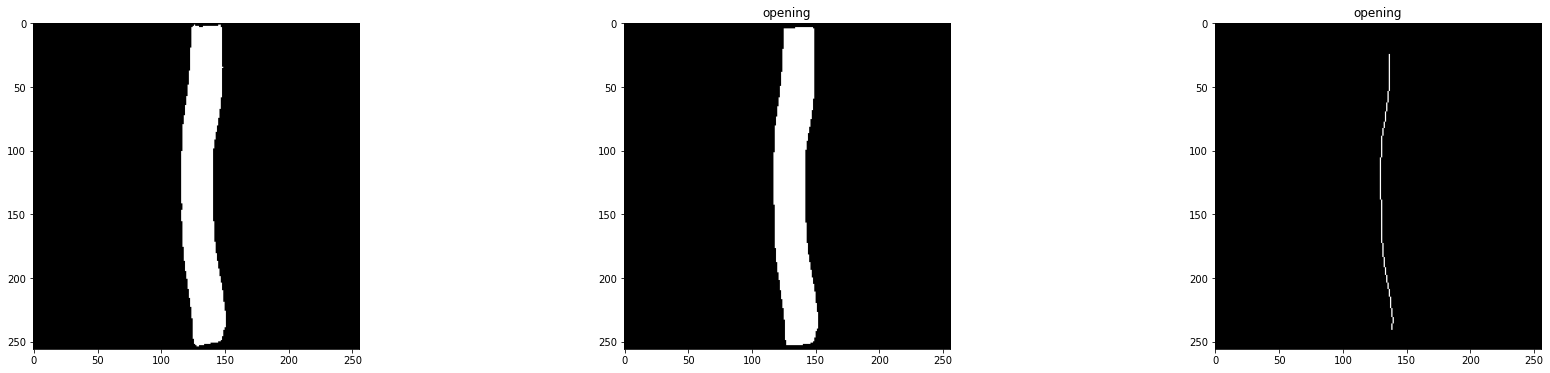

 43%|████▎     | 99/232 [01:15<03:38,  1.64s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011091094034191_00-183-131.png


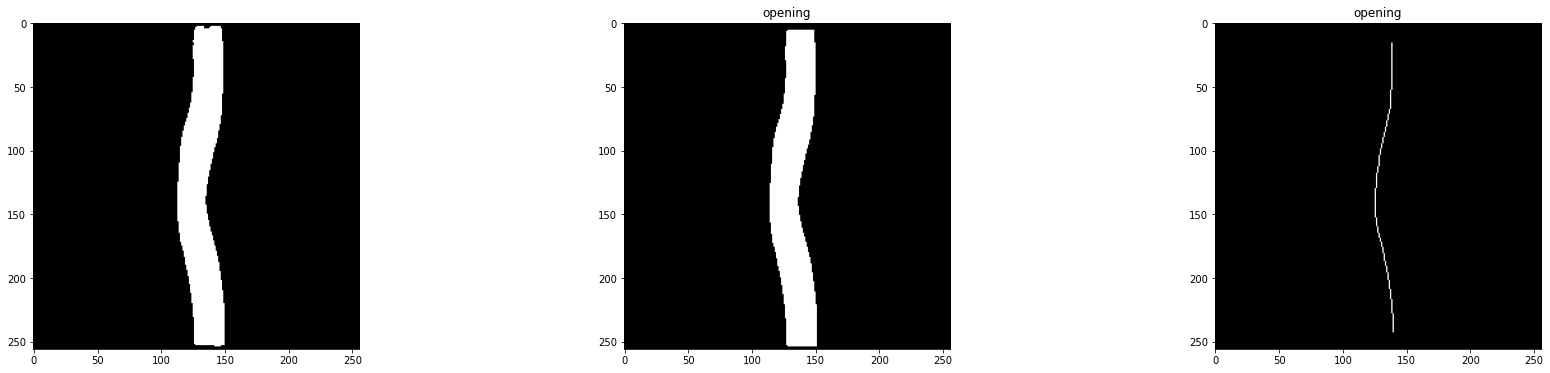

 43%|████▎     | 100/232 [01:17<04:11,  1.91s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010314100210470_04-023-111.png


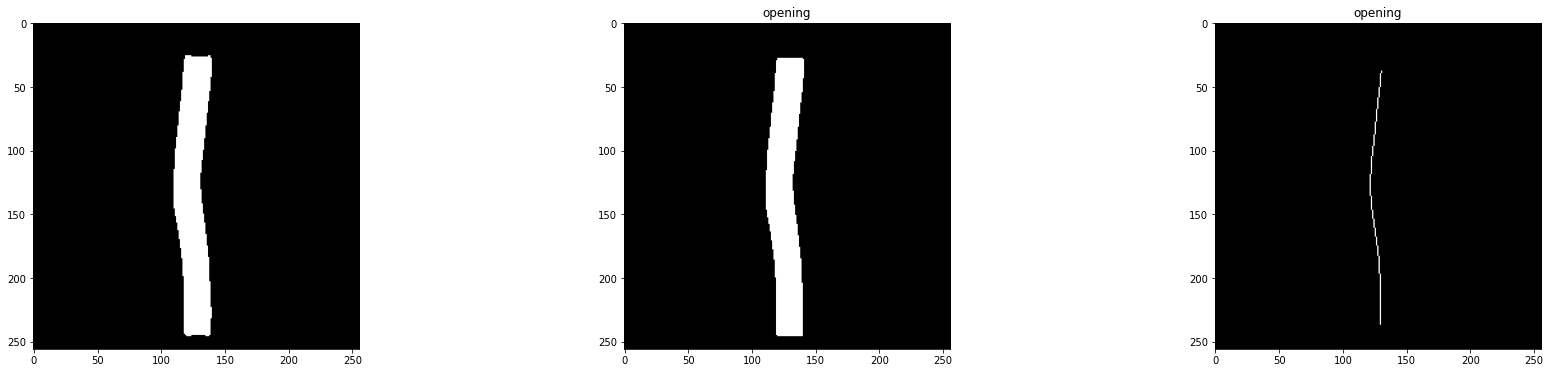

 44%|████▎     | 101/232 [01:19<04:06,  1.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010315123155532_04-024-106.png


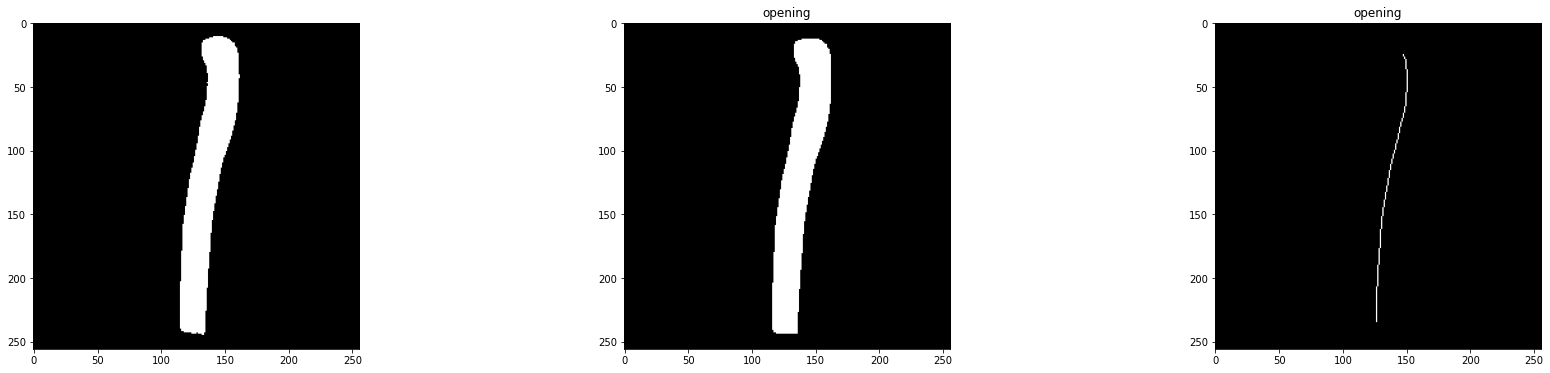

 44%|████▍     | 102/232 [01:21<04:06,  1.90s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010322123234637_04-013-184.png


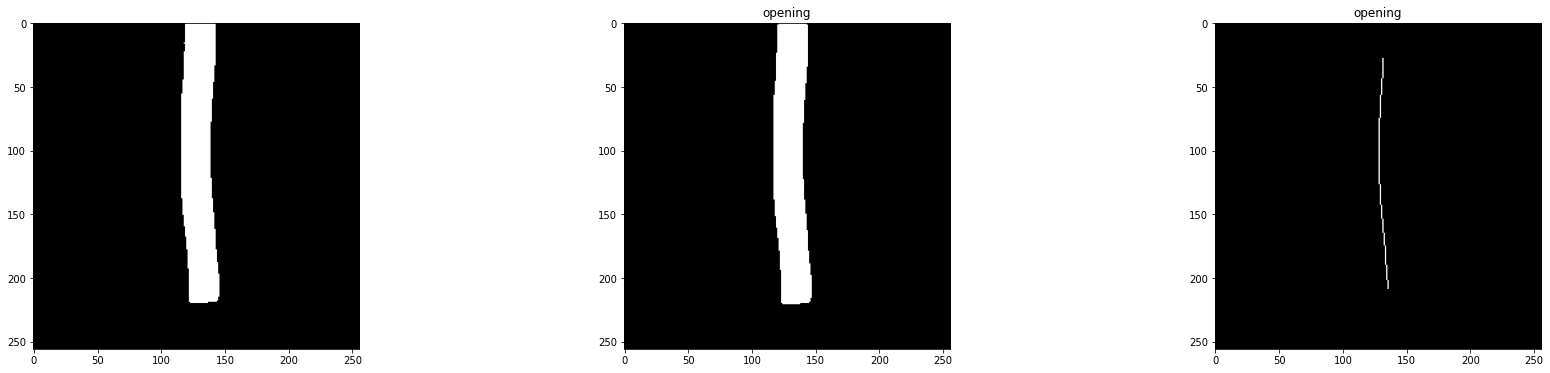

 44%|████▍     | 103/232 [01:23<04:15,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012901624094902010326095102074_04-020-197.png


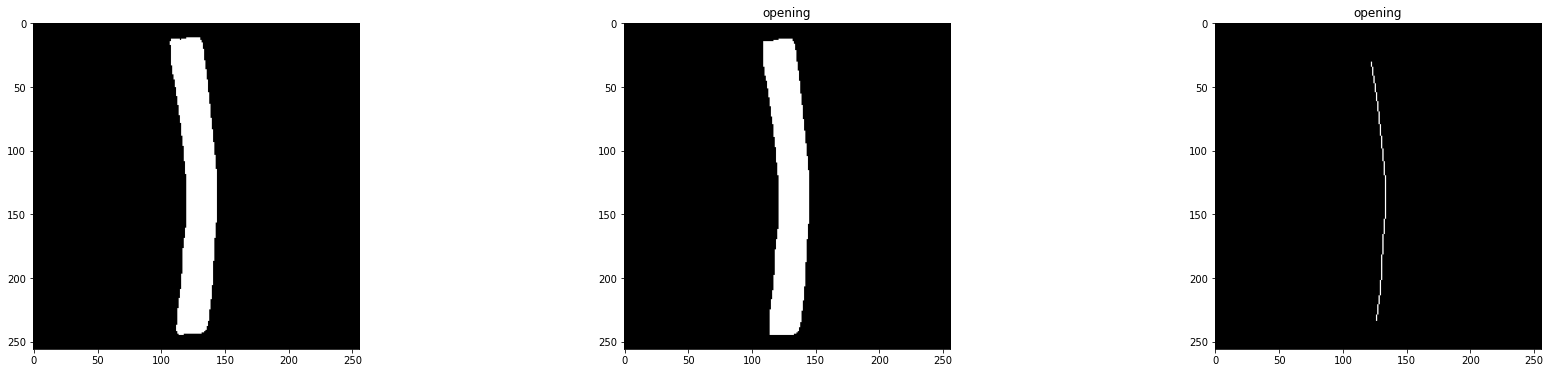

 45%|████▍     | 104/232 [01:25<03:59,  1.87s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012922382741642010350134223478_04-000-074.png


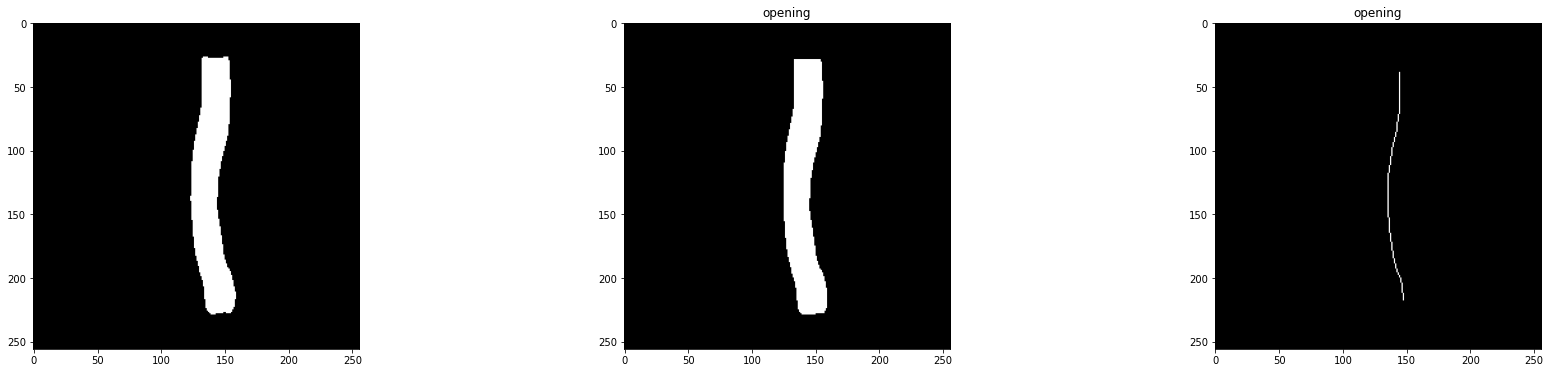

 45%|████▌     | 105/232 [01:28<04:36,  2.18s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012922382741642011012092114386_00-122-065.png


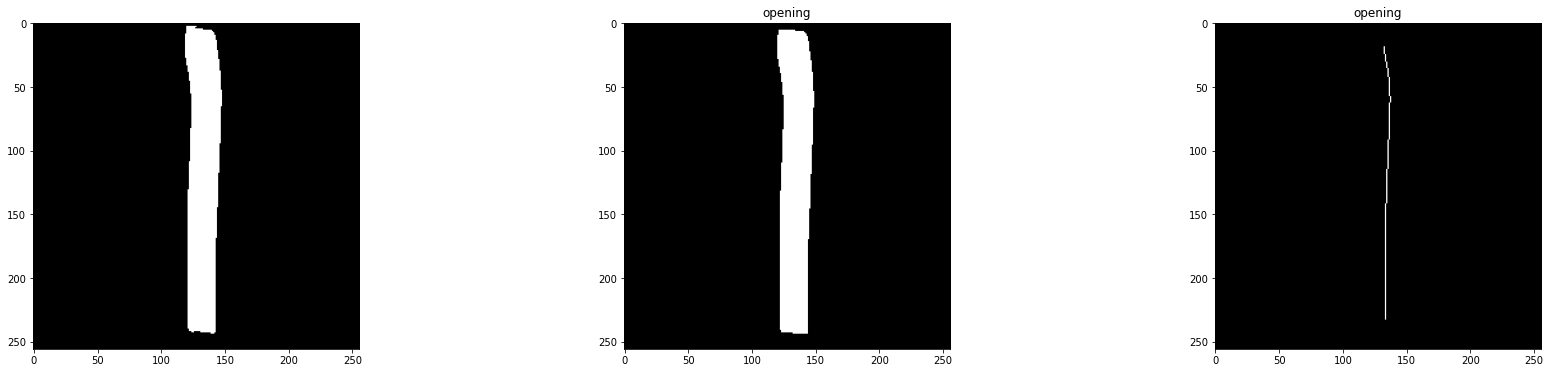

 46%|████▌     | 106/232 [01:30<04:29,  2.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009195092648656_00-029-020.png


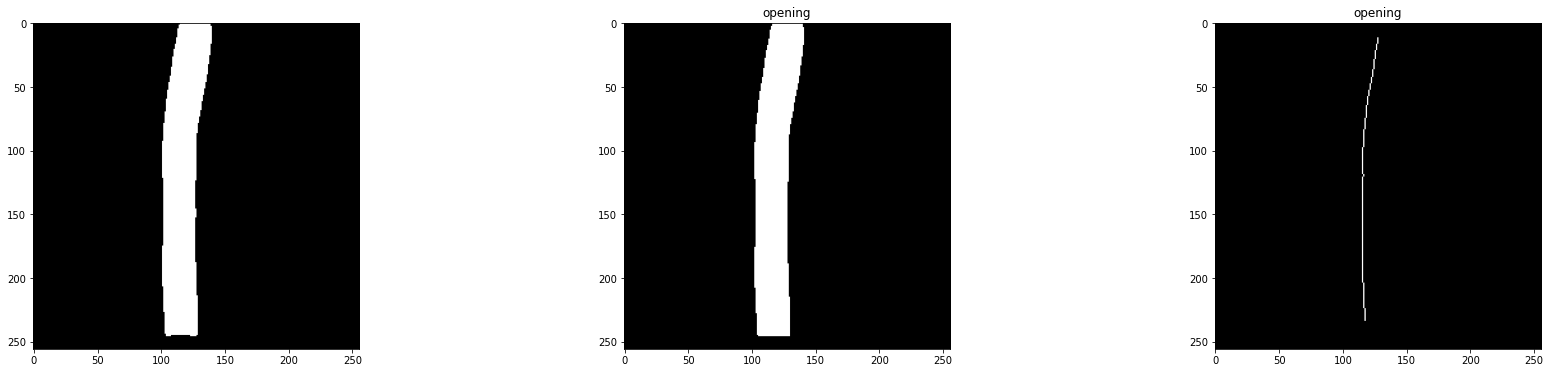

 46%|████▌     | 107/232 [01:32<04:27,  2.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009329140249463_00-087-014.png


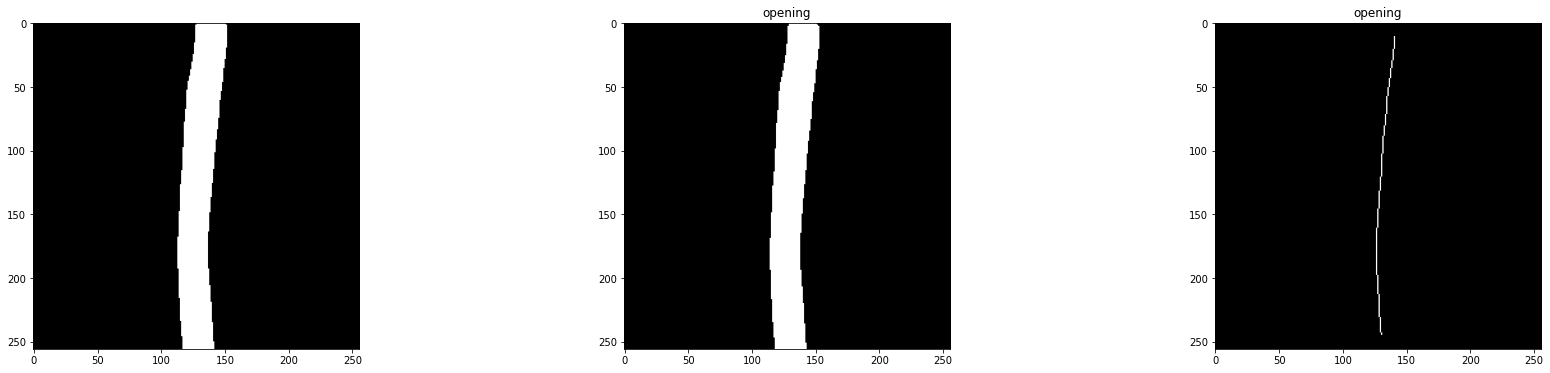

 47%|████▋     | 108/232 [01:34<04:27,  2.15s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012373310883942009189101426312_00-028-012.png


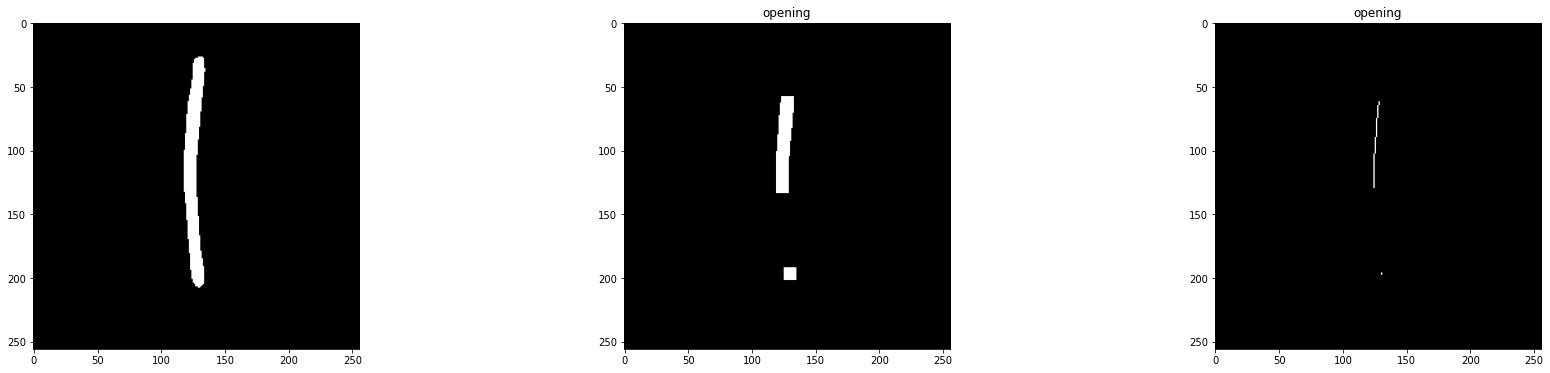

 47%|████▋     | 109/232 [01:36<04:38,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009245122421337_00-020-023.png


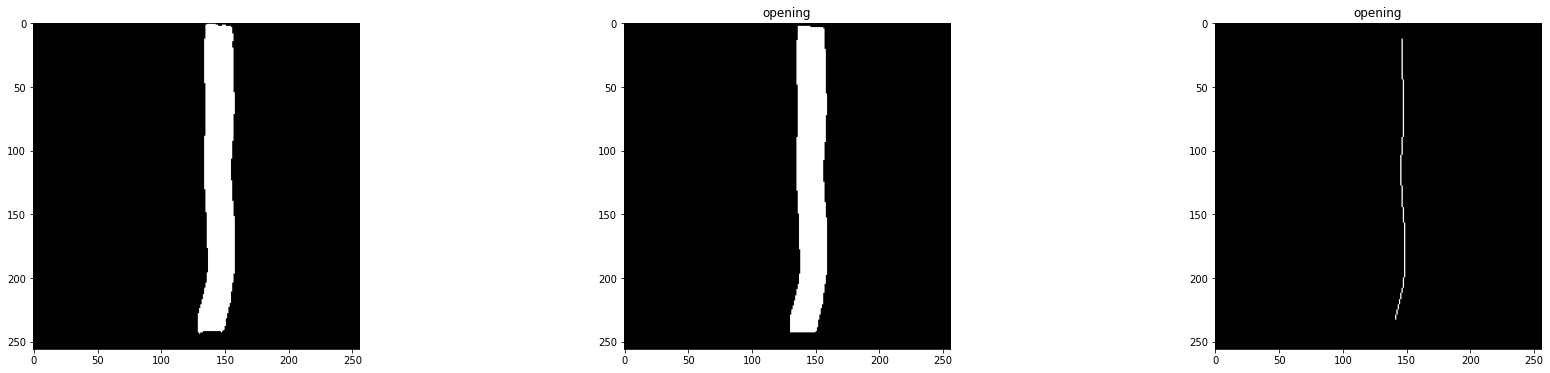

 47%|████▋     | 110/232 [01:38<04:27,  2.20s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009211133734445_00-033-134.png


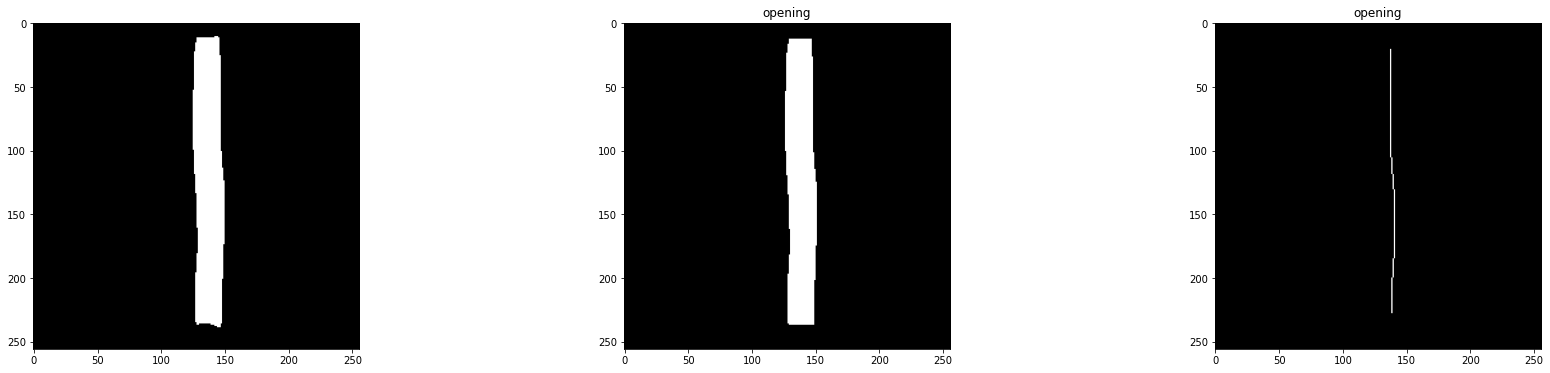

 48%|████▊     | 111/232 [01:40<04:13,  2.10s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009215110015315_00-002-130.png


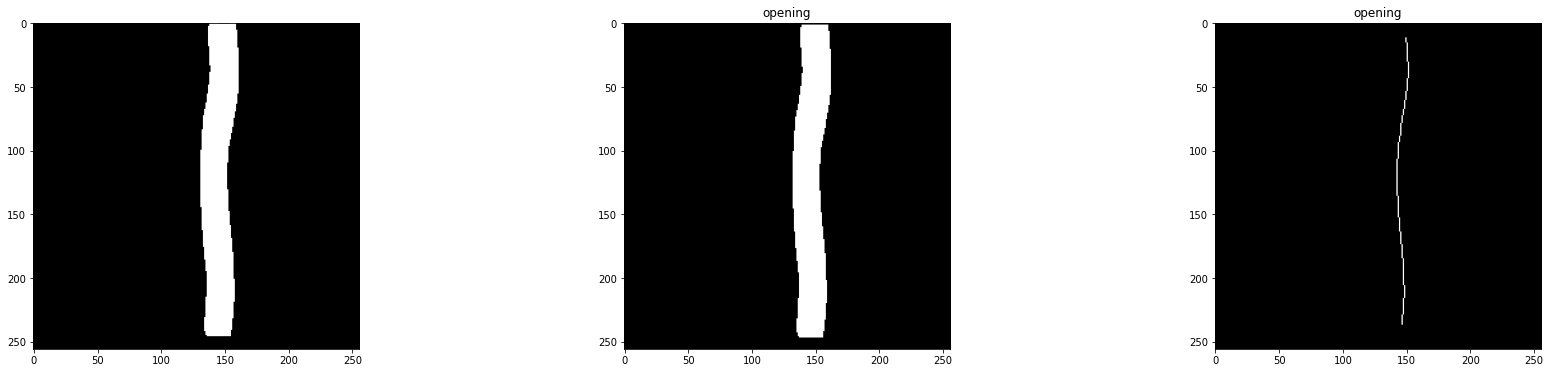

 48%|████▊     | 112/232 [01:43<04:16,  2.13s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009250082251128_00-020-008.png


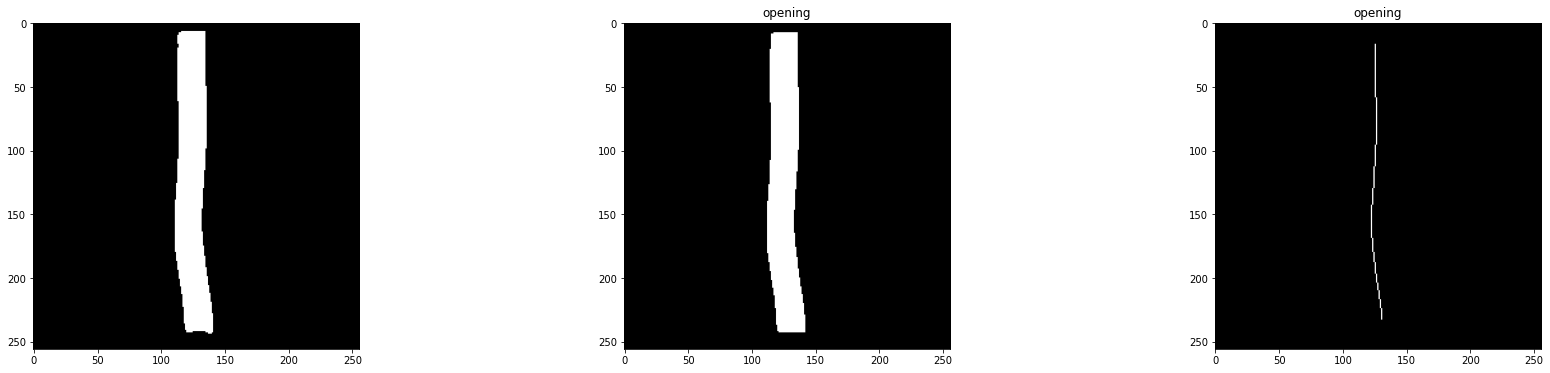

 49%|████▊     | 113/232 [01:45<04:20,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012487858717522009266113242152_00-082-004.png


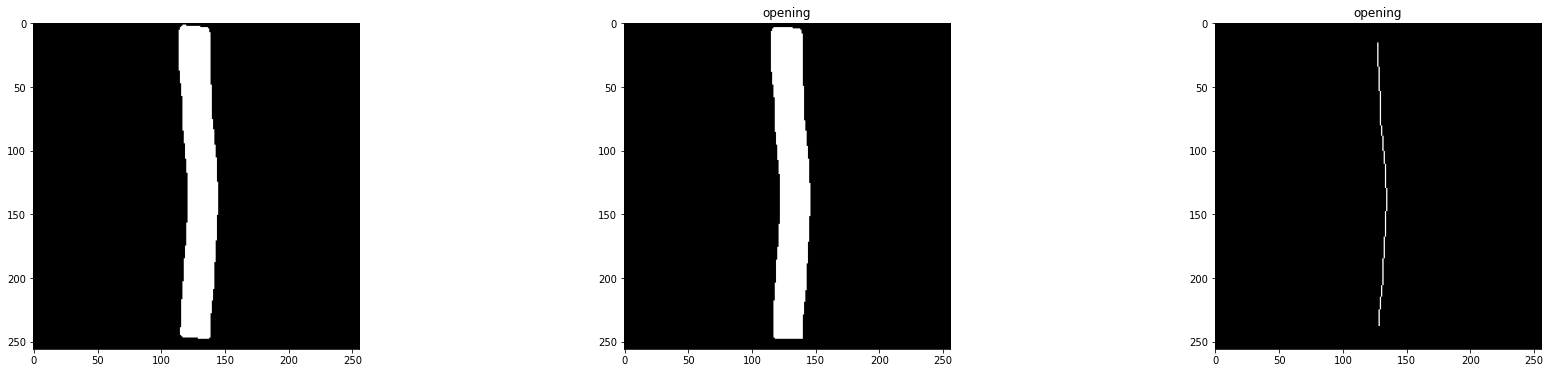

 49%|████▉     | 114/232 [01:46<03:57,  2.01s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009317115104371_00-105-194.png


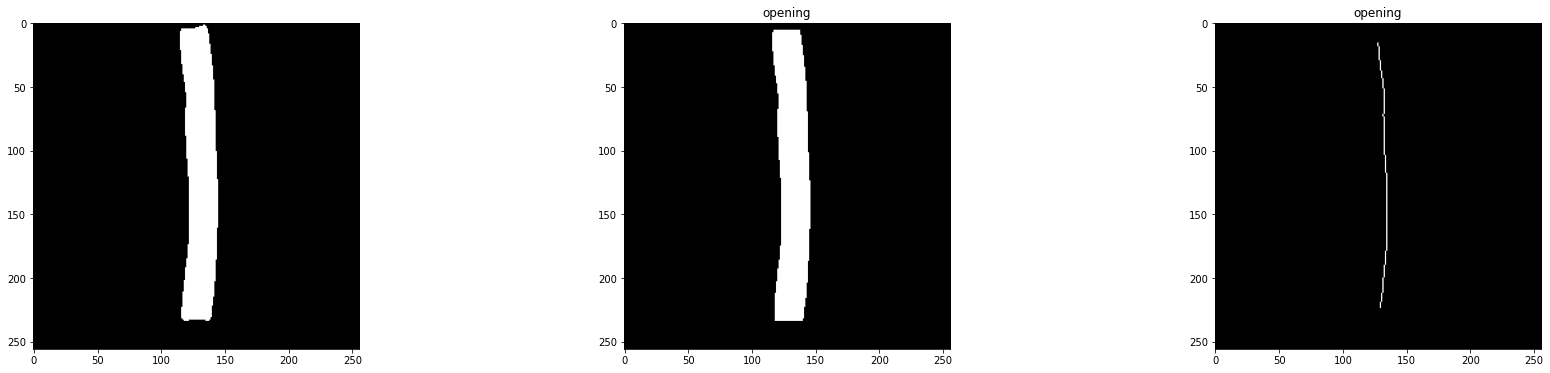

 50%|████▉     | 115/232 [01:49<04:04,  2.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009316124325285_00-105-179.png


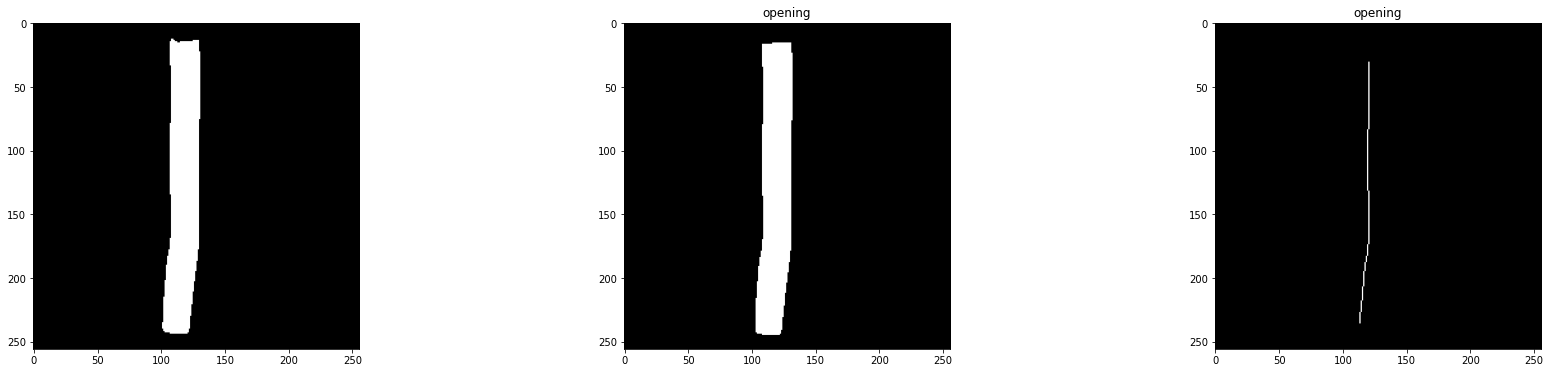

 50%|█████     | 116/232 [01:51<03:56,  2.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009327134914768_00-086-005.png


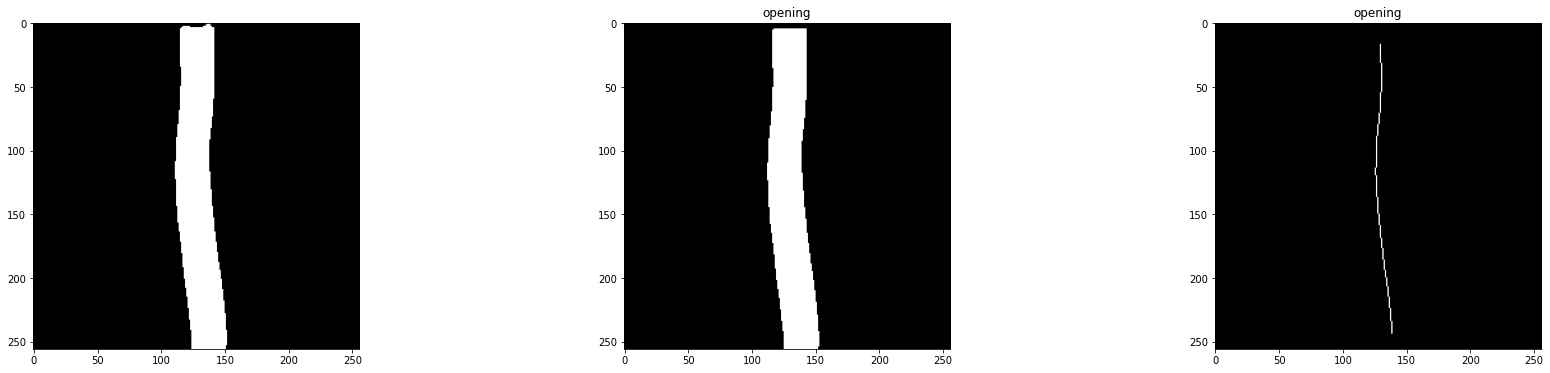

 50%|█████     | 117/232 [01:52<03:47,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010011094220818_03-121-104.png


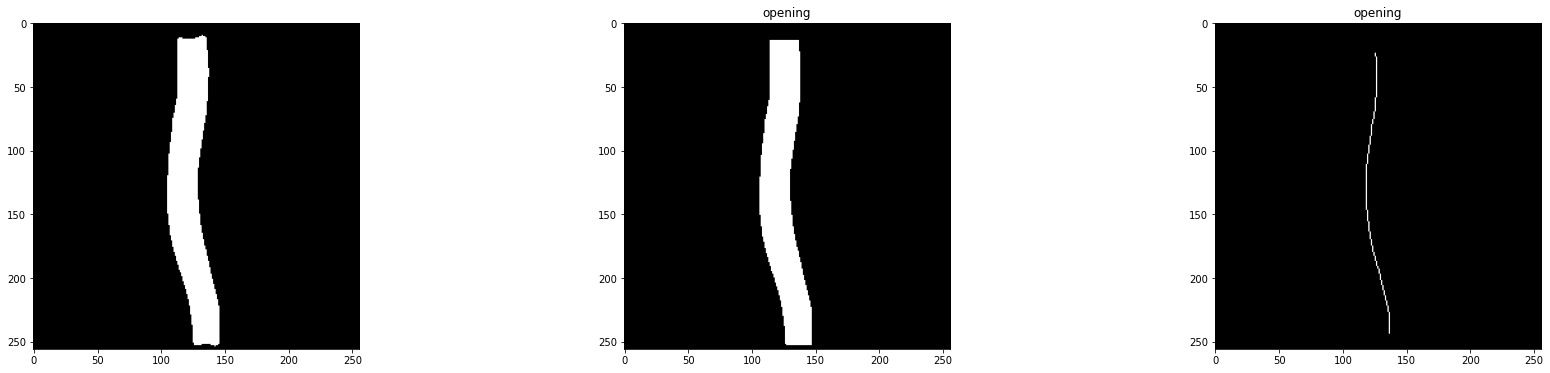

 51%|█████     | 118/232 [01:54<03:45,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009350141510212_03-121-085.png


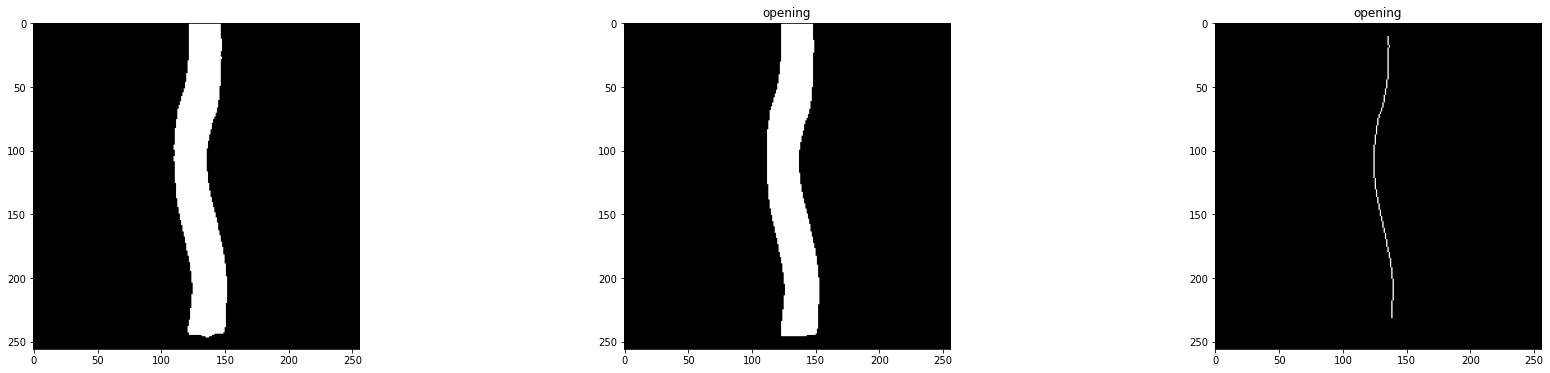

 51%|█████▏    | 119/232 [01:56<03:44,  1.99s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712009362095253074_00-086-107.png


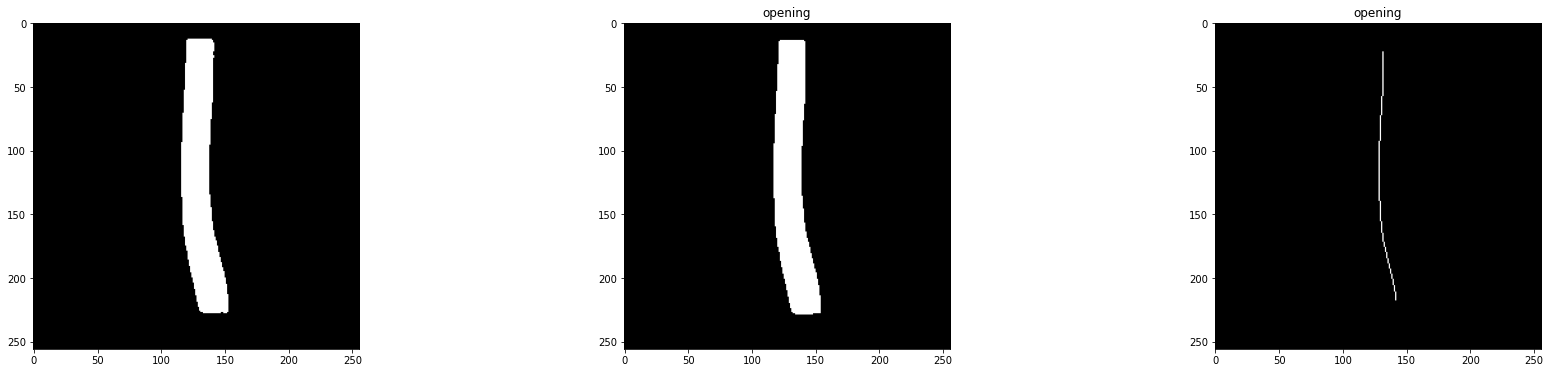

 52%|█████▏    | 120/232 [01:59<04:05,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010011091637650_03-122-131.png


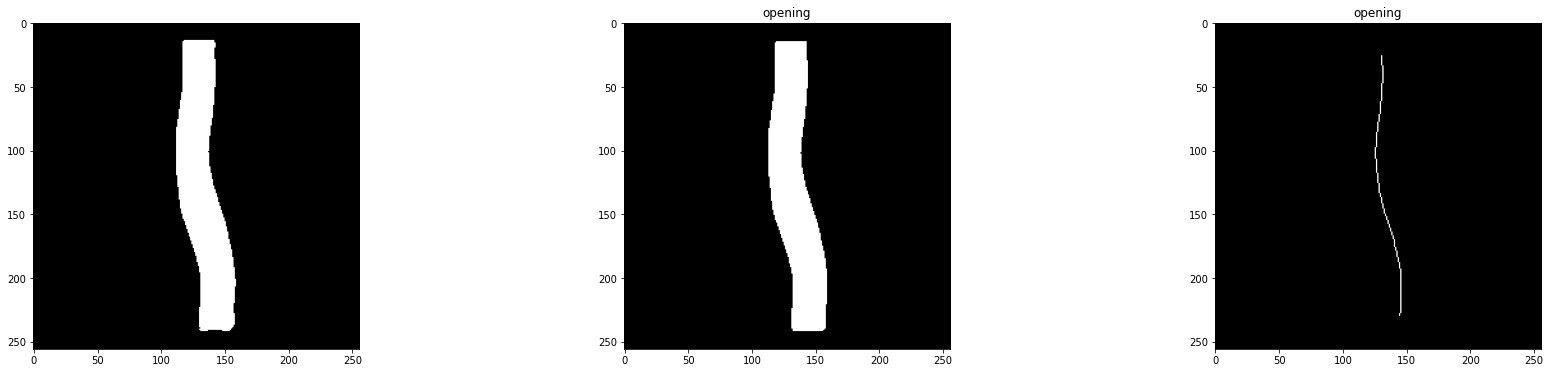

 52%|█████▏    | 121/232 [02:01<04:05,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010029132309230_03-172-004.png


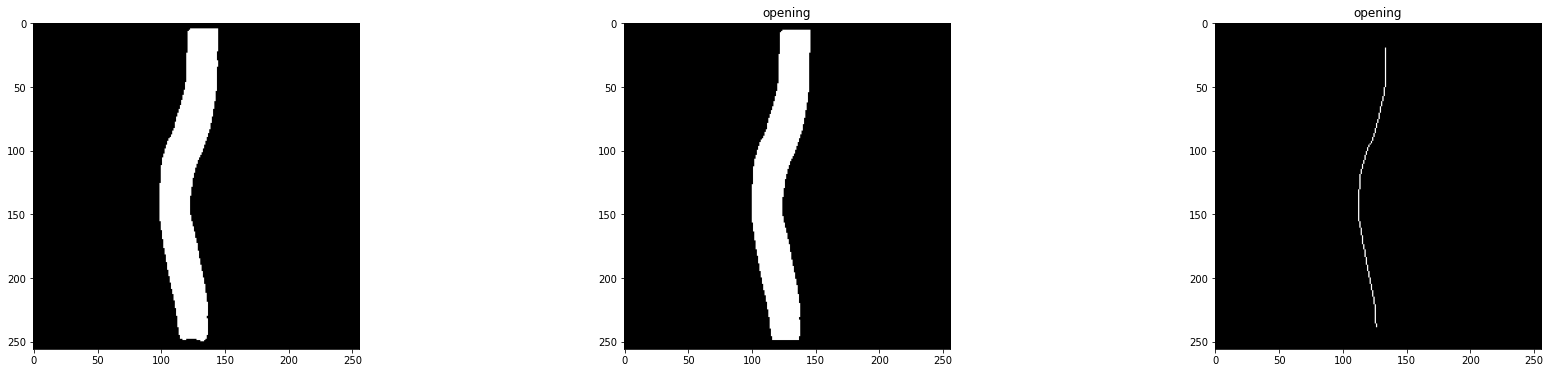

 53%|█████▎    | 122/232 [02:04<04:01,  2.20s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010042130331015_03-173-138.png


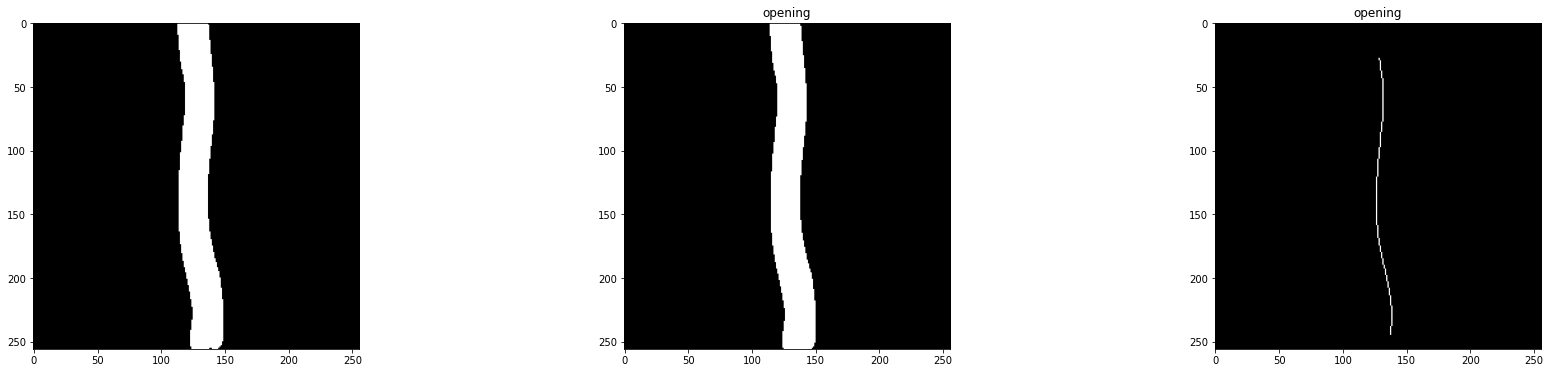

 53%|█████▎    | 123/232 [02:06<03:58,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010054134252084_03-167-194.png


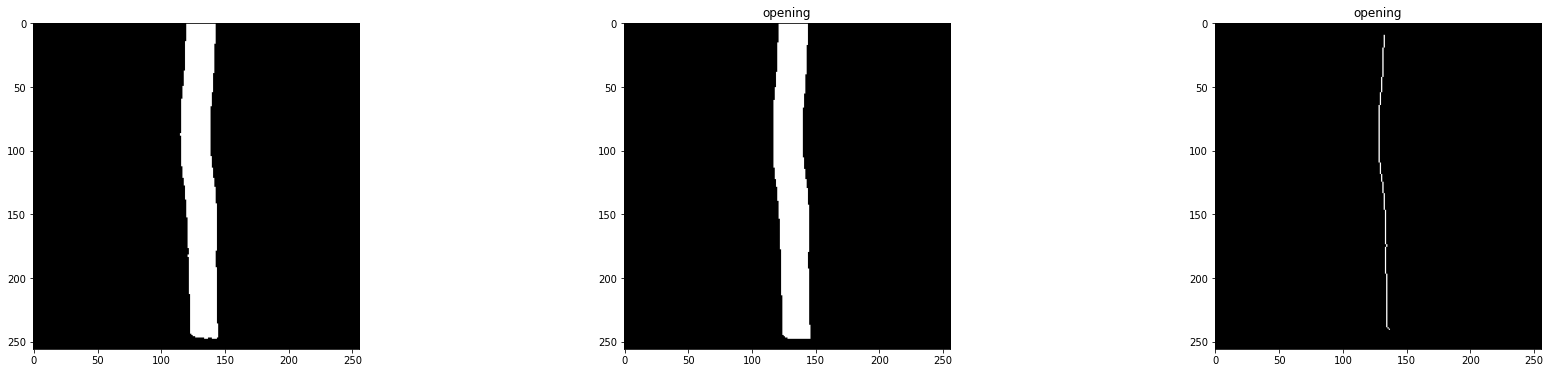

 53%|█████▎    | 124/232 [02:08<03:53,  2.17s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010046095711380_03-165-035.png


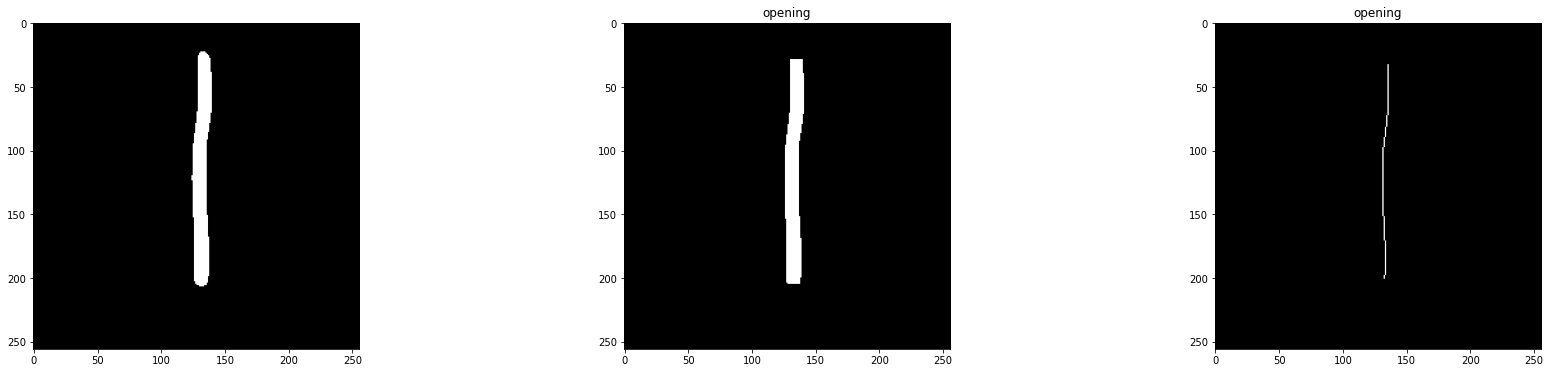

 54%|█████▍    | 125/232 [02:11<04:14,  2.38s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010046142606375_03-167-164.png


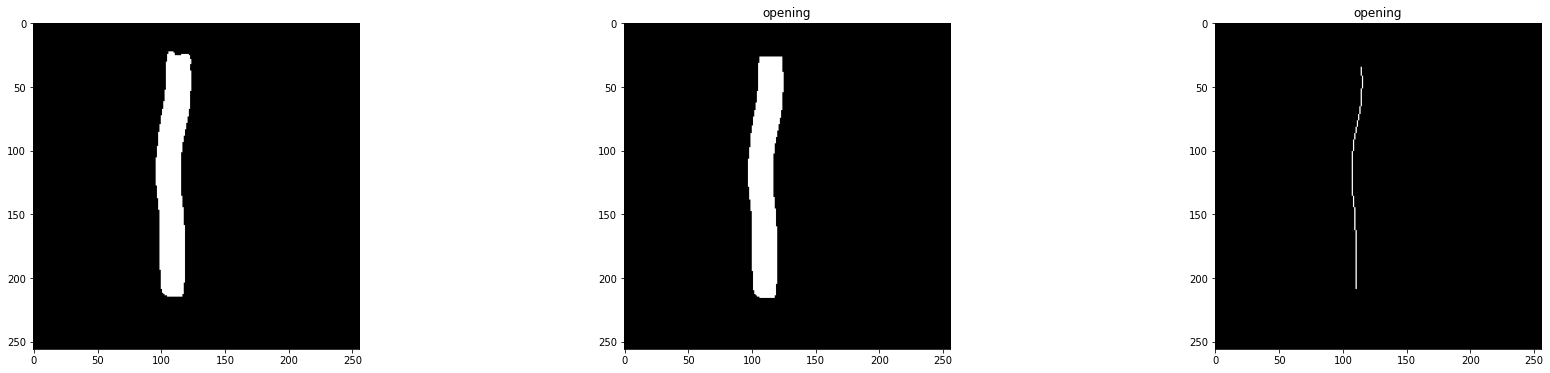

 54%|█████▍    | 126/232 [02:12<03:46,  2.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010054100326529_03-164-154.png


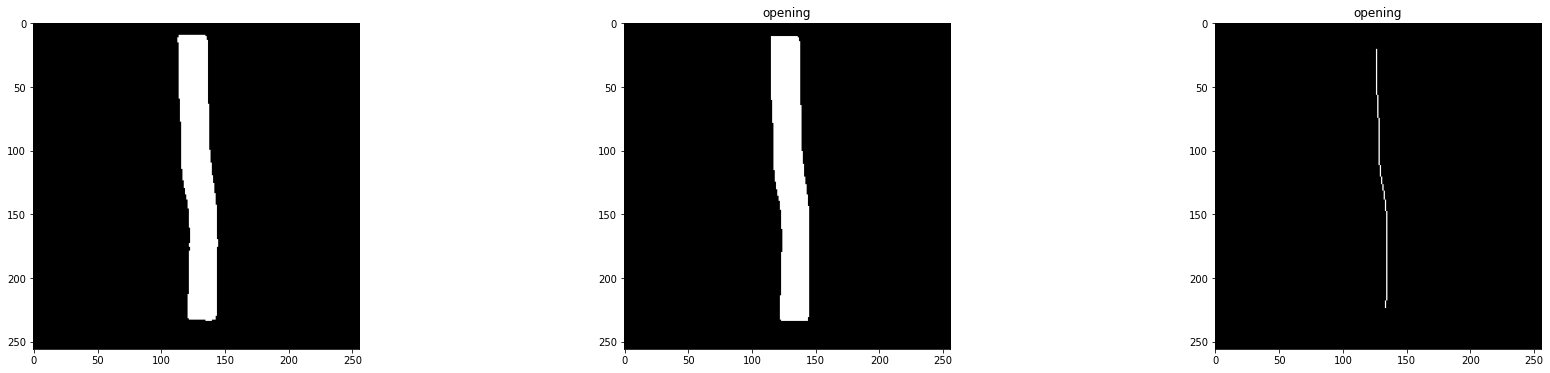

 55%|█████▍    | 127/232 [02:14<03:44,  2.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010054111446154_03-168-064.png


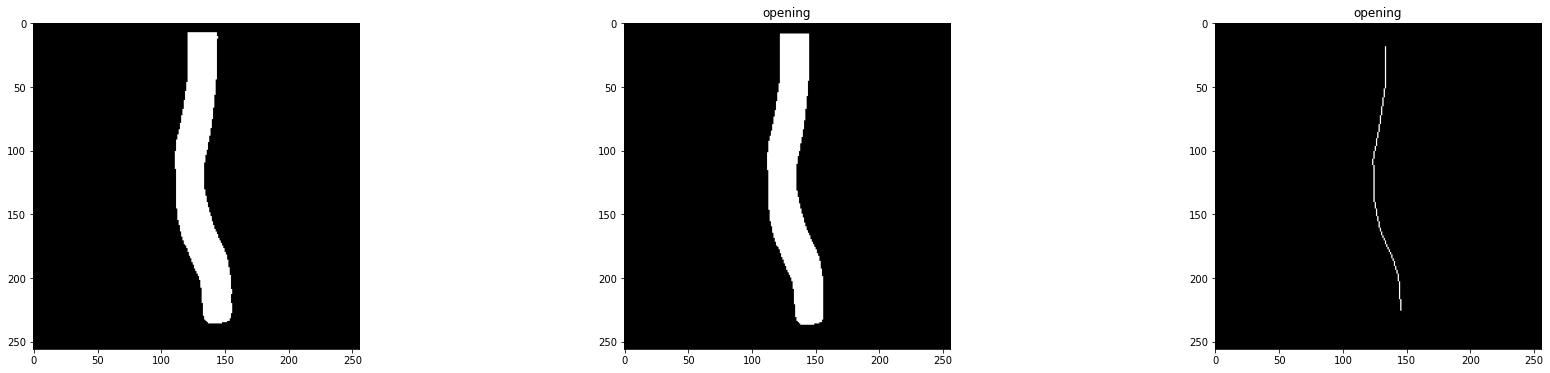

 55%|█████▌    | 128/232 [02:16<03:36,  2.08s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010054131605521_03-165-112.png


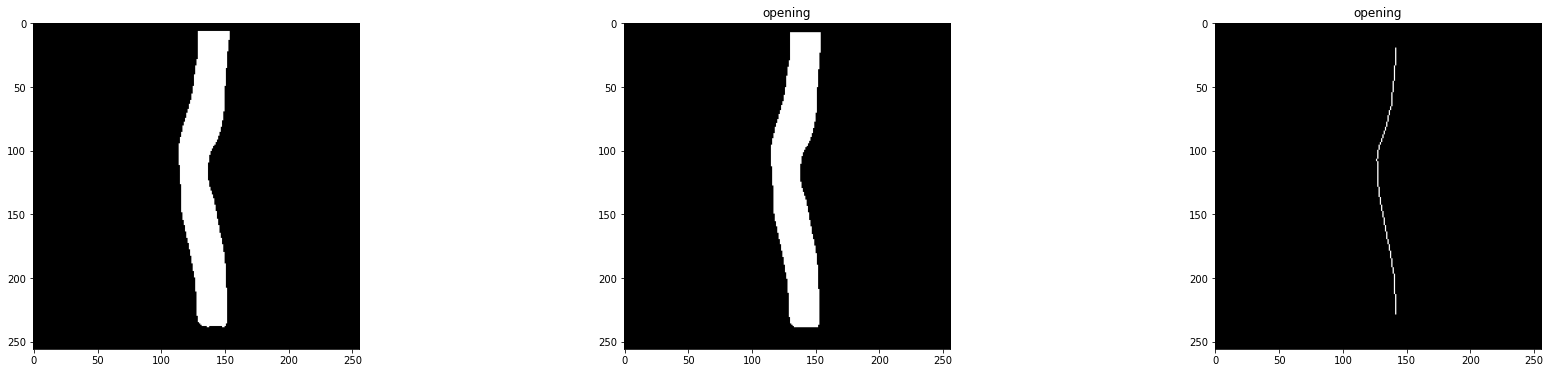

 56%|█████▌    | 129/232 [02:18<03:24,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/255958125279616807382480423869475421040_h6e9cc.png


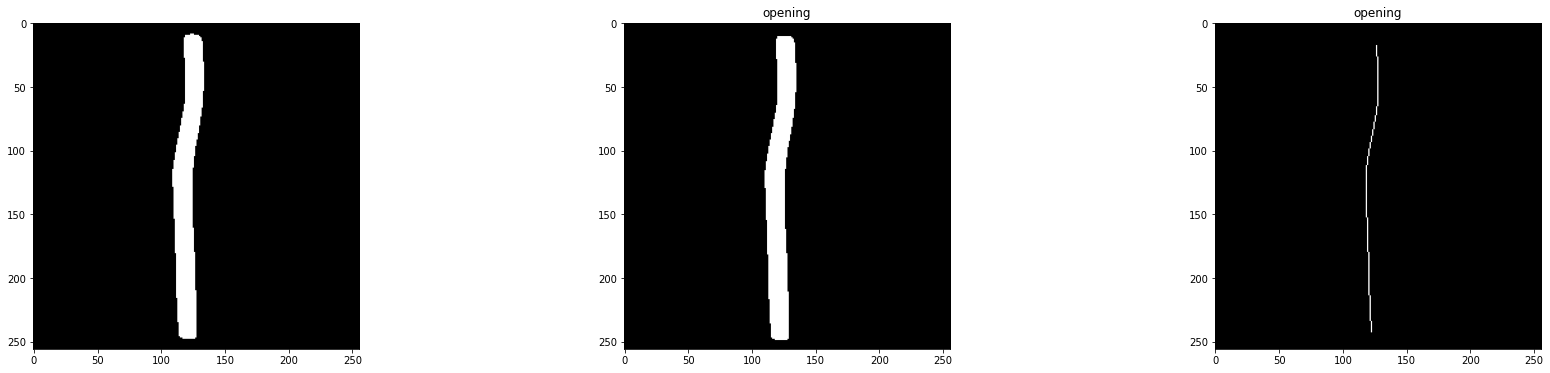

 56%|█████▌    | 130/232 [02:21<03:36,  2.12s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/306262741892669366179925787144484604399_0aklrz.png


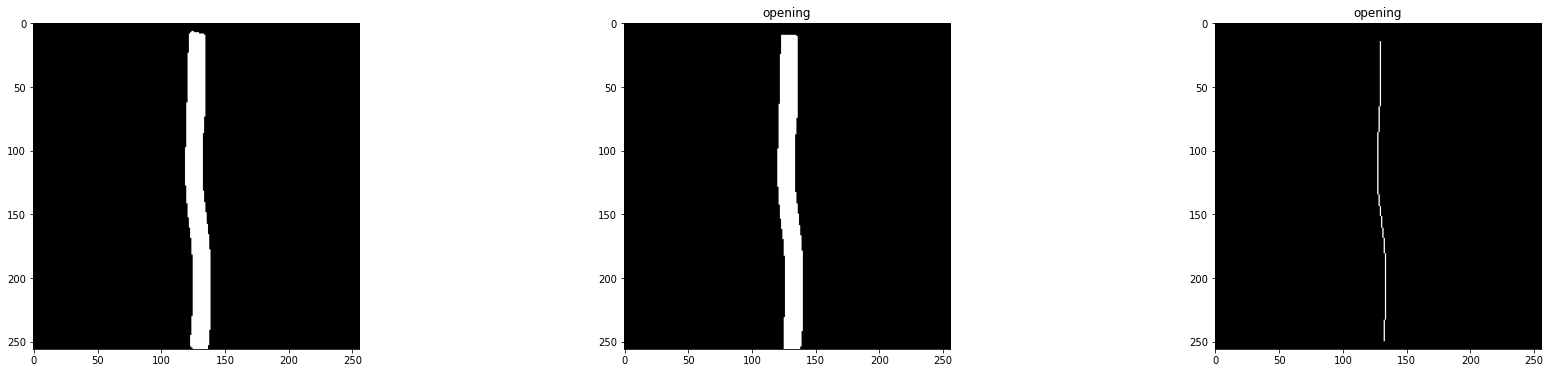

 56%|█████▋    | 131/232 [02:23<03:47,  2.25s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/255390947768799772887225216297671151812_pq15rg.png


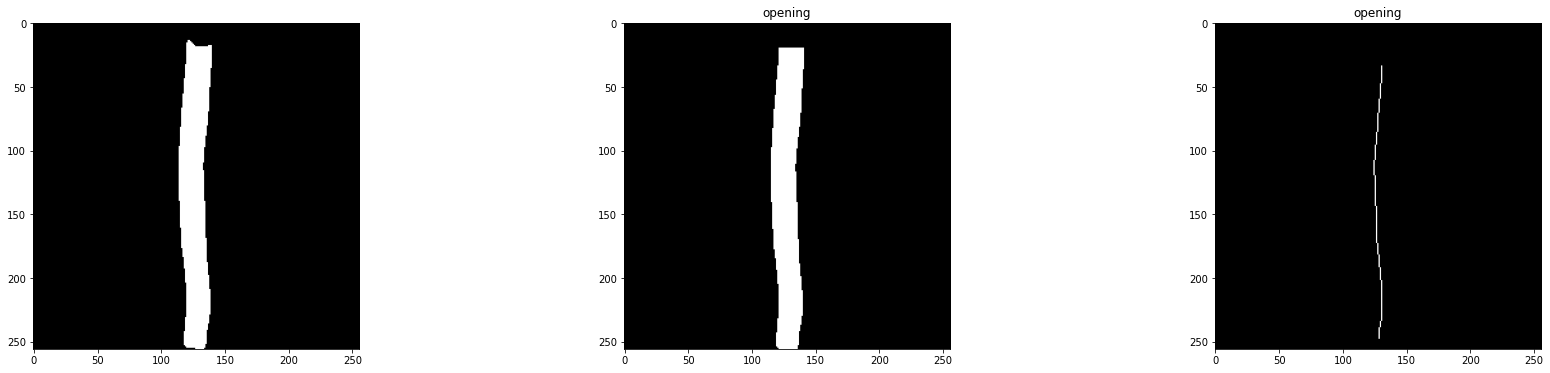

 57%|█████▋    | 132/232 [02:26<03:50,  2.31s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/64034844108292081151574556507556002751_n36cvx.png


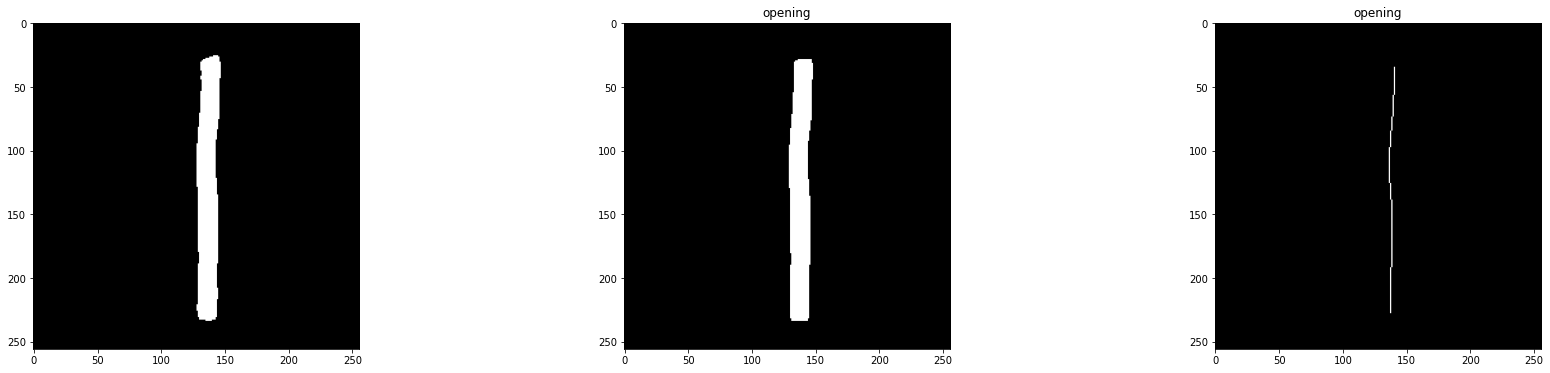

 57%|█████▋    | 133/232 [02:28<03:48,  2.31s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/331052736172894707273873780013486057373_s5i1vl.png


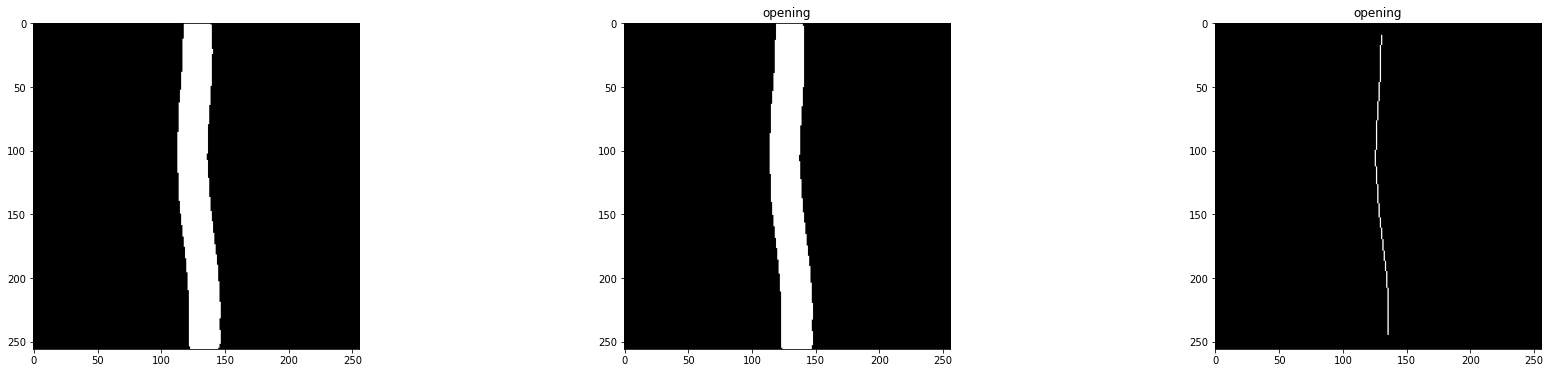

 58%|█████▊    | 134/232 [02:31<04:02,  2.47s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/307040274671291167348835796922379513191_ky5cpf.png


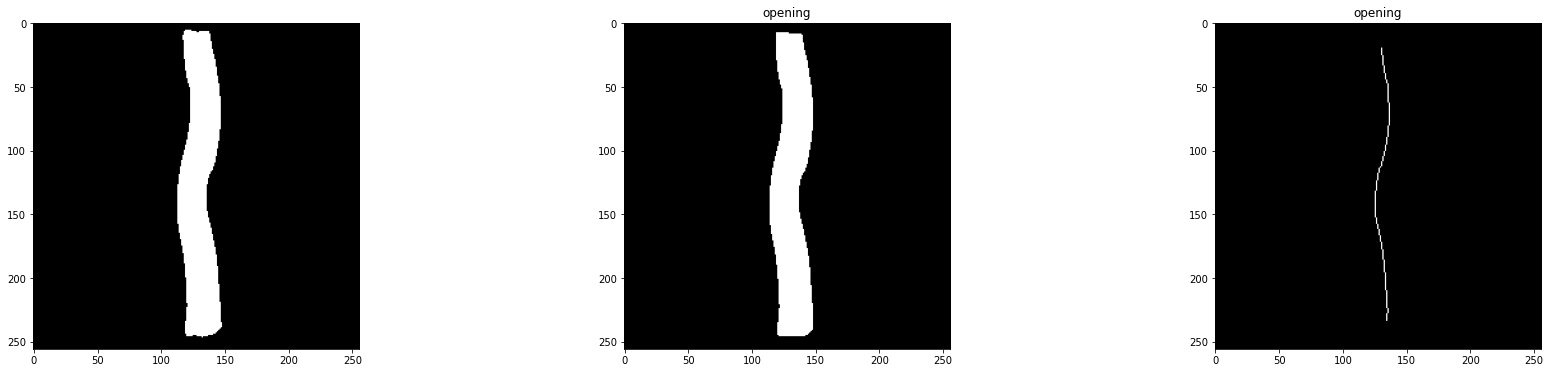

 58%|█████▊    | 135/232 [02:32<03:34,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/93264362919001418707067251939482387347_7apcfv.png


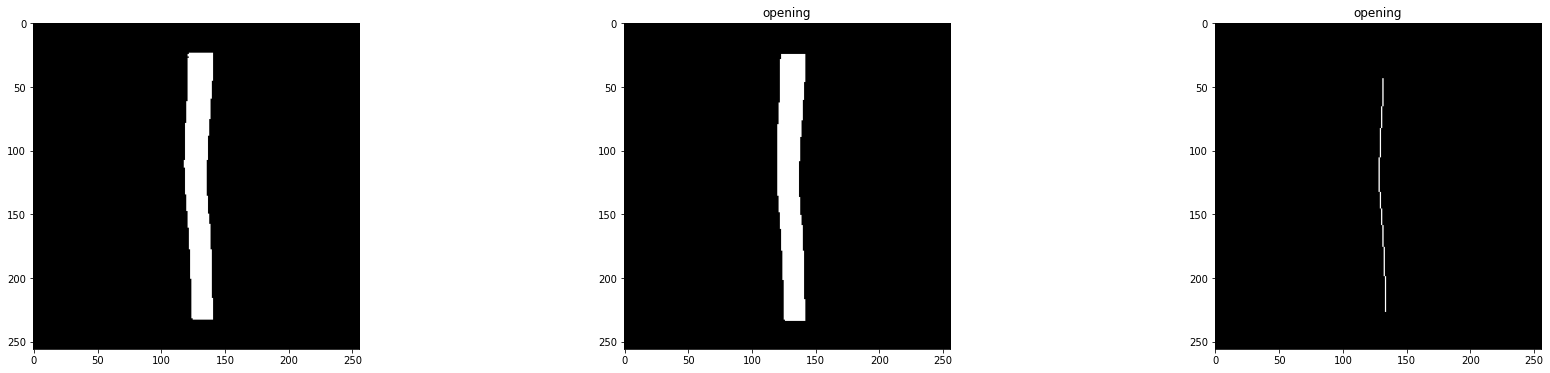

 59%|█████▊    | 136/232 [02:34<03:30,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013643839805242013087105417614_02-053-198.png


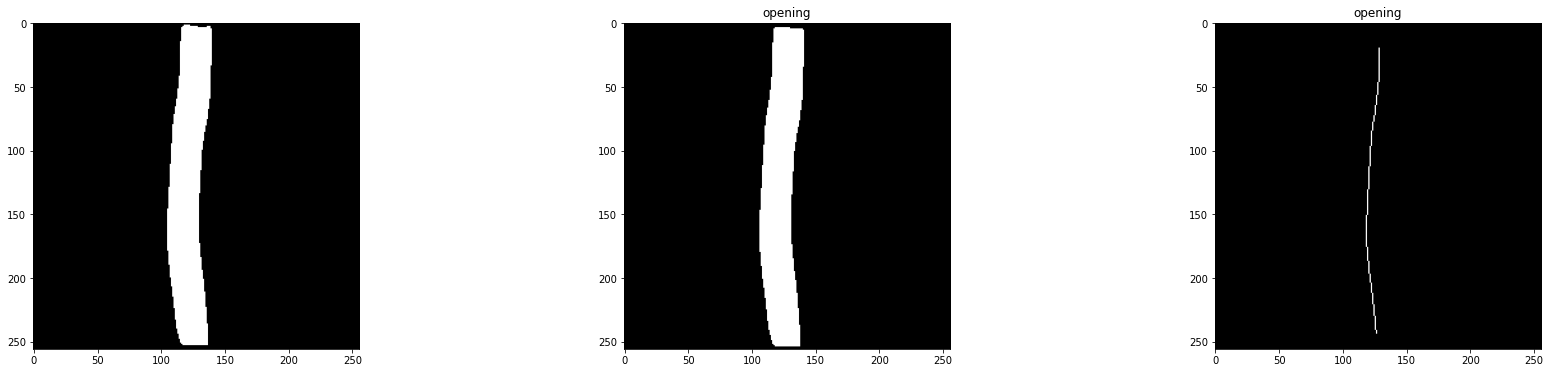

 59%|█████▉    | 137/232 [02:36<03:14,  2.05s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/81284990331982304963477634249711968634_t6zhd1.png


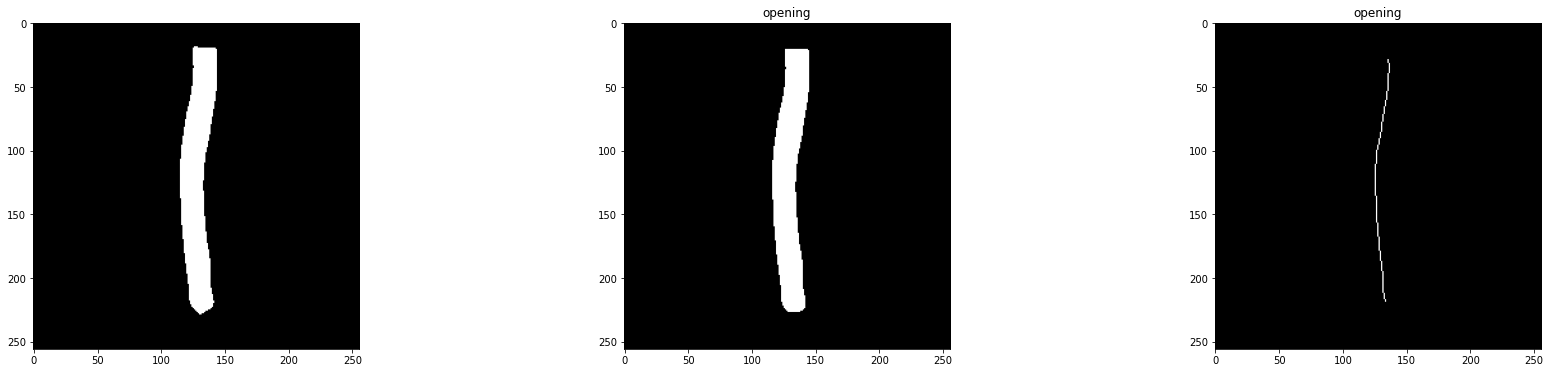

 59%|█████▉    | 138/232 [02:38<03:19,  2.12s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013649107288022013095110558796_02-070-118.png


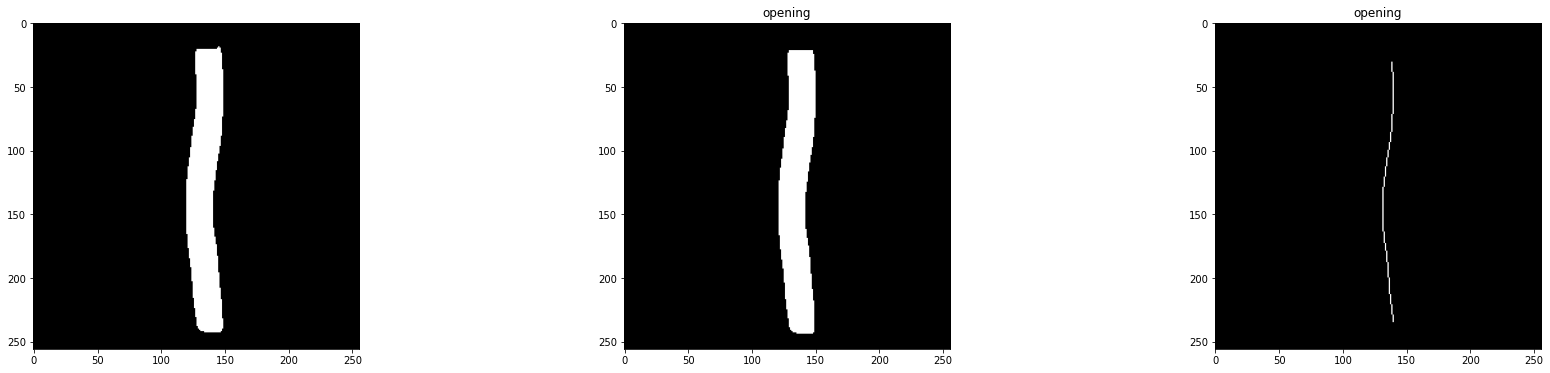

 60%|█████▉    | 139/232 [02:40<03:14,  2.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013663026955732013123104207644_02-036-199.png


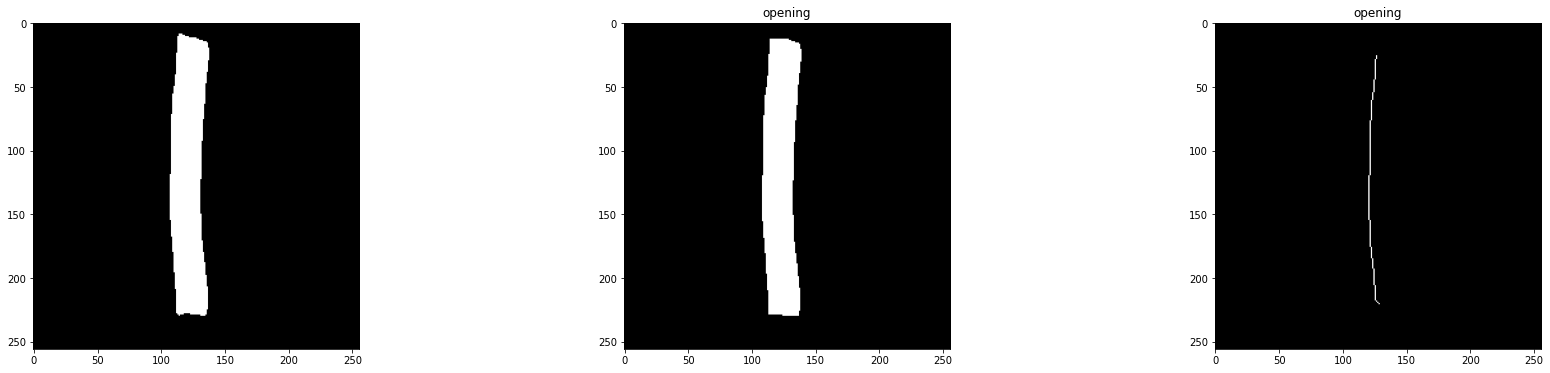

 60%|██████    | 140/232 [02:43<03:10,  2.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013649107288022013099122349117_02-074-020.png


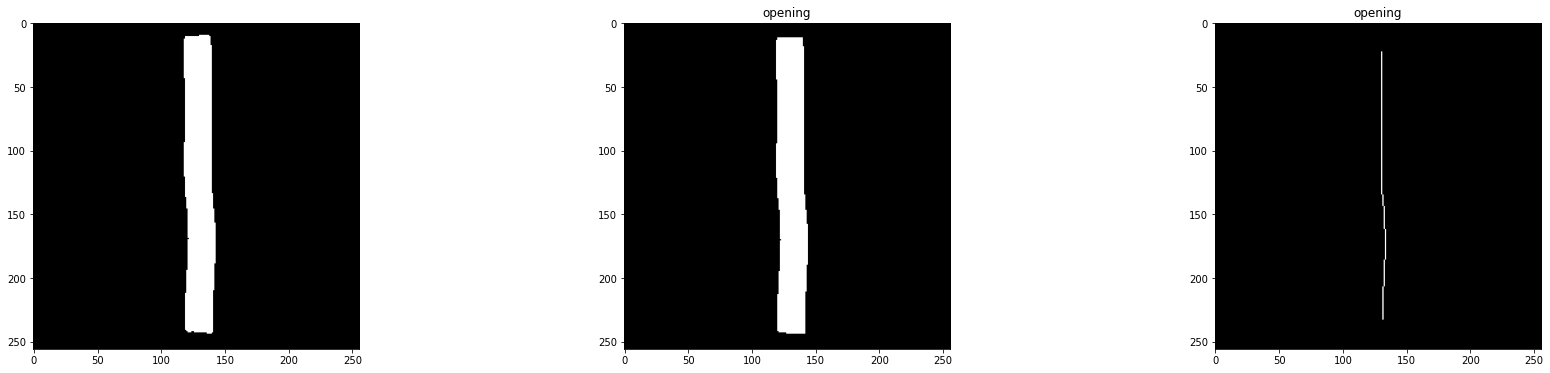

 61%|██████    | 141/232 [02:45<03:23,  2.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013663026955732013123085004182_02-039-107.png


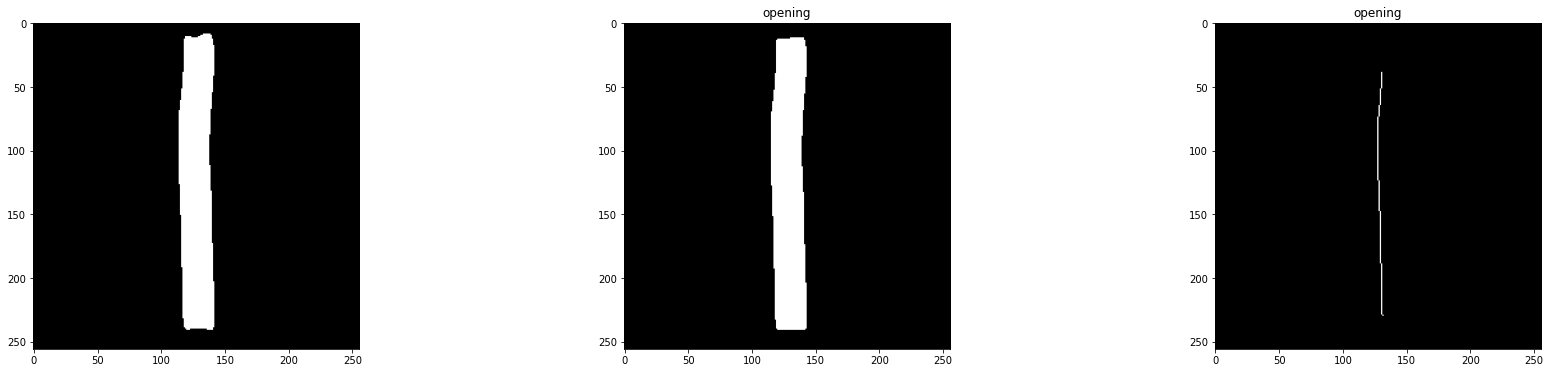

 61%|██████    | 142/232 [02:47<03:10,  2.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013663026955732013126110147761_02-043-123.png


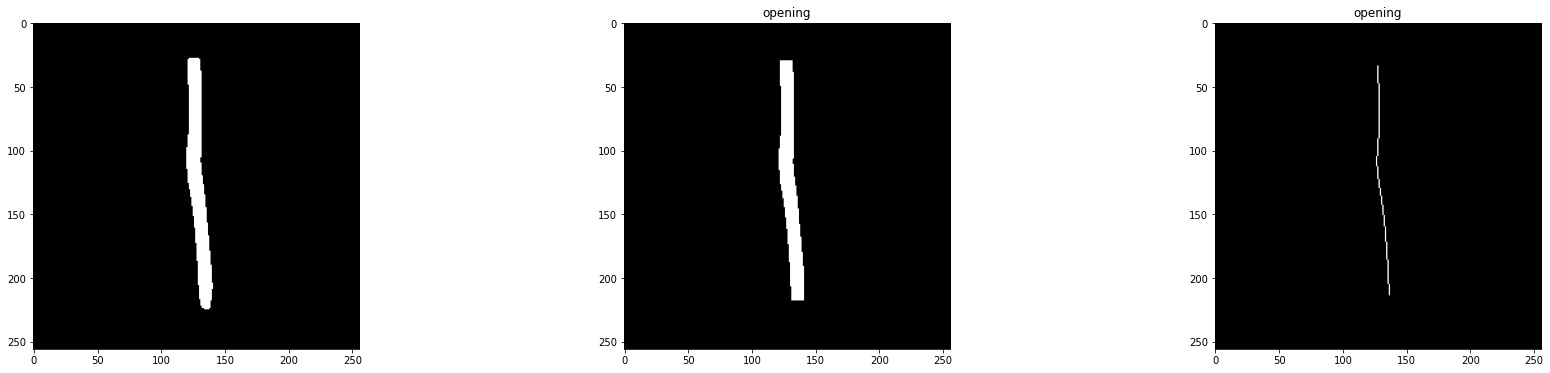

 62%|██████▏   | 143/232 [02:50<03:25,  2.31s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013135103017264_02-034-020.png


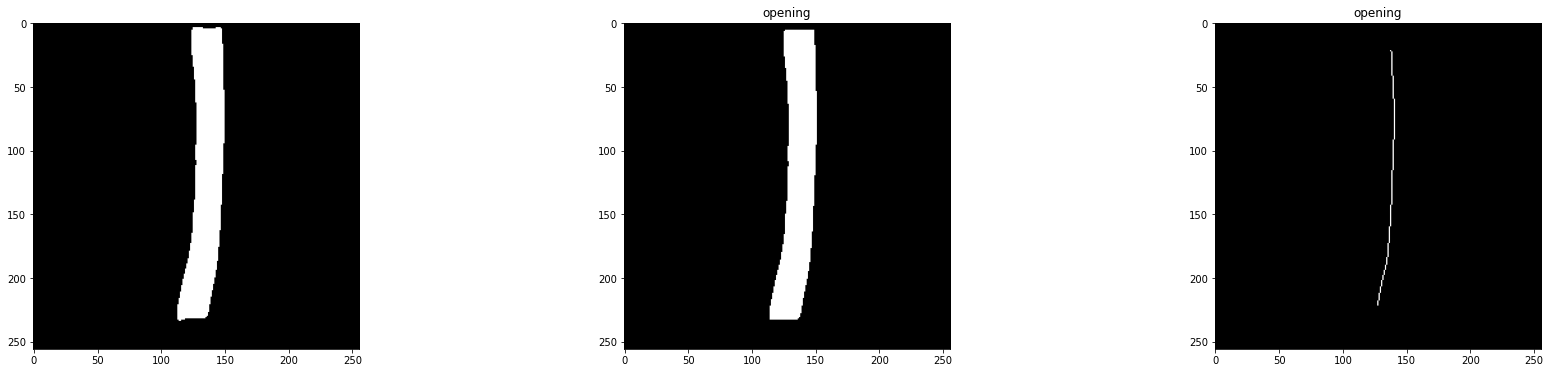

 62%|██████▏   | 144/232 [02:52<03:23,  2.32s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013141165452597_02-044-164.png


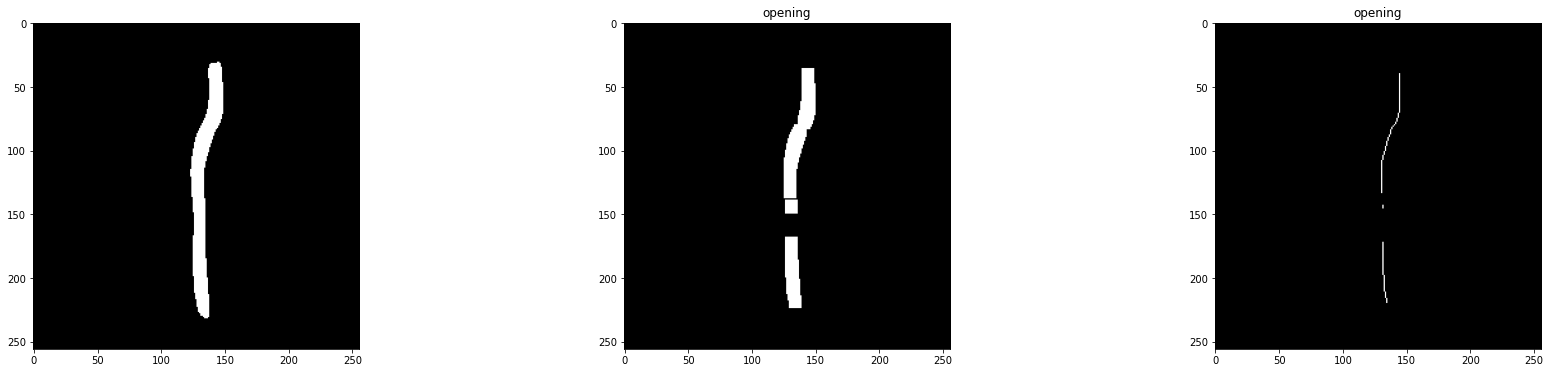

 62%|██████▎   | 145/232 [02:55<03:29,  2.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013144174118909_02-036-003.png


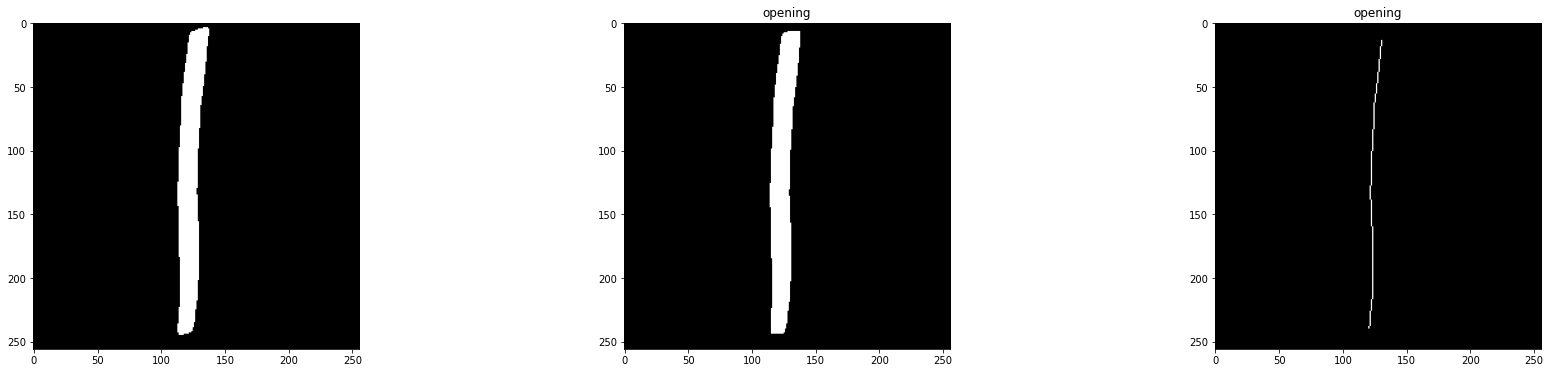

 63%|██████▎   | 146/232 [02:57<03:25,  2.39s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013147112439636_02-039-162.png


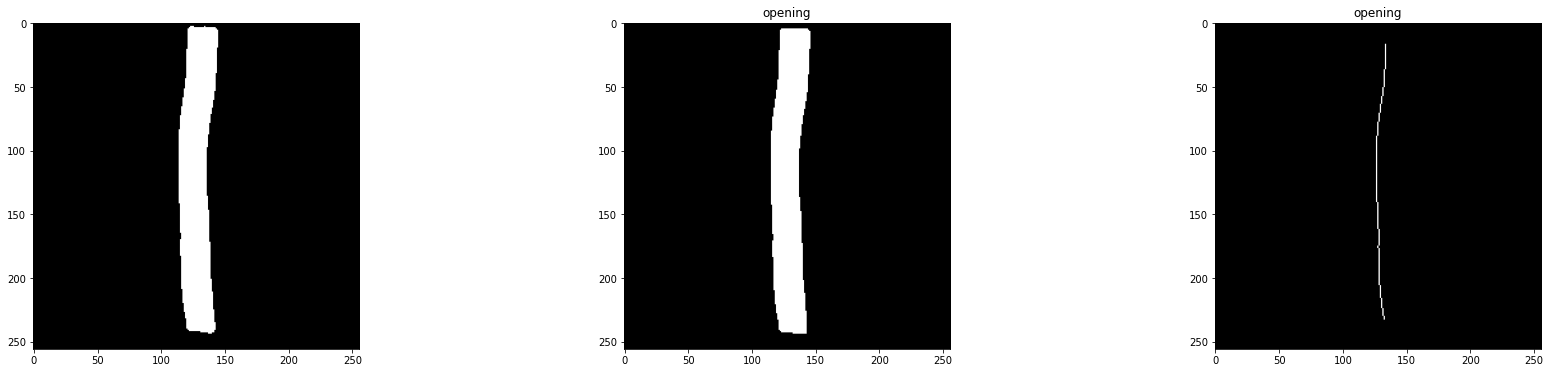

 63%|██████▎   | 147/232 [03:00<03:33,  2.51s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013155140517267_02-104-104.png


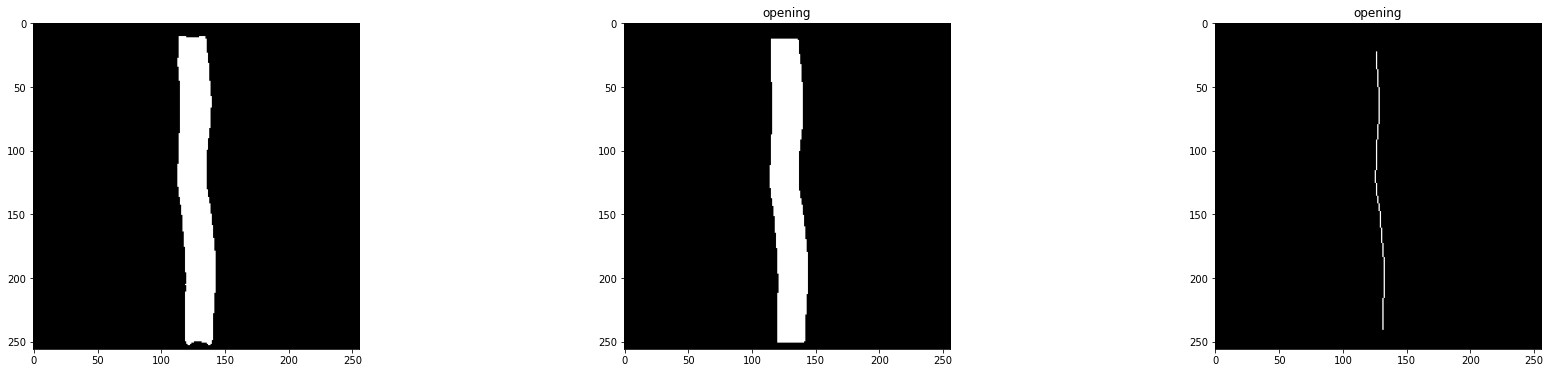

 64%|██████▍   | 148/232 [03:01<03:09,  2.25s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013149095859723_02-105-017.png


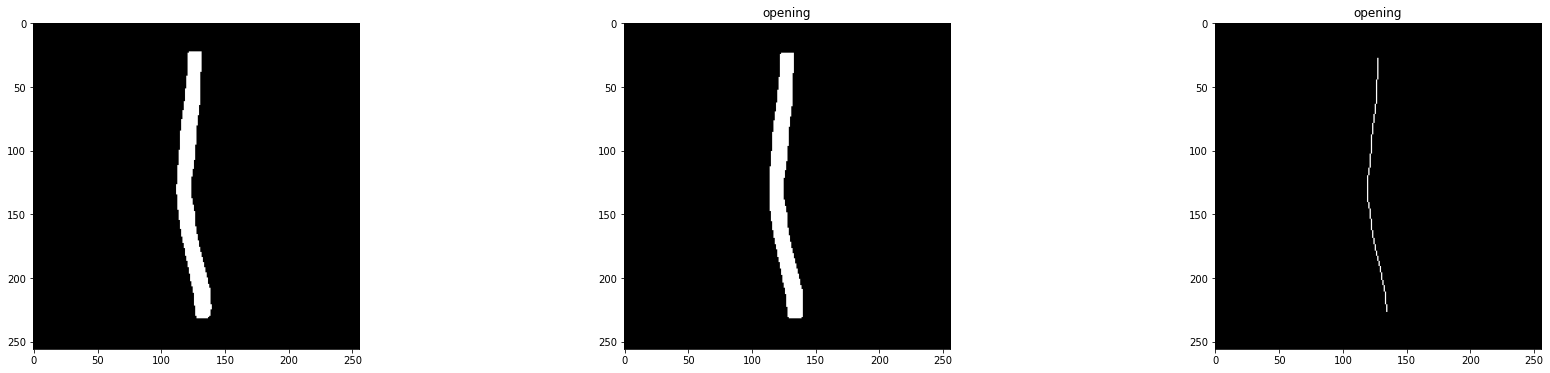

 64%|██████▍   | 149/232 [03:04<03:17,  2.37s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013162140215196_02-101-085.png


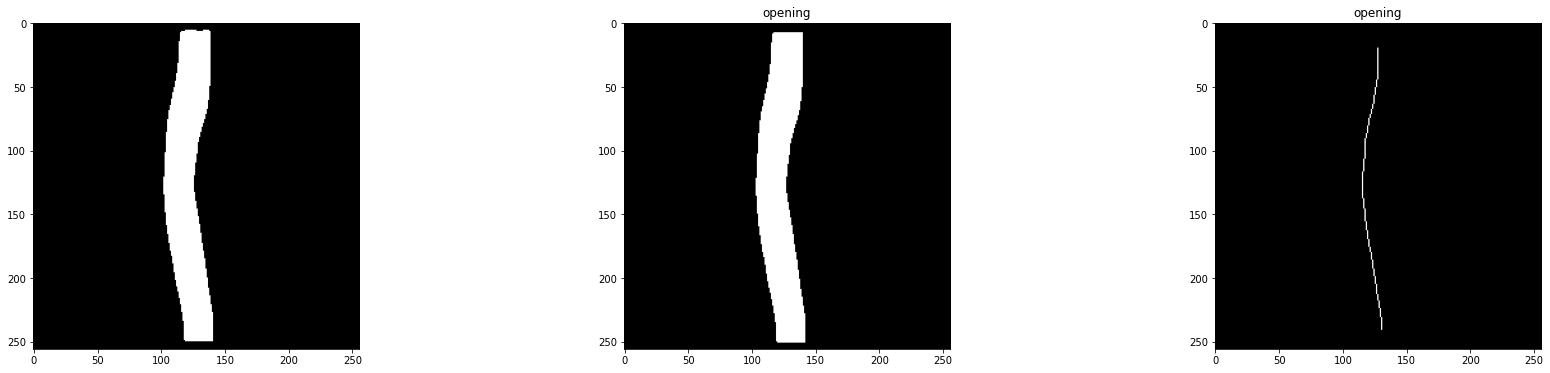

 65%|██████▍   | 150/232 [03:06<03:05,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013172131112300_02-027-017.png


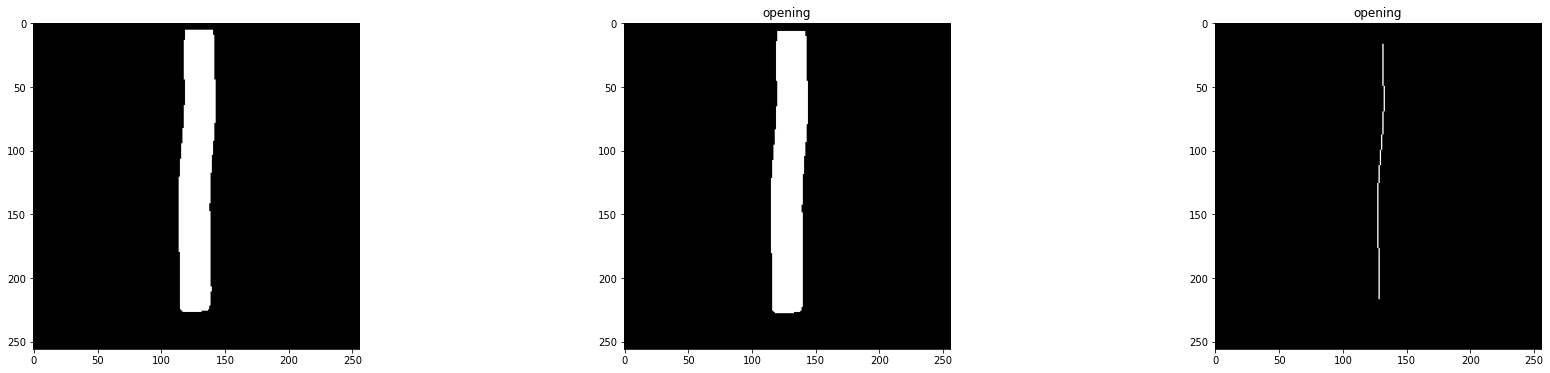

 65%|██████▌   | 151/232 [03:08<03:05,  2.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013196090022552_02-028-132.png


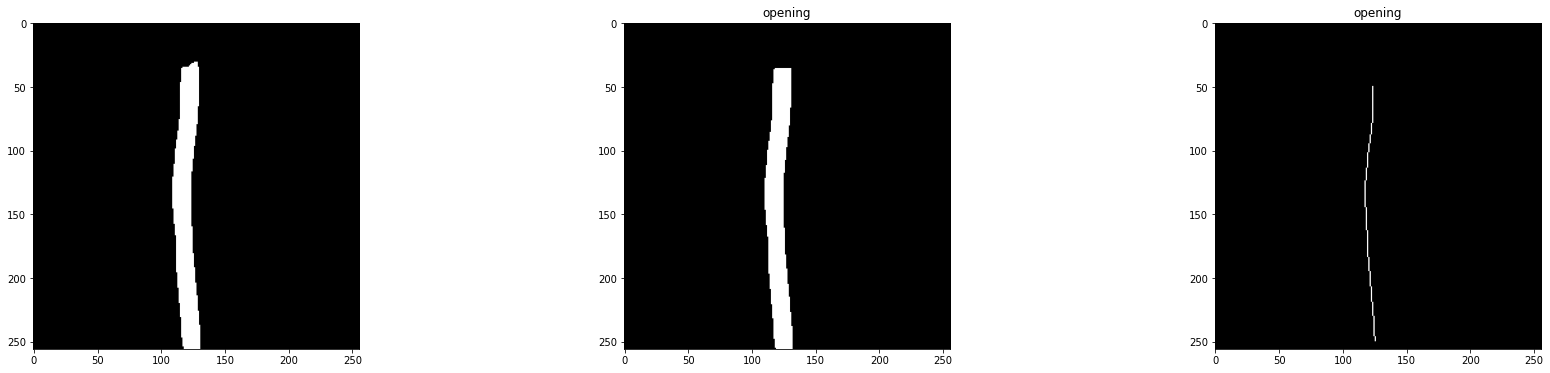

 66%|██████▌   | 152/232 [03:11<03:02,  2.28s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013185092207109_02-031-193.png


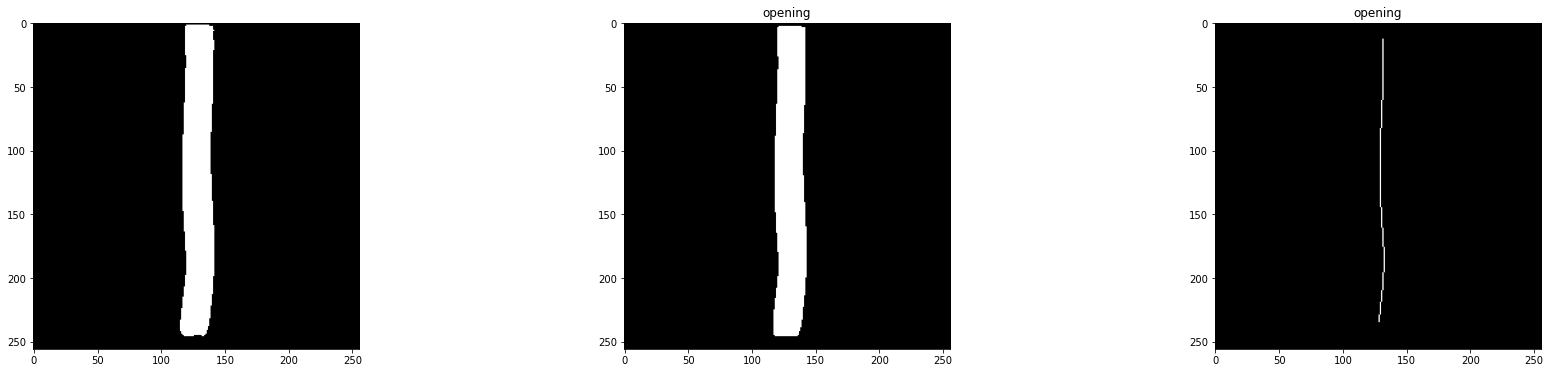

 66%|██████▌   | 153/232 [03:13<03:08,  2.39s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013196090022552_02-028-125.png


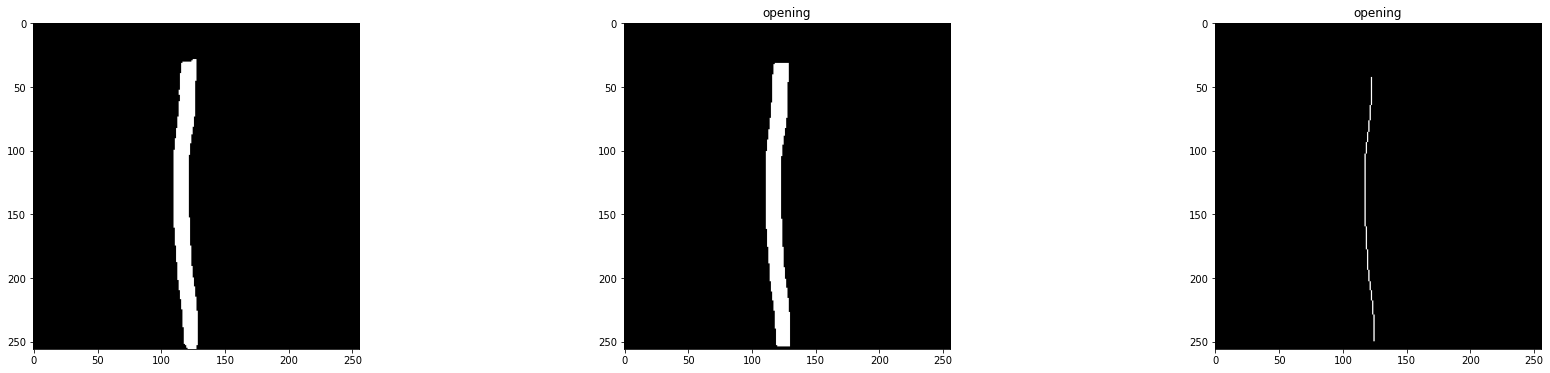

 66%|██████▋   | 154/232 [03:16<03:16,  2.52s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013199093459885_02-029-048.png


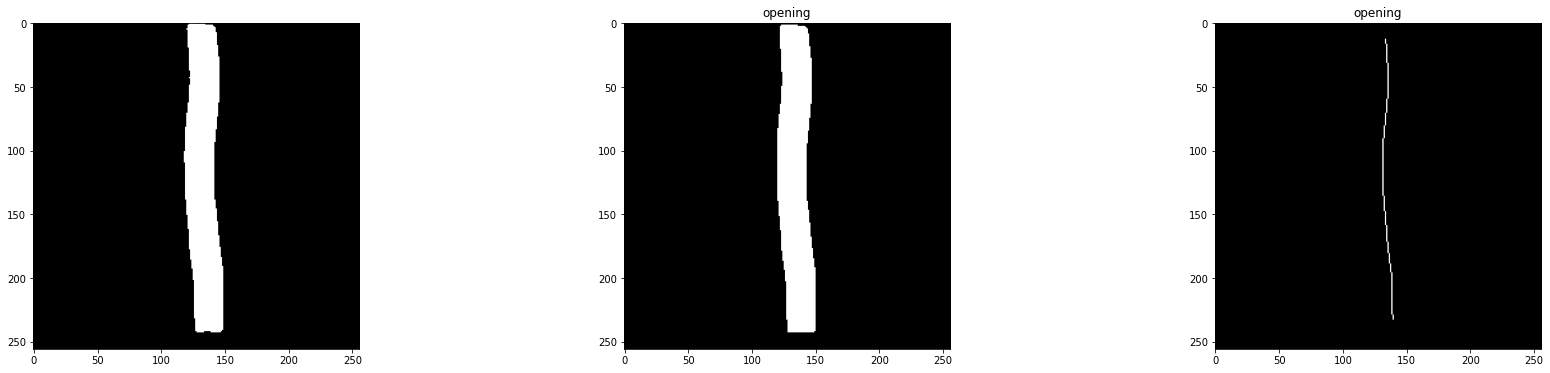

 67%|██████▋   | 155/232 [03:18<02:51,  2.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013218124120396_02-004-041.png


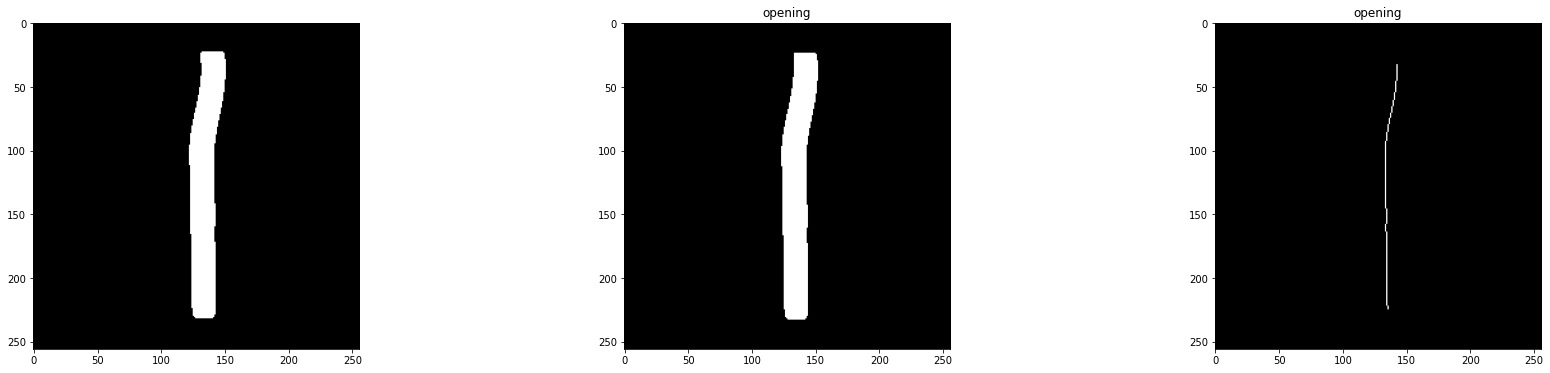

 67%|██████▋   | 156/232 [03:20<02:45,  2.17s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013220193549795_02-000-006.png


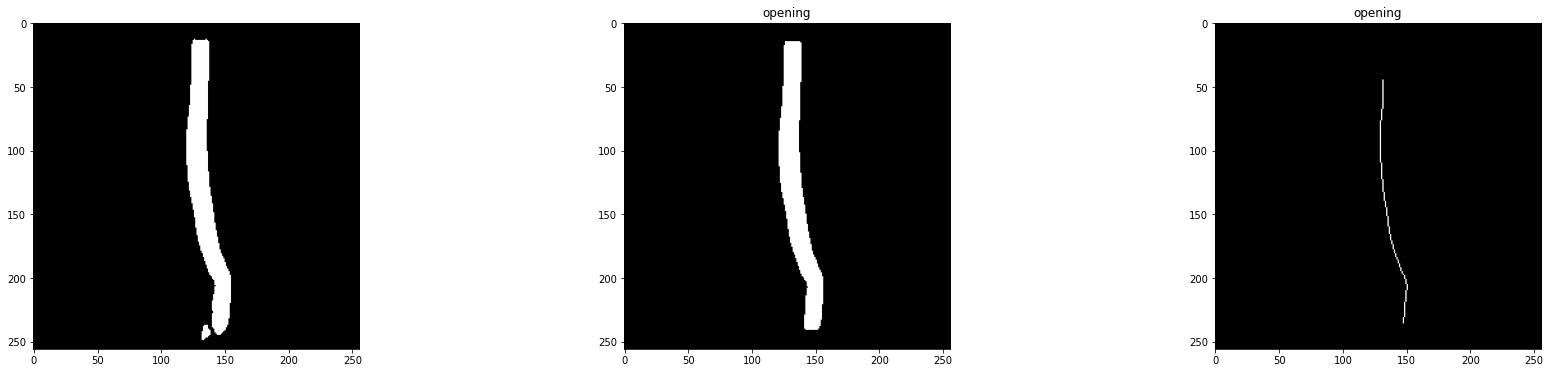

 68%|██████▊   | 157/232 [03:22<02:45,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013249083931621_02-024-181.png


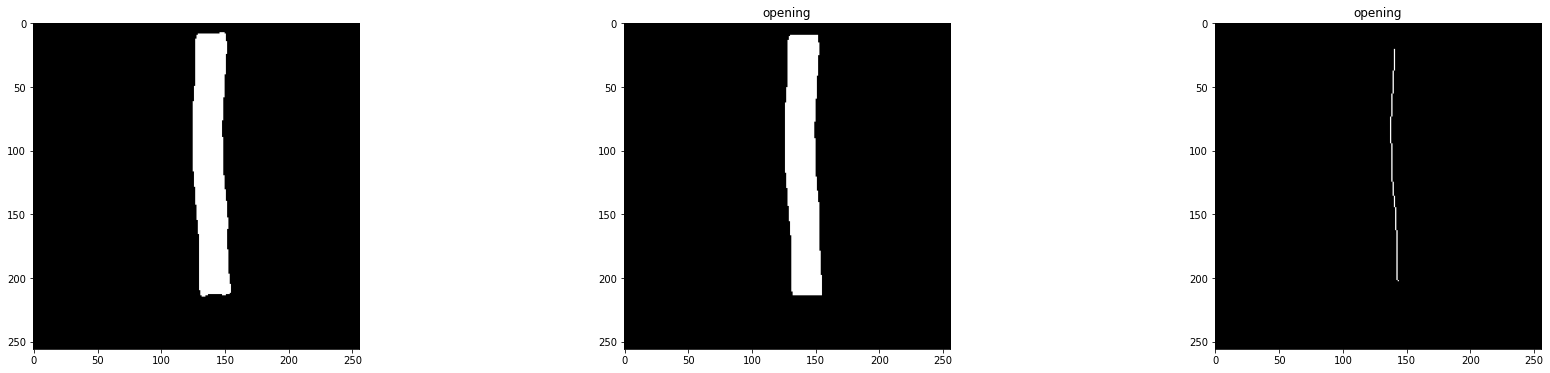

 68%|██████▊   | 158/232 [03:24<02:35,  2.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013242123206443_02-001-169.png


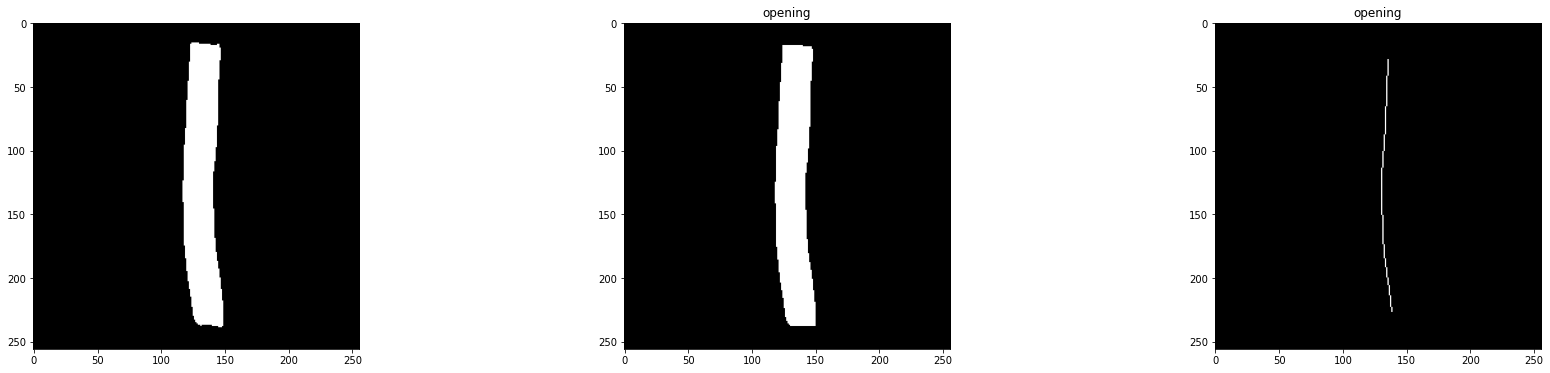

 69%|██████▊   | 159/232 [03:26<02:30,  2.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013275122835355_02-083-193.png


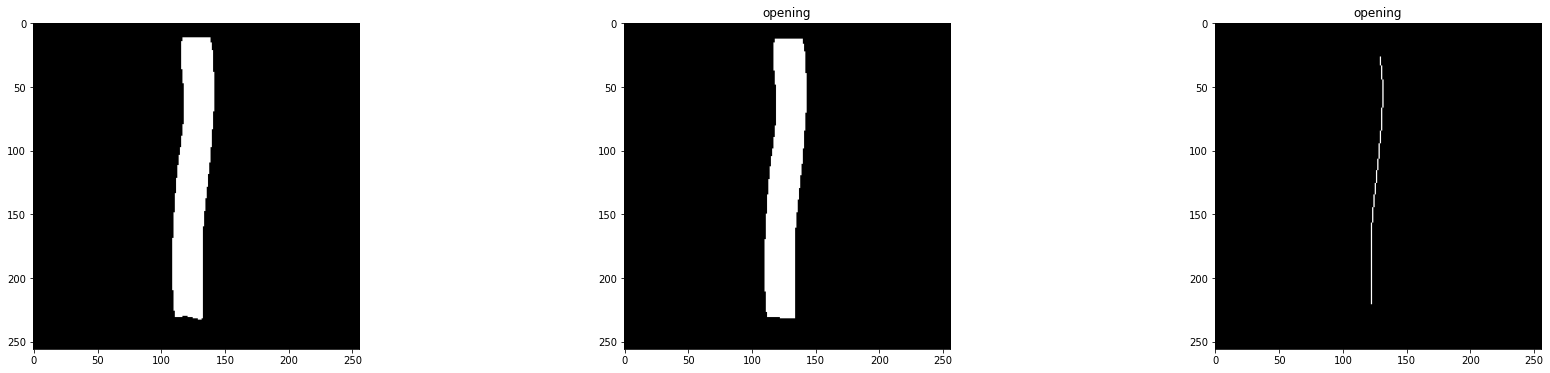

 69%|██████▉   | 160/232 [03:28<02:30,  2.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013297123601060_02-080-013.png


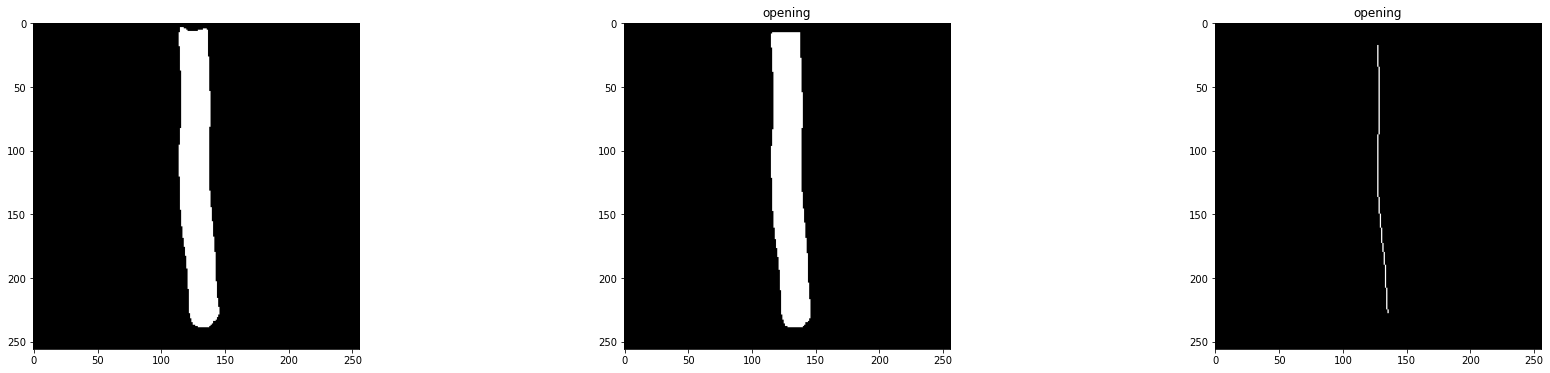

 69%|██████▉   | 161/232 [03:30<02:24,  2.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013686042548532013253133256972_02-025-032.png


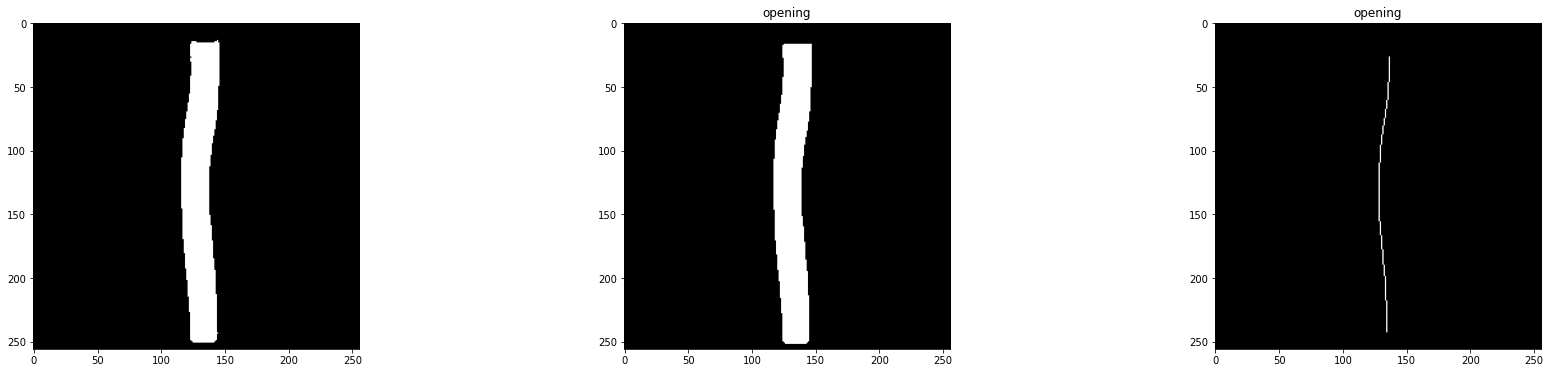

 70%|██████▉   | 162/232 [03:32<02:18,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013829543166512013345100944057_02-097-006.png


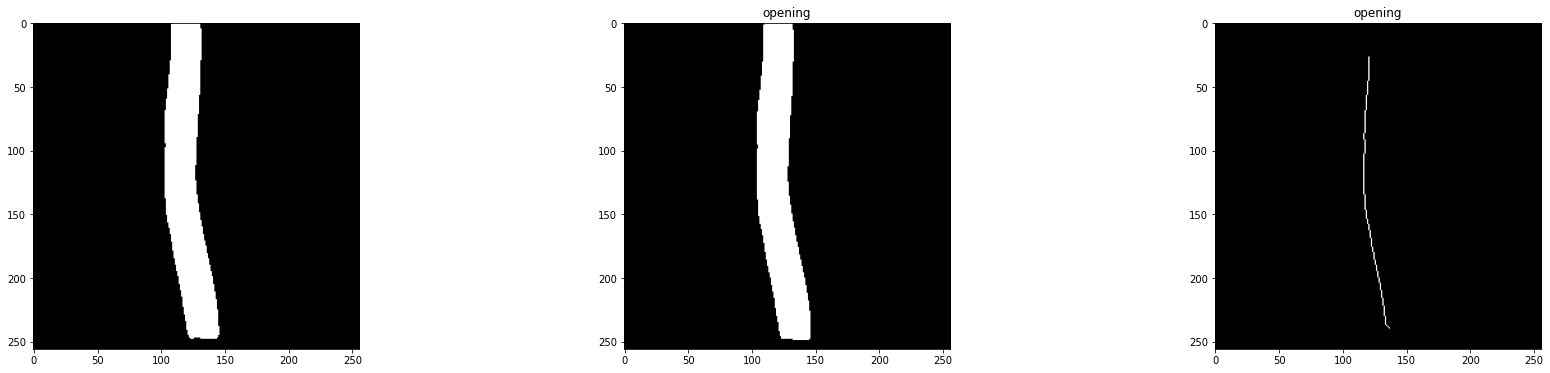

 70%|███████   | 163/232 [03:34<02:16,  1.97s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013829543166512013319123032330_02-108-131.png


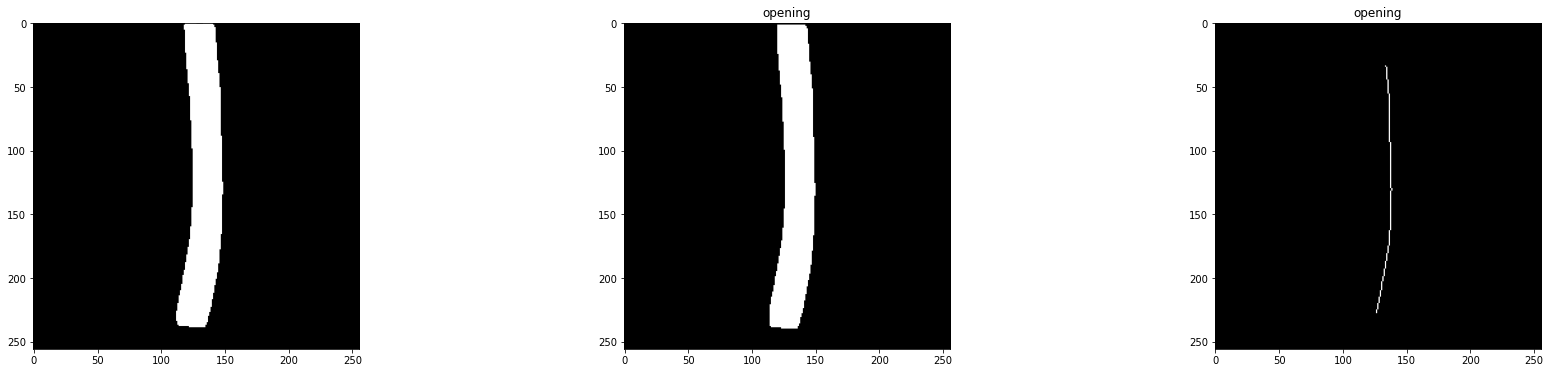

 71%|███████   | 164/232 [03:36<02:18,  2.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013829543166512013344093400062_02-095-090.png


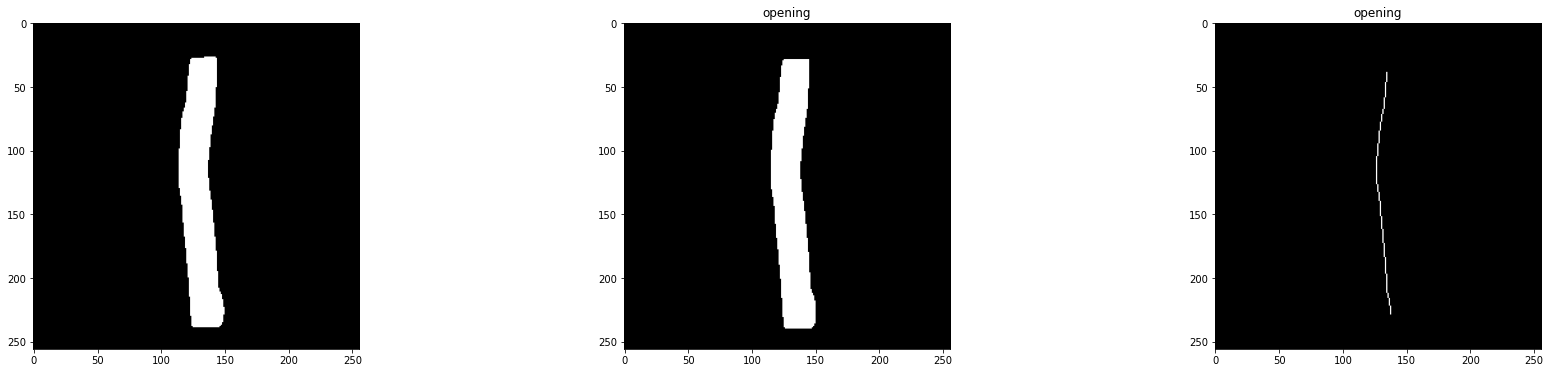

 71%|███████   | 165/232 [03:38<02:13,  1.99s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/222822711657010215624618379108399206253_r6wo3q.png


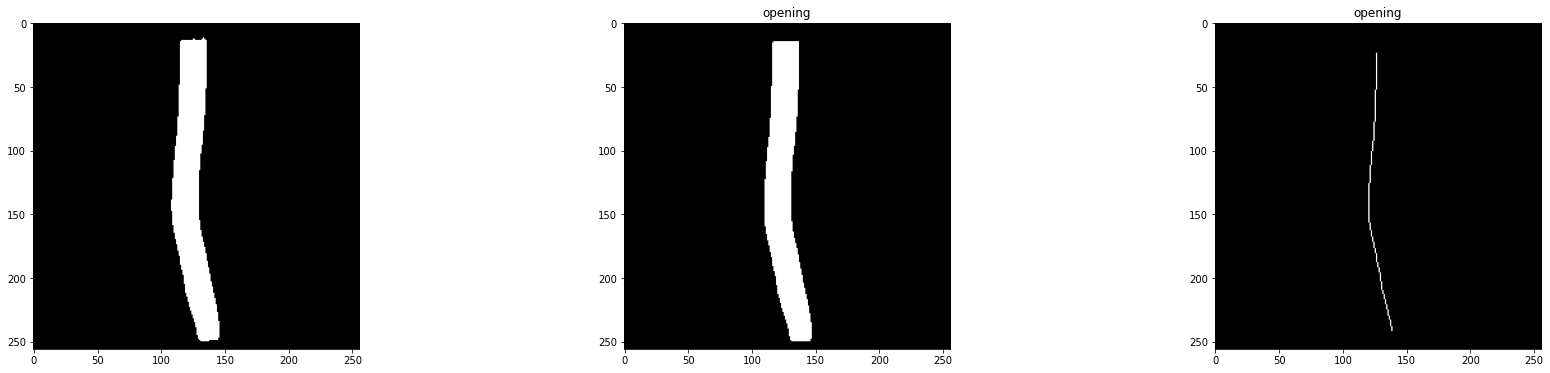

 72%|███████▏  | 166/232 [03:40<02:19,  2.12s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013829543166512013353090132919_02-092-159.png


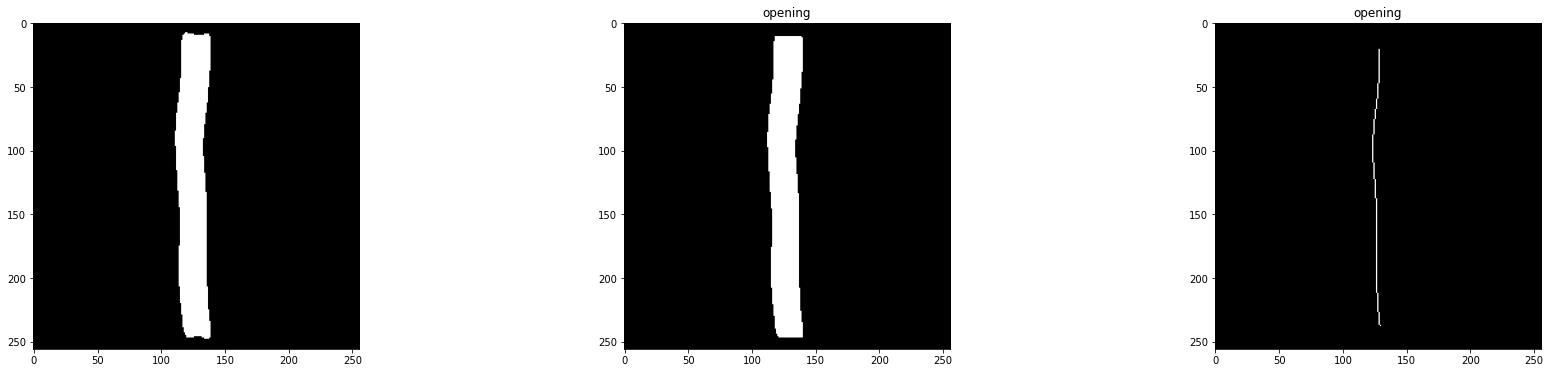

 72%|███████▏  | 167/232 [03:43<02:22,  2.20s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/235188052168455712958051228849753263009_kq1x7i.png


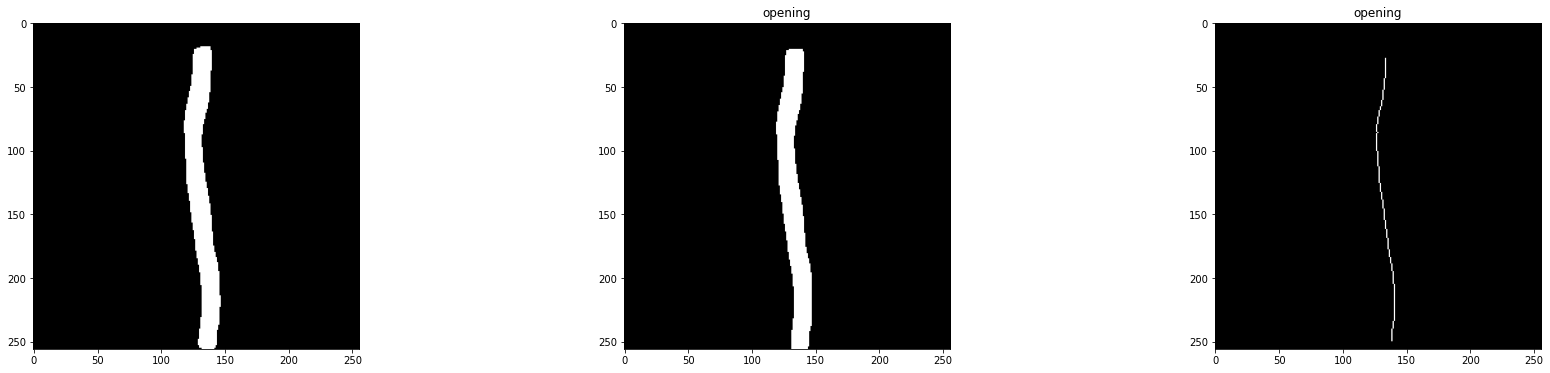

 72%|███████▏  | 168/232 [03:45<02:30,  2.35s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/246543509589816788806198072366293103080_eywilg.png


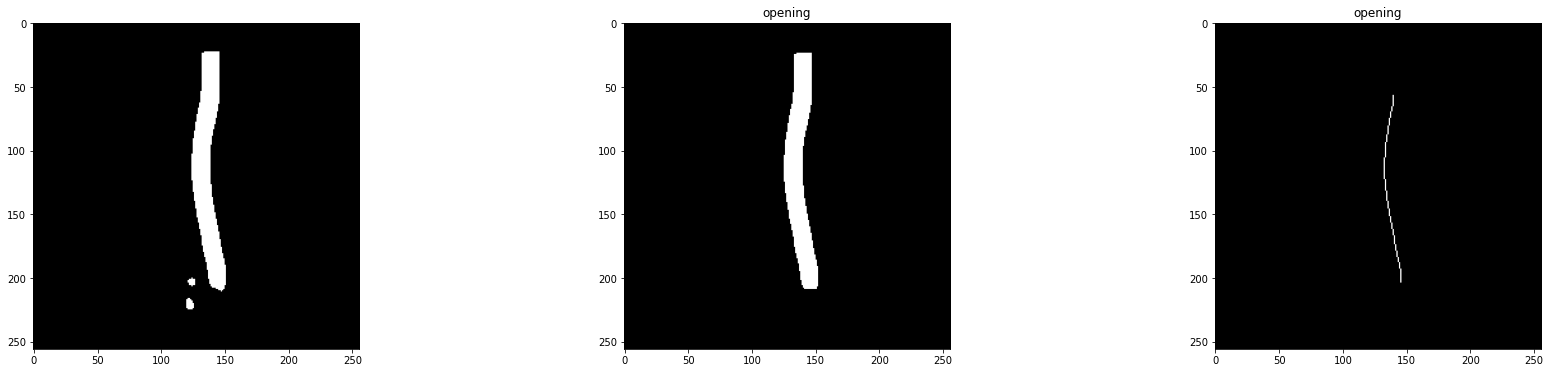

 73%|███████▎  | 169/232 [03:48<02:24,  2.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010062161124630_03-163-039.png


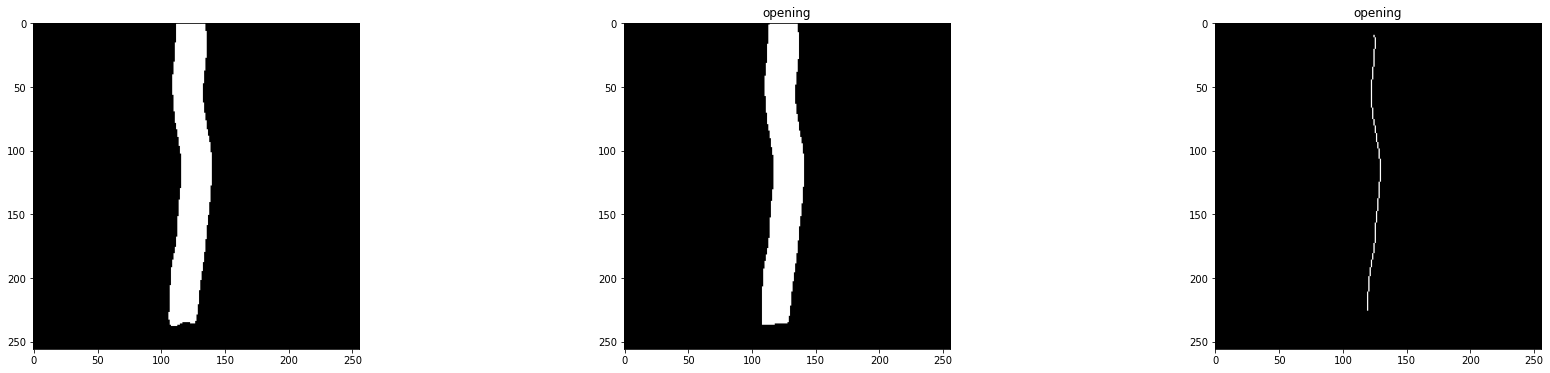

 73%|███████▎  | 170/232 [03:50<02:19,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964014008416513202014157165810749_01-198-091.png


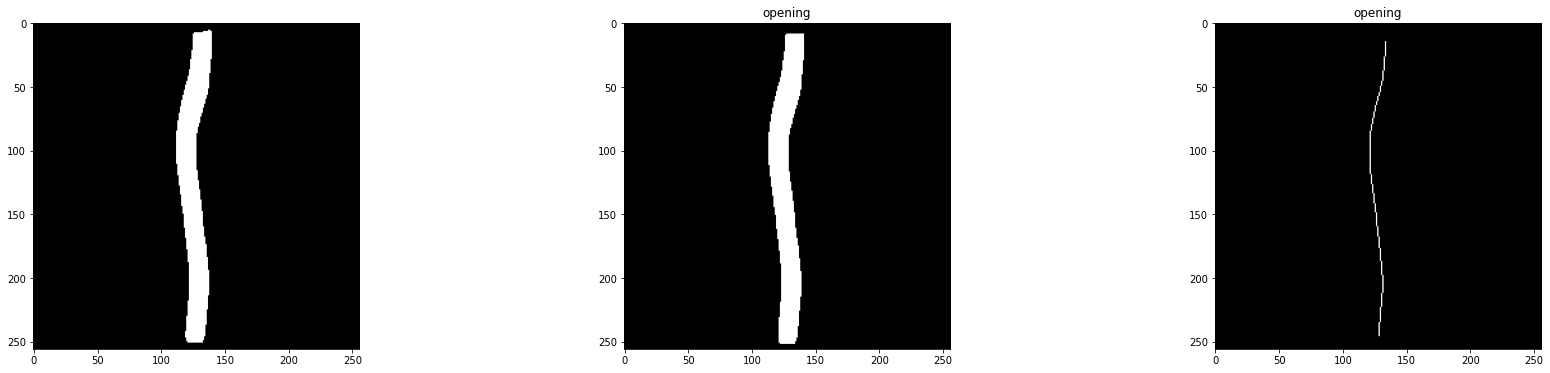

 74%|███████▎  | 171/232 [03:52<02:17,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010068113507010_03-155-193.png


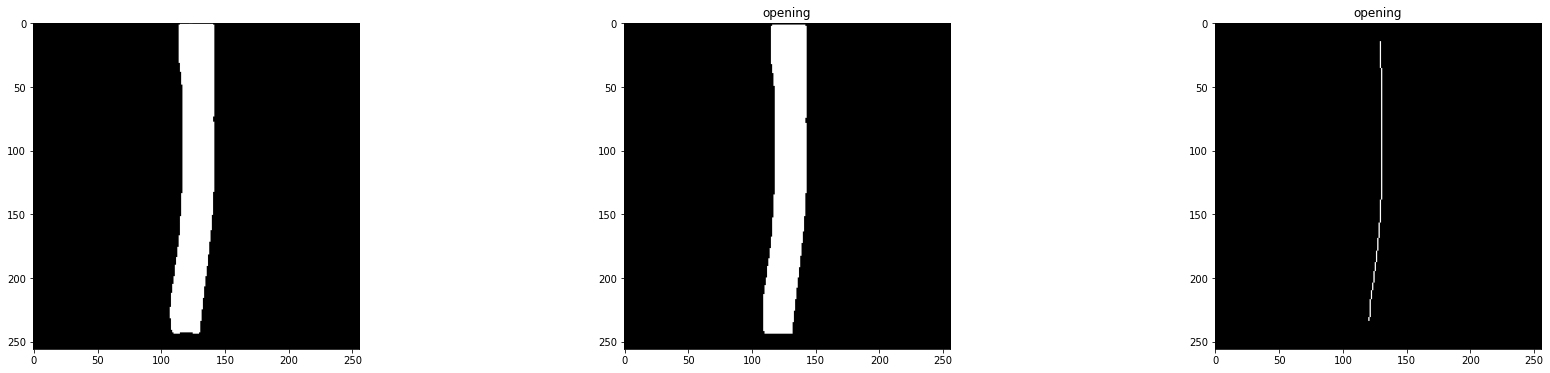

 74%|███████▍  | 172/232 [03:53<02:01,  2.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010074135530920_03-160-036.png


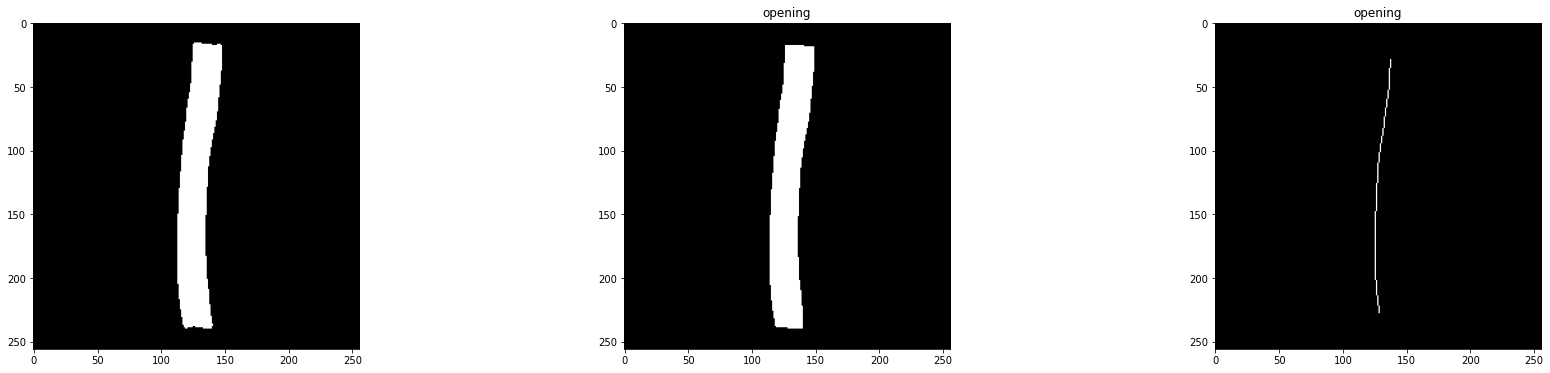

 75%|███████▍  | 173/232 [03:55<01:56,  1.97s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010077114724897_03-158-095.png


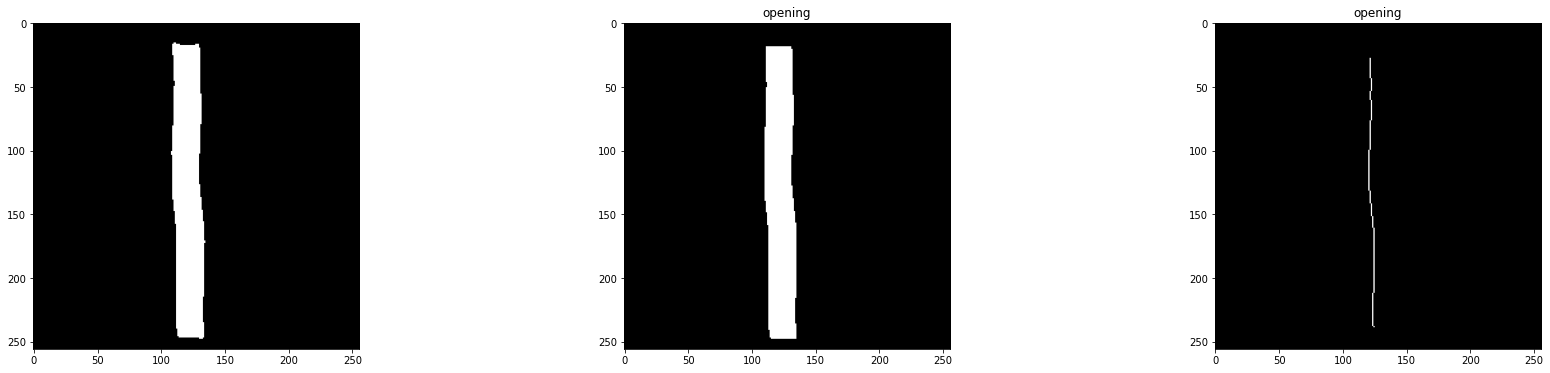

 75%|███████▌  | 174/232 [03:58<02:02,  2.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010103163046580_03-178-198.png


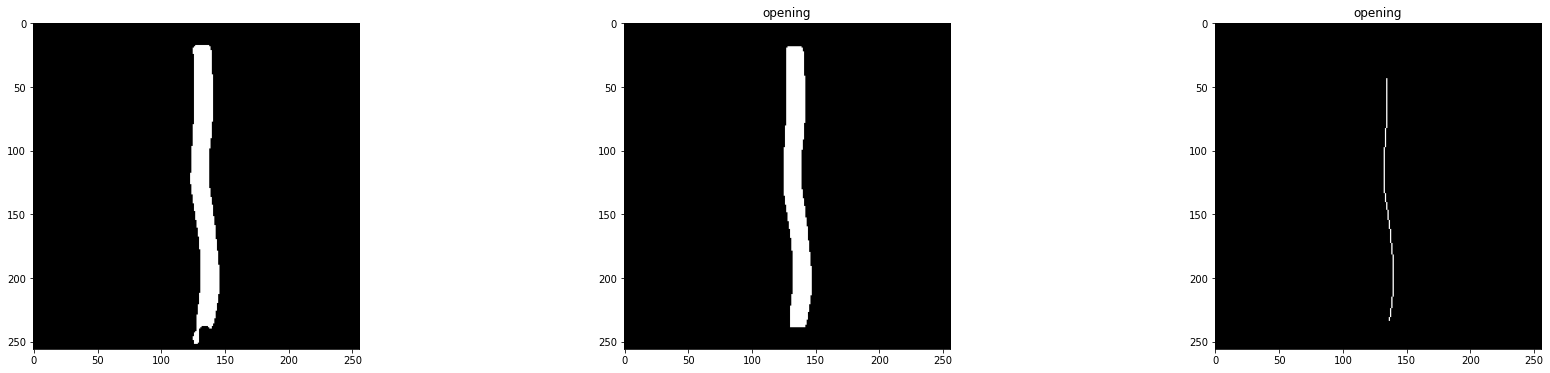

 75%|███████▌  | 175/232 [04:00<02:05,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010088133911557_03-156-158.png


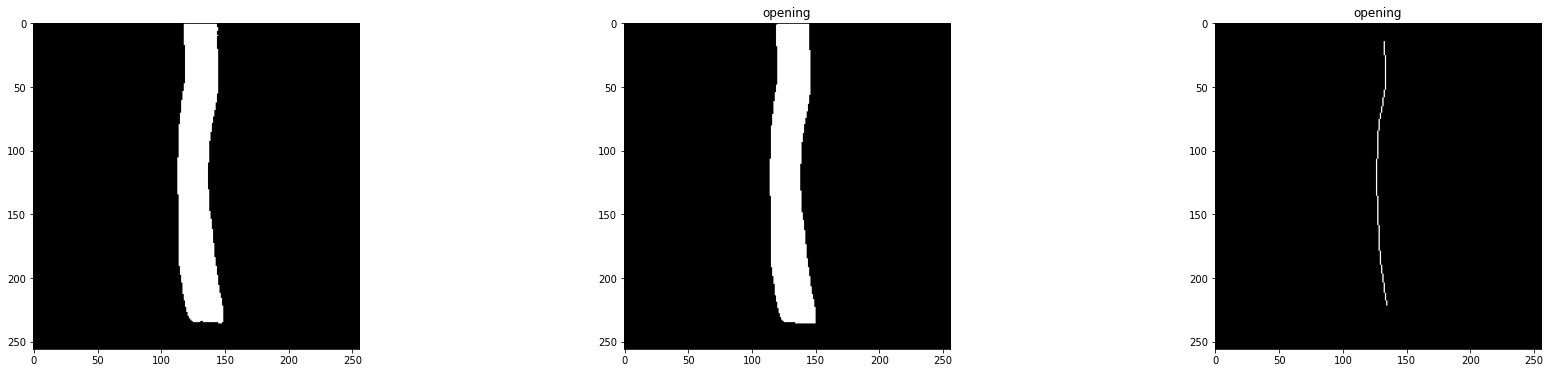

 76%|███████▌  | 176/232 [04:02<02:02,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010109135550228_03-147-068.png


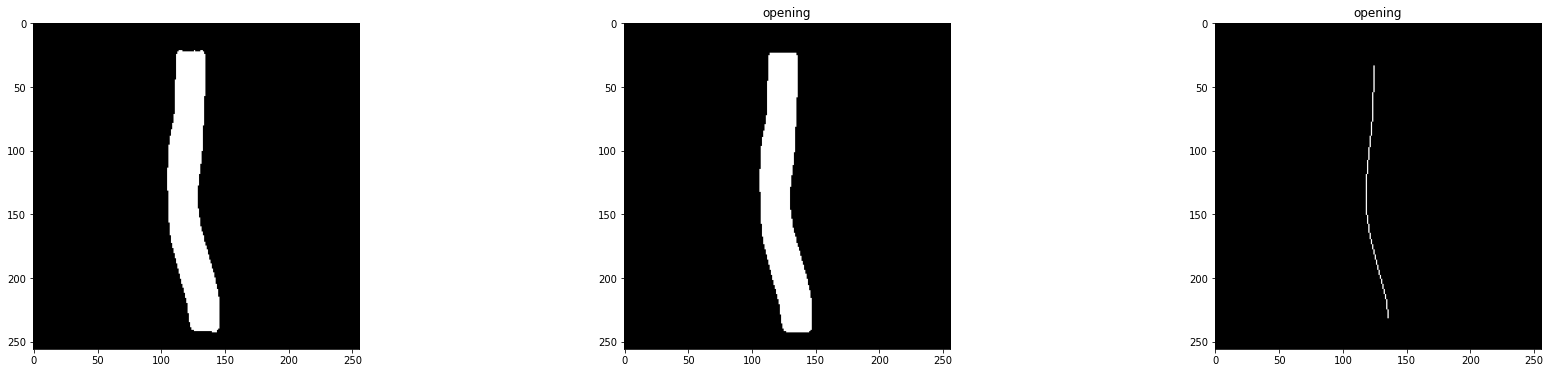

 76%|███████▋  | 177/232 [04:04<01:53,  2.06s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012558082906712010124103547741_03-151-020.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


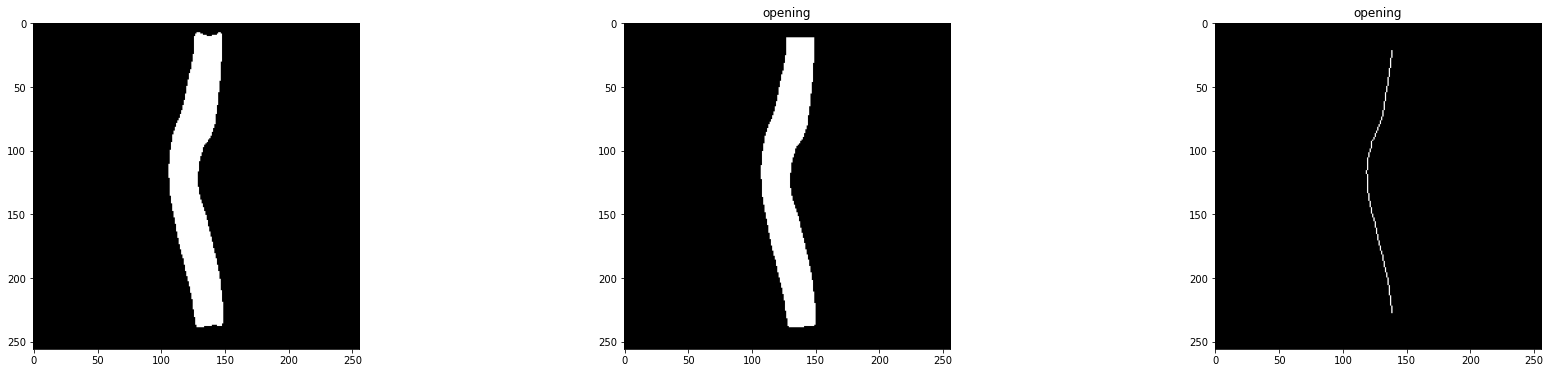

 77%|███████▋  | 178/232 [04:07<01:58,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010131094148883_03-145-120.png


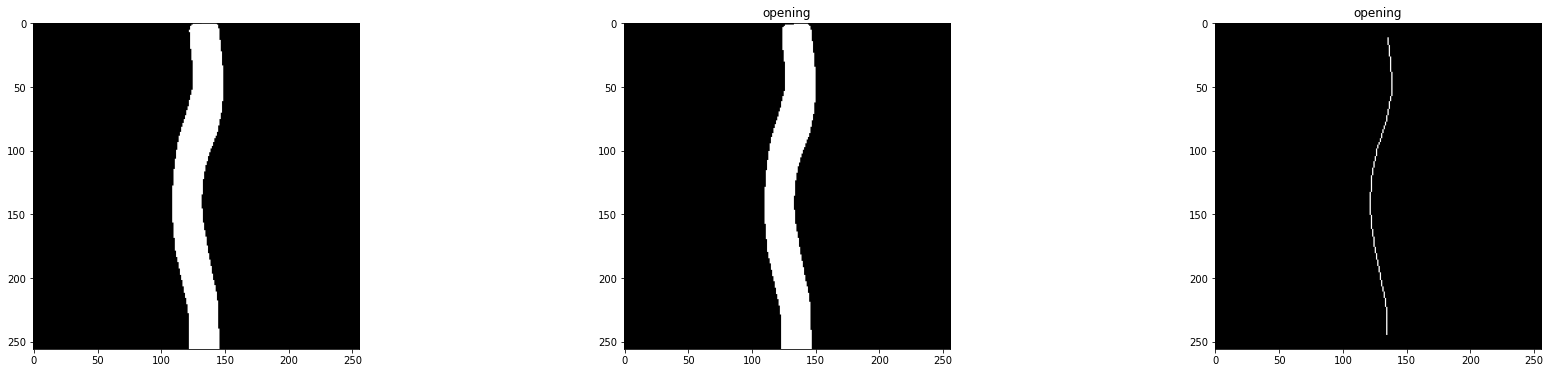

 77%|███████▋  | 179/232 [04:09<01:53,  2.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010130173136506_03-148-150.png


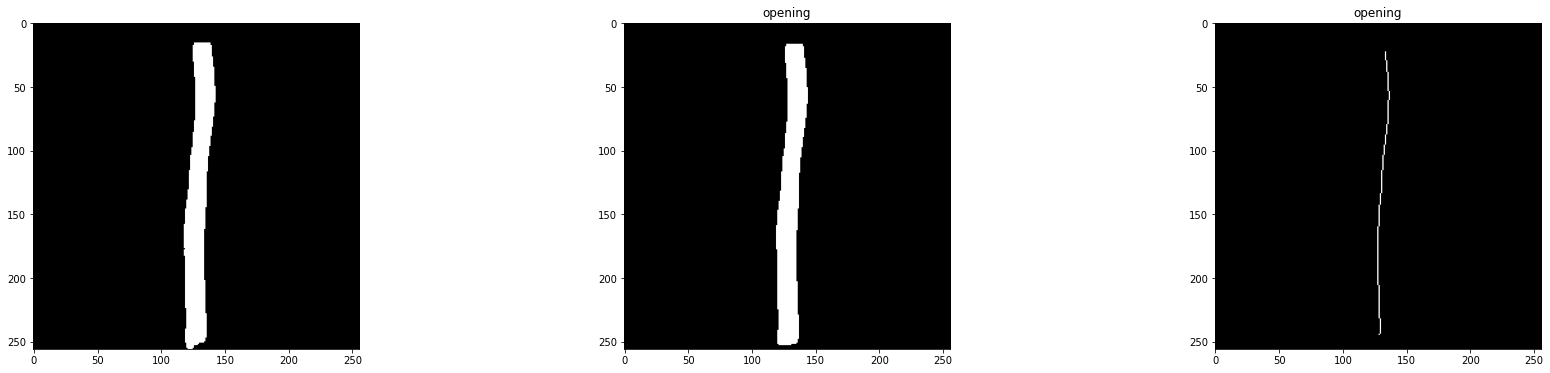

 78%|███████▊  | 180/232 [04:11<01:56,  2.25s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010137122655363_03-145-197.png


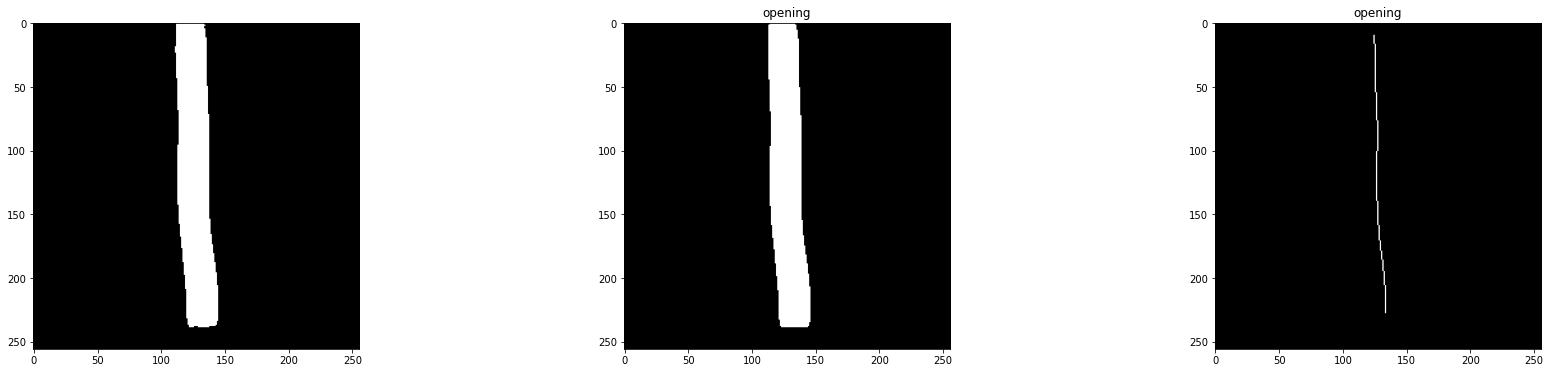

 78%|███████▊  | 181/232 [04:13<01:52,  2.20s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010138150859910_03-145-054.png


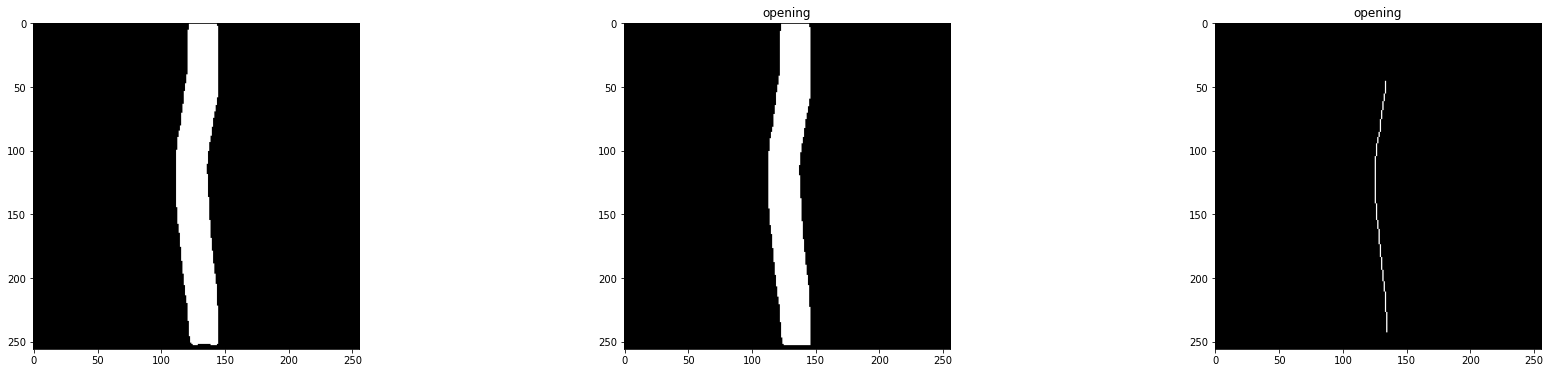

 78%|███████▊  | 182/232 [04:15<01:50,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010252134715268_03-130-199.png


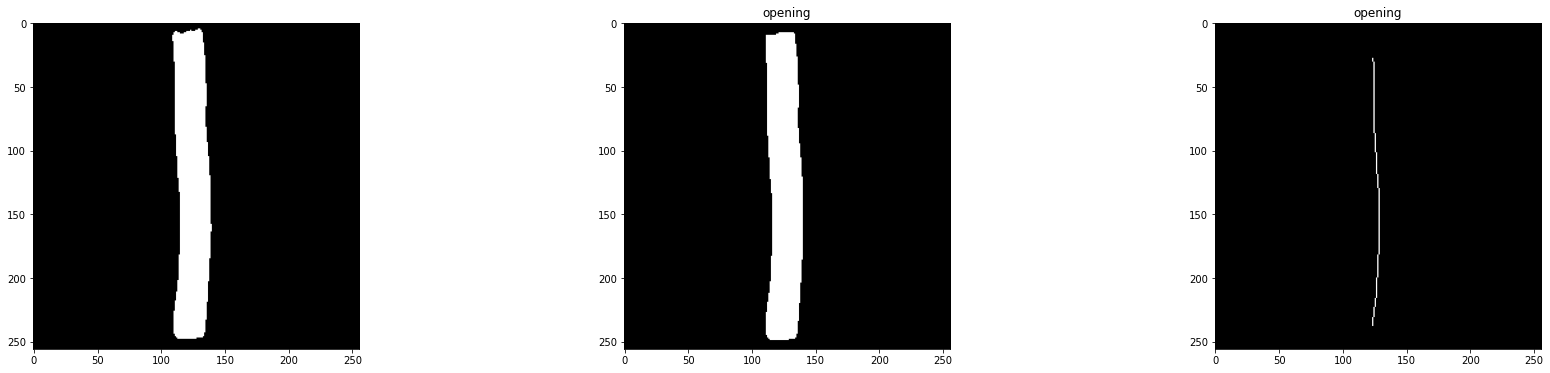

 79%|███████▉  | 183/232 [04:18<01:48,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012734950068292010144121634827_03-145-013.png


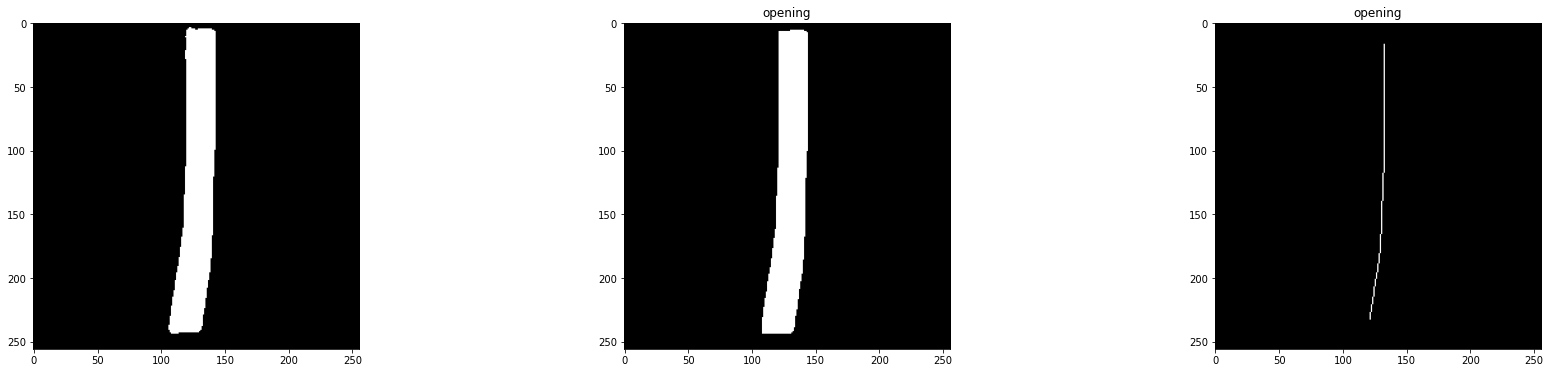

 79%|███████▉  | 184/232 [04:19<01:37,  2.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010273143140821_03-127-108.png


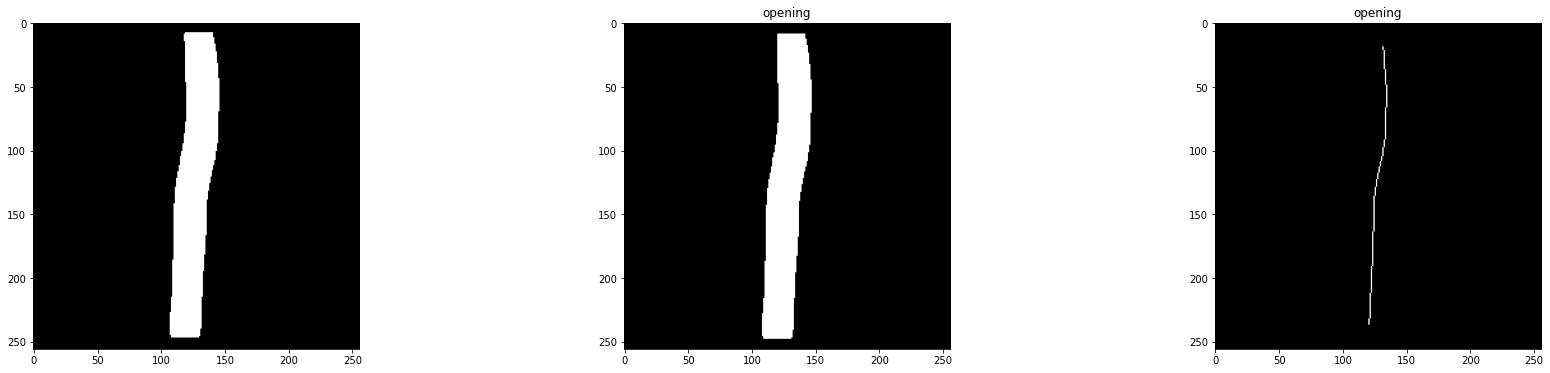

 80%|███████▉  | 185/232 [04:21<01:36,  2.05s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010279131336776_03-187-012.png


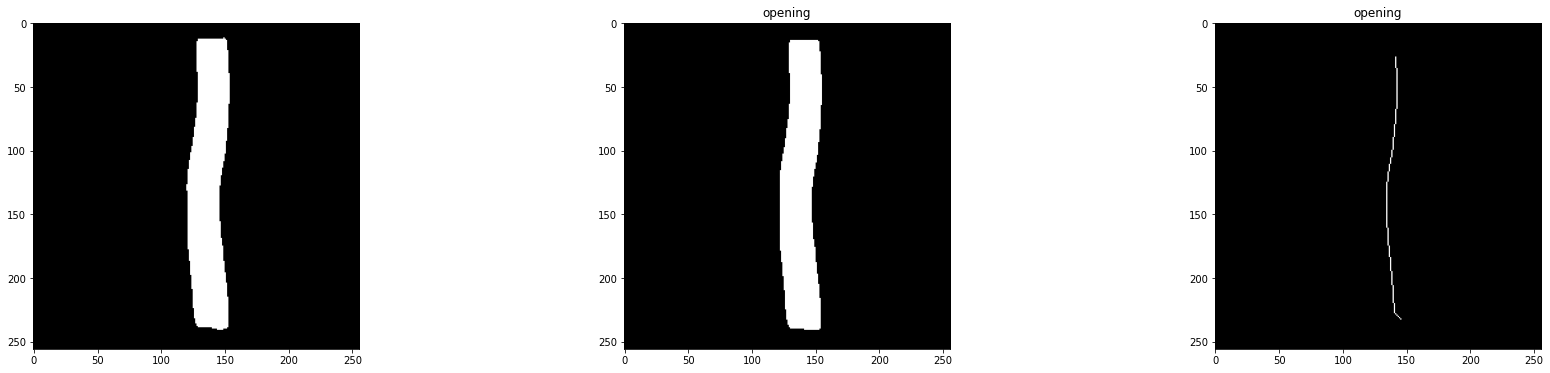

 80%|████████  | 186/232 [04:23<01:27,  1.91s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010277130300828_03-190-022.png


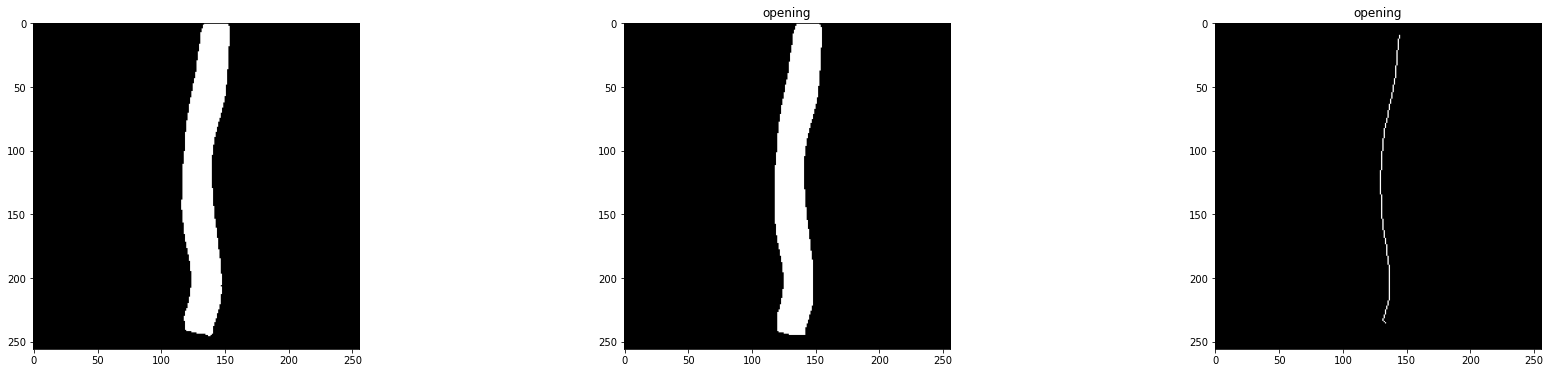

 81%|████████  | 187/232 [04:25<01:26,  1.92s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010292092848637_03-187-138.png


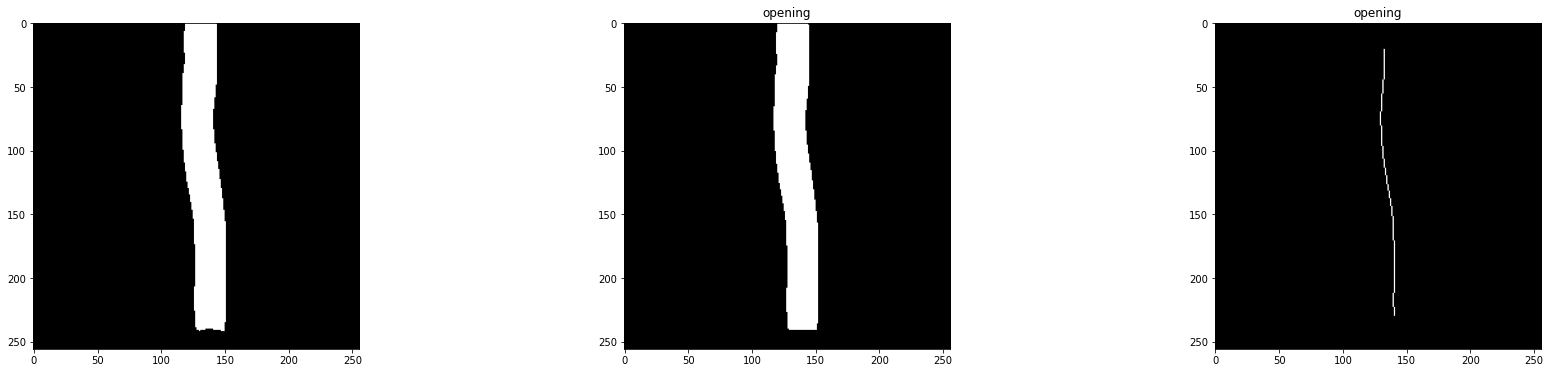

 81%|████████  | 188/232 [04:26<01:20,  1.83s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010292111248055_03-189-030.png


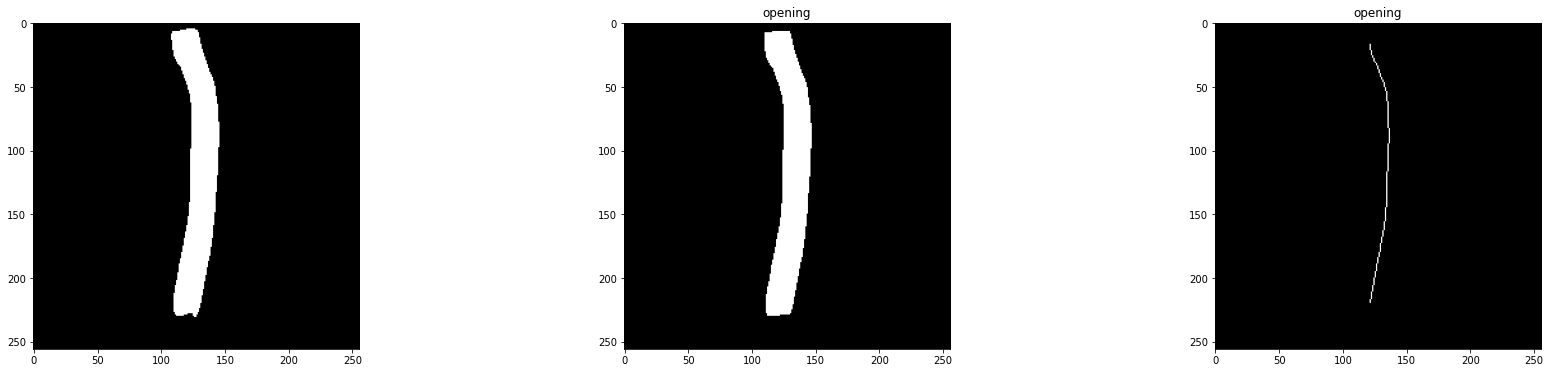

 81%|████████▏ | 189/232 [04:29<01:23,  1.94s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010292101315961_03-191-192.png


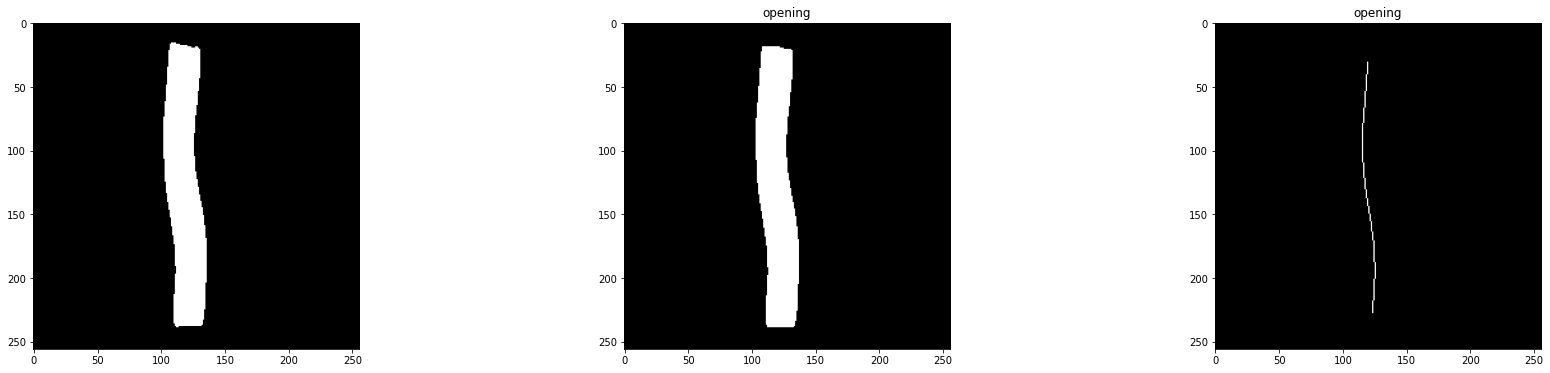

 82%|████████▏ | 190/232 [04:31<01:22,  1.97s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012904401302362010336095934018_03-199-083.png


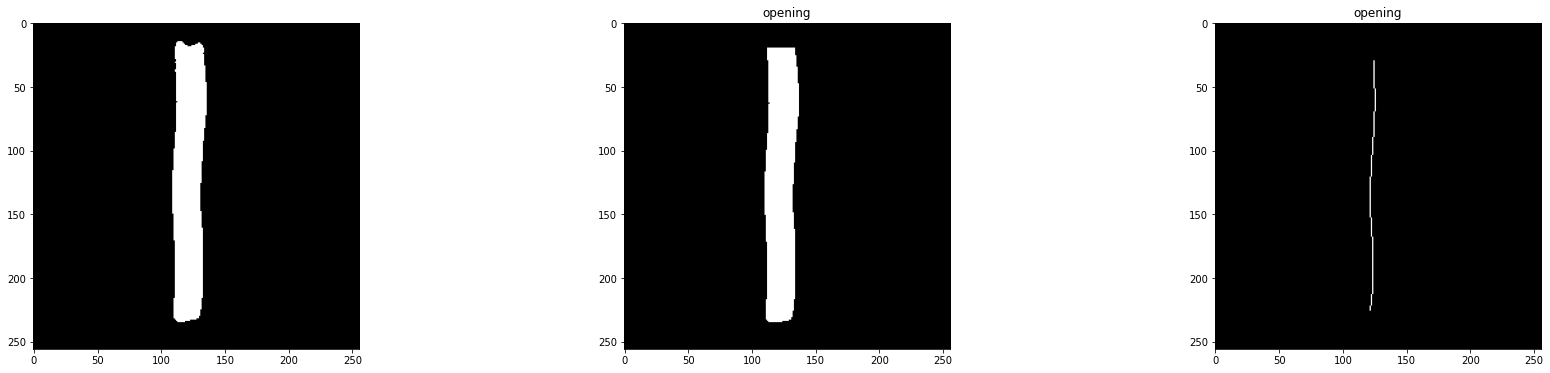

 82%|████████▏ | 191/232 [04:33<01:19,  1.95s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012922382741642011011162756546_00-128-080.png


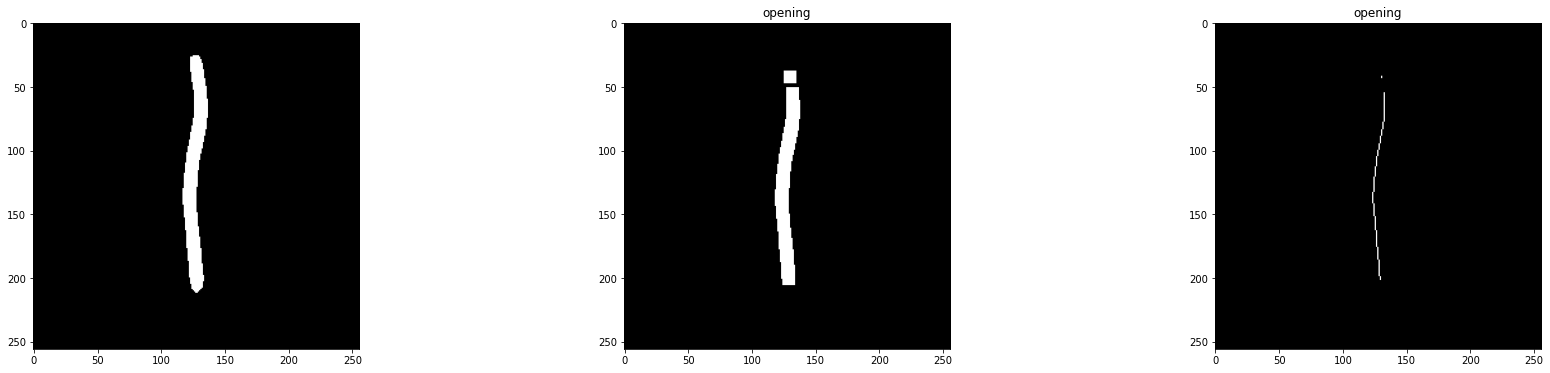

 83%|████████▎ | 192/232 [04:35<01:28,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012819207061112010298103107685_03-191-076.png


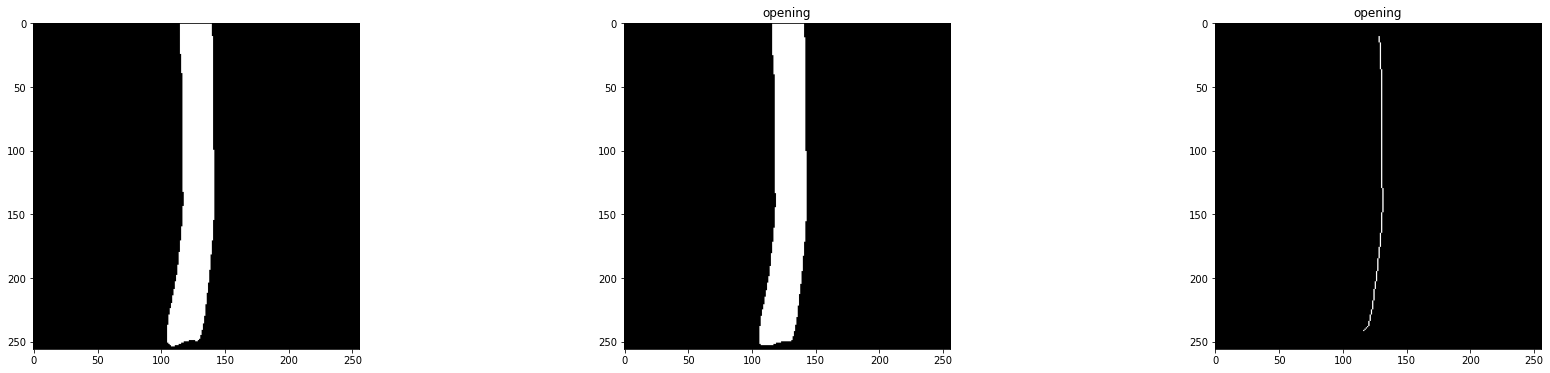

 83%|████████▎ | 193/232 [04:38<01:29,  2.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011027092632379_00-120-067.png


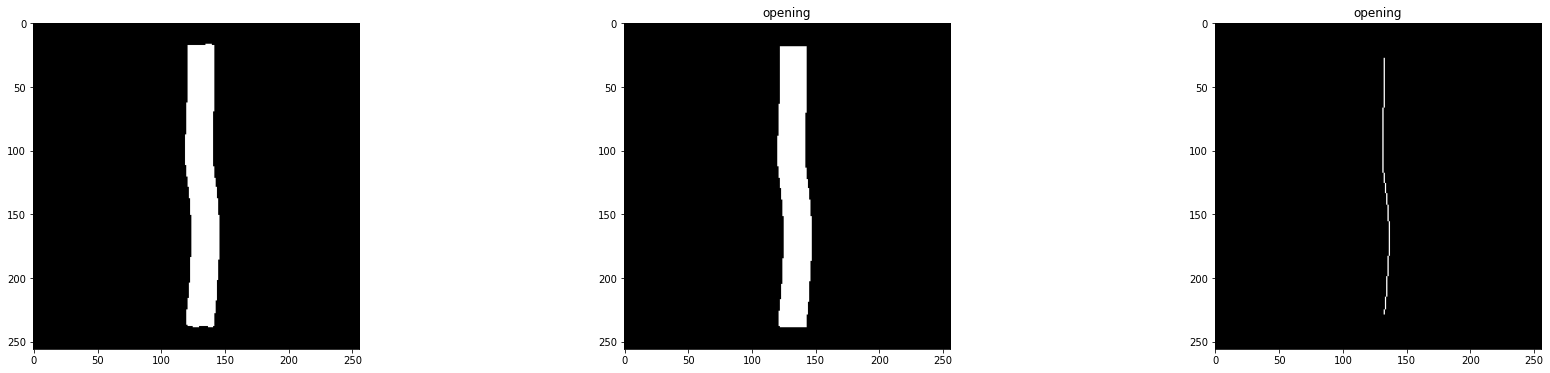

 84%|████████▎ | 194/232 [04:40<01:21,  2.15s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011027122036210_00-119-172.png


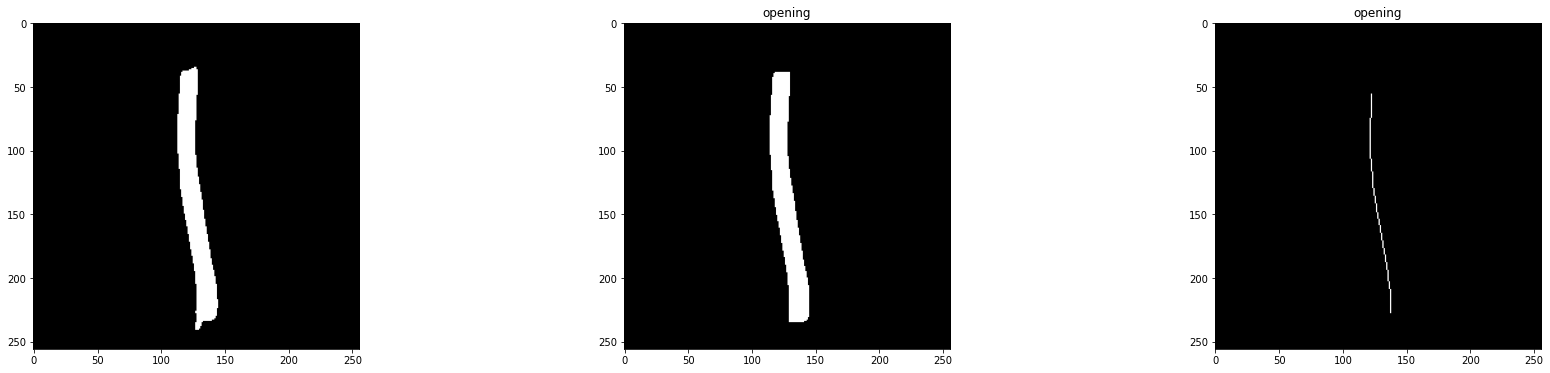

 84%|████████▍ | 195/232 [04:42<01:22,  2.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012959786098432011028083151762_00-127-136.png


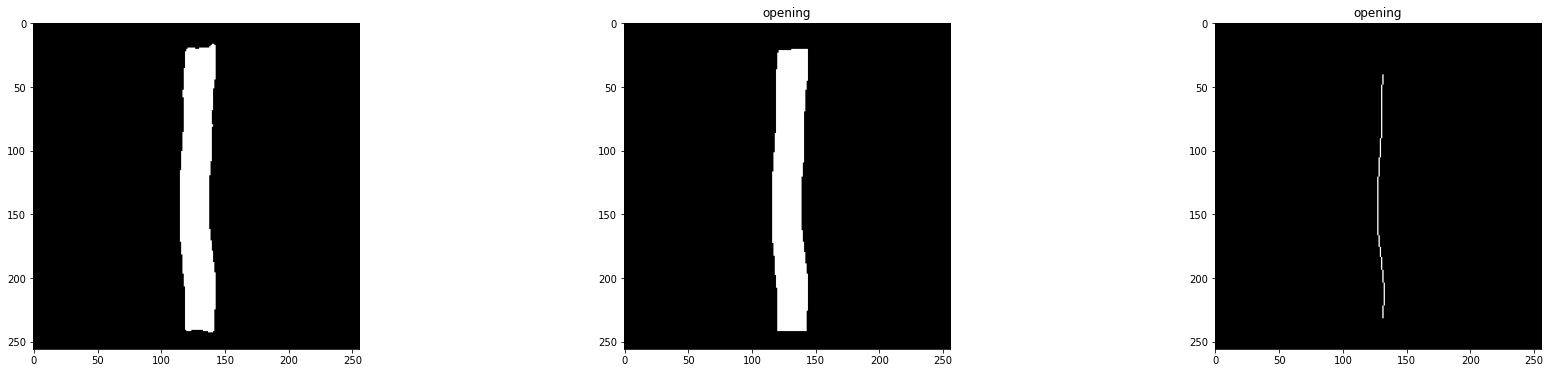

 84%|████████▍ | 196/232 [04:44<01:19,  2.20s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989052802852011059124317617_00-159-121.png


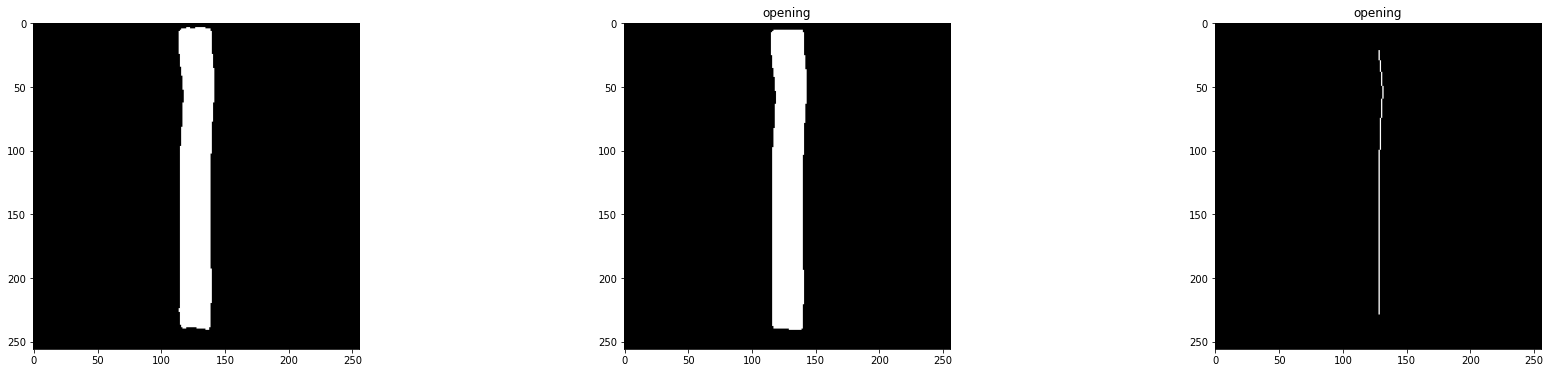

 85%|████████▍ | 197/232 [04:47<01:19,  2.27s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989052802852011060134542529_00-162-179.png


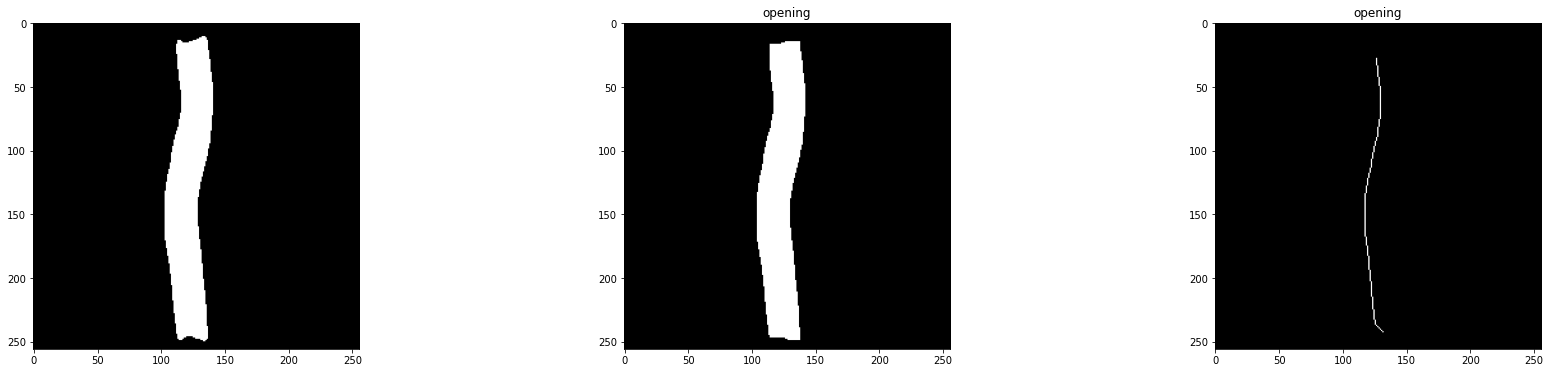

 85%|████████▌ | 198/232 [04:49<01:15,  2.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989052802852011059125215579_00-159-062.png


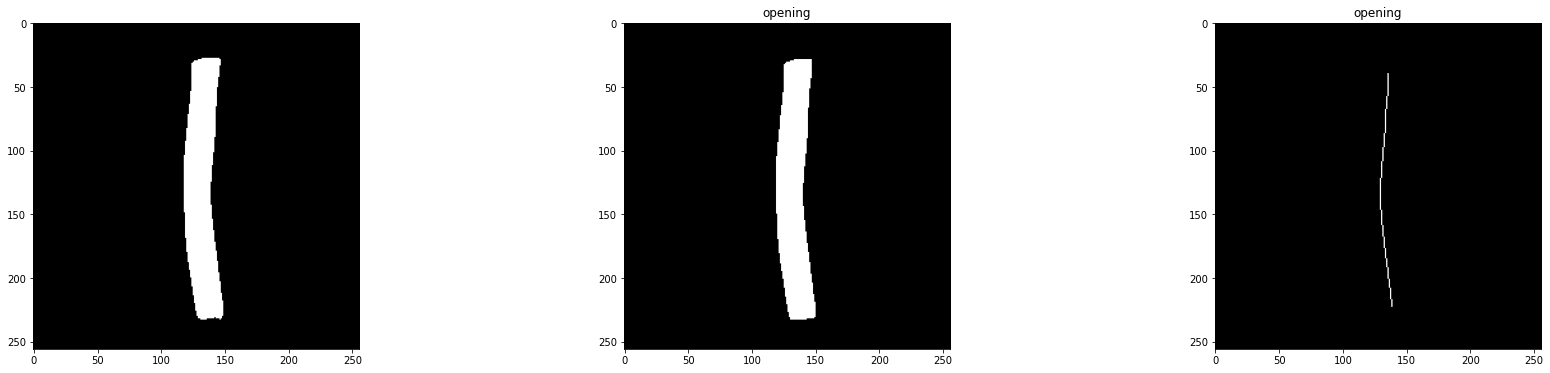

 86%|████████▌ | 199/232 [04:51<01:11,  2.17s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011068124525437_00-161-003.png


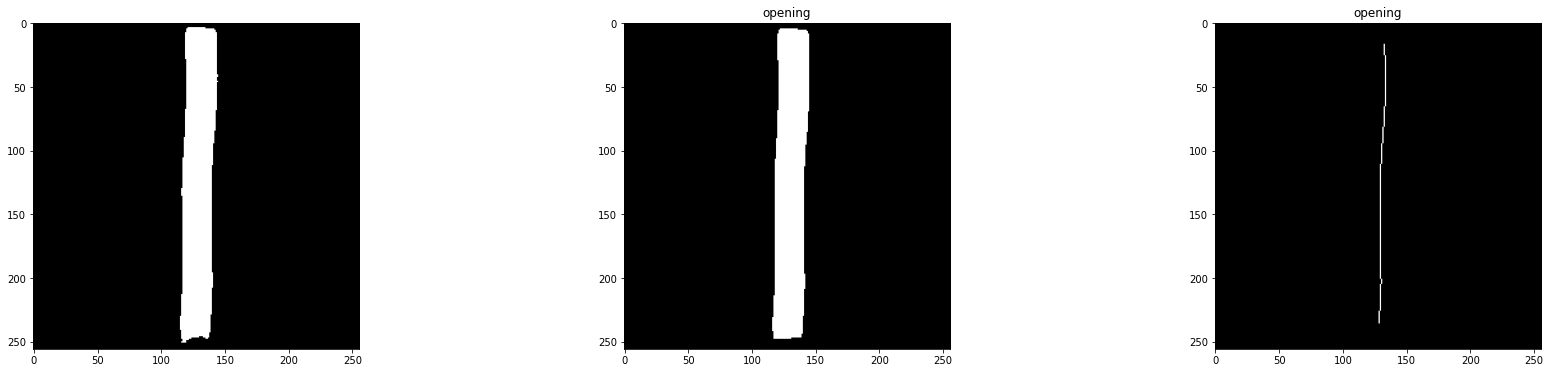

 86%|████████▌ | 200/232 [04:53<01:06,  2.08s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011073092647553_00-161-159.png


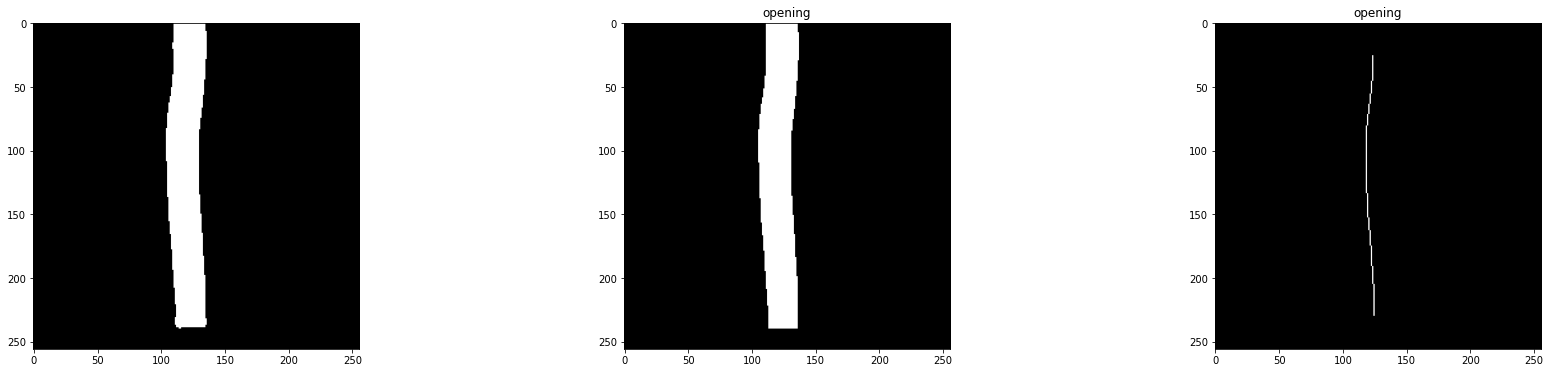

 87%|████████▋ | 201/232 [04:54<00:59,  1.92s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011083104614864_00-169-063.png


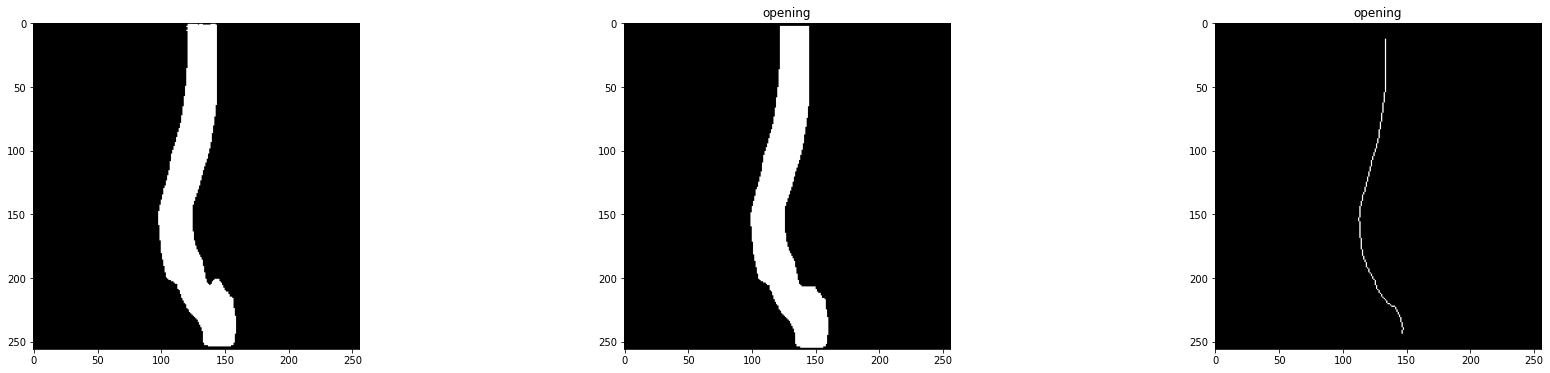

 87%|████████▋ | 202/232 [04:56<00:56,  1.90s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011102131841749_00-191-109.png


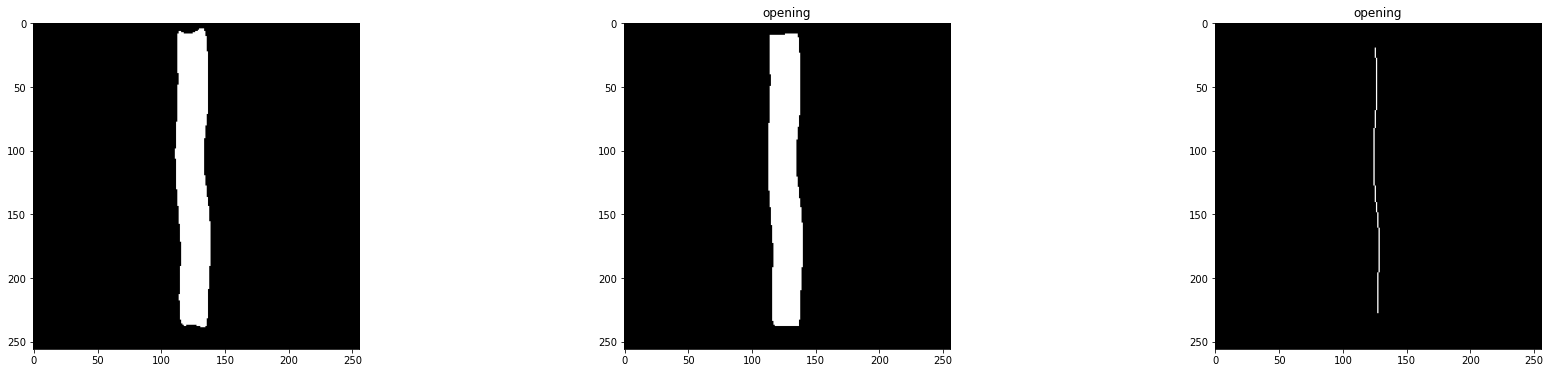

 88%|████████▊ | 203/232 [04:58<00:54,  1.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011103170825898_00-186-076.png


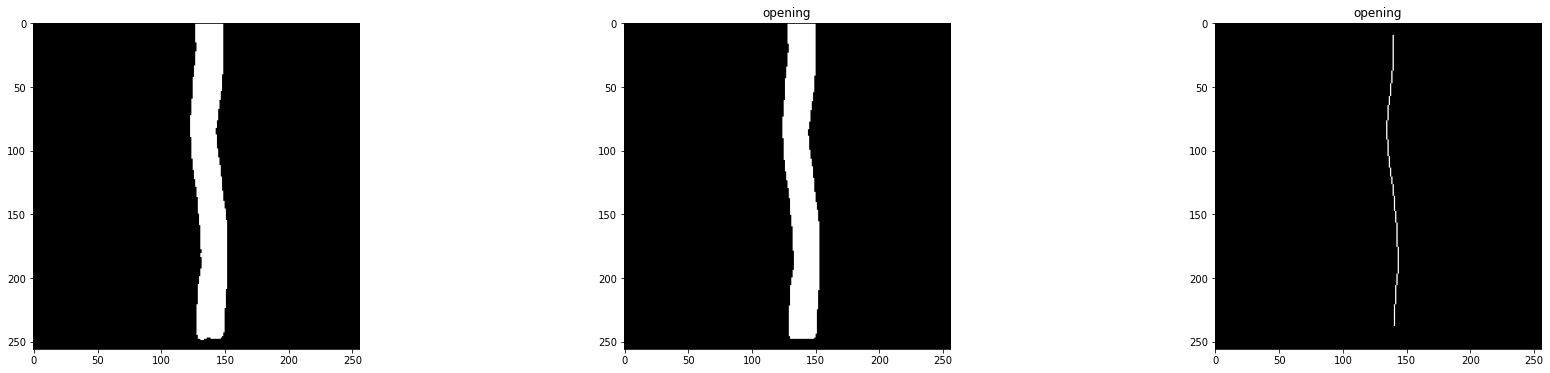

 88%|████████▊ | 204/232 [05:00<00:54,  1.96s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011102101223186_00-186-048.png


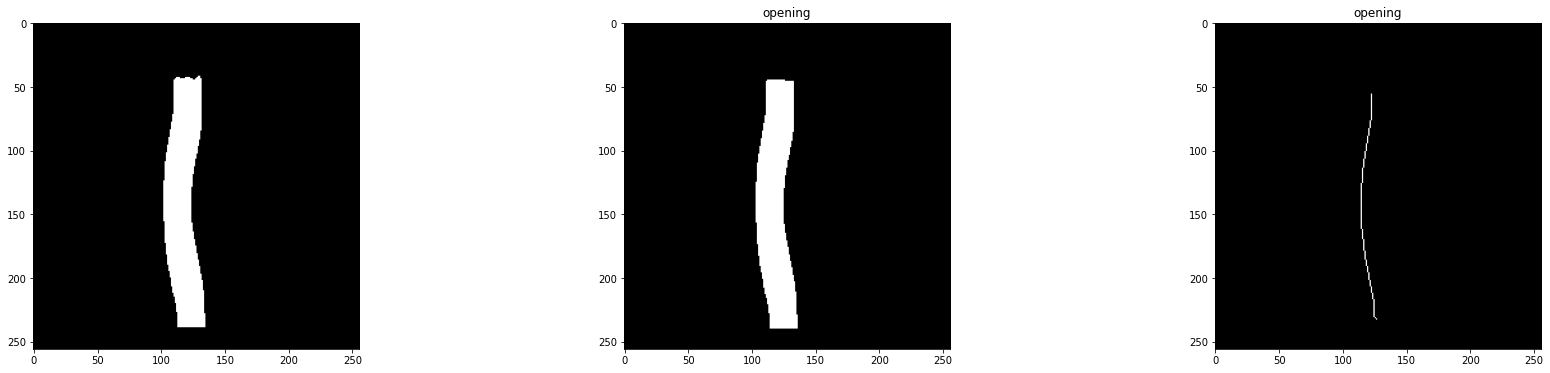

 88%|████████▊ | 205/232 [05:02<00:53,  1.97s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011108133524276_00-156-167.png


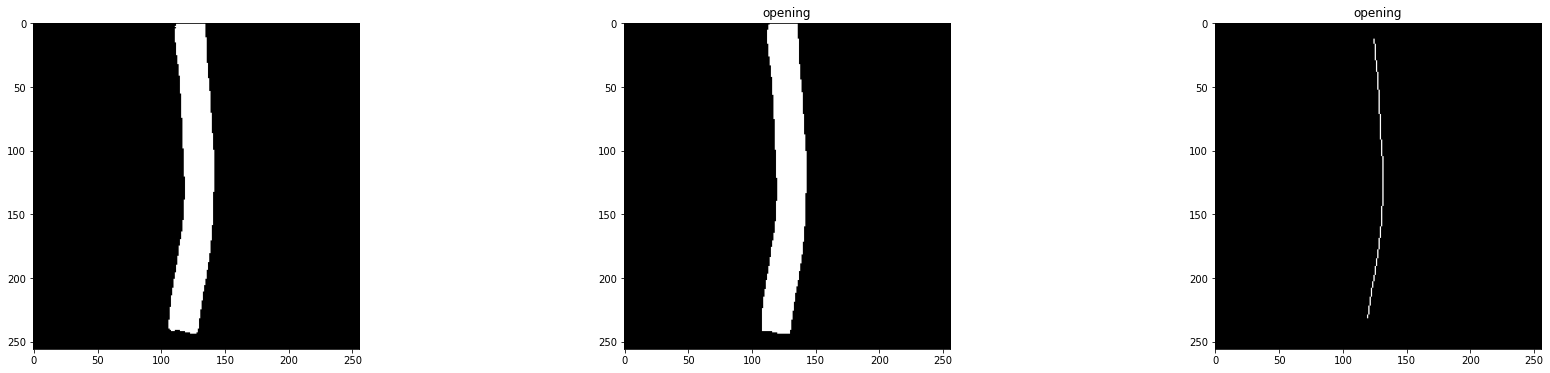

 89%|████████▉ | 206/232 [05:05<00:54,  2.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011133092744311_00-146-167.png


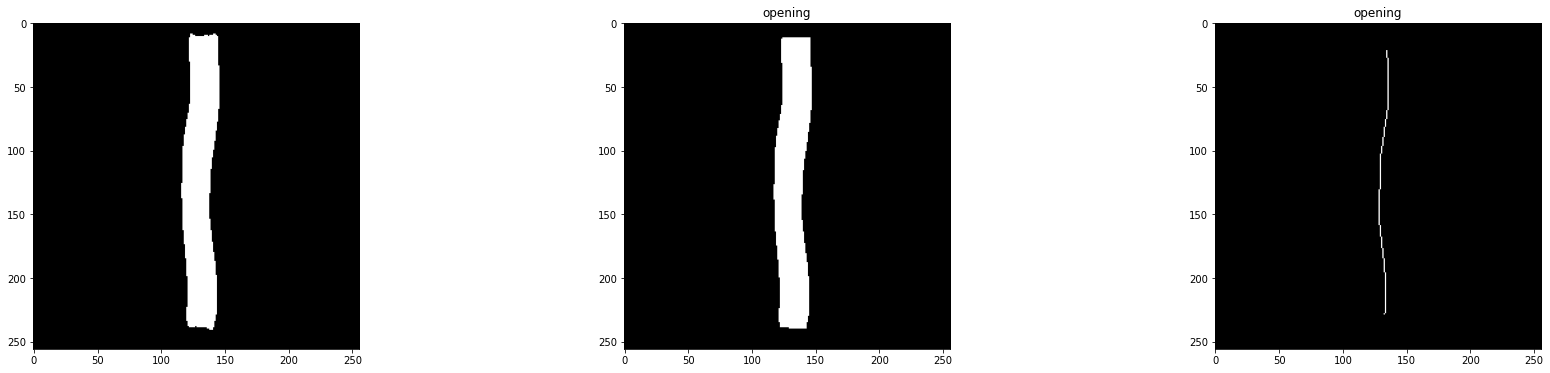

 89%|████████▉ | 207/232 [05:07<00:51,  2.06s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011138103305468_00-151-086.png


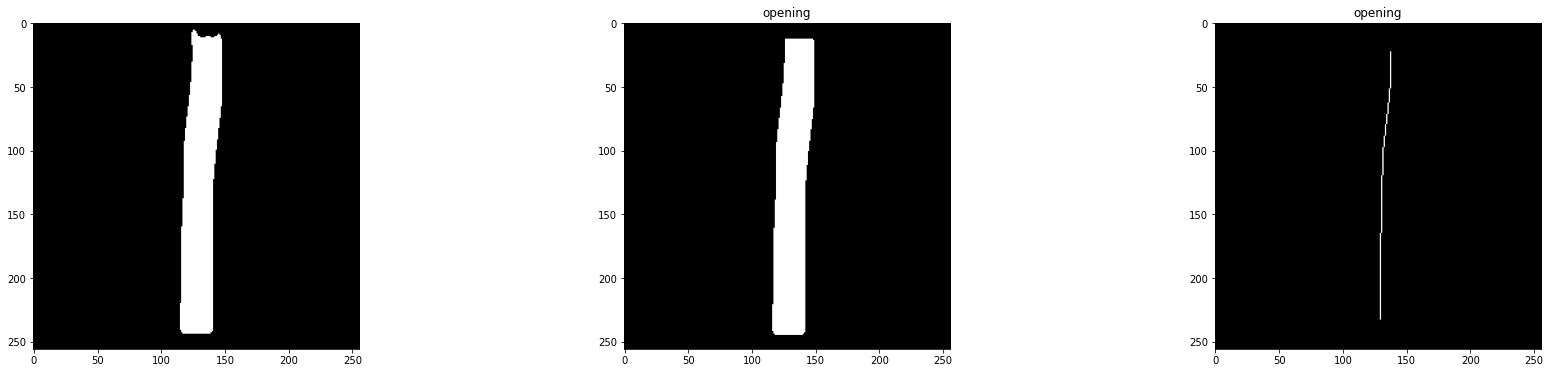

 90%|████████▉ | 208/232 [05:08<00:48,  2.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011140084232455_00-150-129.png


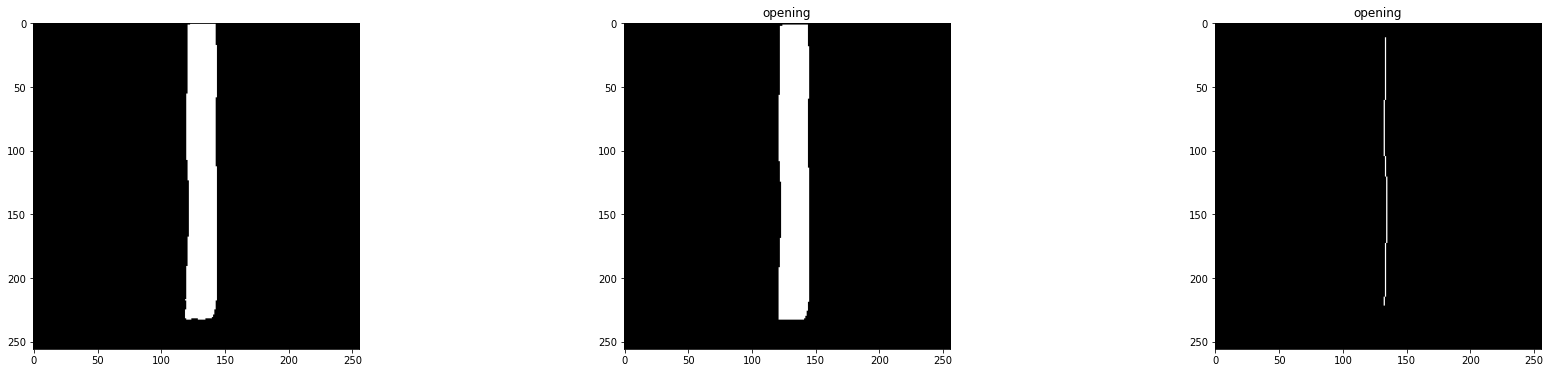

 90%|█████████ | 209/232 [05:11<00:47,  2.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011145132153697_00-150-018.png


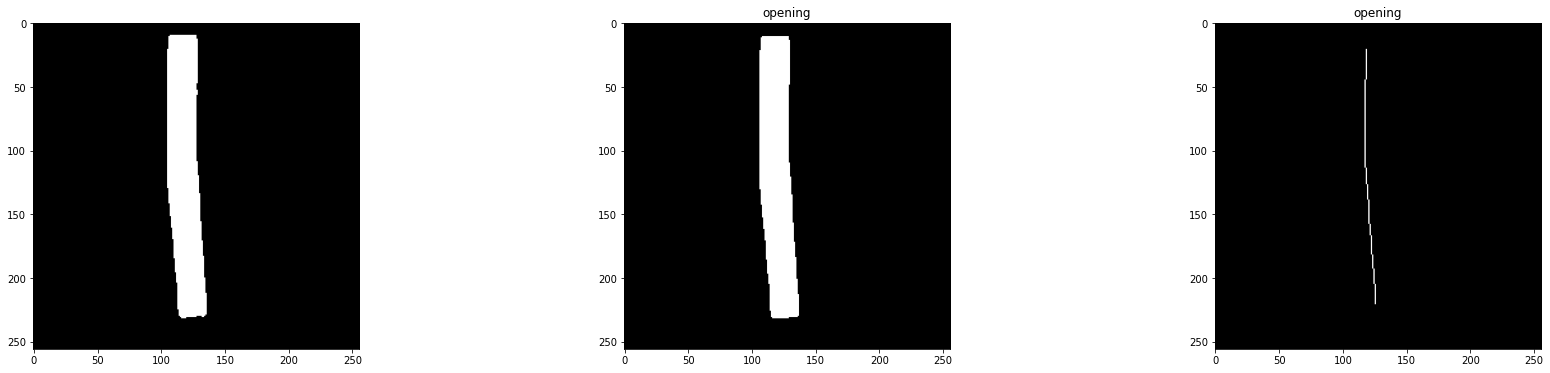

 91%|█████████ | 210/232 [05:13<00:44,  2.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011147145158534_00-157-002.png


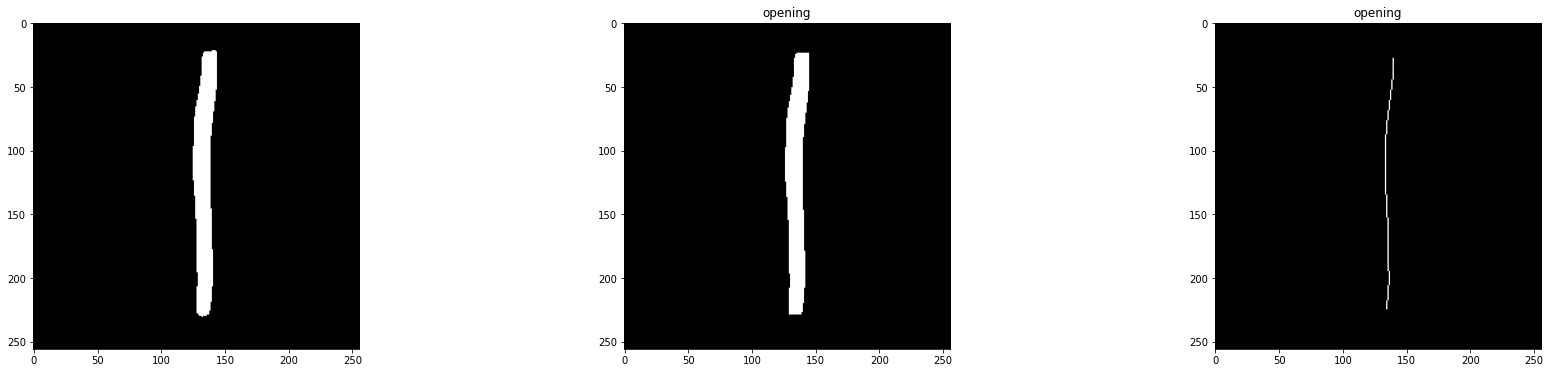

 91%|█████████ | 211/232 [05:15<00:45,  2.18s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011150113507481_00-149-152.png


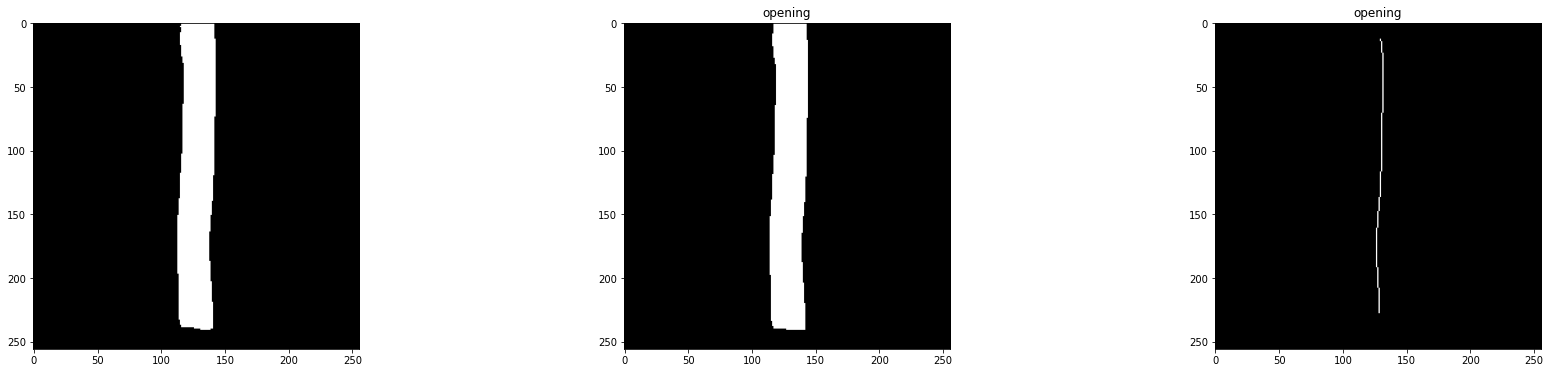

 91%|█████████▏| 212/232 [05:17<00:39,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964012989926673512011151101031992_00-157-018.png


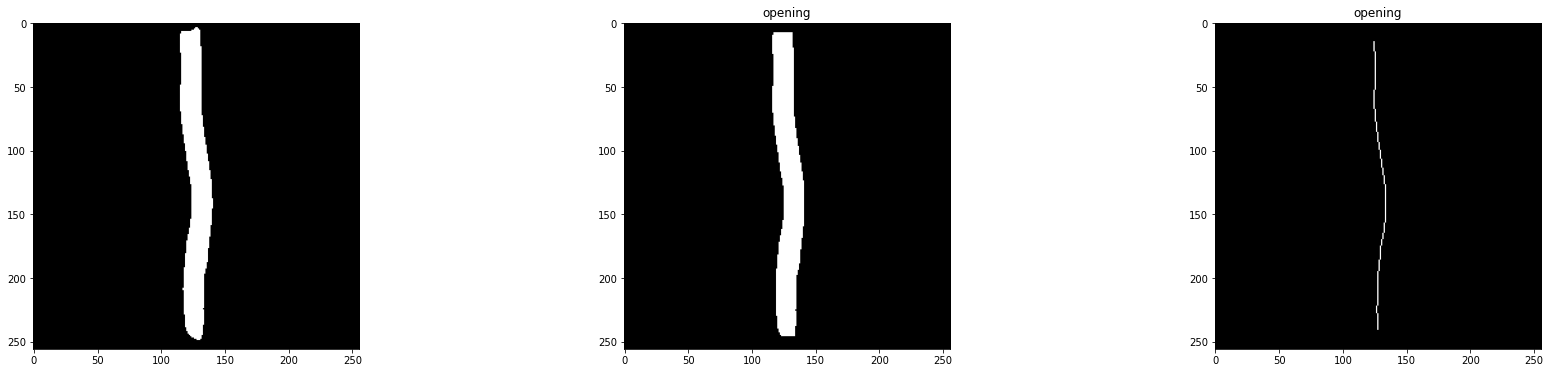

 92%|█████████▏| 213/232 [05:19<00:41,  2.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011193134340454_00-144-184.png


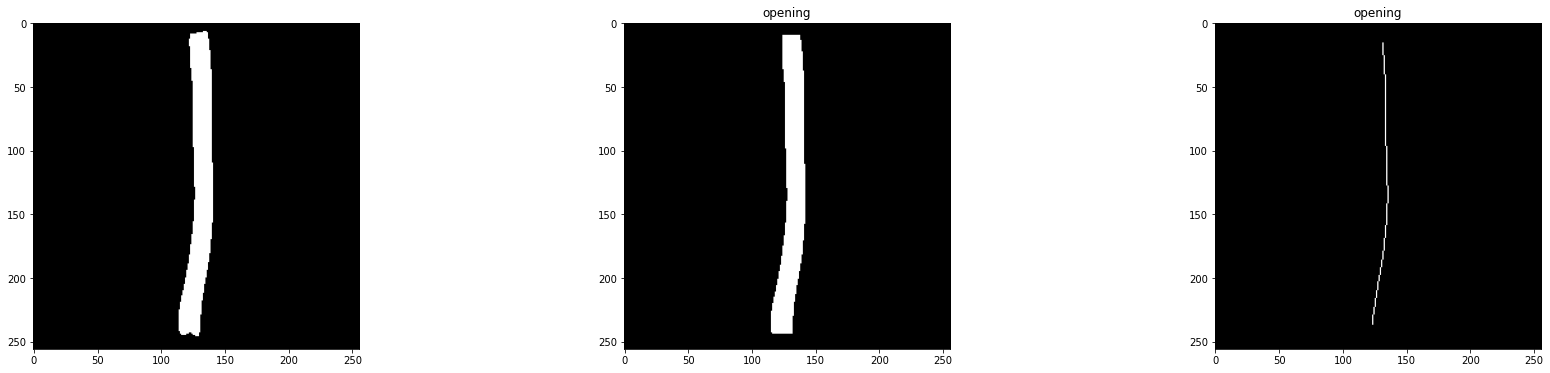

 92%|█████████▏| 214/232 [05:22<00:41,  2.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011195125123007_00-141-167.png


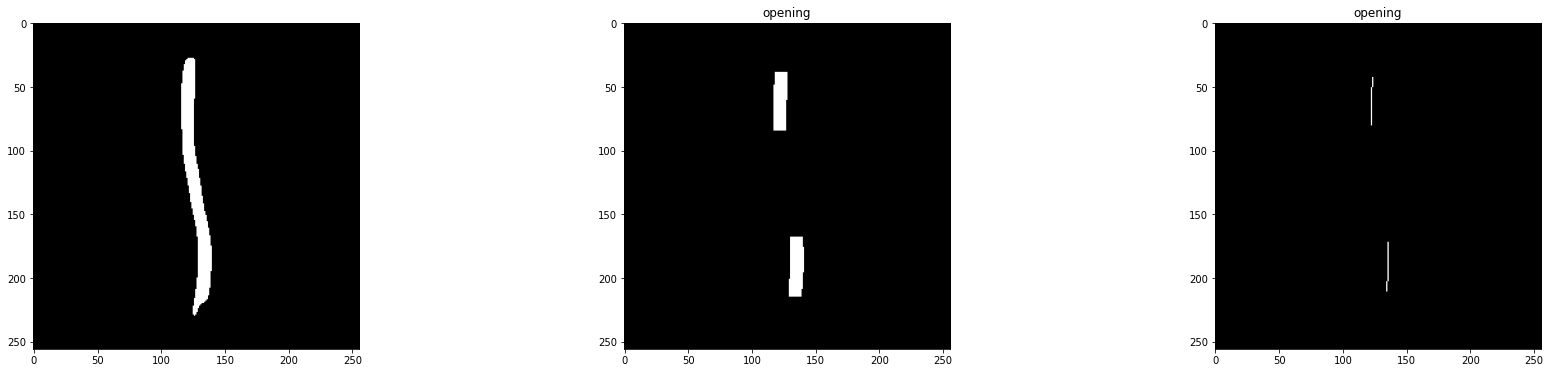

 93%|█████████▎| 215/232 [05:25<00:40,  2.40s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011194121010827_00-141-183.png


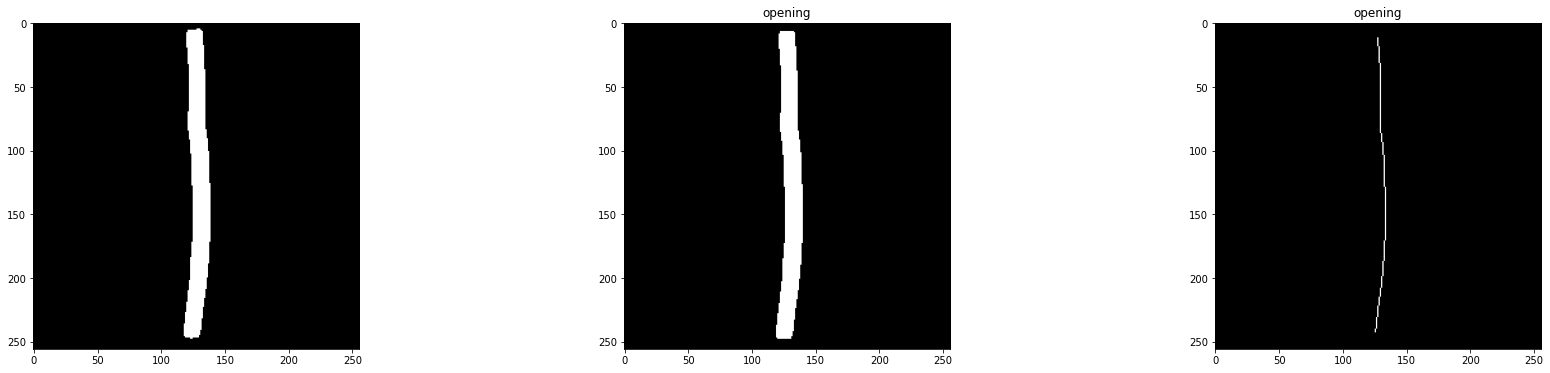

 93%|█████████▎| 216/232 [05:27<00:38,  2.44s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011194175600178_00-142-185.png


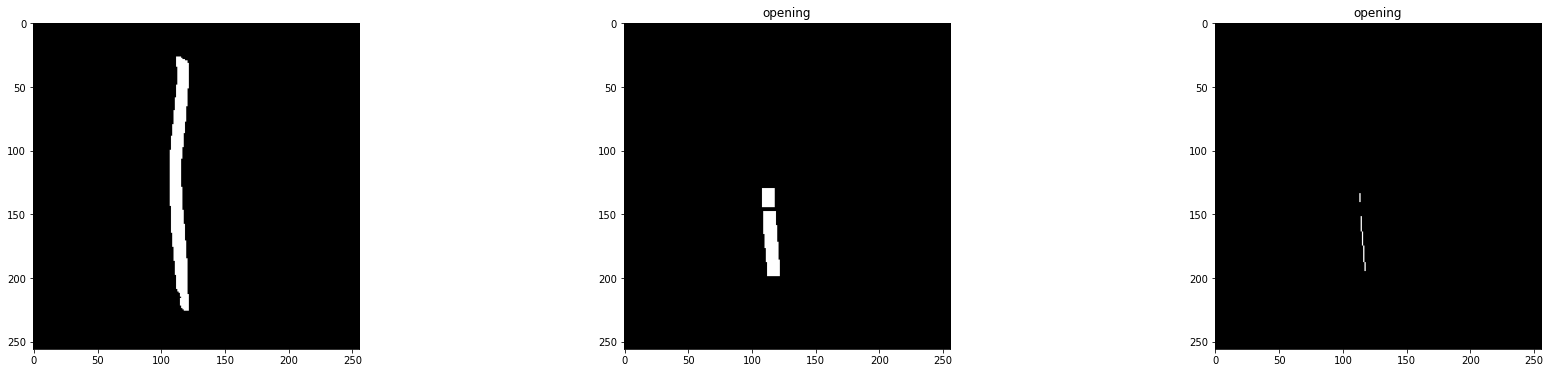

 94%|█████████▎| 217/232 [05:30<00:38,  2.58s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011196115524737_00-141-019.png


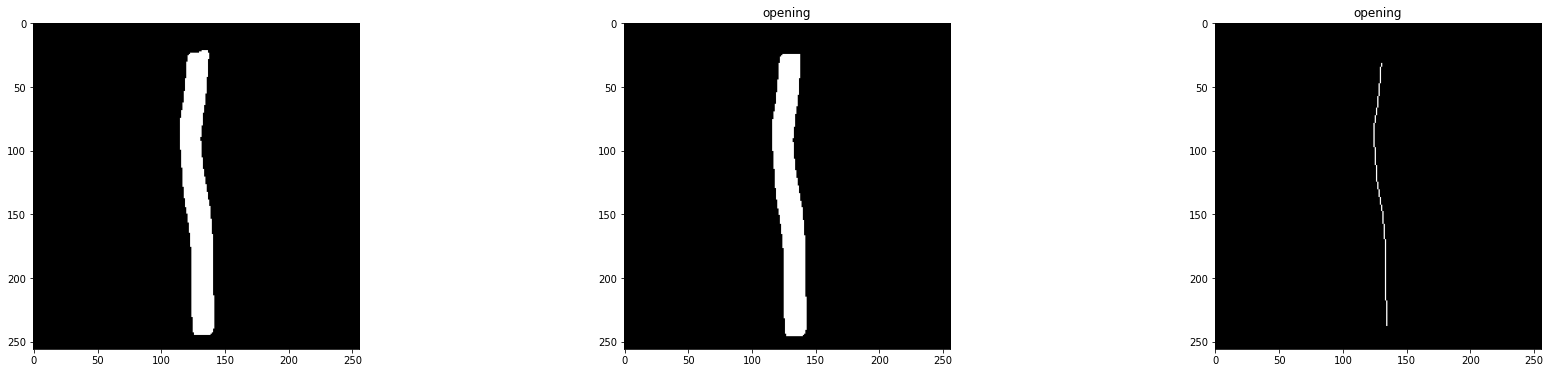

 94%|█████████▍| 218/232 [05:33<00:36,  2.60s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011255110527635_00-134-196.png


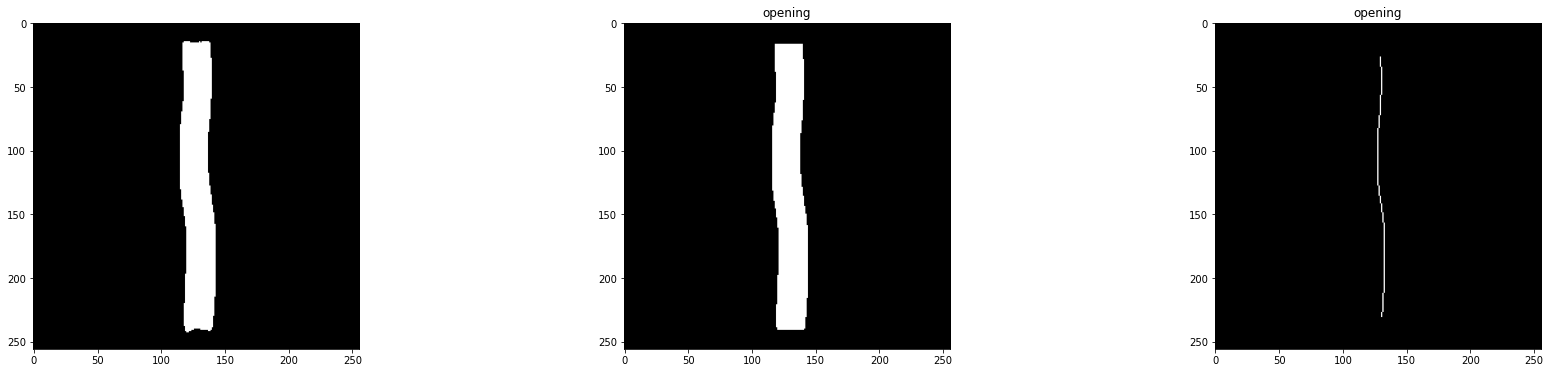

 94%|█████████▍| 219/232 [05:35<00:32,  2.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011250141543062_00-138-158.png


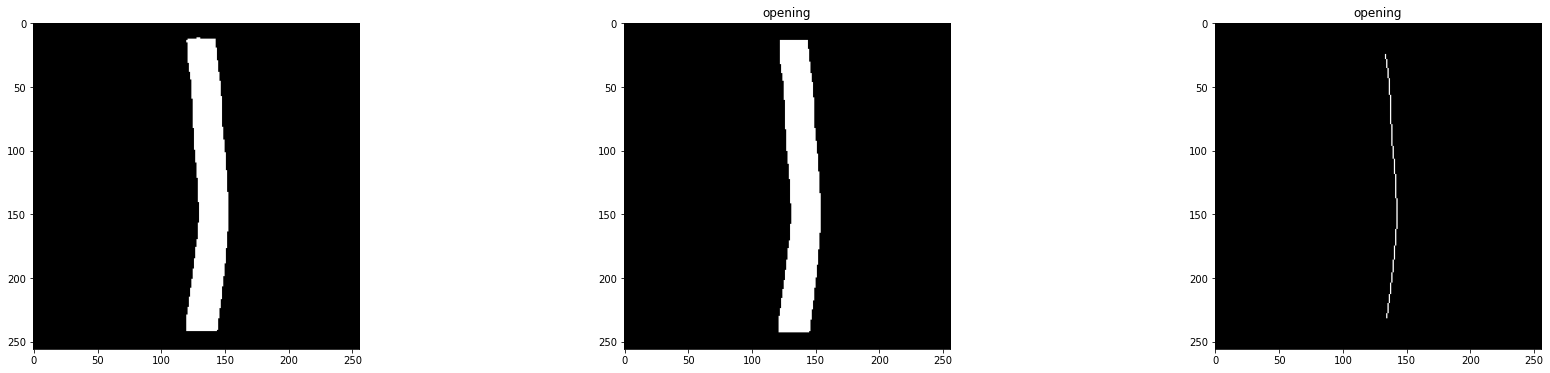

 95%|█████████▍| 220/232 [05:37<00:28,  2.36s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011255112642542_00-138-019.png


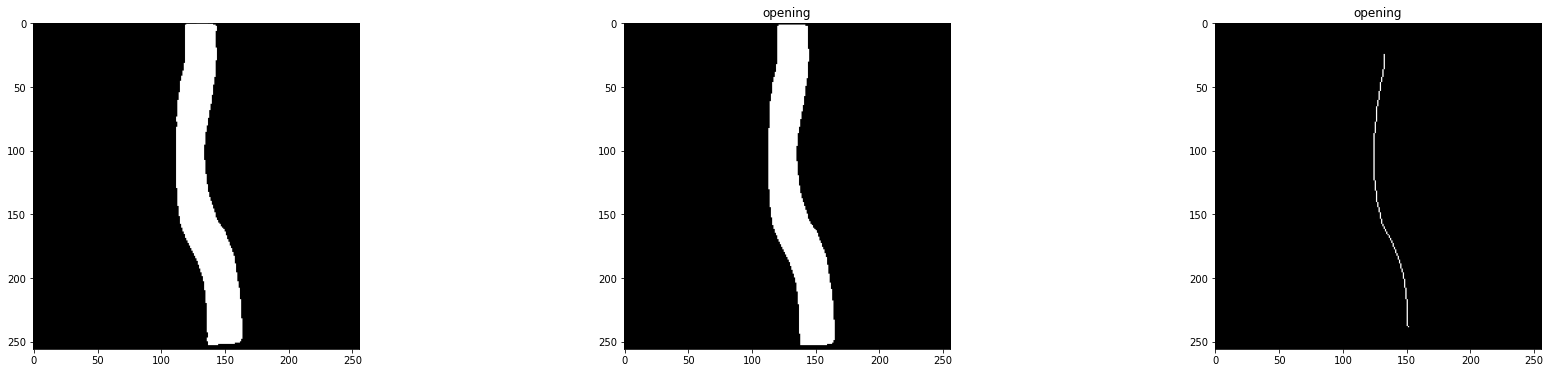

 95%|█████████▌| 221/232 [05:39<00:24,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011264130634801_00-139-022.png


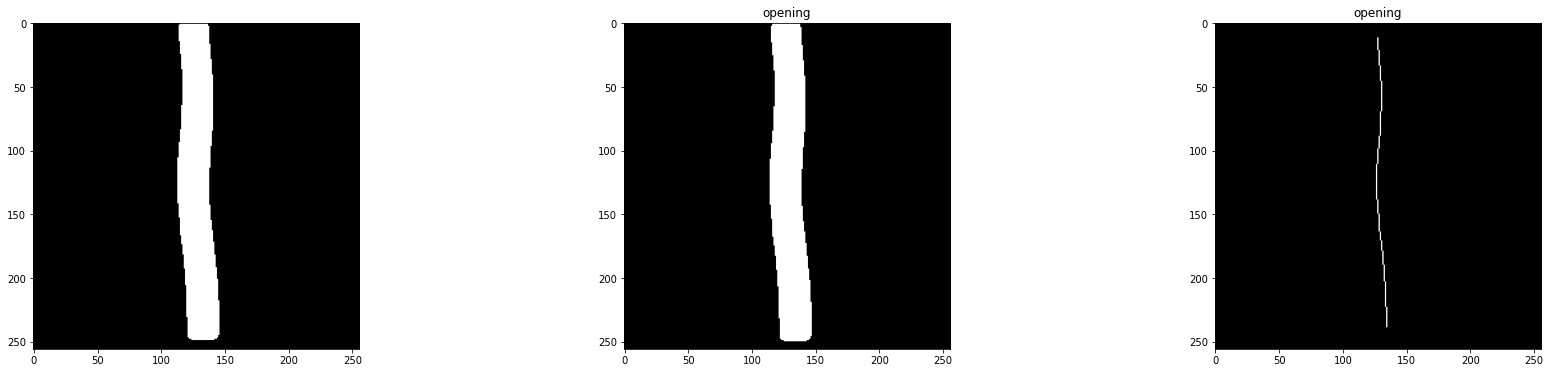

 96%|█████████▌| 222/232 [05:41<00:22,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011292131012523_01-003-030.png


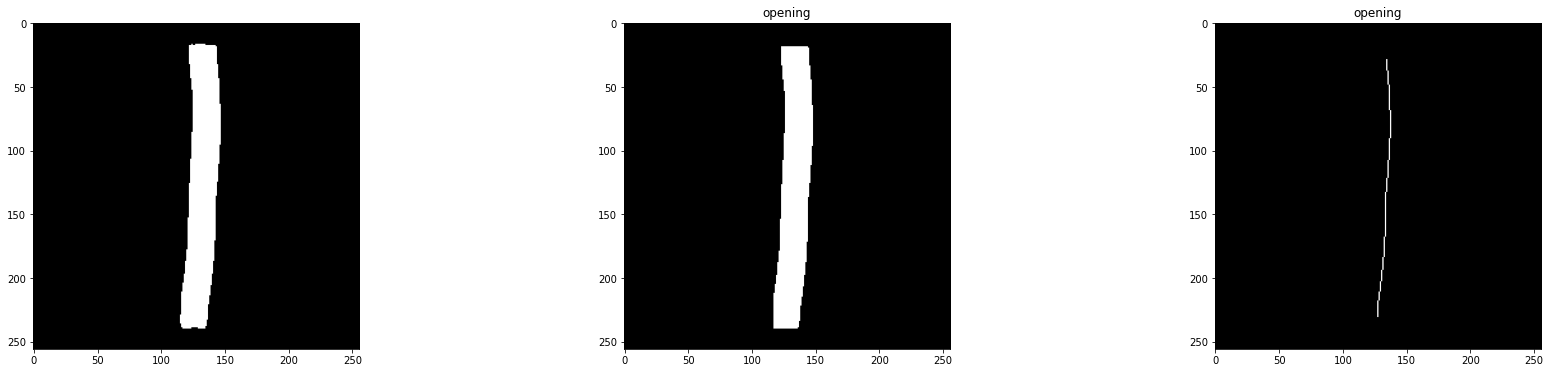

 96%|█████████▌| 223/232 [05:43<00:19,  2.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011265140654355_00-138-010.png


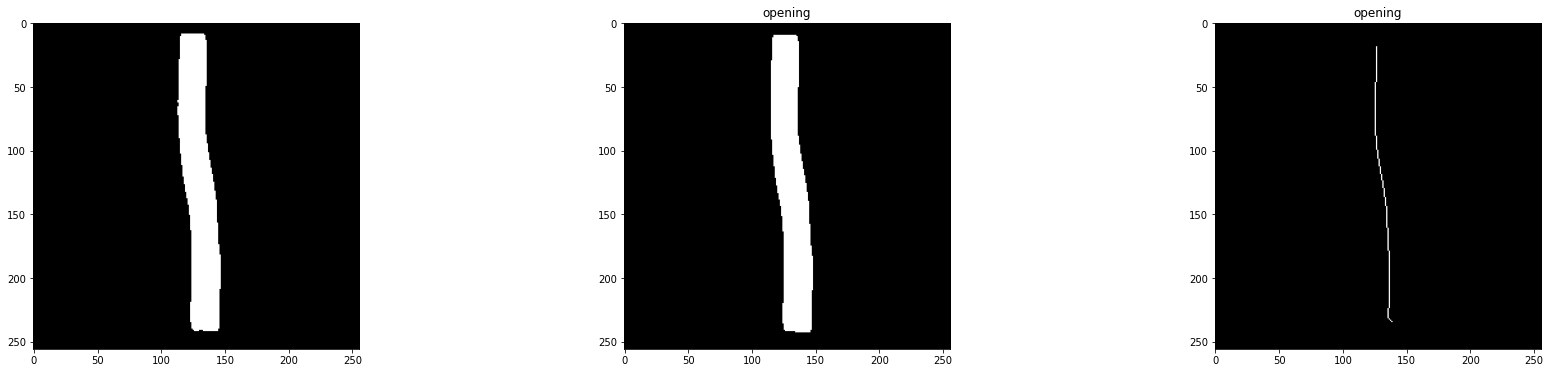

 97%|█████████▋| 224/232 [05:45<00:16,  2.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011298141312122_00-192-085.png


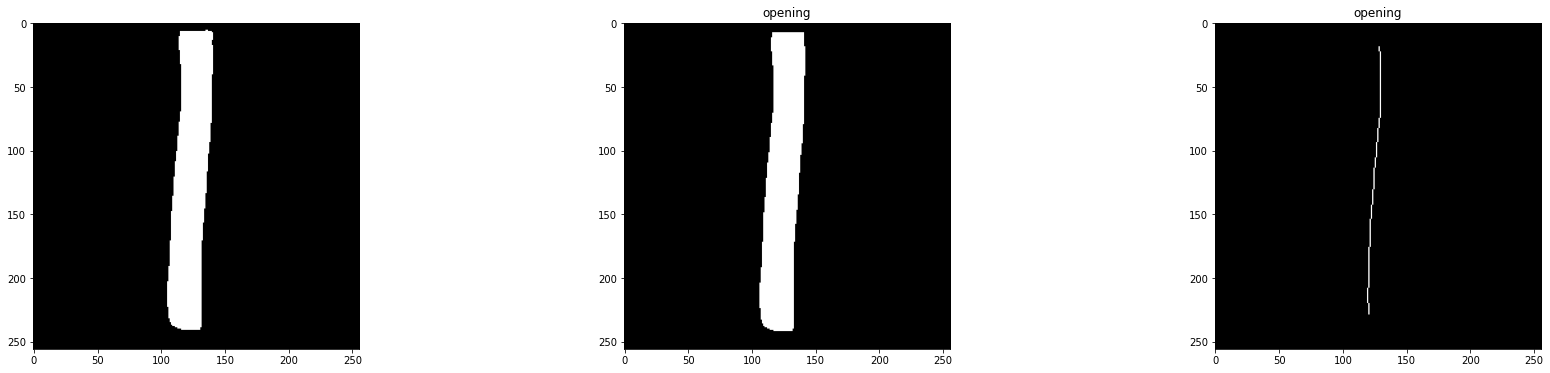

 97%|█████████▋| 225/232 [05:47<00:13,  1.96s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013076187734852011299131523765_00-199-173.png


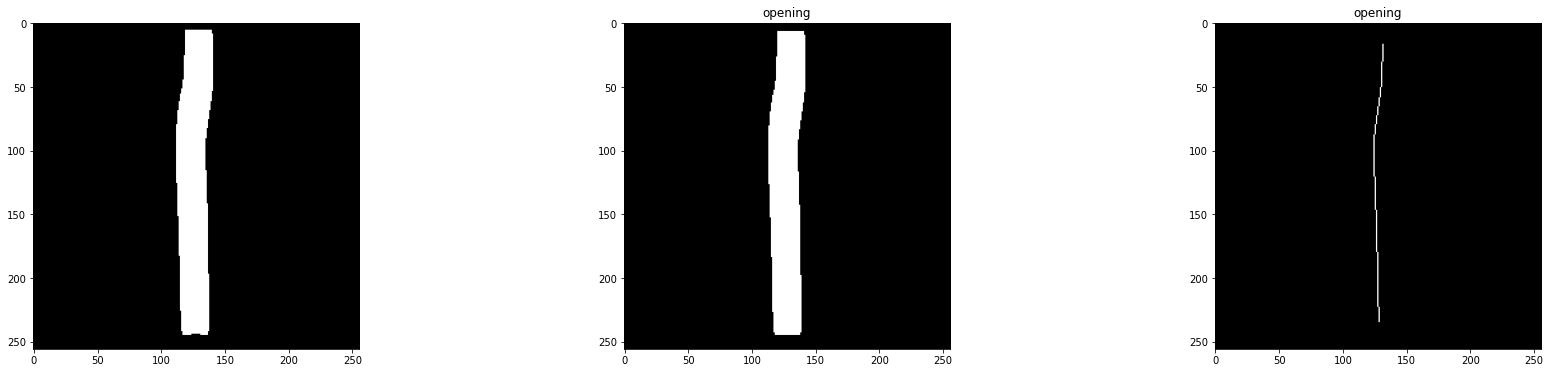

 97%|█████████▋| 226/232 [05:49<00:11,  1.98s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013200840352202011311121650376_01-023-181.png


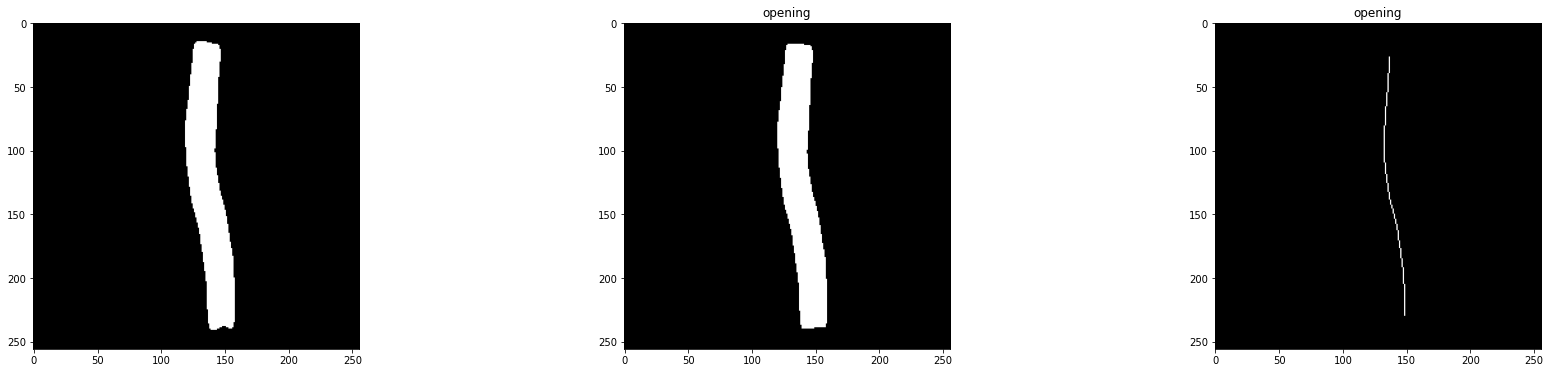

 98%|█████████▊| 227/232 [05:51<00:09,  1.94s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013200840352202011315123542637_01-032-021.png


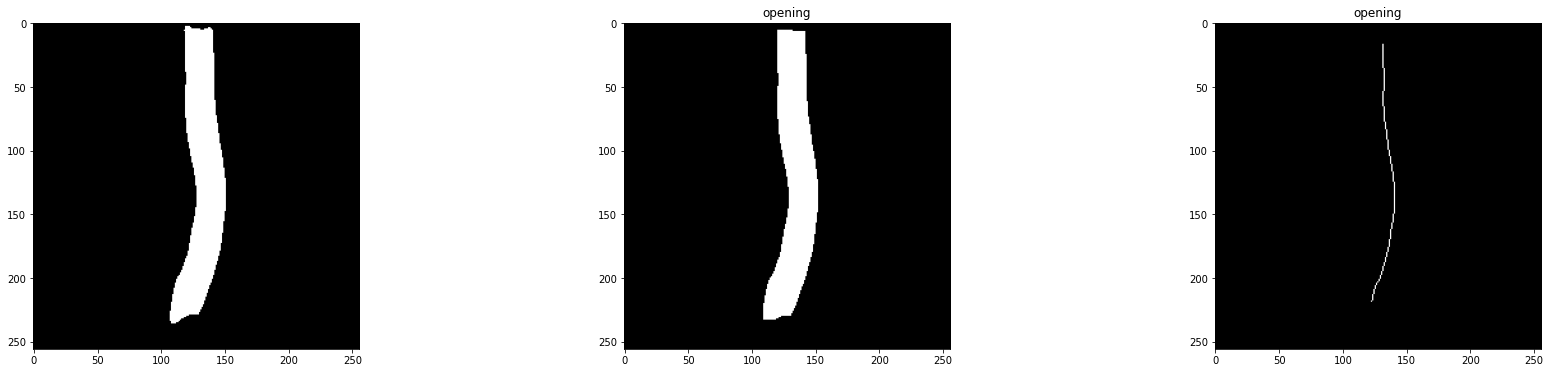

 98%|█████████▊| 228/232 [05:53<00:07,  2.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013200840352202011315130758840_01-032-104.png


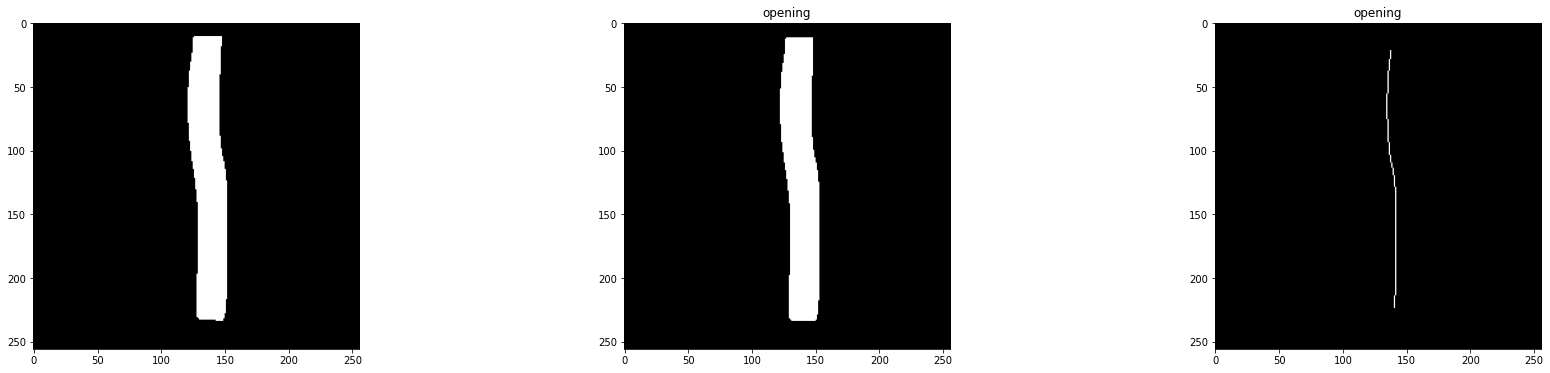

 99%|█████████▊| 229/232 [05:55<00:05,  1.96s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013200840352202011315133835533_01-032-101.png


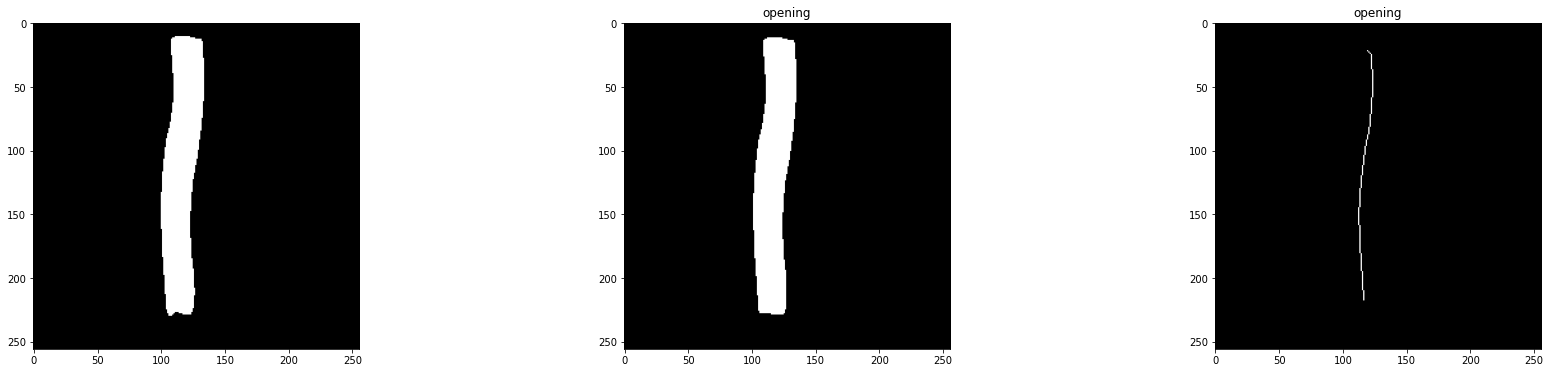

 99%|█████████▉| 230/232 [05:56<00:03,  1.93s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013217898866992011332081257301_01-031-129.png


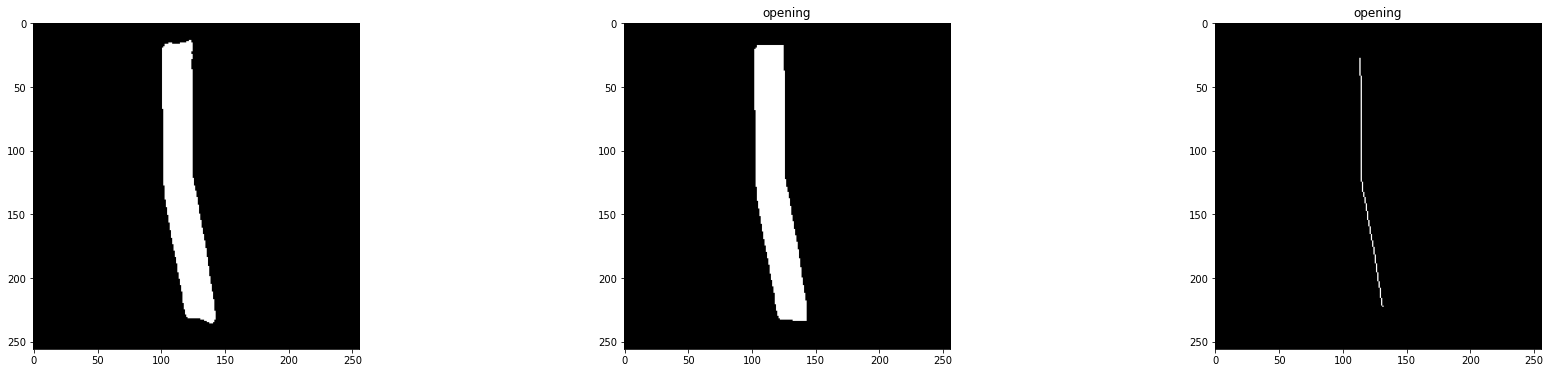

100%|█████████▉| 231/232 [05:58<00:01,  1.84s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./result/PadChest/mask/216840111366964013217898866992011332172931297_01-031-190.png


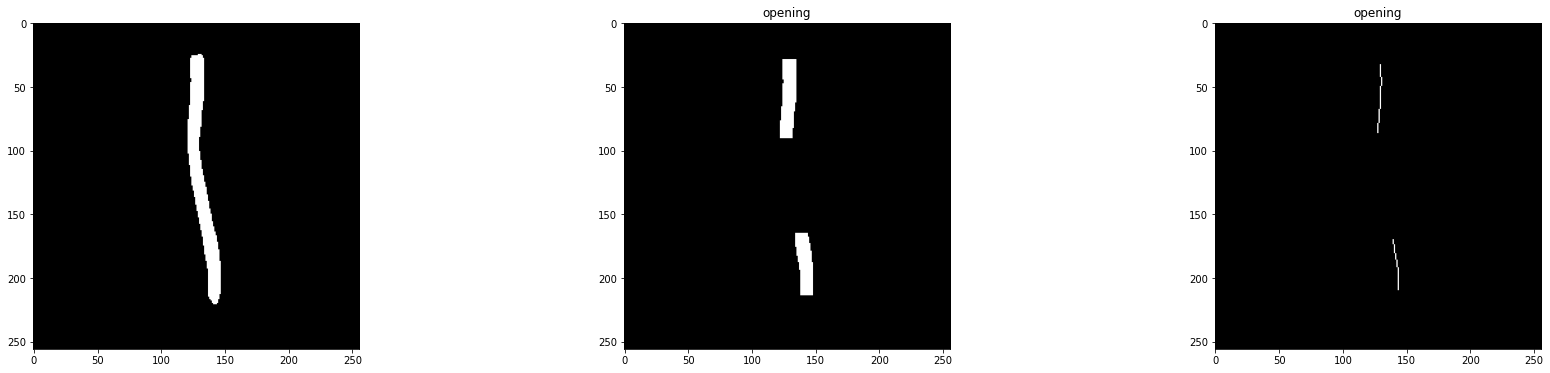

100%|██████████| 232/232 [06:00<00:00,  1.56s/it]


In [12]:
count = 1
for data in tqdm(dataset):
  # if count < 165:
  #   count = count +1
  #   continue
  file_name = data['name']
  image = cv.imread(data['image_path'])
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

  label = cv.imread(data['label_path'])
  label = cv.cvtColor(label, cv.COLOR_BGR2GRAY) 

  predicted_mask = cv.imread(data['predict_path']).astype(np.float32)
  print(data['predict_path'])
  # predicted_mask = cv.cvtColor(predicted_mask, cv.COLOR_BGR2GRAY) 
  
  # # Opening Image
  # result_opening = opening_image(predicted_mask)  
  # result_opening = cv.cvtColor(np.float32(result_opening), cv.COLOR_GRAY2RGB)
  kernel = np.ones((10, 10), np.uint8)
  result_opening_50 = cv.morphologyEx(predicted_mask, cv.MORPH_OPEN, kernel)

  # Skeletonizing Image
  result_skeletonizing_50 = skeletonize((result_opening_50/255))
  result_skeletonizing_50 = cv.cvtColor(result_skeletonizing_50, cv.COLOR_BGR2GRAY) 

  plt.figure(figsize=(30, 6))  
  plt.subplot(131)
  plt.imshow(predicted_mask, cmap='gray')
  plt.title('')

  plt.subplot(132)
  plt.imshow(result_opening_50, cmap='gray')
  plt.title('opening')

  plt.subplot(133)
  plt.imshow(result_skeletonizing_50, cmap='gray')
  plt.title('opening')

  plt.show()



In [ ]:


  # plt.figure(figsize=(21, 7))  
  # plt.subplot(131)
  # plt.imshow(predicted_mask, cmap='gray')
  # plt.title('')

  # plt.subplot(132)
  # plt.imshow((result_opening * 255).astype(np.uint8), cmap='gray')
  # plt.title('opening')

  # plt.subplot(133)
  # plt.imshow(result_skeletonizing, cmap='gray')
  # plt.title('skeletonizing')

  # plt.show()

  # plt.figure(figsize=(28, 7))  
  # plt.subplot(141)
  # plt.imshow(image, cmap='gray')
  # plt.title('')

  # plt.subplot(142)
  # plt.imshow(label, cmap='gray')
  # plt.title('label(ground truth)')

  # plt.subplot(143)
  # plt.imshow(result_opening, cmap='gray')
  # plt.title('opening_result')

  # plt.subplot(144)
  # plt.imshow(result_skeletonizing*255, cmap='gray')
  # plt.title('predicted line')
  
  # # plt.show()
  # plt.tight_layout()
  # plt.savefig(os.path.join(result_dir, f'{file_name}'), pad_inches=0.1)
  # plt.close()

# Save to Training_data/Erosion

In [ ]:
result_dir = './Training_Data/erosion'

In [ ]:
skeleton_list = []

for data in tqdm(dataset):
  file_name = data['name']
  image = cv.imread(data['image_path'])
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

  label = cv.imread(data['label_path'])
  label = cv.cvtColor(label, cv.COLOR_BGR2GRAY) 

  predicted_mask = cv.imread(data['predict_path']).astype(np.float32)
  predicted_mask = cv.cvtColor(predicted_mask, cv.COLOR_BGR2GRAY) 
  
  # Opening Image
  result_opening = opening_image(predicted_mask)  
  result_opening = cv.cvtColor(np.float32(result_opening), cv.COLOR_GRAY2RGB)

  # Skeletonizing Image
  result_skeletonizing = skeletonize((result_opening/255))
  result_skeletonizing = cv.cvtColor(result_skeletonizing, cv.COLOR_BGR2GRAY) 

  result_skeletonizing = result_skeletonizing*255

  skeleton_list.append(result_skeletonizing)
  # cv.imwrite(os.path.join(result_dir, f'{file_name}'), result_skeletonizing)

  0%|          | 0/232 [00:16<?, ?it/s]


KeyboardInterrupt: ignored

# line smooth하게

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

result_path = './Training_Data/erosion-origin size'

result_dir = './이승아/result/PostProcessing/Smoothing'
erosion_result = os.listdir(result_path)

In [ ]:
import scipy
import imutils
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline

def fit_curve(image):
  contours, _ = cv.findContours(image,0, cv.CHAIN_APPROX_NONE)
  arch = contours[0]
  x,y = arch[...,0].squeeze(), arch[...,1].squeeze()
  inds = y.argsort()
  y=y[inds]
  x=x[inds]
  xx, yy = x[0::15], y[0::15] # <- sample every 15th element to see that the interpolate really works

  spline_fit_curve = scipy.interpolate.splrep(yy, xx, s=100)
  ySpl = np.linspace(yy[0], yy[-1], 300, endpoint=True)
  xSpl = scipy.interpolate.splev(ySpl, spline_fit_curve)
  
  image = image.astype(np.uint8)
  
  plt.figure(figsize=(21, 7))  
  plt.subplot(131)
  plt.imshow(image)
  plt.title('skeleton')

  plt.subplot(132)
  plt.scatter(xx,yy)  
  plt.plot(xSpl, ySpl, '-r')
  plt.ylim([image.shape[0],0])
  plt.xlim([0, image.shape[1]])
  plt.title('sampled points')

  plt.subplot(133)
  plt.plot(xSpl, ySpl, '-r')
  plt.ylim([image.shape[0],0])
  plt.xlim([0, image.shape[1]])
  plt.title('interpolate')

  plt.tight_layout()
  plt.savefig(os.path.join(result_dir, f'{file_name}'), pad_inches=0.1)
  plt.close()

for skeleton in tqdm(erosion_result):
  skeleton_path = os.path.join(result_path, skeleton)
  image = cv.imread(skeleton_path)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  fit_curve(image)

100%|██████████| 233/233 [03:54<00:00,  1.01s/it]


In [ ]:
p